# 01-03 : Find Chatbot Reviews

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import Markdown

## Functions

In [2]:
# Initialize an empty list to store the lines of markdown
_markdown_lines = []

def mprint(text):
    global _markdown_lines
    _markdown_lines.append(text)

def mflush():
    global _markdown_lines
    markdown_string = "\n".join(_markdown_lines)
    display(Markdown(markdown_string))
    # Clear the lines after displaying the markdown
    _markdown_lines = []

def mclear():
    global _markdown_lines
    _markdown_lines = []

## Data Load

In [3]:
df_reviews = pd.read_parquet('../../data/interim/01-02_reviews.parquet.gz')

print(df_reviews.shape)
display(df_reviews.head())

(93880, 28)


,id,user_id,created_at,authorDisplayName,author,authorAvatar,author_id,review_title,review_rating,review_content,...,industry_slug,status_id,nps_rating,source,is_reported,business_reporting,author_created_date,author_total_reviews_count,attachments,business
0,4527127,320a79a8-31fa-11e8-83f4-f23c91bb6188,2023-07-24 14:01:29,Simphiwe N,Simphiwe N,,320a79a8-31fa-11e8-83f4-f23c91bb6188,Out of bundle data eating up my airtime even a...,1,Out of bundle services stopped working after I...,...,telecommunications,1,NaN,WEBSITE,False,None,2017-01-13,20,[],vodacom
1,4527105,6a44e350-9c25-11ea-9513-4b6a247180c8,2023-07-24 13:53:40,erika H,erika H,,6a44e350-9c25-11ea-9513-4b6a247180c8,worst service - Vodacom.,1,I have been a customer of Vodacom for more tha...,...,telecommunications,1,NaN,WEBSITE,False,None,2020-05-22,3,[],vodacom
2,4526994,2ad8a520-811e-11ed-9e3d-2143ef18dbd4,2023-07-24 13:10:31,Eulanda M,Eulanda M,,2ad8a520-811e-11ed-9e3d-2143ef18dbd4,Cancel Vodacom contract please. 😒,1,Now that Vodacom com collected the router. No...,...,telecommunications,1,NaN,WEBSITE,False,None,2022-12-21,2,[],vodacom
3,4526951,64e8c6c0-1999-11ee-90b2-919230383f47,2023-07-24 12:56:45,Elizabeth S,Elizabeth S,,64e8c6c0-1999-11ee-90b2-919230383f47,Refund taking forever - customer service poor,1,Customer service very poor at Vodacom . Refund...,...,telecommunications,1,NaN,WEBSITE,False,None,2023-07-03,5,[],vodacom
4,4526886,1901e30a-31fa-11e8-83f4-f23c91bb6188,2023-07-24 12:34:38,Stephanus,Stephanus,,1901e30a-31fa-11e8-83f4-f23c91bb6188,Vodacom-Secure encryted login,1,"No one at Vodacom can explain ""Secure encrypte...",...,telecommunications,1,NaN,WEBSITE,False,None,2014-02-17,3,[],vodacom


## Find Chatbot Reviews

In [8]:
# search for chatbot keywords in the review title and content
keywords = ['chatbot', 'chatbots', 'chat bot', 'chat bots', 'chat-bot', 'chat-bots', ' bot ', 'robot']

df_reviews['kw_chatbot_review_title'] = df_reviews['review_title'].str.contains('|'.join(keywords), case=False)
df_reviews['kw_chatbot_review_content'] = df_reviews['review_content'].str.contains('|'.join(keywords), case=False)

# search for the keyword tobi
df_reviews['kw_tobi_review_title'] = df_reviews['review_title'].str.contains('tobi|toby', case=False)
df_reviews['kw_tobi_review_content'] = df_reviews['review_content'].str.contains('tobi|toby', case=False)

# set the flag to true if any of the keywords are found in the review title or content
df_reviews['chatbot_review'] = \
    df_reviews['kw_chatbot_review_title'] | df_reviews['kw_chatbot_review_content'] | \
    ( (df_reviews['business_name'] == 'Vodacom') & (df_reviews['kw_tobi_review_title']) ) 

# display the number of reviews that contain the keywords
print(df_reviews['chatbot_review'].value_counts())

chatbot_review
False    93316
True       564
Name: count, dtype: int64


In [5]:
# create a dataframe with only the reviews
df_chatbot = df_reviews[df_reviews['chatbot_review']].sort_values(by='created_at', ascending=False)

print(df_chatbot.shape)
display(df_chatbot.head(3))

(564, 33)


,id,user_id,created_at,authorDisplayName,author,authorAvatar,author_id,review_title,review_rating,review_content,...,business_reporting,author_created_date,author_total_reviews_count,attachments,business,kw_chatbot_review_title,kw_chatbot_review_content,kw_tobi_review_title,kw_tobi_review_content,chatbot_review
29,4522688,4f7c71a0-26ff-11ee-a3bf-63eff257072a,2023-07-20 15:30:46,Dedre S,Dedre S,,4f7c71a0-26ff-11ee-a3bf-63eff257072a,Get the job done!,1,If I could it would be a negative 2 star ratin...,...,None,2023-07-20,1,[],cell-c,False,True,False,False,True
69,4522620,0587c0b8-31fa-11e8-83f4-f23c91bb6188,2023-07-20 15:05:44,Nelly N,Nelly N,,0587c0b8-31fa-11e8-83f4-f23c91bb6188,"Tired of speaking to TOBI, we need humans",3,I bought WhatsApp bundles for R35 on the 13th ...,...,None,2011-08-01,11,[],vodacom,False,False,True,True,True
122,4519459,0883e389-31fa-11e8-83f4-f23c91bb6188,2023-07-19 08:06:30,Nelia,Nelia,,0883e389-31fa-11e8-83f4-f23c91bb6188,"USELESS options and even more useless ""BOT"" to...",1,Their webmail7 Suddenly doesn't work anymore. ...,...,None,2012-01-24,46,[],vodacom,False,True,False,False,True


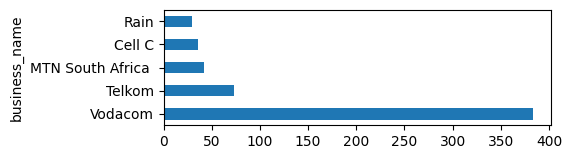

In [7]:
df_chatbot.business_name.value_counts().plot(kind='barh', figsize=(5, 1.5))
plt.show()

### Complaint Trend

In [30]:
df_grouped = df_chatbot \
    .groupby('business_name') \
    .resample('M', on='created_at') \
    .count()['id'].rename('count') \
    .reset_index() 

display(df_grouped)

,business_name,created_at,count
0,Cell C,2021-01-31,1
1,Cell C,2021-02-28,1
2,Cell C,2021-03-31,1
3,Cell C,2021-04-30,0
4,Cell C,2021-05-31,0
...,...,...,...
147,Vodacom,2023-03-31,11
148,Vodacom,2023-04-30,8
149,Vodacom,2023-05-31,12
150,Vodacom,2023-06-30,19


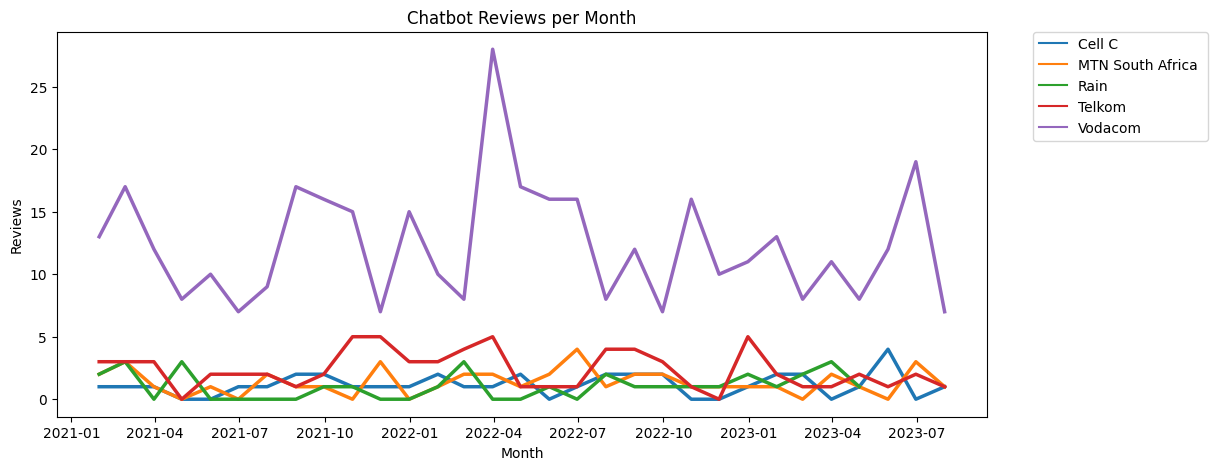

In [50]:
plt.figure(figsize=(12, 5))

sns.lineplot(
    data=df_grouped,
    x='created_at',
    y='count',
    hue='business_name',
    linewidth=2.5).set(
        title='Chatbot Reviews per Month',
        xlabel='Month',
        ylabel='Reviews')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Examine Chatbot Reviews

In [9]:
mprint('### Chatbot Reviews')

mprint('| Date | Business | Title | Content |')
mprint('| ---- | -------- | ----- | ------- |')

for index, row in df_chatbot.iterrows():
    review_title = row['review_title'].replace('|', ';').replace('\n', '<br />')
    review_content = row['review_content'].replace('|', ';').replace('\n', '<br />')

    mprint(f"| {row['created_at']} | {row['business_name']} | {review_title} | {review_content} |")

mflush()

### Chatbot Reviews
| Date | Business | Title | Content |
| ---- | -------- | ----- | ------- |
| 2023-07-20 15:30:46 | Cell C | Get the job done! | If I could it would be a negative 2 star rating.<br />The worst customer service ever and the most difficult to get a hold of, so much for being able to contact them on Whatsapp if the bot can’t even find your account and then ‘Please hold while we direct you to an agent’ and that day never comes! <br /><br />I took in my device for repairs the 19th of May 2023, paid the Excess fee the 13th of June 2023, emailed them my Proof of payment twice just to find out the payment was allocated on the 13th of July 2023, a whole month that has already passed!! <br /><br />They keep on telling me they will escalate my repair and that I should contact the following week because Cell C repairs apparently go on weekend from a Wednesday, they do not operate during the weekend, fair if I were to be calling on a Friday! <br /><br />I am very unhappy with how long they are taking to just start the process of my device repair! <br /><br />Why even bother to pay my insurance for so long, be on time with my monthly instalments and then they just have my device laying around and no one is bothering to get the job done.<br /><br />This was my first and last contract with Cell C! |
| 2023-07-20 15:05:44 | Vodacom | Tired of speaking to TOBI, we need humans | I bought WhatsApp bundles for R35 on the 13th July 2023, which have not been allocated till today the 20th, but i was rewarded with 3.5 Vodabucks. On the 14th I called customer service but was referred to TOBI the BOT, of which it was hard for TOBI to understand because he is an Automated Machine, I then asked to speak to a human, with no success. Sent an email to customer care, got a reference but no call back. I went to Sandton branch, but they could not help me because I bought the data online via capitec app. Can we please speak to humans, its really tiring not being able to express yourself. Kindly serve your customers well, this is really frustrating. |
| 2023-07-19 08:06:30 | Vodacom | USELESS options and even more useless "BOT" to try and solve your problem!!! | Their webmail7 Suddenly doesn't work anymore. When you want to enter through their vodacom site and can't remember your password as you haven't use it for YEARS, they send you a password reset or something to your email adress BUT YOUR EMAIL DOESN'T WORK, so how on earth do you access it? When you phone their customer number, ANY OPTION YOU CHOOSE SEND YOU TO THEIR USELESS ROBOT and when you want to talk to an agent, you must register a certain voice notification **** and say a specific sentence.  Well I've said that sentence FOUR times and every time I say it, it was wrong? I said it slow, I said it normal and even word for word, but nothing works. SO HOW DO YOU GET TO TALK TO AN AGENT AND NOT THEIR USELESS ROBOT WHICH DOESN'T HAVE THE OPTION WHICH YOU ARE LOOKING FOR? |
| 2023-07-18 21:38:08 | Vodacom | Is it Vodacom? or should it be Vodapong or VodaGo? | I recently moved into an apartment/townhouse in a complex in Morningside in Sandton.  The unit is fibre ready.  All I had to do was to get a router and get connected.  I have had a Vodacom account for many years for my cell phone, so I thought I would go with them.  They are a trusted name in the industry.<br />Round about the 2nd or 3rd of July 2023 I called Vodacom **********.  I spoke to a most obliging, friendly, and helpful consultant.  I was offered a package with Openserve as the fibre provider.  It was what I required, and within my budget.  The router arrived the next day.  I set it up, the wifi was working, but no Internet.  I called the customer service department. It was the first of many, many, many calls,  They told me my application would be activated.  Wonderful, or so I thought.  Nothing happened.  I call again.  "Mam, it is being attended to.  We will esculate." This I heard on several occassions.... Then I was told it is was Openserve who were holding things up.   I contacted Openserve... you cannot speak to person. Commuication is through, initially a Bot and then e-mail.  They advised that Vodacom need to take 'Ownership' of the number.  I duly report back to Vodacom.  I have to say that the consultants are friendly, they have answers to your questions, full of informative advise albeit that the answers are incorrect, and the information is misinformation.  I was offered many reasons for the activation not taking place, "Your address was incorrectly spelt" How many ways can you spell Square? Openserve are not in your area.... Then why sell me a package with Openserve? I found out that Openserve are in the area but don't service my complex.  This whole process has now taken two and a half weeks.  Today I was informed by the Body Corporate of my complex to go through Metro Fibre.  I took a deep breath, and contacted Vodacom again.  My question, "Can Vodacom offer me a package with Metro Fibre?" This they could do by cancelling the existing order.  Collect the original router, providing me with a new one, and this whole process will take another 7 to 21 working days.... They expected me to wait this time after they had sold me an unworkable package, and being in constant communictation with them for two and a half weeks,.... I think not... On Friday of last week I received a call from a consultant.  She advised that I must cancel my existing application and take out a new one.  I go through the whole sign on process again.  The call ends.  I was about to send her the RICA documents she required when I received a call from the original consultant.. She informed me not to go for the second application as the one she opened is still ongoing and activation is going to take place.  I was told a technician would be coming to my home to to do the activation, another consultant told me it was done remotely. I was even told the name of the technician, and he is the best there is.  When I demanded to speak to a supervisor or a team leader as they are called in Vodacom world, they were always busy.  Today I was told, "you can hold for him". They expected me to hold on, for who knows how long, wasting my time and my airtime.  I said to the lady, "You are the services providers, you get your team leader to call me".  Obviously, I never received a call.  Today, was the final straw.  When they informed I would have to wait for another 7 - 21 working days.  Yes, for that period I was offered a free LTE service for a month..  Very generous and very nice.  But too little to late.  Sorry Vodacom. but your service here has been deplorable.  As I have stated your customer care consultants are extremely well trained.  Their telephone manner is excellent.  But, please. don't mislead your customers.  Needless to say I cancelled Vodacom, I am waiting for them to collect their router.  Today, I called Rain.  Spoke to a very informative person on the phone, paid the the sum of R1,00 yes, you are reading correctly R1,00 to secure my account.  I went to collect the Rain Box.... Yes, I am now Singing in the Rain.  My devices are connected.  My dealings with Rain, the call, collecting the Rain goodies, and setting it all up, an hour or so.  Please, Vodacom have a little more respect for your customers. |
| 2023-07-18 06:44:51 | Vodacom | Vodacom eSim | I got myself an iPhone and someone told me about the esim to avoid carrying 2 phones. I called Vodacom Westgate to findout how it works and I was told I need to contact customer service or come to the shop if it fails. I called 082135 but couldn't get to speak to the consultant to get assistance. Everything was a bot that couldn't understand my needs. I then went to the shop where a gentleman tried to help me. He got the QR printed and everything done but nothing worked. I paid and everything then his colleague came and said I must leave everything will work after 4 hours. It is now more than 12 hours and I'm still getting errors when I scan the QR code. I'm employed and I can't return to the shop cos they also do not seem to understand this process. Can't call Vodacom cos I will be directed to the bot hence I came here for help. |
| 2023-07-16 14:28:00 | Vodacom | VODACOMS TOBI IS USELESS | Vodacom had decided to go automated and created their Chatbot Tobi.  What a useless piece of technology.  I would like to rather speak to a human and not some computer.  I had a problem with my phone and after going through the whole answer system, instead of getting an agent to help me, I am routed to Tobi.  Again we go through a whole lot of questions.  Then Tobi tell me that he is unable to help me and asks if I would like to speak to an agent.  I confirm with a "yes" and Tobi responds with "you have chosen the self help option".  Totally not what I have chosen and we start again.  Because choosing to speak to an Agent previously haven't helped, I now chose not to speak to an Agent.  Thinking that maybe Tobi is a bit confused.  So I say "no".  To which Tobi replies "I am unable to help you at this stage.  Goodbye".  Frustrating to no measure.  Vodacom, if you are going to go the automated route, make sure it actually works. GRRRR!!!!! |
| 2023-07-15 13:42:15 | MTN South Africa  | MTN HORRIBLE UNCAPPED DATA ****MING SYSTEMS | I received a call from a telemarketer regarding an uncapped non-contract pay as you go data contract offered by MTN. The lady promised that the promotion was non-biding and not a contract. She further promised that the router to be supp**** is load-shedding proof, meaning that it would not be affected by load-shedding and it is self-reliant. I noted my concerns regarding MTN coverage in our area that is was always poor but she insisted that her system and the router had a strength power to ensure we get the best uninterrupted and uncapped wi-fi signal for our family.<br />I requested her to send me the contract first via my email but she promised that I could cancel the contract any time within 14-days if I am not satisfied. <br />The router was delievered with a sim-card (mtn) and to my amamzement, the router was like any other normal router which had no back-up supply. The router failed  the loadshedding proof.<br />We started to be 5 -days without signal from our router which is normal for MTN coverage in the Zeerust Northwest. <br />In February 2023, I requested MTN to cancel my service because it was the worst service I ever had. I was paying R524-00 monthly by would only have 4 days per week on average coverage. The router provided me with the worst experience, however MTN customer care would only provide me with sweet automated messages as if they really care.<br /><br />I send them a notice of cancellation of the contract because it was not worth it. It was not<br /><br />1) Load shedding proof<br />2) fast 5G as promised<br />3) worth to supply me with uncapped wi-fi without throttling.<br /><br />MTN customer care acknowledged my letter but later reverted back to me that I cannot cancel my contract which was a PAY as You Go. They notified me to pay an early cancellation fee of R2500-00. <br /><br />They are still debiting my account for R542-00 every month since the notification period which is a violation of the contract terms. <br /><br />Calling MTN customer (horrible) care is waiting for 30 minutes on the phone which is not worth it. Sending them emails is writing to an automated ChatBot system that provides horribly scripted responses of sweet messages which never solve any problem. |
| 2023-07-11 19:09:24 | Vodacom | HAS VODACOM IMPLEMENTED IT’S OWN FORM OF LOADSHEDDING? | Vodacom's service is beyond disappointing. Over the past 6 days, at the time of writing this message, we’ve had more than 35 hours of no data signal and, since the signal has still not been restored, this number is guaranteed to climb by the hour.<br /><br />Data outages over the past 6 days…<br />Wednesday 5 July 2023: 4:30pm - 11pm<br />Thursday 6 July 2023: 5pm - 7pm<br />Friday 7 July 2023: 5pm - 7pm<br />Saturday 8 July: 9am - 11:30am & 5pm - 7pm<br />Sunday 9 July 2023: 11pm to 11:30pm<br />Monday 10 July: 3pm - 5:13pm & 9:30pm - 9:45pm & 11pm – 12am<br />Tuesday 11 July: 12am – 17:18pm <br />This uncannily resembles Eskom’s loadshedding schedule. There is, however, no connection. None of these outages took place during or at any time close to loadshedding periods. In any case, there’s been very little loadshedding over the past week.<br /><br />Many of these outages appear to be planned. How is it that so many of them commence at exactly the top of the hour and cease at exactly the top or bottom of the hour 2 to 2.5 (or more) hours later?<br /><br />I literally spend hours every month wasting air time on their call centre. Without data, this is the only means of reporting outages, which Vodacom should be tracking anyway. To add insult to injury and without fail, I am forced to deal with the robot called Toby who, at a leisurely pace finds it necessary to repeat the recorded message about the effects of loadshedding. All callers hear this message at the beginning of the call, and once is enough. Toby is never of any help whatsoever and amounts to nothing other than a ridiculous waste of both the caller’s time and air time. The customer however has no choice but to tolerate all of this just to speak to a human consultant.<br /><br />Once getting through to a consultant, I then have to endure the barrage of verification questions before being able to report the outage. Further to that, it’s often difficult to hear the consultant with incessant shrieking and cajoling in the call centre’s background. At times it sounds more like a street party than a call centre. It would behoove Vodacom to invest in soundproofing their consultants’ workspaces and training them in the fundamentals of how to behave in a professional environment.<br /><br />At the beginning of 2023, Vodacom took the liberty of increasing its prices across the board. My hope was that they would invest this money in improving their service. Quite the opposite is true. The user experience on all fronts is appalling for the customer, and I strongly suggest that Vodacom makes the effort to experience firsthand what the average customer needs to tolerate when their only option is to report an outage via the call centre, especially when the same call needs to be made repeatedly, week after week, month after month.<br /><br />Vodacom is uncompromising when it comes to their monthly debits for services, despite failing to deliver. They even have the audacity to insist upon charging a cancellation fee when the customer wishes to terminate the contract because Vodacom has failed to deliver the service for which the customer is paying. It’s time for Vodacom to begin compensating their customers for these kinds of unacceptable outages and to begin to act on actually providing the services that they so boldly proffer when selling a customer a contract.<br /><br />Finally, I posted this complaint on their Facebook wall. Their response? Well, nothing other than simply removing the post and doing nothing further. Public relations is apparently not their forte either. |
| 2023-07-11 12:38:39 | Telkom | No service | Telkom has been charging me an incorrect amount for more than 2 years .When I tried to resolve the matter ,I received no assistance.The branch personal and telecommunications said the issue needs to be resolved with tha accounts department .After months of back and forth I still haven't received a solution .To add...I took up a contract with telkom contract with a sale rep at the store,on the contract it states the contract is for 24months whilst the system says its for 36 months. I am now receiving messages to say i am going to be handed over to lawyers and i will be blacklisted.Telkom is an absolute waste of money and energy .The deals are enticing but the service is disgusting. There is NEVER anyone who can assists and every number you call gives you a voice prompt with a self help services .Is this a robot company who only has automated services with no personal concern?.<br />The staff at the outlets are just the same as your self help options they can do nothing,provide no information  and claim to be working independently ,hence they themselves cannot contact anyone when there is a problem.Your company is the first to black first and threaten to hand the client to legal authorities but you can not fix your mistakes. |
| 2023-07-11 11:47:27 | Vodacom | Vodacom failed me as their customer | After 7 months of my last review, it still a shame and still hurts to the core, that I had not been refunded back money that was ****** from me due to Vodacom authorizing a simswap without my permission. Still surprises me that a simswap can be done online via a Robot (Tobi), and without true verification of the actual customer, according to them by just answering 3 (Yes / No) general knowledge or guessing game questions called security questions. 1: "Do you use an Alcatel cellphone"<br />2: Waa your last recharge for R100.00" are some of their security questions. Vodacom does not care about their customers at all. I have 1st hand experience, they do not want to take accountability if their failure. |
| 2023-06-30 23:15:55 | Vodacom | PATHETIC SERVICE | Can SOMEONE please get hold of me urgently via email & not reply to me via a BOT! Check my initial email dated 7 May 2023 to ***********. Downgrade my account to my R66 package & refund my 3 months IMMEDIATELY!!! 3 July will be my 4th month of being debited incorrectly because some *********** vodacom sales reps can't do their job properly!!! You can NEVER get hold of a PERSON when phoning in! Your robot system is BEYOND PATHETIC!!! |
| 2023-06-30 17:44:50 | Vodacom | USELESS company | I was contacted telephonically by an agent to renew my contract. After speaking to the agent and deciding what plan would be best for me, I agreed to the renewal. What a surprise when I tried to buy airtime and I found out I could not top up my airtime. This was an important part of my requirements - a data plan that I could buy my own airtime for. I was then contacted by another agent after numerous attempts to sort this out. She advised that she would have to cancel the contract and start afresh from 1 July with the contract I thought I was getting. Today I got an sms stating contract updated but now instead of 20GB data I have 0GB! Even the 17.6GB data left over from June has gone! At least I could buy the airtime as promised! Then try and sort it out and the BOT cannot help but you can't speak to anyone human! Great job Vodacom - NOT! |
| 2023-06-28 13:12:00 | MTN South Africa  | MTN Incompetence and Deceit | In March 2023   I approached MTN for a Pay as you go LTE until my fibre is installed.<br />I paid upfront R1982 for the LTE Modem and bought two months unlimited data.  I made sure to tell the assistant it should be a month to month , but they insisted I sign a contract.  My Fibre installed in May and now MTN phones constantly for an arrears account.  I explained the situation , they requested I contact the Alberton Branch to cancel the "contract" Alberton says they are unable to cancel the contract.  Today alone I had 6 phone calls from a robot requesting payment.  In the last week there was approx 11 agents from MTN that phoned and harrased me for payment.  I explained the scenario over and over.  Thus was told to cancel the contract , but nobody will assist me.  People warned me before I got myself into this mess, and said MTN will eventually blacklist me over their incompetence.   I sent to emails to MTN Customer complaints but have not received any feedback.  Even when you phone they transfer you from accounts to cancellations and all of the revelant departments pass the buck.  STAY away from MTN |
| 2023-06-24 12:31:46 | Vodacom | Promises promises | App**** for a data sim for home use. And its now 2 weeks a sim swop and nobody can help to activate the simcard. Used my router with MTN, Rain and 2 other sim cards and it works. But this 100gig is just something that is *****ing money and no one seems to be able to help you. But its an active contract on your profile but the simplest thing is the most useless thing they seem to not master and activate the sim. Now I have to sit with a consultant that also contacts customer care and still nothing is happening. You are costing me money because I get paid by the hour, you are costing me money because i can not work from home and you are making false promises to customers. And please get someone that speaks english and not selfone jargon. I and millions of people want to understand what is being explained. And doing that security check like a 100 times over and over and over and speaking to a ****** robot is realy annoying. |
| 2023-06-22 16:41:12 | Vodacom | Bad bad service | A very useless call center, talking to a robot. Am not happy at, they opened some contract under my current contract without my permission. I only see with debit order going off that am paying double |
| 2023-06-22 07:33:15 | MTN South Africa  | Appalling service | MTN, in my experience, has to rate as probably the very worst service provider I have ever had the misfortune to deal with, and right up there with Telkom and ADT. Without going into specifics, because it would take too long, MTN, for me, incorporates huge difficulty in speaking to a human to start with, then it is almost impossible to speak to the right human amongst calls being misdirected, those on the receiving end having conflicting information or supplying no information, and then, after applying tenacity of an almost impossible degree, amongst dropped calls, to be told that someone would definitely come back to me as the problem has been escalated, and then deathly silence. Let's go 135 again and set aside a day, I say. After three hours I valiantly admit defeat. You win, MTN. I need to now extricate myself from a debit order and change service providers which should take possibly another two or three days of effort. However, MTN, you will receive the very worst feedback from me to everyone I know, unfortunately. I have no doubt that this email will either be ignored or I will get an AI bot asking me for my name and number and to explain my problem. |
| 2023-06-20 19:48:36 | Vodacom | VODACOM AGAIN | Vodacom deducted unauthorised debit orders, which I reversed. Obviously. I however immediately entered into a payment arrangement via their TOBI bot on Whatsapp (screenshots will confirm same). Today I was service blocked despite such payment arrangement because to no surprise the payment arrangement through the bot does not reflect on their system. What is the use of the bot or the payment arrangement then? The 2nd time in as many weeks that I had absolutely horrific service from vodacom and I am seriously contemplating terminating my relationship with them! Making calls is an integral part of my day to day work duties, which now came to a halt. |
| 2023-06-20 12:16:43 | Telkom | Telkom is a terrible service provider | There is no part of my Telkom service that I am happy with. Their app is faulty, so you cannot help yourself. Then you need to wrestle with the call center which is shockingly bad. The bot prompts are often incorrect, so when you eventually do get to speak to a human being, it's usually the wrong one. As an added bonus my phone calls have stopped working, I now get scratching or silence. My data has run out, I am unable to recharge via the app because their OTPs aren't  working and I am unable to recharge via the call center because their coverage in my area has met a tragic demise so I can't phone. Those are literally the two things I need them for.<br /><br />Add that I have had to block most of their numbers due to their incessant phoning, I used to get around 10 marketing calls a day. That's really borderline harassment. <br /><br />When eventually I do get another contract, it most definitely will not be with Telkom. |
| 2023-06-19 10:23:54 | MTN South Africa  | Mtn poor service on data contract | I am very Angry and disappointed with my mtn month to month data contract, they told me when taking it out that i could easily just call 135 simply speak to a mtn consultant and they will change my address every time i need to use the router in a different location but it is near impossible to speak to a mtn consultant, and there is only robots working at mtn i will never recommend them to anyone as they is practically to help from them and service is terrible.. |
| 2023-06-18 10:28:19 | Vodacom | Horrible Customer experience | My phone was blocked and an sms sent to me on Saturday night stating that someone is trying to do a sim swop with my number. I've been calling the number and I get redirected from a bot to bot.My phone is not working, and I still have not recieved any assistance. This Vodacom customer care process is a nightmare and sheer frustration. |
| 2023-06-14 08:46:29 | Telkom | Useless Telkom | I wish there was an option for 0. I've been on the phone now for 25min waiting to speak to a consultant. I have 1.5gig data which I can not use. I had to load a chat bundle to be able to post this. They are useless. I've requested several call backs but nothing happens. Telkom customer pay through their ears for a useless service. Can someone please wake them up to give better customer service. I do not wish to use a robot service but to speak to an actual person to sort out why I can't use my data. Have they even looked at why their call volumes are so high?  Because of useless service. Some people give up eventually holding the line. Do better. You aren't Eskom!!!! |
| 2023-06-13 11:36:47 | Vodacom | Cash Purchase on the Vodacom E Store | I purchased a cellphone on the E Shop. I did not like the model and wanted to return it within the 7 day cooling off period. No one in the call center can help me return the cellphone yet they offer the service only to contract clients. I went to a Vodacom4u and no one can help there either. I tried the Chatbot and Samantha Sinegugu McHunu was supposed to be assisting me however there is no reply from her after explaining my situation. This has has to be the worst service i have received from them in all the year i have been with Vodacom. |
| 2023-06-12 14:08:04 | Vodacom | **********! | I was contacted telephonically by an agent as my contract was ending. Told the agent I needed data and would buy my airtime separately. We even discussed how my airtime would expire after 3 months as I worried if it expired in 30 days I would be wasting my money. I seldom make calls and send an sms so just wanted to buy as needed. All good, or so I thought! I wondered why my sms’s were undelivered and today called. A waste of time when you get put through to a robot! Chatted to 2 people and went into a branch and all I got was “your contract doesn’t let you buy airtime!” Excuse me!!!! This was clearly what I asked for and thought I had. Why would someone never need airtime, never send / receive sms’s (especially from a bank) and never have to make a call? If I cancel my contract I have to pay a fee! Now I must wait until 1/7 to have it changed and then to a pathetic plan. Why do the agents get away with lying to the customers? Vodacom can check my recording of my conversation. They can then hear that I specifically stated I needed a data plan and would buy my own airtime! |
| 2023-06-12 09:26:21 | Vodacom | Vodacom Router Issue | My router Alcatel router has not beeb able to connect to to the internet the whole weekend.  when contacting vodacom helpline they told me to switch off router numerous times. The power of the router then died and has bot been able to switch on.  After being in store we have been told that it will take 2-3 weeks to fix.  The router is only 2.5 months old and already giving issues. The store is not able to assist us with the loan router that they may or may not have in store but has been able to make some sort of arrangement to get a loan router to us sometime. <br /><br />It is, however, very frustrating as online lessons get done with the use of this router and now my livelihood is being affected.   I feel that i pay for a service and am not being considered in this regard.   <br /><br />I would like to get feedback with regards to this ASAP |
| 2023-06-08 15:16:50 | Vodacom | Terrible service at Vodacom. | I was phoned and offered  a new contract with more data. I accepted and thid was  to start on 1st June 2023.   Since 1st June, I have not been able to usa or access any data.   My account says I have 20Gb available. It is absolutely impossible to speak to any human at Vodacom. They just say " high call volumes", and put you through to their stupid chatbot that is useless. |
| 2023-06-08 13:37:55 | Vodacom | VODACOM AVOIDS CONSUMER QUERIES BY USING ROBOTS TO ANSWER CALLS... | Vodacom is unbelievably unavailable when customers have queries. These bots that answer their phones are just a barrier that they are creating to rip people off. I'm trying to get an itemized bill for my vodacom account because they are billing me almost twice the amount that I signed up for. So yes I paid but I sent an email with clarity seeking questions more than a week ago, to date they have not rep****. I'm trying to call their customer care line and it's only bots that answer the phone and there's just no call centre agent available because their lines are just "too busy" according to these bots .. Really??? Its laughable. <br /><br />What is it with these network businesses? Its not the first time i experience this, i moved to vodacom thinking that I'd get better service and I'm grossly disappointed, when you're billed more than you signed  up for  there must at least be an explanation. In the absence of an explanation, it is THEFT. You sell a package that the consumer is comfortable to pay then suddenly you bill them for twice this amount, when they seek an explanation you are simply nowhere to be found. When Vodacom sells you products, they don't send bots to talk to you but when a client wants to query a bill, they have bots on the line. This is unacceptable. If this persists, we will have to establish an online campaign against vodacom on all social media platforms. Consumers cannot continue to be ********** like this! It's not right. |
| 2023-06-08 12:08:47 | Vodacom | as above | On 3 January 2023 I contacted Vodacom Cancellations on ********** to cancel my existing contract due to expire at the end of February 2023. I was informed by the lady who took my call that the last debit order would be at the end of February 2023. On 2 March I noticed that this contract has not been cancelled.  I AGAIN phoned Cancellations and the woman that answered the call was extremely rude telling me that the no. does not belong to me and said to phone the billing department.  I phoned Billing and gave the exact details that I gave to this unmannered woman at cancellations and the lady tried assisting but said I have to contact Cancellations.  Another call (and 1 hour later!!!!!!) I spoke to Mvelo who informed me that the contract was not cancelled instead the lady that I spoke to on 3/1/23 cancelled A CANCELLED CONTRACT OF A YEAR AGO!!!!! How ***********.  Mvelo assured me that the matter will be escalated and I will receive feedback with 48 hours.  Needless to say, NO FEEDBACK!!!!!!! This is totally unacceptable and I WILL NOT be held liable for Vodacom’s incompetency.  Should this matter not be resolved IMMEDIATELY, I will report this to ICASA!  As Vodacom’s robot informs you ALL CALLS ARE BEING RECORDED!!!!!!!!!!!!!!!!!!! I suggest you go listen to the recordings AND REVERT BACK IMMEDIATELY.  ICASA will be contacted on 8/3/23!!  ON 8 JUNE 2023 THIS UGLY SNAKE COMES BACK!!! I RECEIVE AN SMS FROM VVM DEBT COLLECTIONS ADVISING THAT THERE IS R538.26 OUTSTANDING ON THIS ACCOUNT.  AFTER ALL OF THE ABOVE AND A CALL FROM A LINE MANAGER ADVISING THAT THE CONTRACT IS CANCELLED AND NO FURTHER COSTS WILL BE DEBITED.  BY THE WAY, THE NO. WAS MIGRAGTED TO PREPAID ON THE SAME DAY.  WHAT UTTER INCOMPETENCE!!!!!!!!!!!!!!!!!!!!!!!!!! VODACOM BETTER SORT THIS MESS OUT BEFORE I AGAIN REPORT THIS TO ICASA!!!!!!!!!!!!!!!!!!!! |
| 2023-06-08 11:27:24 | Vodacom | WHY VODACOM? | Why do our call charges go up and up, when we have to battle to talk to a robot when we have a problem with using Vodacom???? On what is Vodacom spending the money on because they cannot afford real people anymore? Cheap ROBOT, but they can't support the real people with jobs who support them? |
| 2023-06-07 20:39:22 | Vodacom | Content service activated | Content services was activated on the number while we blocked all on the app. As a result have been loosing airtime everyday because of that. The fact that it was bypassed and Vodacom allowed it makes it *****ulent. We want all airtime taken reversed. When sending query to customer care, we are forced to chat to Tobi the robot instead of human. How can you explain the query to a robot? Is it because this is a prepaid number? Please contact my dad and refund him his airtime used for this content service. I deactivate it on the app again as it was definitely active. |
| 2023-06-07 09:26:01 | Vodacom | Vodacom is on Vacation please don't bother to call | It's like you have no call center robots or agents at the insurance department, one holds nd holds and holds to no avail or the call gets diverted because one can hear how a person answers and puts you back on hold again then they hang up even.<br /><br />It's ****** ridiculous, don't tell me about load shedding cause everyone has load shedding, you are not special. You are a service provider yet you don't even answer your phones.<br /><br />Disgraceful man. |
| 2023-06-06 09:47:00 | Vodacom | Vodacom Blocked My Sim Just For Mograting Back to Prepaid and now no one can assist me since I am a prepaid customer. They suspended my Sim for  NOTHING. PLEASE ASSIST | Vodacom can no longer assist me as I have now migrated back to prepaid from a contract. Vodacom just blocked and suspended my number and now I can't make calls all because I asked to go back to prepaid. I have been going to the Vodacom store and calling customer care since last week all to no resolution. The employees at Vodacom keep telling me 5 different things and transferring me to the wrong departments. Your robot Tobi just ends the call and says he can't assist. Do you even train your employees ? Why is everyone at Vodacom failing to assist me ? Do I have to be a celebrity to get some assistance from Vodacom ? All they keep telling me is my contract is upto to date. I have no liabilities but since I am prepaid they can't help me. So now that I'm on prepaid I can't use me Sim and number ?  Really? What's with the horrible service. Can someone just activate my number so that I can get my bank details in order then once all is sorted I will seize to be a vodacom customer since you fail to assist me. |
| 2023-06-05 09:53:46 | Vodacom | Impossible service | I phoned Vodacom on Wednesday night to block a line and get an ITC Number. I was promised it would take maximum 24 hours. I still haven't received it, and it's impossible to phone Vodacom from a non-Vodacom sim card, you get a bot and no one to speak to |
| 2023-06-04 22:00:21 | Vodacom | Vodacom Delete Numbers is a **** to Withdraw Money from your Bank Account | On the 30th of May 2027, Vodacom deleted the cellphone number I have used for the past 6 years and which I actively used daily for all transactions, banking, internet logging, making daily calls, and many more. Although Vodacom offers 99% coverage, their customer service care offers only 1%. Tobia Support offers no alternative to talk to the agent. In my opinion lacks any common sense nor intelleigence. The second customer care line is 082135 which simply is a machine prompt simply like Tobi. It keeps asking you to press 1 or 2 or 3 with no choice to be able to talk to a human being who may seek to understand what really transpired. Vodacom Twitter Support is another Tobia support with no heart or care.  These Vodacom chatbots write some narcissistic sympathetic messages such as " We are sorry for the inconvenience this might have caused you..." and with no real sympathy at all. How does a reputable company like Vodacom delete a number which has never been inactive for more than even 24 hours yet these Vodacom support chatbots will send the "Vodacom Terms and Conditions" violated by the same company?<br />The night my number was deleted, it's the same night my standard bank account was hacked and R1600 was transferred from my account. My Vodacom number was deleted, yet the same number was activated to authorize transactions from my bank account. And the only help and assistance or support I could get from Vodacom support was to buy a new sim card and register it. |
| 2023-06-02 08:21:15 | Vodacom | Vodacom online deals seem to not be available as advertised? | After spending a lot of time considering her options, my wife app**** for an advertised online deal for a Samsung A34 at R349 per month. After initial vetting etc. a Vodacom agent called her and indicated that she 'did not qualify for that deal' but did qualify for a significantly more expensive deal offering more data etc. for this cellphone. When she indicated that she was not interested in the extra data etc. and would like the advertised deal, the agent offered her a cheaper deal for a lower end phone, which she declined.<br /><br />I phone Vodacom to enquire how it is possible that someone do not qualify for a cheaper deal, but do qualify for a more expensive deal the agent indicated that they will only discuss the matter with my wife.<br /><br />Consequently I sent an email to customer care which came back indicating that I should use the TOBI chat bot to contact them. TOBI could obviously not answer my question.<br /><br />We decided to rather opt for another service provider.... |
| 2023-05-31 19:52:52 | Vodacom | Vodacom Horrible Customer Care Service-Deleted Active SImcard | Vodacom had a sim card policy to delete a sim card that is inactive for a period of 120 days. On Sunday, 28th of May 2023, Vodacom deleted my sim card which has been active for the past 6 years and was last active on the 27th of May 2023 at 22:00 loaded with airtime and data of R600-00. I contacted Vodacom Tobi Chatbot, it simply gave me an unhelpful answer. I then contacted the Vodacom customer care line, and the answering machine said "Enter the number you are querying". After I entered the number, it answered: "We can't recognize your number". There was not even an opportunity to talk to an agent. I then contacted Vodacom support on Twitter. The machine on Twitter was as unhelpful as Tobi the Chatbot. The Vodacom support simply said, "The number has been deleted because inactive sim cards are deleted as per Vodacom policy. Then it sends me the link to the Vodacom terms and conditions website. <br />All the numbers which Vodacom provided were just so unhelpful and left me frustrated because I was spending almost R1000-00 every month on Vodacom services. <br />Tobia CHatbot is a horrible Vodacom support and so is their Twitter Support.<br />I can imagine how many sim cards are erroneously deleted by Vodacom and people who forfeit their data and airtime because of such bad customer support. |
| 2023-05-31 17:50:48 | Vodacom | Vodacom Blocked My Sim After I Requested To Go Back To Prepaid After My Contract Ended For No Valid Reason | I ended my vodacom contract and the contract is supposed to end 31 May. This morning I received an sms stating that my sim was now prepaid. After that I bought 60 anynetwork minutes as I had to make an Urgent call only to find my sim is blocked and I cannot make calls anymore. I keep receiving an automated vocemail  message saying my sim is blocked and I should contact my service provider everytime I try to make a call. I cant even call Vodacom customer care (the actual service provider) . I had to get a robot "Tobi" to actually help with getting someone from Vodacom to call me. The consultant I spoke to told me I had to go to the Vodacom store to get my sim Rica'd and re registered, after 10 years of Vodacom having my details on file I must still go to Vodacom to rica my sim. Does Vodacom only allow contract sims now. Can we no longer be prepaid clients? Cos I just came from the vodacom store and they told me my number is not on the system where it requires me to rica again and they did a network boost or something like that which another consultant already tried to do. Did I just go to the Vodacom shop for NOTHING!!!?? My sim STILL not working. I STILL cannot make calls. Only because I changed from contract to prepaid. IS vodacom a ****? |
| 2023-05-30 11:16:00 | Cell C | Cell C - Refund Struggle | This is going to be a long post. <br /><br />However I need to expose how useless Cell C are with their service. How I continue to struggle to get my money back. <br /><br />I have been fighting with Cell C since the 4th of May to return my money and process a refund. <br />On the 23rd of May , I was at my wits end. I posted on Hello Peter with a complaint. <br />I got a "Private" response, so I wanted to post what Cell C has done to assist me, publicly. <br /><br />My original post said the following ( Posted 23rd May 2023) <br /><br />Pathetic service , Theives , Emotionless , Robots , Script readers, Useless , inompetant staff. <br />I have been fighting with Cell C since the 4th of May to return an amount of R1400 that they debited off my account after an EFT payment was already made on their instruction. <br /><br />I have spoken to about 17 different people until today. The sequence of events between then and now is as follows. <br />1. Was told to send proof of payment - no response <br /><br />2. was told to send proof of payment again, - no response<br /><br />3. I was told to email collections. No response <br /><br />4. phoned call centre, and was asked to email proof of payment, I also added in my banking statement so they could see what i was referring to for extra clarity. <br /><br />5. getting desperate now , running low on food money , I call again, and eventually on the May the 15th somebody with a brain cell , raised a refund ticket for me, I was told someone would be in contact with me within 2 days  - no one phoned. <br /><br />6. I followed up the next day , I was told that the refund would be escalated but this process takes 72 hours. <br /><br />7. Friday 19th of May I eventually demanded to speak to a manager , who also was not very helpful, His name is Tshepho , he said the process takes 10 business days, ( not true I looked on their company site and its 7 working days ) he just said he had marked my refund as urgent in a mailbox. yes in a mailbox with 5000 other emails. I have almost no money at this point. I need electricity as I work from home, I need food to feed my kids, I need fuel to get them to school. No one cares. they dont care. <br /><br />8. Monday 22nd May - I phone early in the morning and asked to speak to Tshepho the manager from Friday. I was told he will phone me in ten minutes that was at 8:39am. I phoned the call center back at 11am , who then said they are transferring me to him  but instead I was on hold for 39min  until eventually I dropped the call. I eventually got hold of Tshepho , and all he could say was he can see its in the approval process. Not once has anyone offered to take ownership and keep me updated. <br />I burst into tears begging that he help me , I need to feed my kids. <br />Its almos time for the next debit order run. He doesnt care, he cant go the extra mile, he said he has not contacts in finance to call and ask for assistance. We had bread for supper last night. <br /><br />10. Its Tuesday the 23rd of May , I call again at 10:30am this morning, I ask to speak to Tshepho , I am told he is on lunch, but I must not worry he will phone me back as soon as he gets in. You guessed it , its almost 4pm and no one has called me. I phone back at 3pm this afternoon , I am told that they can see that the refund has been approved, but that does not mean that the money is on its way to my account. Keep in mind today is the 7th working day since I raised the refund ticket. The lady tells me that it takes 7 days after the refund has been approved. <br /><br />I feel defeated. I have no food in my house, both my kids went to school hungry today , I have almost no fuel left in my car , I have 8 units of electricity to last me until I get paid. <br /><br />How is it that you F&*&(&(*&*& C(*&()*&)*(&)(*7 can affect my life like this ? Emotionless. YOU STOLE MY FOOD MONEY TO FEED MY KIDS THIS WEEK. NO BODY CARES THAT YOU HAVE KIDS TO FEED AND TO BE ABLE TO WORK. <br /><br />I AM AT MY WITS END, PLEASE CAN SOMEONE DO SOMETHING. THIS IS REDICULOUS TO FIGHT FOR WHAT IS MINE. <br /><br />YOU DID THIS NOT ME . YOU HAVE CRIPPLED ME THIS MONTH YOU STUPID TWITS. <br /><br />CAN SOMEONE IN CELL C WAKE UP AND FIX THIS . YOU CANNOT GET THROUGH TO ANYONE THAT IS ABLE TO ACTUALLY HELP YOU. <br /><br />ITS WORSE THAN GOING THROUGH A DRIVE THROUGH AND ASKING FOR THE LETTUCE TO BE REMOVED, BUT INSTEAD THEY REMOVE ALL THE GARNISH, YOU ARE WORSE !!! <br /><br />HOW ON EARTH MUST I FEED MY KIDS THIS WEEK.<br /><br />Response Cell C : <br />Good day<br /><br />Please accept our sincere apologies for any inconvenience caused by this.<br /><br />Our records indicate that a refund was prepared today (23/05/2023).<br />The refund takes anytime from 3 to 7 working days to reflect in your account.<br /><br />My reply: <br />Exactly , another 7 days , what the hell . Again, what about the fact that you took it from me on the 4th of May  and I have been fighting for my money back. How must I feed my kids  ?  Another example of a half scripted answer. No one is willing to push this through or try to make a call and escalate , as a result of an internal error , in other words make it right. I am your client after all.  As I said no one gives a f**k right ?  Let me go tell my kids that unfortunately there is still no money. You have caused my kids and myself to go hungry this month because you are idiots, now you just go and put your foot in it and say the same thing I am complaining about. How can you tell me its another F**king 7 days. Do you have children ? <br /><br />Response Cell C: <br />Please receive our apologies for the unpleasant experience received thus far, <br /><br />The refund has been prepared and the funds will reflect within 7 working days.<br /><br />My reply: (Same day 23.05)<br />Please confirm exact date of payment ? Surely you can make a call and confirm , please I beg you <br /><br />Response by Cell C: <br />Unfortunately, we cannot confirm the exact date of payment.<br /><br />30th of May 2023: <br />I have just called Cell C , I was just told that there was nothing they could do for me if the refund has been approved. <br /><br />I educated the agent on the process of escalation. After being put on hold for another 3 minutes, I was told she will escalate for me to the escalations department. <br /><br />Guess what. The escalations department has 72 hours to get back to me. Another 3 days to wait for feedback. Are you kidding me ? <br /><br />4 - 15th of May = 8 days of continously emailing and phoning until eventually being told to log a refund ticket. (Business working days) <br /><br />15 May - 23 May = 7 business workiung days to process a refund <br />23 May - to date  = 6  business working days and counting ......<br /><br />21 Business Working days dealing with Cell C to get my refund sorted. <br /><br />and now you want to tell me another 3 days to have it escalated. |
| 2023-05-24 08:37:56 | Vodacom | Vodabucks is a ****!!!! | Used their App to buy vouchers, my VodaBucks balance got deducted, and I never received my vouchers, speaking to this useless Tobi bot and 082135 has gotten me nowhere unfortunately<br /><br />either refund my balance or send the vouchers please |
| 2023-05-23 16:34:39 | Vodacom | **** of a company!!! | Have been with vodacome for years and was a little behind on payment,with being said they made no means of communication besides a robot call.<br />They send my information to a third party company without my consent to the popi act and this third party company with no sign of agreement to this process as well as a break down of any kind.<br />Phone vodacome to arrange my account with no help.<br />I will not pay a cent till someone sorts this out by adding R1000 with no reason or expectations received. <br />I will take legal action from an advisor if this ******* third party company with the share or my personal information without my consent !!! This company is a **** with no help at all. |
| 2023-05-23 15:45:30 | Cell C | You have ****** my food money ! | Pathetic service , Theives , Emotionless , Robots , Script readers, Useless , inompetant staff. <br />I have been fighting with Cell C since the 4th of May to return an amount of R1400 that they debited off my account after an EFT payment was already made on their instruction. <br /><br />I have spoken to about 17 different people until today. The sequence of events between then and now is as follows. <br />1. Was told to send proof of payment - no response <br /><br />2. was told to send proof of payment again, - no response<br /><br />3. I was told to email collections. No response <br /><br />4. phoned call centre, and was asked to email proof of payment, I also added in my banking statement so they could see what i was referring to for extra clarity. <br /><br />5. getting desperate now , running low on food money , I call again, and eventually on the May the 15th somebody with a brain cell , raised a refund ticket for me, I was told someone would be in contact with me within 2 days  - no one phoned. <br /><br />6. I followed up the next day , I was told that the refund would be escalated but this process takes 72 hours. <br /><br />7. Friday 19th of May I eventually demanded to speak to a manager , who also was not very helpful, His name is Tshepho , he said the process takes 10 business days, ( not true I looked on their company site and its 7 working days ) he just said he had marked my refund as urgent in a mailbox. yes in a mailbox with 5000 other emails. I have almost no money at this point. I need electricity as I work from home, I need food to feed my kids, I need fuel to get them to school. No one cares. they dont care. <br /><br />8. Monday 22nd May - I phone early in the morning and asked to speak to Tshepho the manager from Friday. I was told he will phone me in ten minutes that was at 8:39am. I phoned the call center back at 11am , who then said they are transferring me to him  but instead I was on hold for 39min  until eventually I dropped the call. I eventually got hold of Tshepho , and all he could say was he can see its in the approval process. Not once has anyone offered to take ownership and keep me updated. <br />I burst into tears begging that he help me , I need to feed my kids. <br />Its almos time for the next debit order run. He doesnt care, he cant go the extra mile, he said he has not contacts in finance to call and ask for assistance. We had bread for supper last night. <br /><br />10. Its Tuesday the 23rd of May , I call again at 10:30am this morning, I ask to speak to Tshepho , I am told he is on lunch, but I must not worry he will phone me back as soon as he gets in. You guessed it , its almost 4pm and no one has called me. I phone back at 3pm this afternoon , I am told that they can see that the refund has been approved, but that does not mean that the money is on its way to my account. Keep in mind today is the 7th working day since I raised the refund ticket. The lady tells me that it takes 7 days after the refund has been approved. <br /><br />I feel defeated. I have no food in my house, both my kids went to school hungry today , I have almost no fuel left in my car , I have 8 units of electricity to last me until I get paid. <br /><br />How is it that you F&*&(&(*&*& C(*&()*&)*(&)(*7 can affect my life like this ? Emotionless. YOU STOLE MY FOOD MONEY TO FEED MY KIDS THIS WEEK. NO BODY CARES THAT YOU HAVE KIDS TO FEED AND TO BE ABLE TO WORK. <br /><br />I AM AT MY WITS END, PLEASE CAN SOMEONE DO SOMETHING. THIS IS REDICULOUS TO FIGHT FOR WHAT IS MINE. <br /><br />YOU DID THIS NOT ME . YOU HAVE CRIPPLED ME THIS MONTH YOU STUPID TWITS. <br /><br />CAN SOMEONE IN CELL C WAKE UP AND FIX THIS . YOU CANNOT GET THROUGH TO ANYONE THAT IS ABLE TO ACTUALLY HELP YOU. <br /><br />ITS WORSE THAN GOING THROUGH A DRIVE THROUGH AND ASKING FOR THE LETTUCE TO BE REMOVED, BUT INSTEAD THEY REMOVE ALL THE GARNISH, YOU ARE WORSE !!! <br /><br />HOW ON EARTH MUST I FEED MY KIDS THIS WEEK. |
| 2023-05-22 05:52:10 | Vodacom | Vodacom *****s data and customer care Toby is useless. Replace my data | Vodacom is useless, and Toby the chatbot is terrible. I bought R120 data and it never provisioned. Instead, I keep getting SMSes saying it's running out in a week's time. It never provisioned. Called their customer care and went from pillar to post with Toby's questions and options.<br /><br />If Vodacom still at all cares for any of their customers, can I please get some assistance? This is unacceptable and it's not the first time. Vodacom is infamous for *****ing people's money. I thought I'd give them another chance to change my mind, what a terrible mistake. <br /><br />Correct this now please. |
| 2023-05-20 09:52:29 | Vodacom | WONDERBOOM JUNCTION BRANCH IS A DISASTER | Geez like but the service at Vodacom Wonderboom Junction is actually PATHETIC AS HELL!!!! <br />Phone got ****** so had to go into store to do a sim swap - go to the WONDERBOOM JUNCTION branch of Vodacom - Firstly HOW IN THE HELL ARE YOU A CELLPHONE STORE WITH NO SIM CARDS!!! then I asked the guy when are SIM cards going to be delivered he says after 12 - couldn’t wait until 12 so I said I’ll come back again - ended up buying a SIM card somewhere else because you can do a sim swap through TOBI - now TOBI is the dumbest thing ever, ZERO HELP from the robot! - end up going to the WONDERBOOM JUNCTION BRANCH again this morning - only for the lady to look at me and say “you need to go to the branch that you bought the SIM card and do it there or buy a SIM card here” - so I tell her okay it’s fine I’ll just buy a SIM card here then - does this lady not look at me and say WE DO NOT HAVE SIM CARDS!!!! <br /><br />If WONDERBOOM JUNCTION don’t want to help people then they MUST CLOSE THEIR DOORS - PATHETIC PATHETIC SERVICE!!!! |
| 2023-05-16 16:25:50 | Vodacom | Vodocom. ***********, not client centric. | Since the 13th May 2023 I am unable to receive calls. I tried contacting the customer support and all I hear is Toby the bot who can not assist with my issues. I tried logging it on the website and I get an error, 'advising oops something went wrong'! You can not get service from Vodocom. ***********, not client centric. |
| 2023-05-16 08:13:05 | Cell C | STILL NO SATISFACTORY IN CELL C SERVICES | Hello, as per my previous complaints and personal verbal requests to change debit order dates from 1st to the 6th, then was forced to close my bank account with a requested Affidavit from them since 3rd March 2023, and now we are in May 2023? Cell C Debicheck system still not changed and tried to take money, 3 times during the first week in May from my deactivated non-performance bank account? My payment method was changed to an intermediate bank transfer before 6th of each month. My current liable contract dues are paid and up to date. They are trying to take exceeded amount with their penalties for UNSUFFICIENT funds. Which I will not be liable for. My Bank is also penalising me everytime they do with charges. Are there robots working in Cell C? Who administrate the capturing of clients requests? Its *****ulent in my opinion. |
| 2023-05-14 18:29:37 | Vodacom | ******s of Pretoria Zoo. Don't take up the position of Vodacom directors as you may find yourself in jail, despite the fact that you will out do your predecessor's by far. | Once again Vodacom *****ing from us. I have been in JHB General now for 5 days and will most probably be here for another 21 days. In these five days I have averaged 2 gig a day. Of which I have lost at 30% if not more from downloads that seem to fail not as they start. Not half way , but at the end. . <br />I am not even bothering to try contact Vodacom because I refuse to speak to a robot that doesn't understand and leads you in circles in the hope that you will give up and sweep it under the rug. <br />And guys my last review apologies to the Pretoria zoo ******s for nominating them as the board of directors of Vodacom . Really guys don't take these positions as you may end up in jail for theft as they have been *****ing like in my last review Vodacom is *****ing Billions from us South Africans because for every 1 mb I downloaded 2 mb came off. . <br />Mysteriously the next day it was fixed and my downloads became accurate and now I find they just adopt another method. The thieving *******s are worse than our government. . They should all be jailed together. Now I find my self tonight not being able to complete my downloads due to our friends raking in my data and it's so weird that it happens everyday exactly the same way. I download for example two files of say 150 mb each and the download speed is terrible slow and I keep my phone doing absolutely nothing else so that I don't mess with them . As it's getting to the end 45 minutes later all of a sudden one download fails and dissapears and when I go to the Vodacom app the other one goes. Like tonight I was fortunate to have enough data to download one of the files I started and what would happen when I initiate the download. Zim zalla bim it downloads the entire 150 mb in less than 3 minutes done. But now I can't down load the other file because these *******s have ****** my data. Other nights I was not fortunate to have data to download the files again. <br /><br />And surprise surprise, I always get a email from Hello Peter saying Vodacom has responded and I am still waiting from the first review. <br />Because Vodacom are confounded ****'s. <br />They never get back to me . I mean I even leave my number for them********** |
| 2023-05-09 07:29:05 | Vodacom | Vodacom Sim card hacked | Mi Sim card was hacked on the 30 April 2023..I went to some Vodacom shop 01 may 2023 Westgate where I was told someone called Vodacom and did a sim swap without me knowing... they couldn't provide me with more details who did it and how it was done and I was told I must pay 20.00 for a sim swap...a day later I see the person maxed out the airtime advance and now I'm owing Vodacom 139.00 which I have no knowledge of...I called customer care and I was told the technical team will call me...even today I haven't received any call..I can't recharge because wen I do the airtime is debited by the negative balance I have no knowledge of... Vodacom doesn't protect us as their customers if a stranger can call and speak to the robot then we get de*****ed.....I would like the airtime advance to be removed permanently from mi line...coz I can't be subjected to this nonsense service we get from Vodacom |
| 2023-05-08 15:18:17 | Vodacom | I HATE BOT'S!!! | ITC reference<br />How am I supposed to get an ITC reference when the bot keeps hanging up on me because I am not phoning from a vodacom number.  <br />Obviously!! I am not phoning from a vodacom number because that phone got ****** !! |
| 2023-05-08 11:35:29 | Telkom | Pathetic Service | Telkom has got to be the worst telecommunications. Their call centre is even worse with the most robotic staff with no emotions. They charge you additional fees with no reason, they then cancel your debit with no reason, then advise you not to pay because the debit might still go off, then suspend your line, then give you wrong banking details and tell you it’s not their problem. There is no supervisor or team leader you can liaise with. The most putrid customer service ever l!! |
| 2023-05-06 15:14:54 | Cell C | No Service | Cell c Account Number: **********70<br /><br />Good day<br /><br />I had a contract with Cell C.I Phoned them on the 20th December 2022 and said I will bot renew my contract with them for another 2 years.<br />They then cut me off on the 12 January 2023. After several phone calls and no advise or response to why i am cut of, I went to Cell C shop in Festival Mall.<br />There consultant told me I cancelled my contract that's why(Remember I was cutoff on the 11 January 2023). My sim has being cancelled and now I need to BUY a NEW one.<br />I had no choice and bought a new one for R115-00. Then I had to wait for forty Eight (48) hours before it was active.<br />They cut me off on the 28 January 2023. So I had to pay extra on my phone for data till I could use my new device on contract from a new Provider.<br />THEY DELIBRITLY CUT ME OFF BECAUSE I DID NOT WANT TO RENEW MY CONTRACT.<br />I must say there overall service for the past two years were also just as bad. Because they don't have service.<br />Now they list me as a bad payer because I refuse to pay a full months usage!!!!!!!!!!!<br />They are a bunch of *********** people. <br />I will not pay for a full month, and the interest they charge me.<br />And they need to fix my name by Experian credit. |
| 2023-05-05 19:46:31 | Vodacom | Poor after sales service | I am besides myself with the level of service from Vodacom La Lucia branch. I lost my phone yesterday, and went it to get it blocked. <br /><br />I was asked to call customer care all because it was not a new contract purchase etc <br /><br />My partner recently took a contract there and everyone was jumping to assist us but this time around because it’s after sales, not a single person could help.<br /><br />My dilemma with customer care line is that no one can help because it is all auto recorded/robot prompt and I am left with no phone to use. This level of after sales service needs to be stopped. <br /><br />I will never ever support Vodacom ! |
| 2023-05-02 13:48:16 | Vodacom | VODACOM  CUSTOMER CARE /  NOT !!! | Frustration with the customer care number, all I  get is the bot, who confidently says thank you and hangs up on me without resolving my issue.  All  morning I have been calling to the same thing.<br /><br />Is  there an option  to talk to someone? for actual assistance?  this bot  a waste of my time , patience and just ruins my day - if this is what Vodacom aims to do , well  then as confidently as the bot say  thank you and well done . |
| 2023-04-29 15:40:09 | Cell C | CAN'T GET ANY HELP FROM CELL C... CAN'T MAKE IT PASS THEIR SECURITY CHECKS | Do we still have human beings working at cell c or is it just robots!! How could you shove a stupid AI security check in my face when I'm  trying to block a lost phone.  <br />So what if I can't remember the address I signed up with... my mistake here was staying with one network for too damn long.  The worst thing is there is no cell c branch I'm my small town so I'm stuck with call centre robots @ this point I'm ready to buy out my contract and go for the SPs with branches near me and won't use security checks that test my memory every time<br /><br />Maybe replace it with a DNA test |
| 2023-04-25 21:23:40 | Vodacom | Bad sevice | Worst customer service ever, a customer for over 20 years, fall behind on one payment and they cut your line, pay the outstanding ballance and you wait 5 hours instead of 2 as indicated to re connect line, bit they are easy to take your money. Being a red vip member means nothing, after 20 plus years i will cancell my contrack. 20 years vodacom and thjs is hkw you yteay customers, no wonder you are loosing yout market share to mtn, you are more costly than mtn but stiil o stayed a loyal customer, bot no mlre, inwork on a customer servive for a long time upmarket mercedes customers and will rever all customer to buy mtn and not vodacom.<br /><br />PATHETIC customer service |
| 2023-04-24 16:27:14 | Vodacom | Unauthorized credit checks | I checked my credit report and Vodacom has made 2 enquires on my profile within 2 months. I have no dealings whatsoever with Vodacom and don't intend in having a cellphone contract with them. It's difficult to get hold of them using their customer care line, I spent almost 40 minutes and there's no option to speak to a human being. The chat bot is the worst I have ever come across. |
| 2023-04-18 10:25:07 | Vodacom | Very Disappointed customer | on the 13th April , i received an sms from the network i use vodacom which saysthey received a request for a sim card replacement and i am advised to contact vodacom on 082135 should i suspect ***** which i did after receiving the sms, <br />i did contact Vodacom with no luck following a numerous steps which never took me anywhere only to a robot with no options to sort out the issue. my sim ended up switching off automatically and since Load shedding also makes the network off, i thought it was the load shedding by that time hoping that when lights are back my network will be back. the following morning i noticed that the same issue is still on and i tried to contact Vodacom again using my husband's phone and never got help, so i went to the Vodacom store which i got more disappointed when i was asked to pay R70that i didn't have for a new sim while my original sim was in the phone in frond of me. it was my pay day and you can imagine how frustrated i was, no SMSs for bank transactions and and... , i asked myself why is Vodacom doing this to me, someone is able to duplicate my number while being active and even manage to use it, where is the security? the customer service line given for that serious and urgent matters it just a machine, do you really value customers? i am so disappointed!!! |
| 2023-04-14 09:50:31 | Telkom | Telkom Ghosts its Clients | I had no problems getting a contract - keep in mind I appoved a debicheck - the problems started when they went silent and I did not receive the anticipated SMS advising when my device will be delivered. Decided to follow up - since this is my first transaction with Telkom, I thought maybe it isnt as bad as I have heard before. To my dismay, cant get a proper tel nr to dial, and the once I did find either did not work or werent answered. I dont have a Telkom SIM - seeing as I am still waiting for the delivery - so cant even call the special nr from n telkom sim. So Tuesday (11/04/2023) I tried everything, ended finding the twitter page. I DM'd them, a robot ansewered, and then a person who gave me another robotic response. But also told me they are out of stock. so now i want to cancel the order / contract because i havent received a device, and i appoved the debicheck and I am fearful this company will start taking my money. Telkom ensured me someone will be in contact. Its Friday today, 4 days since - and no one has responded. |
| 2023-04-13 10:57:02 | Telkom | Horrible service - | I need a copy of my proof of purchase : Why cant this be emailed to me : I must go store to store, an my insurance is with admin plus , this is terrible service<br /><br />I do not wana chat to a bot : whatsapp an facebook : in the real world we speak to real people |
| 2023-04-10 06:26:47 | Vodacom | TOBI IS NOT HELPFUL | This thing of calling the call center and you can't speak to someone, Tobi is not helpful.<br />Can I be contacted Please |
| 2023-04-04 15:10:01 | Vodacom | VODACOM USED LAPTOP FOR A NEW CONTRACT DEAL AND HORRIBLE SERVICE | If I could I would give vodacom a miuns 20. really I am very angry and disappointed. No one at vodacom cares anymore not sure if they changed managed or what but the staff does not care. Past few weeks have been nothing but pain. I had issues with my contract sim card. Went to the Mall at Carnival Branch I was turned away 3 times the 4th time I went there they wanted to turn me away again. 1st time they told me that I must come before 5pm after 5 pm their rica system for contracts does not work. 2nd time they told me it was loadshedding cool tried understood. 3rd time they turned me away again telling me that they had ****** cables requested that they sell me the sim cards I will rica myself. Thats what your twitter team advised me. They refused saying they not allowed to sell sim cards to client and not rica them wow okay. the 4th time I went there the lady wanted to turn me away again telling me there was loadshedding earlier on their system is still back. I refused told her I am not buying that cause this was the 4th time. Walla out of no where they could assist me. But the lady helping me was so rude she was busy on the phone without excusing themselves or asking for permission to make a call while I sat her and she did what she did.<br /><br />fast forwards your rewards centre call me and offers me a laptop mecer move perfect I accapt the deal and I am all good. waited for delivery. I recieve delivery today. Open the device try to switvh it on boom the device says that it wants a password.Just as I switch it on it shows username defaultuser0 and asks for password. So vodacom gave me a used laptop or demo laptop that they were using for God knows what. And i must take up that deal pay 399 every month for the next 36 months. I call the after sales team for the passowrd they tell me to call the customer service. service team they know nothing they cut the cal. I call customer service again spent almost 20 to 30 minutes on the line with the lady who then said she is putting me onhold to get help on to cut the call. In my world thats a dismissable offence. I call after sales team to request that they come take their used laptop and cancel the deal, the guy said he was arranging for that kept saying I will get a collectionsreference number almost 2 hours later I still have not recieved the sms. Tried to reach out to your twitter they are just robotic and useless. Am I suppose to call vodacom again and ask for the collection reference number? The service is poor. You honestly do not care. I used to love adore vodacom but the past montn has been a nightmare and have no choice but to gradually cancel everything with them. I know my business might be a drop in the ocean. But I am human I deserve proper service and respect but lately vodacom has done nothing but abusive. |
| 2023-04-04 11:43:11 | Rain | RAIN CEO's join SA Parliament. | My Rain router was reported as faulty months ago. Someone from Rain phoned, and after I verified that it was not a Robot, (it was the first human contact from Rain in a year) she promised that the replacement router would be delivered in two days. Two weeks later the courier made contact to deliver. another two weeks later the courier appeared requesting ridiculous methods of Proof of Residence as required by RAIN. Needless to say, the Courier left with my replacement router. Another two weeks later, Rain asked for a digital copy of the proof of residence - so I sent. Another two weeks later....still NOTHING! These guys at RAIN simply have no shame at all. What an embarrassment this company is for the SA Economy. The CEO's are most probably members of parliament. |
| 2023-04-04 11:19:53 | Vodacom | No customer service | I've tried numerous times to speak to an actual call centre agent to change my banking details for my debit order but all I get everytime is the stupid robot prompt for whatsapp who doesn't even have an option to change banking details. I'm gatvol. End of my contract, I'm moving to another cellphone service provider. |
| 2023-04-03 12:18:43 | Vodacom | useless chatbot | Your Automated support desk is utter useless. I upgraded my vodacom contract in February and the new simcard is still offline. Your automated chatbot keeps going into a look asking if I want my latest account statement, or activate CLIP. I want neither. I need the new SIM card to be activated. |
| 2023-04-02 20:36:17 | MTN South Africa  | Worst Serviec provider in the country - If MTN is your only option get a landline. | Without doubt the worst cell phone service provider in the country. I defy anyone getting anything sorted via their call centre. All I wanted to do do was find out how much data I get on a monthly basis. I tried numerous time using the call desk. After atempting this numerous times I was unable to try this eventually tried the Chat bot and asked how I speak to a human to assist and was told "I cannot help you with this". In desperation phones the ***** line to see if I could get a niumber and got exactly the same options as the 135 Number - sorry for anyone who wishes to report ***** - it appears that MTN does not allow you to do this. <br />ABSOLUTELY SHOCKING!!!!! CALL YOURSELVES A SERVICE PROVIDER? YOU HAVE NO CONCEPT OF SERVICE!!!!!!!!!!!!! |
| 2023-04-02 03:53:00 | Vodacom | Vodacom ignores customers | Service has gotten seriously bad over the years I can't even ask a call centre agent for assistance anymore, I tried calling no matter what you try a chatbot is shoved into your face which is of absolutely no help. I tried to cancel a recurring data plan on prepaid number and no matter what I try it won't cancel the staff at the store don't want to hear their customers issues 😡 so who do I turn to must I change networks as Vodacom doesn't care about the customer anymore clearly. |
| 2023-03-30 12:22:22 | Vodacom | VODACOM CUSTOMER CONTACT CENTRE NOT VERY HELPFUL | Vodacom has invoiced me a larger than usual bill and i have been trying to get hold of soemone from their customer care call centre (082 135) to query this.  I have tried all their prompts. but I either end up being sent to a  "robot" called Tobi who isnt very helpful or the voice prompt tells me that my Vodacom number does not exist. How on earth can my number not exist ?? All i am trying to do is speak to someone (a human, not a robot)to help me explain why my bill is so high. i cannot understand why something so simple is becoming a very hard and frustrating ordeal. |
| 2023-03-28 20:08:26 | Vodacom | ***** This Tobias 😒 | Is there a way to speak with an actual customer care agent because this Tobias thing is an idiotic problem that has wasted more than enough of my time.<br /><br />I don't know if my number has been disconnected or if I'm experiencing a network issue but today I needed access to my number but no I was stuck with Tobias who either ends my calls or asks me the same questions over again.<br /><br />Like WTH??? |
| 2023-03-28 15:15:05 | Vodacom | Good service turning into a nightmare | I phoned Vodacom Friday the 17th of March to cancel my contract as I wanted to port my number to Cell C. The reason for this is that I could get the same contract (that Vodacom charges R2438 per month) at Cell C for R1719 (at Cell C this included 3 000 minutes, 10GB Data, a Samsung S23 Ultra and a Samsung Galaxy 5 Watch). The consultant that was on the phone did not want me to cancel as I've had this contract with Vodacom for more than 20 years already. He asked what the reason for the cancellation was and I told him. He asked me to hold on to see if they can possibly match the deal. I heard him talking in the background (I assume to one of his supervisors), after a while he came back and said they can offer me the Samsung S23 Ultra, Samsung Galaxy 5 Watch, Unlimited minutes and 15GB data for R1878 per month. I reckonded this is a good deal and it will save me the hassle of having to port to another service provider, so I accepted the offer. He then offered to deliver the phone and the watch, but I am not at home / at the office a lot, and giving someone else a certified copy of my ID to receive the delivery on my behalf is apparantly not an option either, so I asked to arrange to collect the phone and the watch on Tuesday 21 March at Waterfall Mall in Rustenburg. This was agreed to. I asked him to repeat all the details of the upgrade which he did at least 3 times. I then asked him if he should not perhaps check with the store if they do have stock, as I do not want to go there and then find out they have no stock. He assured me that they do have the stock and will keep it for me. So far so good, what a wonderful experience and great customer service convincing a customer wanting to cancel his contract to keep him and offering him a good deal.<br /><br />On Monday 20 March, I phoned Vodacom Upgrades again to confirm that all is in order for the collection at Waterfall Mall in Rustenburg. The consultant confirmed that the upgrade has been processed as discussed.<br /><br />Now this is where the disappointment kicks in......<br /><br />On Tuesday 21 March, I went to Waterfall Mall in Rustenburg as arranged (they have 2 Vodacom shops in the mall). I arrived at the first shop and guess what.... They only had the S23 Ultra in Lavender (I asked for black) and they did not have the watch in stock at all. The second shop in the mall did not have stock of the phone or the watch. I then phoned the shop in Rustenburg Mall, and surprise surprise, they do not keep stock of the phone, they only order it in once a customer requires one. By now I am starting to get a little frustrated. I phoned Clearwater Mall in Krugersdorp and yippee they do have stock of the black S23 Ultra, but not of the watch. I said it's ok, I will collect the watch at a later stage.<br /><br />Part 2 of the dissapointment begins when we arrived at Vodacom Clearwater Mall..... I walked in and told the entire story to the consultant. She asked what device I want, what contract, etc etc etc, why I do not understand, as everything have already been captured, I am just there to sign the upgrade and collect the phone. She then asks me if I want the contract on 24 or 36 months. On the phone doing the upgrade, I clearly understood that for Vodacom to give me that deal, they will have to do it on a 36 month contract, which is fine, because the deal from Cell C (for R1719 per month) is on a 36 month contract as well. She then tells me on 36 months, the monthly price will be R2438. I think she saw the disbelief on my face, but I kept my composure and told her nicely : "No, that is your normal price and that is the reason I wanted to cancel the contract, but on the phone when I wanted to cancel, the consultant arranged a special deal to keep me as a customer". She went into the profile and printed the upgrade quotation (which for some reason has now been deleted). Now on the cancelled upgrade (for R1878), the consultant only chose a normal S23 Black and not the S23 Ultra like I told him and he confirmed between 5 - 10 times. I told the agent that is the contract I want, but with the S23 Ultra and not the normal S23. She advised that she can give me the same deal in store (with the normal S23), for R1899. What is wrong with the staff at Vodacom, can't they hear the word Ultra????????? I don't want the normal S23, I want the S23 Ultra. After explaining this very calmly to her, she told me then she can't help me, but she sees the upgrade was processed by the Rewards department, and perhaps if I phone them they can sort it out, but I should be careful as this is exactly what they do (promise you one thing and then deliver something else) and then you will have endless problems sorting it out..... Well it seems this was only the beginning of all my problems.<br /><br />On my way home I then phoned Vodacom Upgrades again. I asked to speak to the Rewards department. Apparently this is not possible, so I do not know how they managed to process my upgrade in the first place if I can't speak to them. I then explained the situation to the Upgrades Consultant, but she will try to get hold of them and sort this out. Why can you speak to them, but I am not allowed to. He / she (I can't remember anymore to whom I spoke to, as I spent half the day talking to Vodacom employees), then said that a service request will be logged with the Rewards department as it seems they are closed on a public holiday as she can't get hold of them. I received the sms with the service request number. She told me they will listen to the call recording of the 17th of March and give me a call back between 48 and 72 hours. I knew I was spending a lot of time trying to sort this out, but didn't know that it will take them 2 - 3 days to listen to a 30 minute call recording.<br /><br />I then decided I will wait patiently, and still belief that somehow they will get the recording (which is the first thing you should notice when you speak to them that all calls are recorded) and see somewhere someone made a mistake and just upgrade my damn contract with the pricing as agreed on over the phone. <br /><br />By Thursday 23 March (48 hours later), I received my next sms stating that my request is now being processed and should be resolved by 17:00 on the 28th of March (this is another 5 days). Ok, I decided I will give them the weekend to try and figure this out, but hey they managed to act very quickly as I received another SMS on Friday 12:18 saying they are very optimistic that I enjoyed their service experience and the support ticket is now closed. Really, do you really think I enjoyed this service experience, and now the ticket is closed with absolutely nothing done about it. I did not even get a phone call, the ticket was just closed.<br /><br />I decided that I will go into the weekend and get as far away from a Vodacom signal as possible, maybe I will feel a bit better on Monday, or perhaps something stranged happened over the weekend and by Monday someone with some common sense will walk into the Vodacom Call Centre and answer the phone when I phone them again and start this entire process from scratch.<br /><br />So I had a wonderful weekend and by around midday on Monday I decided to take on the dreadful task of calling Vodacom Upgrades. I am going to keep this part short, as it was a real long and painful experience.<br /><br />I started by explaining the entire situation above (took me about 20 minutes) to the consultant. She then said, no problem she can do the upgrade for me, the monthly cost will be R2438 per month. Really, did you not listen to a single word I just told you? I then asked her how can I get the call recording to take this up with the legal department. She said she will transfer me and I must select option 2. I did exactly as she told me to, unless I have been **** to my entire life and the number 2 is not the same as the word two. Anyway, after pressing 2, I was connected to cancellations. Explained the entire situation again, and guess what, they can't help me because I have reached cancellations. I should phone ********** and select option 2. And guess what department is that..... Maybe you guessed right, it is cancellations. Looks like all the departments that you want to contact is **********, option 2. <br /><br />So now I am really frustrated, about another hour wasted on Vodacom. I decided maybe I should rely on technology and sent a Whatsapp to Toby (the Whatsapp chatbot). After going through the options, I was contacted by an Upgrades consultant. I told her I am not going to repeat myself again. They must look at the service request logged and give me my upgrade at the agreed price or cancel my contract. She quickly told me that this was processed by retentions and she will give them a call. After about 5 minutes, I was then connected to the retentions department. This lady seemed on top of it, as she knew exactly what my problem was and told me the service request was mark as resolved because the upgrade was cancelled (yes it was cancelled because the incorrect device was loaded), but maybe if you phoned me you would've known this. She sincerely apologized and promised to have an answer for me within 24 hours. About 1 hour later, I was called back and told that Vodacom will do a Deal Match, asking what this means, I was told Vodacom will give me exactly the same deal as Cell C (Samsung S23 Ultra, Samsung Galaxy 5 Watch, 3000 minutes and 10GB data for R1719). WOW, eventually someone with some common sense rocked up at Vodacom. I was told that the upgrade will now be processed and they will call me back.....<br /><br />Well, this morning I received a call back, and guess what. Now they can't do the deal match anymore, the best Vodacom can offer me is that contract at R1978, but without the watch. I then said, just leave it and transfer me to cancellations, as I have really had enough now and just want to cancel and port to Cell C. It's been 11 days already and you can still not sort this out. When I spoke to cancellations, once again I was told, I am so sorry about this, and I know you have heard this before, but please can I sort this out for you...... So here I am now, still waiting to have it sorted out. <br /><br />If this is not sorted out by close of business tomorrow, I will cancel my contract (if at all possible, maybe I will manage to get this done in less than a month) and I will go to Cell C, MTN, Telkom or maybe even just get myself a homing ***eon to get my messages delivered, but I will not stay with Vodacom any longer after tomorrow if this is not resolved. |
| 2023-03-27 20:57:03 | Telkom | Bad LTE Signal | How do I log a call for bad LTE signal in my area...I have tried that stupid bot that they have on facebook and online and no luck and I tried the customer care number but no luck<br /><br />I have been having endless issues with LTE signal where I stay....on my router I am getting 2 bars wifi signal and this only started recently, i have restarted it, moved it in different rooms in my house and even reset my router to factory default settings and still i am getting very poor signal and very bad speeds.....I suspect there is a tower that is down and the one tower that is online is extremely far from where I am and is heavily congested....please can this issue be addressed<br /><br />I will not give my address on this platform by I urgently require a response from Telkom with a way for me to log a call or make contact with someone to assist me with my issue |
| 2023-03-24 10:28:09 | Vodacom | SECURITY BREACH BY VODACOM-"CALLER ID" | I understand that vodacom is advanced in their services compared to other networks but chatting with the chat bot is very time consuming and nothing gets resolved. My issue with you is that why is "Caller ID" a value added product?!<br /><br />All the other networks have this feature, free of charge. You, as vodacom, also have it free of charge for all your prepaid users as well, I am one of them.  Now why is it considered a VAP on contract?<br />In this day and age, with all of these scams, harassments and bullying happening, why would vodacom take away this function from contract users? Now, because I don't have this VAP, that everyone on prepaid has for free, my right to privacy has been taken away because I can't choose whether I want to answer or reject an incoming call or sms, because I don't see who is calling. I can't block a number/caller because the "Caller ID" is not available.<br />I have an individual that is continuously harassing me and I don't have any control on my contract number to stop it. I also can't prove it to the police because I don't have this "VAP".<br />Why is it charged for contract users and not charged for prepaid?!<br />I am paying you for my contract but I'm being harassed on your network because you want me to pay an additional fee for "Caller ID" which is free for your prepaid users and on all other networks. I'm am angry at you as a company and disappointed that Vodacom, in making their VAP, did not think and consider the risk of such a VAP to a contract user.<br /><br />Kindly advise urgently as I want feedback. |
| 2023-03-21 11:11:28 | MTN South Africa  | PATHETIC CUSTOMER CALL CENTRE AND NO FEEDBACK AT ALL | MTN has the worse customer service ever; in addition the worse customer service call centre as well. Yes, good to go the bot route but it will be good to connect with HUMANS who know what is going on within the industry.<br />I have been trying to enquire; or perhaps take out a data package with MTN but I guess they do not need another customer right!!! yes, it is very frustrating to deal with a communications company that does not call back or care about prospective customers.<br />I guess this is basically stating, DO NOT TAKE A CONTRACT WITH MTN!!!!!!!!! |
| 2023-03-20 11:19:29 | Vodacom | No humans at Vodacom? | I'm trying to contact the Vodacom Repair Centre in<br /><br />4 Russell Street, Mbombela, South Africa<br /><br />Only a robotic IVR answers the phone that is stuck in an infinite loop and it is impossible to speak to a human. |
| 2023-03-15 15:17:08 | Vodacom | Beyond pathetic | The service provider just keeps going from bad to worse. I have not been able to use my phone for the better part of 10 days, the signal has been sporadic at best and I have not been able to access the internet at all. after numerous attempts I eventually had to have someone contact them on my behalf just to speak to an agent (it would appear their customer service # has been adapted to only allow contract subscribers through. <br />I've been at it since 10am, it is now 14:49 with no luck, made my first attempt from a contract phone a few minutes ago and I eventually got something other than their useless chat bot, almost immediately).<br /> I eventually get a call back from an agent named Daniel who then proceeds to patronize me insisting that the problem is in fact with my device and not on their end ("have you got airtime? is your phone on airplane mode? Are you sure your data isn't finished?"), making me perform every single action I've already performed 3 times to no avail, I was then instructed to get another phone to put my sim card into to test it as there is nothing wrong on their end so it has to be my device (I guess everybody has a spare device lying around that is 100% compatible with the current one, not sure how because I had to actually get a whole new sim card for this device because the old one simply wouldn't fit).<br />I took the abuse and tried what the gentlemen suggested even though I knew there was nothing wrong with my device, and lo and behold... the exact same thing happened when I put my sim card into a colleagues device, proving that there is in fact nothing wrong with my device. So in short I've wasted close to 5 hours just end up back at square one only now I'm back at the bottom of the queue for the very same issue I tried to report at 10:00 am.<br /><br />This is beyond pathetic, you don't get to blame this one on load shedding as I am pretty sure this is simply an issue of re-sending the network settings for my device to allow me to reconnect, you simply cant be bothered. |
| 2023-03-10 12:06:56 | Vodacom | PM CONNECT..... VODACOM....... | So I get my statement yesterday 9th March and WOW.... You will never guess what... I AM STILL BEING BILLED for PM CONNECT... TO WHICH I NEVER SUBSCRIBED..... Vodacom sorted out the problem for December January..... but STILL I am being billed for 1 Feb to 28 Feb..... WOW. What can I do..... You cannot speak to a human and their BOT service well. whoever put that together..... nuf said...... then the BOT says I am learning...... I don't think so.......... |
| 2023-03-08 18:36:25 | Rain | 5G sim RICAd and bot working. | Ordered my 5G router. Got the router from the friendly Courier that took my RICA details. Got sms that sim is RICAd and that I can plug it into the modem. Plugged the sim into the modem. The modem does not see or recognise the sim. Phone the worst call centre that can’t even speak english properly. Got told to wait 24 hours. 24 hours later still doesn’t work. Don’t buy this stuff. Rain so what now…. |
| 2023-03-07 11:48:50 | Vodacom | Sim Swap Fraud | I have recieved a sim swap notification on my number yesterday. I imediatly phoned Vodacom customer care and strugled to a point where I eventually got connected to a Agent....well I think it was an Agent. She strugled to understand plain English but I got through to her and she said she reversed the the sim swap and flaged my number for future sim swaps. Then the BOMB. the sim swap went through!!!!!! How the hell did that happen????? I used my daughters phone to phone customer care again as soon as I realized that the network was not down its my number that's not working. Now this is where things get weird. I had the best experience with the Agent that help me this time.....I think his name was Kabelo. He spoke A grade english and helped me with ease. He checked my number but could find no evidence of me phoning in that afternoon( How the hell is that possible?) He assisted in giving me relevant information and reversed the sim swap at the speed of light. Very satisfying service from him. He also flagged my number so that no sim swaps could be done without ID verification. Now I wonder and red flags are flaring up in my head.....This had to be a inside job from vodacom. 1. The sim swap was done using the useless TOBI BOT.<br />2. All the security questions was verrified.<br />3. After reverising the sim swap the first time it was set to still go through.<br />4. No records of me phoning in the first time to do the reversal.<br />5. My bank acount was emptied in the time my number was off and I hold Vodacom pesonnally responsible for this.<br /><br />I remember when I was working for vodacom the Security was very strict on sim swaps. How did Vodacom sink so low as to let a robot do a sim swap?<br /><br />Vodacom realy has to revise their sim swap procedure. |
| 2023-03-07 08:36:02 | Vodacom | Vodacom | On 3 January 2023 I contacted Vodacom Cancellations on ********** to cancel my existing contract due to expire at the end of February 2023. I was informed by the lady who took my call that the last debit order would be at the end of February 2023. On 2 March I noticed that this contract has not been cancelled.  I AGAIN phoned Cancellations and the woman that answered the call was extremely rude telling me that the no. does not belong to me and said to phone the billing department.  I phoned Billing and gave the exact details that I gave to this unmannered woman at cancellations and the lady tried assisting but said I have to contact Cancellations.  Another call (and 1 hour later!!!!!!) I spoke to Mvelo who informed me that the contract was not cancelled instead the lady that I spoke to on 3/1/23 cancelled A CANCELLED CONTRACT OF A YEAR AGO!!!!! How incompetent.  Mvelo assured me that the matter will be escalated and I will receive feedback with 48 hours.  Needless to say, NO FEEDBACK!!!!!!! This is totally unacceptable and I WILL NOT be held liable for Vodacom’s incompetency.  Should this matter not be resolved IMMEDIATELY, I will report this to ICASA!  As Vodacom’s robot informs you ALL CALLS ARE BEING RECORDED!!!!!!!!!!!!!!!!!!! I suggest you go listen to the recordings AND REVERT BACK IMMEDIATELY.  ICASA will be contacted on 8/3/23!! |
| 2023-03-06 19:05:22 | Vodacom | EXCELLENT CALL CENTER CONSULTANT | I would like to give praise to Mpho Dumiso on your customer service line on 135.<br /><br />I called in for the second time to complain about robotic calls I've been receiving saying my account is in arrears when it's not and I had this confirmed in my previous call.<br /><br />Got through to your consultant Mpho Dumiso who immediately disarmed me with her light-hearted plea for me to not kill her and I can't really put into words just how incredibly personal she made the call feel which immediately made feel like I was being treated like a valued human being and that my complaint would be handled with care and the seriousness I was requesting. She deserves better than to be stuck in a call center, but that's just my 2 cents. I hope she's recognized for this praise, because I rarely take the time out my day to compliment due to how busy I am but I really felt she deserved it. If only ALL your consultants were more like her. |
| 2023-03-03 11:19:29 | MTN South Africa  | Bad service | Nightmare to deal with. Waiting for a call since January 2023, sent several email n made several calls with no response. Seems this Corp loves to rob long standing clients of 30 years. No customer service at all. Just robots at call centers. |
| 2023-03-03 10:02:47 | Vodacom | Vodacom pathetic service | This morning I am coming to Hello Peter for help. I have applied for contract with Vodacom in Garden Route Mall George. This process has taken nearly 4 weeks before ot was approved. We were never once phoned by the consultant Wiehan. He made numerous errors in beginning when we applied for the contract resulting in unnecessary delays. We had to visit the branch every day to get an update. After 2 weeks they finally decided my joint bank account with my husband is causing issues and he now needs to submit forms as well alon with ID. This done we were told we will have an answer the next day. Come next day oh no sorry Wiehan only copied front of ID both sides is needed. We emailed a new copy of ID and again told by end of today you will have your contract. Again no feedback and we went back to store only to be told still pending. This pending process took 5 days. Finally I received message that contract is approved, but still no feedback from Wiehan. We went there today to sign and collect phone, no phone in sight. Turns out they only ordered.the phone last week after tellin me it was order when we did application. They said phone is coming Friday, than next Friday and than next Friday and now today it is moved to Tuesday next week. This is the worst network provider to take out a contract with and worst part we cannot cancel because Vodacom is not answerng their phones. I could not log a complaint as the number provided only goes to a robot not a human!<br />****ing horrible piece of **** company |
| 2023-03-01 20:25:28 | Rain | Rain | After numerous attempts at trying to get Rain to cancel my subscription, they finally responded to my complaint on Hellopeter. I eventually managed to cancel my Rain subscription. Now that my subscription has been cancelled, they have the odesity to continue taking. a payment off my account.  This is the worst customer service experience I’ve had. They are thieves  Stealing money from our accounts 😡  They do not respond to e-mails. One has to liase with them by leaving a message on their app. It’s like dealing with a dysfunctional robot. Calling their support desk is a nightmare. You are met with the most arrogant staff. |
| 2023-03-01 13:30:28 | Rain | Pathetic thieves | Rain’s customer care is utterly pathetic <br />I canceled my prescription at the end of Jan for the end of Feb as we IMMIGRATED to another country <br />I got a email confirmation and a reference number that it will be canceled but still the money went off my account <br />I am bot able to get calls only emails and I can’t make calls to them as I don’t live in SA anymore so what the hell <br />I did my part before I left not once did you struggle to get your payment from me <br /><br />How the hell is that possible??????<br /><br />I really liked rain with the cancel ‘any time’ but you don’t do your part????<br /><br />I will never advise anyone to use RAIN <br /><br />Absolutely useless |
| 2023-02-28 20:04:02 | Rain | Rain Rica activation is a tedious painful experience. | 30 hours and numerous phone calls later and still they haven't been able to Rica my product. And they say it might only be activated next morning, that's 2 days later! How difficult is it to verify a face next to an ID book, a recent bank statement and the fact that I passed the robot test. For all the good people have been writing about them I'm starting of with a terrible experience. Unacceptable! |
| 2023-02-28 09:52:02 | Vodacom | Vodacom poor service | For a long time Vodacom had put on my prepaid cellphone a  welcome tone I never had asked for but had to pay for . When I went to my next Vodacom branch at De Ville Centre in Durbanville Central on February 22 at 11.15 the shop assistant was rude and quarrelsome. After some arguing I got him to delete the welcome tone. For my claim to be refunded I was given the Vodacom Customer Care telephone number. On that number I did not find any option for complaints and was talking to their chat bot only.  I still do not know how to get to them for my claim. |
| 2023-02-25 16:53:21 | Telkom | Kavisha | If I could give this company 0 rating I would definitely!!! <br />They customer service is diabolical! It's like speaking to a bunch of clowns who don't know their jobs and so not professional. <br />I took a contract with last year march and I was told by the person who was doing my application that I could take the lowest data plan that comes with the phone and remove it after 3 months since I told him I don't want the data plan as I would take a separate plan with them for data due to what he said I taken the contract. Last Sunday I decided to chat with their agent which felt like I was speaking to a bot because of the copied and pasted templates and they refused to answer my questions but at that point I understood I was mis sold at point of sale and they clearly wasn't Willing to help so I asked for a manager I was given an email to email which when I did email they email failed because their inbox was full so I got back the chat line and the agent logged me a complaint and said a manager will contact me within 72 working hours. I told her I was off Wednesday so can she get them to call me then and she agreed I got an email and SMS as well. They call me on Tuesday whilst I'm at work the manager from the store that I took the contract called I told her call Tomorrow after 10am as I was busy at work she agreed and we ended the call. Wednesday comes no call so I call in and I had such a nightmare I was passed to so many departments the agent that helped me in the billing team couldn't even tell me when my contract ends I also asked to increase my LTE plan as the data had become too less and she told me it isn't possible I must wait till 2024 when my contract would be long over then I spoke to the retentions team who didn't even understand they called retentions because they are a last resort in trying to maintain a customer the guy then transferred me to sales who agreed to do the upgrade after speaking but at that point I wanted a manager and for cheaper data plan because he was selling me some unnecessary plan I did not need he then went twice to get a manager and placed a very long hold twice he then comes back and says a manager will take the call places me on hold and never gets back to me I eventually had to drop the line I called again and was pasted to pillar to post and was refused a manager I requested for a subject access request as I wanted to take this further but I don't think they understand by law how serve that request is it was dreadful customer service and experience especially being mis sold if you are looking for a company please don't choose this one they may be cheaper but they are the worst they internet connection is even worse don't waste your time |
| 2023-02-19 19:41:16 | Vodacom | Chatbots are just fancy FAQs | Trying to block a stolen phone using Vodacom's Customer Care (082 135) and all I get is a useless Chatbot (Toby) who keeps me in an endless loop of not blacklisting the phone. The service gets to the point of correctly identifying the phones which my sim was used for. But is unable to progress from there. Utterly useless. |
| 2023-02-14 13:48:28 | Vodacom | Gatvol! Three calls later and still no resolution on incorrect debit amount! | I recently became a Vodacom customer after having an extremely successful relationship with another service provider. My mistake. After debiting my account correctly the first month, they subsequently doubled my debit amount in the second month. After calling them 3 times - being promised call backs by two agents and having one agent tell me he would transfer my call but dropped the call instead - I am gatvol. I just want my refund! How difficult can this be????? Also, your chatbot is silly - I have a data sim. It sent a pin to the data sim which is in a router. How do I get the pin to verify who I am????? |
| 2023-02-13 21:31:44 | Vodacom | Data not loaded | Good evening..today I purchased 6 gigs of data from the vodacom app..the money was taken from my bank account but I habent received the data..I attempted to call customer care and the only response I was routed to was a bot named Tobi who is not programmed for any queries ..It seems like Vodacom has no human beings manning a call center .This is the most difficult cell service provider to access via customer care and it seems they deliberately have set their automated response to eventually refer us to a bot that can do nothing .I would please like to see my data or  my money refunded ..and maybe speak to an actual person from Vodacom . |
| 2023-02-13 20:18:32 | Cell C | Rude customer service Agent | Today we went to get my phone blocked at Cell C store in Garden Route Mall and we found 2 guy's who were wearing the Uniform and the other slim guy was by the cash register and then the very rude guy with a hair cut, very dark in skin did not even acknowledge us when we greeted nor looked at us.<br /><br />The guy by the cash register had to call him out to assist us as he saw that the dark guy with hair cut did not even intend to do anything to help us. We were eventually attended by this guy with a very stinking attitude and told us he cannot help us we need to call the customer care center but didn't even offer us to call them from their store nor give us their number. <br /><br />I was at Vodacom for my Brother last year to do a Sim swap and port a number and the customer service was excellent and they offered to call the call center themselves which they did and it was on a Saturday afternoon but the customer service was out of this world.<br /><br />We went to MTN after Cell C cause we wanted get MTN number and use them instead of Cell C and the customer service was 100% and we shared our experience we got from that very dark guy with hair cut from Cell C at Garden Route store abd they were shocked as to why they could not assist cause it is easier like that.<br /><br />We are buying our IPhone's with MTN not Cell C cause your Guy is rude and he dermines people. You should teach him that we are like Book's, he must never judge us by our covers.<br /><br />I'm disgusted as for him to think we not worth his service and he will deny it but you can go to MTN at Eden Meaden Lifestyle mall and ask about us.<br /><br />Very rude boy that dark skin bot and the light skinned one was okay. |
| 2023-02-13 17:13:15 | Vodacom | CALL CENTRE | 082 135 WHAT A JOKE.<br /><br />Been trying for 30 min to speak to a agent. No option for SUPPORT or who can one speak to. A Human Agent not some Robot.<br /><br />Any help will be appreciated. I bought data incorrectly for my number instead of my sons no and only want to transfer the data. <br /><br />Been a client since 1998 and first time to phone the CALL CENTRE with NO SERVICE at all. <br /><br />Frustrated client. |
| 2023-02-10 13:50:02 | Vodacom | Vodacom and TymeBank Fraud | On the 17th of January 2023, Vodacom authorized a simswap via their ChatBot TOBI without my permission, lead to whoever did it going into my TymeBank account changing my password and linking a different device than the one I am using, with them gaining access to my money and taking R20 000.00. I have logged a case with both @VodacomSA and @TymebankZA, it almost a month now, and none of them are taking my case serious, I have to do follow ups with them, they always promise to get back to me before end of business day and those promises are not fulfilled thus far. I have answered all the questions they asked 😭😭😭. I have been using this number since 2009. I am very frustrated, and this is affecting my work, very angry it is affecting my life, my family, I am very very disappointed. |
| 2023-02-10 13:37:41 | Vodacom | Vodacom Roaming Bundle Doesn't Work | I bought the Vodacom Roaming Bundle and I haven't been able to use any of the data in the bundle.  If I knew this, I wouldn't have bothered with it and bought another sim in the destination country.  Since then I have been tossed back and forth between Tobi (AI robot) and the customercare email |
| 2023-02-07 14:36:08 | Vodacom | Faulty devices, poor service and unethical conduct | On 12 December 2022 I took out a new 24 month contract with Vodacom for a Lenovo tablet. <br /><br />The device is faulty.  Its response time is extremely slow, it freezes and has to be restarted several times a day, it is frequently not responsive to touch, and often cuts off calls or the other party can no longer hear me.<br /><br />I took the device to a Vodacom4U shop today, and the service consultant tested the tablet and agreed that it is unacceptably defective.  However, he also informed me that I was not permitted to cancel the contract, and said the only way to remedy the situation would be to take out yet another contract with a new device, while continuing to pay for a contract that includes a device that doesn't work, until December 2024.<br /><br />In terms of the Consumer Protection Act, this conduct by Vodacom is illegal. I have tried to raise the matter with your customer care line, but was directed to a bot that was unable to assist me.  It was impossible to find an actual human to assist me.<br /><br />In terms of applicable legislation, I have the following rights:<br /><br />   The supply and use of goods that are free of defects and of a quality that consumers have a right to expect. Suppliers are required to remedy defects in goods supplied or refund. <br /><br />    Goods of good quality, in good working order, and free of defects.<br /><br />In terms of the Act, Vodacom implied a warranty of quality by making the offer, i.e. that I should have been provided with goods that are good quality.  It is my right to return the defective tablet, without penalty and at Vodacom's risk and expense, within 6 months if it is of inferior quality or defective - which it is, as confirmed by your representative this morning.  I then have the right to choose whether Vodacom refunds, repairs or replaces my device, and I want a complete refund.<br /><br />Naturally I also want to cancel this contract due to poor quality & defects in the device you supplied, and the Act clearly states that Vodacom may not use this as grounds to enter into a new agreement (which is what your consultant to whom I spoke this morning tried to do).<br /><br />I am justifiably frustrated with the poor performance of the device, the untruthful advice from Vodacom that I may not cancel the contract, and that Vodacom's customer care call center is, in fact, a bot.<br /><br />As a loyal and longstanding client, I am disappointed in your service and the obstacles Vodacom has put in the way of resolving these issues. Please reply with a confirmation that this contract has been cancelled and details of my refund.  I expect this matter to be resolved within 24 hours of making this complaint. |
| 2023-02-03 08:42:07 | Cell C | Bad Bad service levels at Cell C Fibre and their Call Centers! | I was called by Cell C Fibre Collections department to inform me that I was in arears on my Fibre account on the 16th of January 2023 which was nonsense.. I then went and paid an amount as to show that I am paid in advance on the account and then also phoned in as to enquire if they have received it and to send me a detailed billing statement.<br />Since I have paid my Cell C Fibre acccount in advance on the 16th of January 2023, all hell broke loose becaue they have allocated my money into another account, telling me that it was me who did it wrongly. <br />I have been using the same account number for Easypay for almost over a year now with no issues - WHY USE ANOTHER SWIFT ACCOUNT NUMBER???<br />On contacting them on the 16th of Januuary 2023 to ask fo a billing statement, they could not provide me with one. I wrote e-mails upon e-mails, only to receive back answers the the cace has been closed, thanking me for contacting the .... HOW BIZARRE!!!<br /><br />This morning, 02 February 2023, I went onto the Cell C phone- app as to see if I can find any joy there regarding my in advance payment because my phone line payment did not go off my bank account as usual via debit order.<br />Only to find that the money that was paid for Fibre was allocated into the phone into the phone account - NO ONE GIVING ANY FORM OF NOTICE THAT THIS WAS GOING TO HAPPEN.<br /><br />The point is....<br />Since the 16th of January 2023 have I been trying to resolve this matter with them - with customer agents not knowing how to assist. I have been sent from one corner to the other with no prevail. <br />On phoning the Customer Care-line this morning, 03 February 2023, asking to speak to a manager on duty with the name of Lerato, I was told that she is busy on a line and will phone me back later on. UNACCEPTABLE because this will not happen, due to the fact that I have no trust because of all the calls I have been waiting for from them since 16 January 2023.<br />I only received a sms that they have received my query and will attend to it shortly with a reference number and then..... AN SMS WILL BE SENT TO YOU SHORTLY WHEN YOUR QUERY HAS BEEN RESOLVED. <br /><br />Do these people think that they are dealing with robots or non-intelligent people???<br />How can the matter be resolved without talking to me first???<br />How can they send such "hoggwash" to customers, thinking they will await such nonsense any further???<br /><br />PLEASE ASSIST for I am desperate!<br /><br />I also asked to provide me with a telephone number for their Head-Office to complain about my issue regarding, taking my money and allocating it to whatsoever account without my consent, on which I received a number which does not exist! **********<br />I went onto the network as to Google for their number only to find that their number is ONLY ans**** by their Call Center on 135 fromm a Cell C phone number.<br />I then phone the 135 number and asked for a Head-Office number, being placed on hold for 12 minutes to come back with a number. Eventually I received a number - ********** which goes ont an answering machine setup.<br /><br />I am up in arms with the service level of this company and would like to sincerely like ANY MANAGEMENT to contact me as to resolve my issue. <br /><br />If I had an option as not to grade this comany, I would have. That is why I had to give it one star, |
| 2023-02-02 15:45:55 | Rain | SERVICE DELIVERY | My Network is always slow but quick to make a debit from my account . They hire people from India to give us service in South Africa . How do you expect someone from India to assist you while your in RSA ? Communication level is poor , they always telling you one thing as if they are robots and some are failing to give reference for our calls . |
| 2023-01-31 17:11:45 | Vodacom | TOBI CANNOT HELP SO SERVICE NOT GOOD | Today I signed another 2 years with Vodacom and what an experience. You sign a new contract but you cannot cancel the recurring data you have to phone another number. You also cannot cancel the numbers you do not use you have to phone another number that is different from the recurring data number. Then I get told that I could have got a much better package once I get through to the person on the other side. The question to Vodacom should you not look at your customers and sell them the best package according to their usage,  rather than just want to get them to sign for another 2 years. Look at what the customer is doing you have the data. Also older people do not want to speak to Tobi as Tobi did not help at all. I just spend 1 hour on the phone to try and get through to a person that could help me. So now I am not sure if I got the right subscription as I got 2 conflicting sales pitches. Not good |
| 2023-01-29 14:25:01 | Telkom | No feedback…Rude call center agents | I have paid for my account on Tuesday till today my line is suspended after numerous attempts to get this issue resolved. All the call center agents are rude and robotic. I have been begging to speak to a manager however I was advised that they are all working from home, worst is that the managers are the only ones that can unlock my account however I am not “allowed” to speak to a call center team leader which is absolutely appalling. |
| 2023-01-28 23:18:51 | Vodacom | Vodacom Home LTE Horrible Customer Service | Randomly today, my Home LTE sim card could not connect to the Vodacom network. I did the usual things their consultants would tell us to do. Reboot router, reset router, put sim card in phone and manually search for network etc. I did this numerous times. When you try to call customer care, you never get through an actual person just a bot that directs you here and there and eventually when you think your patience has paid off, you are told that customer care agent is not available.<br /><br />Vodacom did not debit accounts in December/January and it seems they disconnected their clients' sim cards from their network. You can go to their twitter profile and see. I have been trying to get assistance on twitter and their call centre agents for more than 6 hours without success. The twitter agents will stall by asking for information that you have already provided them.<br /><br />This is the same issue that I had with Vodacom on my previous review of them in March 2022. It is so unfortunate that I keep experiencing the same issue with them and I keep experiencing the same disgusting customer service experience. I am counting down the months till this contract can be over. I cannot wait. |
| 2023-01-28 08:53:17 | Vodacom | Sim swaped without my permission | I have been using vodacom for 14 years and 3 months and never had issues, but I until recently when my Sim was Sim swaped without my corncen. I visited a vodacom shop and the Lady told me that it is possible because it's a self service where by one speaks to Tobi the robot, next thing my banking app was blocked and the bank told me that someone has been trying to access my app.<br />Vodacom is lame  they cannot let a robot run such things that needs security questions. It pains to understand that our personal information is not safe with Vodacom |
| 2023-01-27 20:17:53 | Vodacom | Vodacom doing illegal sim swops | Dear Vodacom,<br />Please stop using ROBOTS to do your work. Your security is up to ****. How the hell is it possible that someone random can just do a sim swop on your behalf with your number? We should report Vodacom for fraud because of YOU someone can easily access your banking info. If there is money gone from someone's account because of your hopeless security in doing sim swops - who is going to refund that money? |
| 2023-01-25 17:45:08 | Vodacom | No data received, the agent said I will get data. | I have a Vodacom contract, I and am suppose to receive data, however I am not receiving it. When phoning for assistance I end up speaking to robots, and get nothing resolved. |
| 2023-01-25 16:04:35 | Rain | Rain unlimited data network | This is the worst of all time!!!!!!!!!!!!!! We have had no internet connection for four days.  After countless calls, e mails and online enquiry tickets, only one returned e mail from a call Centre agent (I think, seemed like a robot in the way he addressed me).  And not even addressing the problem at hand.  This company does not even deserve 1 star.  Wish I could put a minus.  E mail response we received ended with a "Cheers" and no name.  After requesting call backs,  nothing.  On one specific call we were told the technician would contact us,  when we asked if that would indeed happen we were told.  "I don't know".  Worst of all.  We paid in advance for this service so I suspect this company does not give a damn if they do not provide the service. I mean they already received the money.  This seems to be a scam of sorts. |
| 2023-01-24 09:09:20 | Cell C | Samsung Fold Z4 Flip | So good day<br /><br />I realized I had enough of complaining to you and hearing I must take the phone into the store to have it looked at. The only store in Vereeniging is in Three Rivers Mall and without having transport it makes it difficult for me to go there. I took the phone to Vaal mall with a taxi only to find that they are just an outlet, just there to sit and turn people away.<br /><br />So, I have a phone that I can hardly use for 3 hours a day without losing battery power. I was stuck on the freeway with my GPS that just died last month. I then checked all the problems that comes with this phone and yup this is one useless piece of nonsense I have to pay R1217x36months for??<br /><br />You should have warned me before sending me this **** about all the faults this phone comes with. How do you expect me to pay CellC this amount of money and not have a phone available all day?<br />OVerheating Overheating Overheating. THe battery does not last for more than 4 hours which means it is useless as the phone will heat up so much that it actually feels like it will explode in your hands. <br /><br />My phone is forms part of my income as I need to take photos of buildings when I go to site. I cannot even use this useless phone to do my work, I have to walk around with 2 phones when I go to site<br /><br /><br />PAGE CONTENTS<br />•	Common Problems in Samsung Galaxy Z Flip and Solutions<br />o	Connectivity Problems<br />	Bluetooth connectivity problems<br />	Wi-Fi/Internet connectivity problems<br />	Mobile data not working<br />o	Slow Performance<br />o	Overheating Problems<br />o	Slow Charging<br />o	Poor Camera Quality<br />o	Poor Battery Life<br />o	Earpiece Sounds Robotic<br />o	Screen not working properly<br />o	Apps not working properly<br />o	SIM/Network Problems<br />o	Samsung Galaxy Z Flip Fingerprint Sensor Issue<br />o	Samsung Galaxy Z Flip Not Turning ON<br />o	Samsung Galaxy Z Flip not getting charged via cable/charger<br />o	Unfortunately camera has stopped |
| 2023-01-20 13:07:11 | Vodacom | Shameful service from a company big as Vodacom | 7 days ago crimimals did a sim swap on phone through the stupid TOBI robot. An advance of R140 against my numbers was taken and transferred along with my airtime by the criminals to their numbers and vodacom promised to cancel the advance and a reference number was issued for my case, 7 days down the line I'm still owing the R140 advance nothing has been done to atleast cancel the advance, when i call their consultants they say i must wait 7 working days for feedback. I can't even access mobile banking because i dont have airtime and i can't  make fonecalls ,the least i expected vodacom to do was to expedite the advance <br />cancellation since it is their fault that this stupid TOBI technology is so weak that criminals are now able to manipulate it to do sim swaps, but no im told to wait 7 working days for feedback. I am not going to buy back that advance from my own pocket for their fault, never. I wish i could switch to other networks,  it's a pity that im stuck with this useless network because most of my things are linked to my vodacom numbers,  but one day things will change. WOE TO VODACOM, N***R |
| 2023-01-19 18:50:07 | Vodacom | Fraudulent upgrade | So frustrated now with Vodacom and disappointed.October received sms that my email address has been changed.Went to fourways mall  beginning of November to query this and that it was not me who changed the email address.Ask the consultant where did this happen she said she is unable to see the information and changed back to my email .and advised her have not received my monthly statement since i had the contract and she advised me she updated everything.I asked her there will not be funny things happening again and she said yes.20 Dec 2022 my account is deducted with R1895.75 from Vodacom.Never authorized this kind of a debit contact my bank to reverse it as I did not authorize this .My Monthly installment for the contract I know is R99 .can I really go from R99 contract to R1800.money was reversed but im worried about my credit record never reversed a debit order in my life but I find myself in this situation because Vodacom is not doing their work properly.This happens I don't even get any contract/agreement on my email.1 Jan 2023 I get an agreement for an Samsung S22 base .5th January im back in Gauteng from Limpopo to sort this out .Get to Vodacom fourways Mall to query and report the matter .they tell me I need to phone i advise them im not going back because when you phone you talk to a robot.Told them my story and when the consultant check the system two upgrades have been done under my name samsung Z-Flip November and Samsung S22 base.and they advise me to go do an affidavit.Affidavit done ,6 January back to Vodacom fourways mall the consultant log a fraud query and I ask the consultant for the documents used to upgrade.She advise me she cannot give me she is not allow then I asked her who can assist me to get the documents .she phones upgrade department and the lady says to me the consultant next to me can provide the documents as they are using the same system which she mentioned the name but cant recall it.was printed the documents guess what fraudulent ID ,ID number its mine,name are mine,face not me ,issue date not the same as mine as I have 2 Id. green and smartcard all in my position.never lost an Id before.and when i took the two alcatel tablets for my kids i used a smart Id not green ID.So in my mind im saying to myself this consultants they check our accounts and check which accounts are due for upgrades.maybe i might be wrong.but how can i upgrade from 99 to 1800 ,how do you verify people.im staying in gauteng ,upgrades are done in cape town Pinelands .I don't even know the place neva been in cape town before.<br /><br />Went to Vodacom work Midrand the 9th looking for a fraud department and they said they do not have fraud department .this is affecting my expenses and my life.was help my a consultant to log a fraud query again.took both my ID ,made copies and made me to sign both copies.and she said should the be any feedback she will update me.To date  I have not received any feedback.emailed her back for any update.no reply.<br /><br />All I want is this matter to be resolved ,and everything out of my name as its definitely impacting my credit status.and account to be closed.<br />And this to be cleared on my name<br />Have a later issued for me that im the victim of fraud as this will affect me to apply for any credit,home ,vehicle finance etc. |
| 2023-01-18 18:21:36 | MTN South Africa  | Overcharged for MTNs system failure!! | I wish I could rate 0.<br />I upgraded my contract in June 2022 and was advised I would pay X amount which I agreed to. After receiving the devices I called the call center several times to enquire when the new package will commence and was told they couldn't find my upgrade on the system.<br /><br />Every month from June - September I was invoiced for the old contract, but I paid XX amount for my own sanity.<br /><br />In October I went to Maponya mall branch, still no contract found. However after I left I started receiving SMS's, I ignored it. October invoice arrives, I am billed double the amount of the new contract I took in June. I paid the agreed X amount. November again I am billed double. I went to Southgate branch, where I was advised the overcharges are due to validation issues they had during that period and it's for activation fees and pro rata. I left the branch being reassured by 2 consultants that I will be charged X amount with my new invoice.<br /><br />Surprise Surprise, new invoice received, still the same double charge.<br /><br />I called the branch and spoke to Katlego who advised me that she is looking into it and will call me back. I'm still waiting.<br /><br />Branch consultants can't assist, call center agents can't assist. MTN might as well hire robots with no ability to think because WoW!! |
| 2023-01-10 12:44:24 | Cell C | Once Upon a Tablet... | Dear Reader, happy 2023. I can't believe that it's been almost 7 months since this whole mess started. This means that I am about a quarter of the way into my journey with Cell C - time is flying.<br /><br />First off a quick reminder of how I go here and why I'm posting this message.<br /><br />In July of 2022 I decided to exercise a long overdue upgrade option on my contract with Cell C. I opted for a Samsung Tablet [that could take a Sim and SD card - more on this later] <br /><br />The Tablet delivered promptly. For various reasons it was a few days before I unboxed the tablet and took it out for a test drive. I switched the Tablet on and followed the onscreen prompts and after a few minutes I arrived at the Home screen. So far so good.<br /><br />To insert a Sim card one needs to power down the device, eject the sim tray with the tool provided, place the sim card in the tray, then insert the sim tray back into the device. This is where the fun begins.<br /><br />When I tried to insert the sim tray, there was resistance. I immediately put the tablet back in the original packaging and headed towards the nearest branch of Cell C - this was a fruitless exercise. <br /><br />Fast forward about 2 months - after having given up on getting this matter resolved - I was contacted by someone at Cell C who arranged for me to hand the tablet in for assessment. Photos were taken, the tablet was switched on and off - it was then packaged up and sent in for 'assessment' <br /><br />a couple of days later I received a call from an assessor, he advised me that the repairs to the tablet would cost about the same [or more] than a new tablet. my response can't be published as there was quite a bit of profanity involved. Needless to say I rejected the assessment and the device was returned to me.<br /><br />So I am now the proud owner of a device that has limited use. I advised Cell C that I would post on this platform every month until my contract expires. There have been responses to my posts. Someone at cell c called me a liar and said I damaged the tablet on purpose [which makes no sense - if it got damaged during the last month of my contract then.....]. On another occasion I was contacted and arrangements were made to have the tablet re-assessed, having low expectations of Cell C I wasn't surprised when the device was never collected.<br /><br />So, in summary, if you get a device from these guys, OPEN IT WHILE YOU ARE IN THE STORE - make sure it does what it is supposed to do and that everything fits where it's supposed to fit.<br /><br />And to the Cell C robot that reads this message, please don't bother calling me, I will not pick up - our relationship, is over. |
| 2023-01-09 13:04:59 | Vodacom | Thieves!!!!!!! | IMPOSSIBLE TO CANCEL THE CONTRACT! They are thieves and continue taking my money months after I cancel my contract! My contract was due to expire end of December 2022, and I moved to Namibia in November 2022, so I stopped my contract at the end of October 2022 and paid the penalty for prematurely stopping the contract. I spoke with numerous agents and sent all the documentation to the cancellations department, where I got a response from the BOT saying that my early cancellation had been received. The problem is now, even after stopping the contract and paying the penalty, Vodacom is still taking money off my account. They took money, Nov, Dec and now JANUARY as well, which means that they - without my approval continued the contract!!! This company is a scam and has NO CUSTOMER SERVICE! I need this matter resolved as soon as possible, and I would like the money taken from my account to be paid back!!!!!!! I am staying in Namibia now, and I can't get in contact with a real person other than a BOT. Please contact me via email to resolve this matter. |
| 2023-01-09 12:09:05 | Vodacom | Vodacom and Tobi, **** | Shop vodacom online, and Skynet<br /><br />Worst service, no communicationa nd only avenue to get info is through a number to chat with their useless chatbot TOBI, not a client service orientated business and bad experience for a longstanding client. Will not recommend shopping,upgrading or nay new business to them. |
| 2023-01-09 10:15:46 | Vodacom | Vodacom Customer care | I have been struggling to get hold of a Vodacom agent to report my stolen phone. The 082 135 number only puts me through to the Vodacom bot and this is not helpful at all. I am trying to report/blacklist my phone so that I can receive an ITC number and proceed to the police station and then do the necessary for insurance. This is urgent |
| 2023-01-06 17:01:09 | Vodacom | Useless bunch | I am absolutely disgusted by the service levels I have received in the last 24 hours.<br />We had admittedly fallen behind in payment and had been cut off. I made plans to take time off work to go in and make the payment required including the month ahead. I also inquired about converting my number to pay as you go. As happy as they were to take the money they immediately shut up shop and mentioned I'd have to get in queue and have a different person help me. I did not have time for that, so they said I could call a number for reconnection. That number gives you very little option, either for upgrade or a service bot. The whole time informing you of how they care. The service bot is so friggen useless. It said I would be rconected twice. This did not happen. It has been a whole day. I have turned off after an hour after each call as instructed and still nothing. I even lied and contacted someone about an upgrade, which I do qualify for and asked them to put me through to someone about reconnecting. They did... They promised to call back they didn't. The 4 times I have tried since then I have been hung up on all four times. I give up. Someone needs to contact me. I just want to have my phone connected again. I'm over the exhaustive ineptitude of your entire company. Once that is done, I want to covert my number to pay as you go. The lack of care and  malice from your staff is excruciatingly painful. I am over you |
| 2023-01-06 11:39:03 | Vodacom | Vodacom customer services is udeless | I am trying to get my blacklist reference number from a phone stolen in Nov 2022.  I have not been able to speak to a human, the bot doesn't understand what I need and my email to customer services has been ignored.  It is ridiculous not to have people available to answer unusual queries |
| 2023-01-04 20:03:07 | Telkom | Malicious suspension of accounts | I have two lines with Telkom, my credit limit is R2850, My bill is R2490 yet my contract was suspended. My line was suspended for the first time on 22.12.2022, I then called and was reconnected. 0n 02.01.2023 my line was suspended again for the same issue I had to call Telkom 3 times, visit the store yet I am still disconnected.<br /><br />I complained on their twitter account still being assigned a robot. Every time my line is suspended I spend extra money on calls and data. Telkom simply does not care because I cant cancel my contract with0ut penalties.<br /><br />Supervisors are never available they promise to call back which never happens, the Telkom store have no clue and can not assist.<br /><br />My account with Telkom is:**********60 |
| 2023-01-03 13:33:23 | Vodacom | VODACOM IS USELESS AND SHOULD JUST STOP DOING BUSINESS COMPLETELY!!!!!!!!! | I do not even want to give Vodacom a one star. They are literally the most useless mobile company that I ever had to deal with and I am glad that I decided to move to another provider. Useless employees can't even assist you in one of their branches neither over the phone. I just wonder what they pay these people to do, they might as well let all of them go because the one is more useless than the other.<br />Here is what happened, I cancelled my contract earlier, I paid the settlement amount that they gave me, yet two years later on a credit report it shows I owe Vodacom money???? Yet again, two years ago after I sent the proof of payment the useless Vodacom staff could not do a simple task of updating this and sending me the settlement letter confirming that all is in order. Why are you even open Vodacom, it is very obvious that you want customer's money but do not want to assist the customers!!! Not to even talk about the rubbish chat bot that you trying to use. I spent half an hour trying to get someone to assist me, but they are probably sleeping and not yet again not doing their jobs!!! and by the way, IF you give an email on your useless chat bot to use, MAKE SURE IT ACTUALLY WORKS!!! |
| 2022-12-31 12:04:55 | Vodacom | Disappointing service | This is my first ever bad review and I honestly don’t think Vodacom could disappoint me any more than I already am. I had a call from Vodacom last month as my current package has “expired”. The consultant offered me a lower package at R400 with more data and of course I accepted as this is lower than I am currently paying. I received an sms this morning telling me that my premium is now almost R300 more that what I was advised. I have tried to contact Vodacom since before 8am on all platforms, from calling them to requesting call backs to trying to chat to ‘Lu****a Hlomza’ on the TOBi chat bot who ended the chat without responding to my query? <br /><br />After speaking to different consultants on 4 calls who promise to assist and escalate, I finally get through to a nice gent who transfers me through to after sales so that they are able to cancel this “package upgrade”. Knowing that they are likely short-staffed I gladly stay on hold for over an hour to have someone drop the call. As I’m typing this, this is probably my 6 or 7th call Nd I have been waiting for a consultant for 20 minutes already. |
| 2022-12-25 14:32:15 | Vodacom | Vodacom sucks | Every time I need assistance, I'm referred to Tobi, the robot. It takes hours to get hold of a human assistant and like today, I'm talking to a human and this human after more than 10minutes, I'm told that there's a system failure and they'll call me back when they've resolved this issue.<br />I bought an Eskom recharge coupon, that doesn't work, 22:00 last night and this is already 14:30...<br />We're now stuck without electricity, since last night.<br />This is Christmas without electricity for the whole house, we already used our reserves powerbanks etc.<br />I'm so frustrated with Vodacom's ****ty customer service and products.<br />I have problems with my app services on a daily basis. |
| 2022-12-23 11:16:15 | Telkom | USELESS TELKOM | After taking out a new contract with Telkom I was promised 20gigs ONCE OFF FREE DATA. What a joke. I cannot retrieve this data. I keep getting messages saying OUT OF DATA. YOU HAVE REACHED YOUR DAILY LIMIT. I have loads of screenshots and have tried getting help via Telkom whatsapp (ABSOLUTELY USELESS) I've tried via Telkom messenger on Facebook (Karabo the robot is USELESS) I've tried via the Telkom app. When I log in it says I don't have any products with Telkom. In FACT I  have TWO (A mobile contract AND a Data contract) I've been into Telkom Bayside Mall TWICE. Yesterday I saw the Technician Romano - TOTALLY USELESS. This morning after spending EIGHTEEN MINUTES on the phone, first with JACKSON MORRIS who then transferred me to the equally USELESS BULELWA LAZOND I was cut off. I can bet you that on 01 January 2023 this SUPPOSEDLY FREE ONCE OFF 20GIGS WILL BE CANCELLED. VERY SNEAKY FALSE ADVERTISING. |
| 2022-12-21 20:10:34 | Vodacom | Stay away from vodacom fibre. | Vodacom fibre of for 10days. Logged call but you cannot get help from a robot that tells you it has been escalated. |
| 2022-12-21 13:01:59 | Vodacom | VODAC*NTS | ACCOUNT VB024520-5<br /><br />This account was suspended for non-payment of fraudulent charges allocated to my account.<br /><br />Vodacom is full of criminals and useless consultants, call centre agents, account managers.<br /><br />I have written several reviews, none of which are attended to, or responded to.<br />Thembi Melapi does not attend to issues that arise because of her incompetence.<br />Zinhle Ntshalinthsali does not respond to queries or attempt to help.<br />DeskPam is a useless bot that rivals the idiocies of the Vodacom service staff - between the bot and the staff, there is no resolution, just transferred calls to lines that ring unattended and are never answered.<br /><br />My account has been handed over for debt collection, but no statement or invoice has been sent since May 2022.<br /><br />How do customers resolve issues with Vodacom?<br />Being told to go into a store for assistance is a joke.<br />Why should I sacrifice my time to remedy Vodacom's internal culture of fraud and crininality. The new office ethos of incompetence and stupidity. |
| 2022-12-19 23:47:19 | Vodacom | Roaming not working despite activating prior to departure | Last week I went into the Vodacom branch at Mall at Reds and explained to them that I wanted to change from MTN due to issues I had been having. I explained that I work abroad and would need international roaming to be active to receive OTP's from my SA bank accounts. The consultant advised me this was easy to setup and reassured me that I can have international roaming on a Vodacom PAYG SIM card. I stressed to her the importance of needing this to work properly as I depended on it for conducting business back in SA while working abroad. After again being reassured by her that this would not be a problem, I purchased a new phone and SIM card, on a 'Power bonus' PAYG package. I followed her advice and activated international roaming by calling 082 135 and then using the Tobi SMS bot. I then rechecked before departure and again received SMS notification that Vodafone world roaming was indeed active. I have subsequently switched and updated all my banking and investment contact details to my new Vodacom number however, upon my arrival in the UK, I am unable to connect to any mobile network here. If I search manually, networks of the Vodacom roaming partners are available but all show 'forbidden' and prevent me from connecting. I cannot receive any calls or smses to my new Vodacom number. I have restarted my phone numerous times without. If I go on the Vodacom app it says I am ineligible for roaming but if I contact 'Tobi' via WhatsApp (using WiFi) it says that I am already setup for roaming with Vodafone World. I don't understand this discrepancy. I tried emailing customer care and was again referred to the chatbot Tobi which is useless as it keeps telling me I am already registered for roaming despite it not working. I need this resolved ASAP as I need to be able to access my internet banking and other financial institutions. I was promised by the consultant prior to sale that I would not have an issue with roaming yet here I am, stick without connectivity and needing to do business. I cannot be called on my Vodacom number and I cannot call the call centre either as I am already abroad and have no mobile network connectivity. I need someone to email me or call me on an alternative UK number to urgently activate my roaming!! Please help!!! I have been unable to reach Vodacom thus far! |
| 2022-12-19 10:44:46 | Vodacom | Vodacom does not care one second about delivering honest service to their customers or honoring their contracts / terms. | Vodacom does not care one second about delivering honest service to their customers or honoring their contracts / terms. Their systems & procedures are rigged to only get access to your bank account and take your money. <br /><br />1 November 2022 I signed up for a new Data SIM on contract with Vodacom SA. After many! attempts for nearly 2 weeks to actually speak with someone on a call or email, their system just keeps pushing you into loops with their stupid "Tobi" robot that does not even have the intelligence to recognize your question. The package was delivered Thursday 10 Nov. But it was the wrong product. The SIM did not work in my mobile router as ordered. <br /><br />I could not get any answer from Vodacom via phone, email or Whatsapp system. Email auto reply says this channel is discontinued and to contact "Tobi" by phone or Whatsapp. On phone & Whatsapp, "Tobi" is programmed to tell you to email them. I even tried Twitter but those people could not even read simple English as they failed to answer to my actual question. Immediately Monday 14 Nov (3 days after SIM activation), I went in to their shop and there I was put in phone contact with an actual person. To fix the problem of the wrong product, they had to cancel the contract and collect the delivered product. <br /><br />I had to contact Vodacom again on 17 + 23 + 28 Nov because both the contract calcellation or the product collection has not been done yet. So the product was finally collected 30 Nov. <br /><br />But on 8 December I phoned Vodacom again to find out why I have not yet received the contract cancellation notice via email as I was told repeatedly. I only goy a voice recording that said "Our call center detects a high number of calls from your number. Your number is blocked to protect the system from fraudulant activity. You have to call ********** / ********** @ R2.00/minute for further help.” SERIOUSLY!!! blocked for fraudulant activity!? <br /><br />On 9 Dec I called the same Vodacom Billing Support numbers using family members phone. After speaking with someone I spoke with on 17 Nov, she put me through to the "cancellation dept". There I was put through to someone else again. After having to explain EVERYTHING AGAIN and a very long conversation, this guy confirmed his job was just to GET ME TO BUY ANOTHER CONTRACT! He was not able to cancel the contract but he said "did send an email to the "cancellation dept". <br /><br />At the shop they say they can not help me and I have to speak with those people on the phone. It just keeps going in circles and every time they lead you to *just another sales person* trying to sell you something.<br /><br />Today after 49 days Vodacom is still taking my money from my bank for this contract of an incorrect product which I do even not have any longer after they collected it from me.<br /><br />So what are we to do? How do we get Vodacom to actually deliver the product & service they sell us?<br />Can anyone help me please? |
| 2022-12-14 14:45:24 | Vodacom | Vodacoms pathetic customer support | I recently took out a contract with y'all on the 26th of November, however, when my package got delivered(1st December), I only received a sim card and a TV voucher. In my order confirmation, it states a router is included in the deal. <br /><br />I called Vodacom 5 times on the 1st of December and even tried the chatbot and no one was able to assist me, they kept telling me the router is not included and then transferred me to another department and the lady I spoke to via the online chat, just ignored me completely after I explained my problem. <br /><br />A few days later and I decided to call in, I was asked to send an email in to customer support saying the order I placed was not what I received. I sent an email to customer support and did not receive a response to date.<br /><br />I contacted Vodacom today(14th December) for assistance and I spoke to the rudest person on the phone, her name was Melissa, and she claimed to be working for Vodacom for the past 12 years. I'm really disappointed in the service I'm receiving regarding this matter. People like that give y'all business a very bad reflection. |
| 2022-12-14 11:13:15 | Vodacom | Appalling Vodacom service | For 2 weeks or more, I have bought data on Vodacom app and it disappears within 5 seconds 😠- When calling Vodacom customer line, there’s no portion to speak to a proper person, there’s a robot called Tobi that doesn’t help about nothing- very frustrating.I didn’t get help so I guess have to go to Voda store to get assistance- which is an inconvenience. Vodacom doesnt at all care about their customers, the most unreliable, -<br />Can someone please tell me how can we mobilise Vodacom customers in numbers to challenge Vodacom on their pathetic, appalling service that they give to their customers that makes them billions |
| 2022-12-14 11:07:58 | Vodacom | Vodacom - Recently signed contract. Top 3 worst experiences of my life. | Dear Vodacom,<br /><br />I have recently signed up for a contract with your establishment, the sales people where brimming and full of enthusiasm, in contrast to the utterly abysmal services rendered.<br /><br />1. I have paid for extra 40mins a day Any time Voice. But it does not seem to have worked this past two months - the robotic voice asking me to recharge every chance it gets. I require my phone in order to do my business. This cuts of my hands and disables me from doing what I need to. Even with mundane tasks such as phonining a mechanic to checkup on my car's servicing.<br /><br />2. The mobile data only works for 15 minutes after resetting my phone, this adds to immense frustration with your establishment as I require it for Google Maps to give real time information. Picture driving on the N1 and the internet just dropping. Now I have to juggle around to reset the phone which takes atleast 5 minutes, then switch on mobile data and type in coordinates again. This can easily take 3 -4 hours a day and runs the risk of my attention elsewhere whilst in traffic.<br /><br />3. The phone itself is giving of echo's while phoning customers. Its not even 5 months old.<br /><br />4. Trying to get a human on the other end of your customer care line is near impossible.<br /><br />I have to say I had no queries being on prepaid due to the costing schemes you use. It does not seem you have any systems or trained professionals in place to maintain your contracts. I'd pay you R1000 000 if there was no other issues like this which I'm quite sure you have on a regular basis indicating decay of your administrative institutions.<br /><br />I will be going forward bringing up in every conversation to friends, colleagues and strangers that I walk into, that they should avoid Vodacom like the black plague or air born Ebola.<br /><br />Thank you for your time and attention reading the abovementioned - I hope it can at least cause some self reflectance and improvement to Vodacom. I am utterly disappointed and regret ever signing a contract with an institution so inept in a super saturated market regarding telecommunications. |
| 2022-12-13 23:59:23 | Telkom | Everyone is right, Telkom is the WORST NETWORK EVER!!! They don't even deserve the benefit of a doubt!!!! | I wish I could say this the worst service I have received but I can't because I didn't get any service at all. I mean what kind of a network service providers tells you that you have called outside their operating hours? So people must die cause y'all don't wanna employ people but your useless robot tshepo?? Then whenever you eventually manage to request a call back your lazy agent calls after  and keeps quiet for a whole 2 mins after that he ends the call by ending task on the pc and I'm left with dead air on the call. I am absolutely ashamed that I even advocated for y'all, telling people that they are the one's who went wrong but now I see that everyone is right. Y'all don't care about your clients at all and I'm absolutely disgusted with the way treat customers. I bought a bundle on Saturday, you guys deducted money from my airtime immediately but even today you have not loaded my bundle. Had to get more data to even query this with y'all and all that you do is make a fool out of me. Even to write this review I had to buy more data to try and get data that I bought from y'all. So when y'all see this you must make sure you resolve this matter so I can get my data. I will use it up so quick together with the rest of my balances so I can part ways with y'all  because I am so done with y'all. |
| 2022-12-13 14:07:23 | Cell C | Cell C Account | Cell c has failed me as their loyal customers by handing over my account to this company Shapiro Shaik Defries & Associates this company is the most unprofessional company in the and poor service and useless employees in 2021/09/09 at 12.24 i received e-mail that owe cell R11 365.51 which i agree to pay R550 today when i call to they are saying i owe R12 012.96 how on earth can it be possible i have all the on e-mail i have shared all with the employees of Shapiro Shaik Defries & Associates but its like i am talking to robots they do not respond to e-mails i have call them which in my own cost and ask them what is going with this cell c account as customer that terrible service at its best.  i want to settle this account as it is  affecting my credit score and record but i can not because cell c handed this account to useless company that want to rip me off with unknown amount that i owe to cell i have Loyal paying customer to cell for pass years since i have been having contracts with but during covid time life was difficult on my side now this is how they pay back my loyalty to them but handing over my account to useless company i want to pay what is due to cell c for good. |
| 2022-12-12 10:37:58 | Vodacom | NETWORK DOWN | sadly the response fromvodacom has been poor .i logged in a quiry and was told by a bot my problem will besolved after restating my router in 1 hour ...failed .called and a consultant failed and said will refer to team NO QUERY SMS SENT AS NORMALLY .<br />Called again and went thru a hole loy of settings etc and still failed toi help again told will send to team to check into  oit .NOSMS WITH QUIRY LOG WAS RECEIVED .<br />THIS PROBLEM HAS BEEN RECURRING 2 X RESOLVEWD ONLY AFTER COMPLAINING VIA HELLO PEETER ,I TRIED WITHOUT DOING THIS BUT FAILING.<br />THE PROBLEM SEEMS TO TEMPORARILY REPAIRED , |
| 2022-12-10 20:11:47 | Vodacom | Why ask number if you have no intention of helping? | I have contacted Vodacom on Messenger in trying to get my number they deleted back. I commented on FB regarding their use of a bot and suddenly, after 5 days, they communicate again on Messenger. After a while asking my number - i give my number, thinking they want to check that i am who i am, and i got feeling to assist me. Then realised i have the nr i am using, they want my deleted nr. I gave that. Hour's after silence they say they still won't help. Why did they then want the number? I feel very uneasy about this. |
| 2022-12-10 19:41:16 | Rain | Rain internet service provider - extremely poor service | Unprofessional, incompetent, dishonest, disrespectful and flippant - these are just a few terms that describe this internet provider called "Rain". <br /><br />I cancelled my account with them, but they kept forcing their product on me and taking my money out of my account for almost a year, all for me to have to endure more and more of their ridiculously terrible service. <br /><br />The connection was bad most of the time, I sounded like a robot in work meetings (when the internet was actually working). I had to constantly buy data and hotspot using my cell phone for reliable internet. Why was I being forced to pay Rain R699 every month?<br /><br />After having to repeat the same thing over and over (several hours and money wasted) to get someone to take my request for account cancellation seriously, it all became a circus again. <br /><br />On 25 November 2022, they debited my account after telling me explicitly that no more debits will be made. When I finally reached someone about this, they specifically said that I will get a refund in 7 - 10 working days. I never got my money. <br /><br />After waiting about 12 working days for my refund, I called them and was told that someone from Billing would call me back. No one called. All I received was an email saying that they don't owe me money and that I owed them money. Plus, I received an sms saying that my account will be debited early for December 2022. Which account? The one I requested that they close in February 2022?<br /><br />This company has caused me extreme stress and anxiety, I'm actually traumatised by this ongoing experience. They seem hell-bent on not giving me my refund, and trying to take even more money from my bank account for no service delivered.<br /><br />I cannot believe that a company like Rain is actually allowed to operate - they do not treat their customers fairly. Even though it can never take away the suffering this company has caused me, I just want my refund and for them to never touch a cent of mine ever again. |
| 2022-12-08 15:15:03 | Telkom | I AM NEVER EVER TAKING ANY PRODUCT FROM TELKOM!!!!!!!!!!! | I AM NEVER EVER TAKING ANY PRODUCT FROM TELKOM!!!!!!!!!!!<br /><br />I request Telkom to cancel my contract end of October 2022. About 20 consultants since then have called to offer me something new and I told them the same thing that I request for the contract to be cancelled. On the 1st of November I received a notification of a R99 being deducted from my account on the same contract number I clearly requested to not continue.<br /><br />I sent an email since i am very far from the shops and I have tried to call them on 081180 to speak to a consultant, to only be given a WhatsApp link to follow by a robot, mind you I do not even have WhatsApp on this number, I than downloaded the WhatsApp thing i was going to finally cancel this sim card but they gave me a link to follow to cancel via online services, even there they telling me asked for a call back (Which I did and never called me back) or call 081190 which is the same number that only the robot answers. <br /><br />TELKOM KINDLY CANCEL THE ALL SERVICES FROM **********!!!!!!!!! AND PLEASE NEVER CALL ME EVER AGAIN!!! BECAUSE YOU GUYS ARE VERY QUICK TO WANTING PEOPLE TO TAKE CONTRACTS FROM YOU BUT DONT EVEN CAR ABOUT YOU CASTOMERS WHEN THEY DONT WANT TO CONTINUE WITH YOUR PRODUCT.  I TOLD YOU THAT I HAVENT USE THAT NUMBER IN MORE THAN 8 MONTHS. <br /><br />KINDLY STOP DEDUCTING MONEY FROM MY ACCOUNT!!!!!!!!!! |
| 2022-12-08 14:34:37 | MTN South Africa  | MTN | I have been struggling for months to get in touch with anyone who is not a automated robot. Via email I have had one response nobody answers me back. When I call the line restart at the beginning when I put in my cell number. Im considering of moving my contract completely from mtn. |
| 2022-12-08 14:08:26 | Telkom | can't contact customer care as rude chat bot WhatsApp overlord won't let me speak to a human and just cuts my call. | my connectivity issues mostly started about 3 days ago with a storm that cut power to my area for 26 hours. since then, I've had constant disconnects (I have full coverage and can make and receive phone calls but absolutely no internet connectivity) I have this problem with all my 4G devices so it's definitely the tower, can i please speak to the technician about my connectivity issues  <br /><br />need help with a problem with internet connectivity but phoning Telkom customer care just sends me a WhatsApp link and cuts the call (which is very rude). so, I have to try a random combination of numbers to eventually speak to someone, but I can't reach the technical department after multiple attempts and call redirects by other Telkom agents. they just redirect my call to the useless rude chatbot that tells me to use WhatsApp and cuts my call. <br /><br />can i please have another phone number to contact technical? and another phone number in general to contact customer care as 081180 and 180 and 10210 dont work as it just takes me to the rude chat bot that is religiously obsessed with WhatsApp that always cuts my call, refuses to let me speak to an agent, have no idea if its holding hostages but I'm very suspicious that it won't let me talk to someone to make sure your Telkom agents are still alive. I've confirmed that only your people at retentions and accounts are alive as i spoke to them, but they just redirected me to the Telkom chat bot WhatsApp overlord that cuts my calls and won't let me speak to its hostages |
| 2022-12-07 00:28:58 | Telkom | Telkoms baaaaad debit order with no ORDER. | For the past 6 months I have been having an issue with telkom and from month 1 it's been an issue getting real help. I had spoken to consultants that promised that someone in management will contact me and to date no one from management has contacted me. However every month I have to make the much dreaded call that can take me days to get through to a consultant to assist me. They put charges for failed debit orders and request for bank statements to prove that funds were available and I send those. But I can not afford for my ITC score to drop for a mobile contract that I don't have an issue paying. Every month there is some sad story and I'm told it won't happen again but again it's happened.<br />Last month I commented on their Facebook post about my issues and they reply with my account history which to my knowledge is private information despite the fact that some of the information was incorrect it also proved that they debited me on a date not agreed upon. <br />They don't answer calls yet they make us chat to robots on their social media platforms. <br />I'm not sure why the store consultants can't assist us as they are more competent. |
| 2022-12-02 14:47:37 | Rain | Robots, no customer care. | Their ice cold website doesn't give you all the information you need to decide on a product, then you call them on the number down below on the support tab and there is no answer, ever. Then you request a call back amd you must wait till when then you are so irritated with the process they may as well leave it. |
| 2022-11-30 08:35:24 | Vodacom | Porting from MTN to Vodacom | REF - AA-5JLQ-CAUQ -Porting from MTN to Vodacom <br /><br />I ported my number On Monday, 28 Nov 2022 at 15.30PM,  from MTN to Vodacom at Vodacom 4 U Clearwater. The consultant said I should use my MTN number till it shows No service and then insert the Vodacom sim and it should be activated. Yesterday, 29 Nov 2022, late afternoon my MTN showed no service, I inserted the Vodacom sim and it shows no service. I called the Vodacom call Centre numerous times last night only to get a robot service. I eventually got hold of a consultant at enquiries and he advised to phone the porting call Centre after 8AM this morning. I have just spoken to them and apparently Vodacom was not suppose to port my number on Monday as they were having porting issues, apparently they will escalate this now to the service department, but was advise that this will take another 24hours and when asked if they can port my number back to MTN I was advised that that it will take 72hours. I use my phone for work and now I am stuck for another 24hours, find this shocking!!!!!!!!!!!! |
| 2022-11-29 10:58:27 | Vodacom | STILL ANNOYED | Its such a pity you have to give a star rating before being able to write your review, Vodacom don't even deserve the single star! <br /><br />I am still waiting for "being contacted in due course", like I said before they didn't mention which year that would be!<br /><br />My trouble started in September and its still not resolved, however they are gladly taking my money.<br /><br />I said before that they are great when a person agrees to buy something from them but should you reconsider, (within the 14 days) they will not or can not help you. <br /><br />I am still waiting for Ziyanda to get back to me from last week and now I'm still waiting for the computer to get back to me, the one who contacted me via  Hellopeter on Friday. Even the computer is set to lie. <br /><br />I can almost guarantee that I will get a robot response back faster than I'll get a human response. |
| 2022-11-26 15:39:46 | Vodacom | Vodacoms TOBI or not Tobi??? | Is there still real people working a Vodacom?<br />Tobi???<br />What a joke. Its like paying a game..... Every answer you give is like finishing a level on CandyCrush.<br /><br />Funny how you can speak to a human if you call for insurance or something they try sell to you. And how easily they contact you if there is a problem with payment on your account.<br /><br />But as soon as you require service... TOBI.... No option to speak to a real human so the option you want is never there.<br />Yippy you have a bot that can work on voice commands!!! Lol. |
| 2022-11-24 23:42:19 | Rain | Rain 5G is a nightmare | Since I upgraded to 5G everything is a mess being calling rain almost 3 times a week from the 7th of November with the same problem till today the 24th still no help. All I'm getting is a list of reference numbers and no service. They keep on saying reset the router or we've escalated the matter but I'm still suffering from a poor connection. If the router doesn't restart on its own, it's the buffering. My signal strength is between -96 to -138 dBm and they telling me all is well on their side. Their call centre agents are like robots just repeating the same thing. I'm so frustrated right now if there was a better option for wireless internet I would've dropped them immediately. I wouldn't recommend anyone to get any of their 5G subscriptions. I had hope on a dying horse. Ek is gatvol really. |
| 2022-11-24 14:36:20 | Vodacom | False Advertising to download VodaPay App | I use the Vodacom app to monitor airtime usage, data, minutes, etc.<br /><br />I received a pop up window saying that the 1st 200 people that download the VodaPay App will get R100 off KFC. <br /><br />I immediately clicked on the pop up window and it took me to the Google Playstore and I installed the VodaPay app.<br /><br />It took me straight to KFC and I placed an order, just to notice that i didn't get R100 off. I went back to the VodaPay App and there was no R100 there as well.<br /><br />I then contacted VodaPay support using the Bot and lost the connection. I was contacted by an agent who informed me that they have already reached their 200 limit for the day. After telling the agent that I literally just recieved the pop up notification and immediately went and downloaded the VodaPay App. <br /><br />The question remains that it does not necessarily mean that in those few minutes they received more than 200nnew downloads and I personally think that it is false advertising just to gain more users.<br /><br />Very misleading and very disappointing. |
| 2022-11-24 11:53:39 | Vodacom | Useless TOBi robot | I am disappointed in Vodacom and their TOBi virtual assistant invention. I have been trying to get assistance with my number not receiving calls. I keep getting  referred to this useless robot whenever I call the customer care line and I’m just not winning. |
| 2022-11-14 17:26:07 | Vodacom | Disgraceful and disgusting service! | I have purchased fuel vouchers from Vodacom to the value of R1000. I got through to someone on their specific needs number after struggling for weeks to get through to their customer care line. The lady refused to assist me and told me to continue to call 082135. They keep putting me onto their idiot robot Tobi. My vouchers are about to expire and they refuse to help me. What should I do? This is not my first experience with Vodacom and their customer service. It is disgraceful,  disgusting and utterly pathetic!!!! |
| 2022-11-04 17:53:09 | Vodacom | NO SERVICE DELIVERY FROM AN INCOMPETENT VODACOM | I just got of the phone with yet another incompetent call centre operator. <br /><br />My WiFi has now been down since the 18th of October. <br /><br />All the people around me have full VODACOM service and I am the only one without WiFi.<br /><br />When you phone to get feedback you are told repeatedly that they are escalating the issue. This after my issue was only escalated a week ago after being down for 2 weeks. <br /><br />To date no technician has been assigned despite it being reported daily for 3 weeks.<br /><br />Giving Vodacom 1 star is actually 100% overrated but I can’t post zero stars for service delivery.<br /><br />The messages I post on here is answered by a bot and are standard. <br /><br />Someone will be contacting you and then nothing happens at all. |
| 2022-11-04 14:01:15 | Vodacom | Unhappy | Applied for contract online more than a month ago, was then emails to send relevant supporting documents which I did. Received and sms that I have been approved. <br />Been calling to no avail as to know when the device will be delivered. Because im tired of the wait tried to apply @ different service provider Im told they cant assist me as I already have contract approved with vodacom. Till date been calling, even using ChatBot and no one can assist me on the matter. |
| 2022-11-03 21:47:50 | Vodacom | Shocking service from Vodacom fibre | I used to be a fan of Vodacom fibre however all that has changed based on the recent terrible experience with them. Our wifi lost internet connectivity and upon contacting Vodacom, it transpired that the issue was with the Vodacom router. Vodacom had advised that they have a 24 hour to 36 hour turnaround time to send a technician to my home to give us a new router. It’s 5 days and NO ONE from Vodacom has contacted us. When I followed up 3 days later, I was told that they tried to get hold of us and they were unsuccessful. It turns out the number they apparently used to “contact us” is wrong yet the very same company does security checks using our correct cellphone number. Definitely appears to me that we are being told lies that we were contacted by their technicians when no one contacted us.  They have promised to escalate the matter and still the matter remains unresolved and no one has contacted us. They have costed me so much of money as I work from home so I have had to buy lots of data and use my phone as a hotspot and since the phone is not a strong internet connection point, I have lost connectivity during important meetings which has made me lose credibility. It’s totally appalling that they treat customers like this. The worst part is that we can’t even buy our own router and plug it in because their technicians need to come out and programme everything. If you want a service provider that will give you ZERO service when you have problems with your wifi connectivity and will leave you stranded for days without internet connectivity , then Vodacom fibre is for you. Their call centre agents have also been trained to respond like robots and “apologise for the inconvenience caused” and the minute the call ends, your query  is all forgotten and nothing gets done while you continue to suffer as a customer |
| 2022-11-02 15:40:18 | MTN South Africa  | Mtn mondo | First of all they phoned an old lady of 74, May 2022, she doesn't speak English.<br />They "sold" a router to her, I've returned the router within 7 days.<br />End of October 2022 after numerous calls and speaking to a robot, I still have nothing. A pensioner without money!!<br />After promises of refund, nothing. |
| 2022-11-01 13:03:16 | Vodacom | ANNOYED!!!! | I am so frustated!!! How can it be so difficult to get an agent to speak to me?? I have been on the phone for over 30mins trying  different options, in hope that I will get an option to speak to a real human being, not this Tobi robot. Tobi can be very frustrated, he does not have all the options I want. Just to cancel an online application has taken me over 30mins. This is not right! we need the agent option still on the voice prompt. I am typing this and I am still on the phone waiting for an agent from the "online" department. |
| 2022-10-29 12:04:37 | Vodacom | Vodacom outages | Network outage in Kibler Park, JHB South.<br /><br />When you eventually manage to get through to someone on 082 135 number, all they can do is log a service request for Monday. This will take up to 5 days to resolve. There are no technicians available to resolve it sooner. This is despite Vodacom and competitors tariffs being higher than most countries in Africa; and the record profits you are raking in.<br /><br />As you are fully aware, people are still working from home and require an adequate network in order to do their jobs. <br /><br />Problem is, even your competitors have similar, poor service...South African endemic, I suppose?<br /><br />You also need to upgrade the Vodacom app by creating other options to log issues:<br /><br />How can you report a network outage by calling the Customer Support number when there is no network? <br /><br />You can't use your self help bot Tobi, because it sends an sms. How can you get an sms when there is no network? <br /><br />Your whatsapp service has no option for logging network outages? |
| 2022-10-28 17:06:28 | Vodacom | Vodacom taking money from my account without validating | Vodacom are threatening me with having to hold a minimum balance of R29 in my account. I am overseas. I deposited R55. I had them, through their useless BOT, phone me to explain. They cut the call and THEY TOOK MY DEPOSIT without explanation or justification. I deposited another R34 and they again took R30 without any explanation. R5 in all was in respect of SMS's. Accepted. I've used SMS's over the years that I have been overseas to keep my account active, as Vodacom had instructed me to do. Now they require, I was told, R29 A MONTH TO KEEP MY ACCOUNT OPEN. Staff are shielded by this frustratingand, inadequate BOT of theirs to make them unavailabe to public enquiry. Here in the UK, the regulators would be onto them very quickly. Vodafone, their parent, does not behave in this manner. COME ON VODACOM ..... 25 YEARS OF MY CUSTOM and must I now resort to a complaint with ICASA? |
| 2022-10-27 14:17:06 | Vodacom | Vodacom Fibre - No customer support at all! | This business does not even deserve a star, zero stars. Vodacom Fibre has the worst service. If you're thinking about signing up, DONT!!! They are quick to sell you their product but when it comes to support, they don't show up. I signed up for unlimited wifi plan and for over a year the router worked with no issues. About a week ago, the router stopped working and upon logging a query with support, never heard anything back from them. Called so many times & spoke to different tech agents repeating the same robotic procedure they've been taught to do over the phone. Lost the whole week as I work from home and to date they have not sent an urgent out. Upon calling them to cancel my month to month subscription they told me they need a month's notice. So now I must pay them for wifi that doesn't work and have made zero effort to come and sort out the problem. Being held hostage by Vodacom, I do not recommend this company for fibre at all. |
| 2022-10-26 15:31:59 | Vodacom | Vodamail Vodacom grabs your airtime? - SHAME ON YOU!! | Vodamail has been available to Vodacom customers for many years as part of the service & at no charge to users. Some months ago SMS's were sent to customers to opt in subscribing to some premium Vodamail service at R29/month. Then Vodacom changed the service (seemingly) to some web based email service and one could no longer log into Vodamail web page - downgrading the service in effect. Eventually the SMS said "if you don't opt out by return SMS the R29/month would be deducted off airtime". I opted out as I do not need any premium Vodamail account, yet I have been using my Vodamail email for many years. Somehow I am paying for the service anyway. Since yesterday (and again today) I've received SMS's from a Vodacom SMS service (which you can not respond to) saying "to keep your Vodamail service active, please ensure that you have an airtime balance of R29,00 between 25-30 October 2022". At no point in time have I agreed to this deduction and can't call the Vodacom "customer care" center as the call is diverted to some robotic AI gimmick which is totally useless. There is no option to resolve a matter with a staff member! REALLY???? How is this kind of "corporate mafia bullying" of clients who have been dealing with Vodacom for more than 15 years allowed by law? It simply is (borderline) fraudulent tactical games to deduct any amount off a pre-paid balance without explicit authorization!!! The amount is irrelevant - it is the basic principle of integrity vs greed. |
| 2022-10-25 15:05:52 | Vodacom | Vodacom can't perform a simple SIM swop | Vodacom,vodacom...... What a useless bunch. Long story short my dual sim phone was stolen, went to cellc to do a swimswap 15 minutes later sorted. Went to Vodacom it's been 3 days and still no joy. I have been in store (apparently they can't verify me - even though on my app and online profile the number is linked to my account) I have tried phoning 082 135 (don't waist your time it is a bot and no intelligence behind it - asks me for my new SIM nr I enter it sorry we don't recognise the number) Tried the chat option agent says they can't perform the task. And nowhere is there an option to speak to an agent |
| 2022-10-24 22:24:51 | MTN South Africa  | Please cancel my contract and refund me | I have sent an email to MTN at the end of July to cancel one if my accounts with them. I have received an automated reply that I will be contacted between 24 to 48 hours.  I have sent a 2nd and a 3rd email ans I am stil waiting for somebody to call. It's no use trying to call the customer care line, because you only get a robot voice and there is no ootion to speak to a person. The account still has not been closed and I have been billed at theend of September and I have noticed on my October bill that I have been charged again. It is realky frustrating to try abd contact companies where there are no human interaction or they make it extremely difficult to get hold of a person and not a tin voice. |
| 2022-10-22 10:45:25 | Vodacom | Vodapay rest pin..... | I want to lock in with my pin and just I have put in my pin, the app is taking me straight to Tobi the robot and say I have to reset my pin, why I do not know, normally they sent me an sms to very the OP NUMBER. Tobi the Robot cannot help you you have to chat to an consultant and I did.... I give my mail address, phone number and they ask you what you bought last and how much money you still have on there...I cannot remember what amount data I last bought or if I have R2 or R6 on the app.I also do not know if I am kn Lite, essential or pro package besuase I really did not think that any that ever matters....I did this like 3 times and they cannot help me because I am an crok trying to lock in to my own account. A lady even phone me and after a while said she count he'll me if I di not remember if I am on Lite, essential or pro....<br /><br />So be very carefully if this hapoens to you, they ask you yall this to reset and if you cannot remember and you have alot of money on your app, you can kiss it Tata kobaai maraai... you will not go on and you will not see you your money again.... be careful lucky I dot not have alit on there....<br /><br /><br />Vefg bad service if you you cannot remember and standing with your phone in your hand znd they do not even to OP by sms or email... I mean it is still me... no I will not recommend it to anyone one..... |
| 2022-10-21 20:55:12 | Vodacom | Vodacom blacklisted me without cause | My phone imei was black listed without cause, I was sent from Vodafone to Samsung and back to Vodafone again. I was the advised that my phone have been blacklisted. Frustrated I stayed calm, followed the instructions, completed the unblacklist form and sent it via email. The phone was blacklisted on Friday 14 Oct 2022, it is now a week later and still nothing, no reply on the numerous emails and the tobi bot is a absolute joke. Needless to say I am highly irritated as I had to leave my phone off for 48 hours, then another 48 hours and still ****all happened. I have been a loyal Vodacom customer for many many years. I use my phone for business purposes and can’t have it off for an entire week. Please assist ASAP |
| 2022-10-18 14:15:41 | Vodacom | Blacklist smartphone | I know your trying to save costs by not hiring consultants to assist us, every time i call 082135 i get transferred to a robot called Thobi.<br />I need to blacklist my stolen Samsung A23 which was stolen on the 2nd of October 2022 my cellphone no is ********** / ********** email: *********** please get someone to call me or send me the no i can call. |
| 2022-10-16 15:40:38 | Vodacom | Worst company in the world | These dumb useless idiots at vodacum didn't respond because they are liars. You are not getting paid since you harassed and irritated me with your false claims and your stupid dumb gay trevor noah bot called me 200 times. Don't bother responding you got fired ! |
| 2022-10-14 08:25:02 | Vodacom | Vodacom stole my money | I bought R200 airtime the 10th of Oct 2022 and never received it. It's the next day today and still nothing. I called the million times and no operator picks up the phone. They make me chat to stupid Tobi who doesn't even have my options in the queries. I want to speak to a real person so that I can get my airtime. Vodacom is annoying with this robot**** |
| 2022-10-12 18:03:22 | Vodacom | Vodacom Sucks | Someone did a sim swap of my simcard and access my bank account.<br />I managed to call vodacom and got help after a long time of have to keep interacting with their Bot (Tobby). Which on its own really sucks.<br />When i go to Vodacom outlet to get new simcard, I'm asked for my ID, proof of address and last 5 numbers i called. How is it that someone managed to do sim swap without having to submit these documents and me as the registered/ FICA person i should struggle. Once i succeed in getting my number back, bye bye vodacom. |
| 2022-10-11 07:59:05 | Telkom | Terrible service from Telkom | I am an existing telkom customer. I moved house and called Telkom more than 2 weeks ago with reference number CSN 2463.I waited a week and no agent came out to connect my ADSL. I then called Telkom again. Got a new order number CSN4080. Another week has passed and still bot connected. Try calling continuously but Telkom cant help. I try calling the open serve agent but his phone is continuously on voice. Service is so bad. Im thinking of changing network and canceling Telkom. |
| 2022-10-10 16:25:08 | Vodacom | Day light airtime Thiefs | So disappointed in you guys,  My router went off because of the battery immediately i bought 2gig using *111#  for a day.  and even got an sms Gig activated, do you want face book ntonintoni i said No.  My entire airtime dissapear.  No data no airtime.  made a call spoke to your stupid robot that doesn't help.  After a committed employee called trying to explain.  All i can say is **** and you guys you think you deal with idiots,  My phone mobile data is always off.  After my router switched off i bought data and you say before it activates it chows my airtime.  Thus a big CRAb and bull. I have been a loyal customer for years but please don't play with us we know backgroud updates, out of bundle,  worst part got an sms that i used zero out of balance but you chowed my airtime and data |
| 2022-10-07 12:46:19 | Rain | 200+ ping is acceptable to rain. | Disgusting service. They truly couldn't give a sh#t about their customers.  Phoned 20 times, not 1 call answered. E-mailed them with a problem and get a bot reply saying theirs no problem. Thanks for nothing. |
| 2022-10-06 09:56:23 | Vodacom | Missing Data from Vodacom and useless customer service!!! | I have not received all my data from my monthly contract from vodacom and when i tried to query it i had a very rude consultant that kept having a negative attitude and eventually dropped the call. This customer service agent eventually blocked my number so i cant call vodacom for assistance!!! i have tried everyday since the 1st of October but with no success as i keep getting directed to TOBI the most useless customer servicing BOT that cannot even use its AI to assist with my query... For the past 2 years of being on this contract i have had no issues but now that i do have an issue created by my so called service provider their customer services are pathetic!!! |
| 2022-10-05 17:02:32 | Vodacom | TOBI the useless robot service | Someone made a sim swap on my number yesterday through their robot service Tobi(very useless robot)  it was successful. after revieving the sms from vodacom I tried calling the call center to stop the sim swap but got tranfered to TOBI(useless robot service) which did not help at all. Today finally swap my number back but now there was air time advanced of R200 done and transferred to another number which they can't help me find out or it's no appearing on their system. I'm told I'm liable to pay for the advance taken and transferred by the fraudsters. It was their useless TOBI that did the sim swap and I'm expected to bay for their **** up?? How does that work. I will not pay a cent to them. they must just get rid of Tobi the useless robot idiot and bring back my airtime balance of R149 that initially in my account. |
| 2022-10-05 15:28:39 | Vodacom | Vodacom fail by suspending my number without notice and no one can sort it out | Eish Vodacom. You have failed me dismally after being a loyal customer for 26 Years (and paying top VIP Red price for most of this time). My phone has been stolen and albeit me reporting this the morning after to obtain the ITC number, there was still fraudulent transactions happening on the old Sim card. <br />When I phoned accounts, they said I must wait for the month end run before I could lodge a query on the account. Now working with the different call centers and loosing valuable billable time I've decided to take the knock. <br />A good 6 weeks later you decide without notice to Suspend my number. No sms, no call, no emial, just suspend the account. <br />I have been without service for the last 4 days, and working remotely whilst travelling is to say the least very challenging, try that without your old trustworthily network.   <br />I've been calling the call canters, made 3 visits to Vodacom shops and the funny thing is, the helpful people at the shops can't even sort out the issue, since there is no answer at the fraud line. <br />How can you operate like this? Vodacom it is clear you are not interested in Customer Service at all:<br />- No communication to loyal customers (or any customer for that matter)when you are disabling a service/line<br />- extremely poor mobile app. Even the consultants at the shops complain about the inability to basically to anything on the app<br />- your bot is hanging when I try to interact with the same<br />- no escalation service. <br />Can you please get your house in order, spend a little less on marketing and bring your systems processes and client service to a level that one expect of a group like yourselves. <br />I've cried and screamed at your poor call Centre agents and shop assistants, but they are just as lost as me in your not serving corporate broken structures and systems.<br />At this stage I think the South African Police service gives better service than Vodacom. |
| 2022-10-03 08:40:14 | Vodacom | Vodacom i want my number back | Vodacom processed a sim swap without my knowledge around 9pm at night. which shop was opened at that time of the night before pay day? i called their call centre, was made to talk to a robot and press endless option for over an hour. the next day i went to Vodashop to reverse the sim swap back to me, 2 days later, sim swap done again, the number that to have used for over 10 years has been ported to MTN. do they not verify such requests with customers? do they don't even check when last was the number used? |
| 2022-09-28 10:56:17 | Cell C | “Sorry for your loss” | Two weeks ago to the day, two men helped themselves to my Cell Phone, Laptop, and iPad in the boot of my car at the BP gas station in Rivonia … Distraught, traumatised, violated & panicked, my Cell C disgust story begins …. <br /><br />I try call customer care to blacklist my phone and get an ITC nr, provide ALL the details, IMEI nr etc … to be told it’s failed and needs to be escalated it could take 24-48 hrs to blacklist I should go into the Cell C store (OK great! Let’s let the robbers access all my personal information, apps, banking, and you get back to me) … *** …. So now at Cell C I get the same story and I have no option but to wait …. I then try to do a sim stop and swop as I need some type of way for people to get hold of me …. I am told that Cell C has a new policy whereby you need to submit ans remember your entire life to questions …. “How long have you been a Cell C customer ( *** … a long time) … When was the last time you recharged? The exact date, amount and type of recharge …. And what are the 5 most common numbers (exact numbers) that you frequently dial … Having not known all of these exacts, full of negative emotion, stress, anxiety, and dealing with what I’ve just gone through, no I must go home and phone customer care they will help you …. I go home, and same **** with customer care, only I’m dealing with a robot whose not willing to treat me like a human being with some sort of logic, and understanding for what I was dealing with …. I was then sent back to Cell C store …. Long story short …. Instead of spending the day sorting things out with my insurance and police I had spent from 11am to 17:30pm with Cell C …. I have been a customer for 9 years … sometimes on contract and for a short time off …. Never have I had a days trouble …. Well after this … as your customer care script says: “Sorry for your loss” … |
| 2022-09-24 11:16:41 | Vodacom | Vodacom Customer Care a Joke. | I have never dealt with such incompetent people as the customer care at vodacom, it is a joke. I have not been able to phone out since Tuesday last week (20/09/2021) as vodacom keeps telling me I do not have enough airtime?? I have loaded up to R160.00 since and get the same results.<br />After spending 2 days  and more than 7 hours on the phone, dealing with robots and people that should not be holding their positions.  I am still in the same boat. <br /> <br />I lost it on friday and appoligise for my swearing when I was told that they have only put in a request for technical assistance for data and not the phone issue even though I phoned and spoke to different people about this issue.<br />As a pensioner I get jobs very seldom and need to deal with clients for equipment requirements, I am lucky to get jobs in future due to not been not able to use my phone. Vodacom you can keep the R160.00 rand airtime that I kept on loading without one phone call as I want nothing further to do with your company and once my data sim is used up, I am also changing that over to MTN starting today with my phone as I am waiting for them to transfer my number over, which should be in the next hour. |
| 2022-09-22 09:13:21 | Cell C | Good products, the worst customer service | Cell C is by far one of the worst companies I have experienced with regard to customer service.  I have been a customer of theirs for far too long and it is something I am regretting.  It is a pity because some of their offerings are attractive but good luck if something goes wrong.<br /><br />Many of their customer service agents stick to reading their scripts like robots and don't have the insight to listen to what is being said.<br /><br />In the most recent incident, in preparation to conduct business during load shedding, I purchased a 2GB daytime data for 7 days bundle.  I also have more than sufficient night time data available,  On Tuesday morning when I woke up I was greeted with a message that my data balance was 0.  I contacted Cell C customer care and they had me believe that something on my phone had used my data from 6am onwards.... even though my phone was on wifi and my personal hotspot switched off.  I then bought an additional 2GB of data to get me through the day's loadshedding.  I also restarted my phone.  My data was again depleted when I checked at around 10am.  Again I contacted customer care and another robotic employee told me I didnt pass the security questions even though I answered all correctly.  I asked to speak to a supervisor and was told I cannot because I didn't pass the security questions.  A subsequent helpful agent looked into the data and also admitted something odd was going on and that it was impossible for me to have used all that data in the short space of time she could see on her system.  She informed me that a case was opened and told me that I would receive feedback within 2 working days.  I explained the urgency of this needing to be corrected as it would also be futile to purchase more data if it just depletes within minutes.<br />Without hearing from anyone that day, I decided to switch my mobile data completely off before going to bed.  The next morning, my 2 GB allocation was again depleted.  Again I contacted customer care and again explained the urgency.  Again the case was 'edged' or flagged for attention.  Again nobody contacted me.  It is now the 3rd day and no surprise, my 2GB daily allocated data is depleted and also no surprise the case is still not resolved.<br /><br />This type of customer service opened up another wound I have with Cell C.  In 2020 my mother, who's Cell C contract I was paying passed away.  I sent an email to *********** on 16/11/2020 providing a copy of her ID and death certificate and requesting her contract to be cancelled.  After no response and calling the dreaded customer care I was provided with an email address *********** and advised to also state that I am the next of kin.  I did that and no surprise, was no response ... and the debit orders continued to go off my bank account,  I cannot even tell you how many hours of calls I made to customer care ... and experiencing the same promises of being contacted within 2 days which never materialized.  As the debit orders continued to be debited I decided to reverse the last few I could, all the while phoning and phoning customer care.  I was eventually provided with another email address, ***********.  When emailing that email it returned with an error that the mailbox was full.  I sent an email to all addresses providing them with a letter of executorship and requesting re-imbur*****t for the moneys debited out of my account since first providing proof to them of my mother's death.  To date they have not bothered to pay me back a cent although it seems they did eventually close down the account. |
| 2022-09-21 11:37:36 | Vodacom | Support channels that simply tell you to use the other support channel. | I'm trying to get through to Vodacom because, though I have only SMS roaming enabled, I'm receiving calls (and getting charged even though I don't answer and, when I did manage to speak to someone from Vodacom, they claimed I was making calls) and getting charged for data usage.<br /><br />I tried using the online chat, but the only time I've managed to get an actual person rather than the completely useless robot, I was told to use ***********.  When I sent a message to *********** I got a reply telling me to use the online chat or the app (which it's not possible to get once outside SA).<br /><br />I tried Twitter, but there's only what appears to be a fake support account.  It's not verified and, in the reply I got from ***********, is not a valid Vodacom support channel.<br /><br />So I continue to get charged for uses of my number that are not me and Vodacom continues to make it as difficult as possible to get anything done. |
| 2022-09-21 11:09:15 | MTN South Africa  | MTN only has robots working for them as you cannot speak to an actual person :( | I have been trying for days now to get someone at MTN to assist me BUT have had no luck!!! Money was taken from my bank account without my consent - I do not have ANY MTN products - before more money is taken can someone PLEASE help as this is fraud ! |
| 2022-09-19 15:27:38 | Vodacom | Vodacom service sucks | I received an SMS with a quote number:1-**********5077 and it say vetting has been approved, I have not applied for anything or did a quote on anything and it says I should contact 082 135 if it is not me, however when you call the number you do not get to speak to a real person to assist instead you speak to robots all the way and you barely get assistance at all. This has been happening to me for quite some time and I feel vodacom should start selling their products to robots maybe they will understand each other, as some queries are beyond Tobi's programming...Vodacom's service sucks big time |
| 2022-09-15 09:58:04 | Vodacom | Pathetic is too generous a word | I've just spent more than an hour trying to find a way to cancel a recurring data bundle. The only place Vodacom even MENTIONS it is in one line on their Ts & Cs: "You may activate and deactivate the Recurring Bundles at any time." The word "deactivate" is then never mentioned again. I've tried everything - *135# for USSD self-help, SMS chatbot, WhatsApp chatbot, and even PHONING 135 to get assistance, where just another useless robot gives me NO WAY to get hold of a human and no relevant options to help me. An old post on your Twitter says dial *135*6#, but that is not relevant to cancelling recurring data bundles. So, I have one question: "HOW DO I CANCEL A RECURRING 30-DAY DATA BUNDLE?" |
| 2022-09-14 14:54:32 | Telkom | What does it take to cancel a Telkom device contract with you? | Internal communication sucks; still waiting on the status of case number **********1. It's been 18 days since the initial communication where I disputed invoice of R3 269 and debit order of R1 961.36 both from August 2022 for a cancelled device contract that hit 24 months in Jan 2021. Telkom what does it take to cancel a contract with you and how many agents must one go through to resolve a complaint, I have spoken to so many of your agents including your WhatsApp robot, *********** from August, *********** from Nov 2021 and *********** from Oct 2021. All who receive requested docs and never revert thereafter despite my follow ups. Kwanele! |
| 2022-09-10 15:50:30 | Rain | Terrible client service | I signed up for their LTE, I got the sim and did my Rica. I have been following up for 3 days as to why my Rica has not been authenticated, just robot replies. One call promising to get back to me and nothing. In terms of client service this is the worst I have ever ever received, here’s the best part, they take your money immediately, don’t even wait for the sim to be used. Unethical to say the least! |
| 2022-09-08 13:28:14 | Vodacom | VODACOM HAS NOW BECOME UNTOUCHABLE | Why does complaints department not respond to emails and why does customercare fob one off to TOBI (a robot)<br /><br />Internal services, *********** and *********** also refuses to answer the same questions.I have no option but  to spill the beans on Hello Peter, to enable other reviewers, to read what Vodacom is up too.This business of TOBI is nothing but an insult and for the small man in the street Vodacom has developed into a David vs Goliath situation.It has become a case of take it or leave it.We the small in the street is now gatvol for the arrogance being displayed by Vodacom.In Vodacom,s normal static reply dont advise that a consultant will contact me.Tell the reviewers why one must experience this inconvenience. |
| 2022-09-06 19:29:19 | Telkom | Worst service ! | Absolute the worst service provider i have dealt with .<br /><br /> <br />I have spoken to a consultant to cancel my Wifi contract on the 1st of August, however he said he will provide a reference.<br /> <br />Before I could get a reference, it took me to a survey. Afterwards i sent an email stating the above<br /> <br />I then called on the 1st if Sept after My account was debited again , after the gentleman confirmed that it would not be debited at the end of the month. I spoke to another lady and she advised no note was made.<br /> <br />It is not fair towards the client to be penalized for in competencies of consultants.<br /><br />Afterwards i sent an email to *********** an email address a lady called Nelsie provided 7 mails later and still not even an acknowledgment.<br /> <br />I need to get this sorted , as i will bot be paying anymore fees towards this as my contract has ended. |
| 2022-09-05 13:49:39 | Telkom | Telkom is a Scam | I have a contract with Telkom which is supposed to be R199 per month for 10gb day and 10gb night data... But they now charging me R320 and I have been trying to get sorted out for over a year and everytime I do follow ups they let me talk to a robot and I afterwards I get a funny text saying my case has been resolved. It's really frustrating cause they don't even have offices where one can go and get it sorted... Never in your life take a contract with Telkom it's the most useless service provider I've ever come across |
| 2022-09-05 12:03:53 | Vodacom | Agent no service | Had a very bad experience with an agent via their little chat bot. Abdool Linda was no help at all in answering my query. He simply just gave me the general customer care number to contact and before answering my next question he ended the chat. How is this called customer care at all? |
| 2022-09-04 04:09:56 | Vodacom | Vodacom can scam you | I've been having a problem with vodacom ever since last year 2021 May, they called me and offered a new contract, I declined but they opened it any way and ever since then my monthly billings went high but I kept paying my monthly usual amount  and calling vodacom to resolve my issue became a messy one because some, if not most of the times, their people had no solution and they ran me from one department to the other and told me they cancelled the unauthorised contract but the billing continued.  Matters got worse when I lost three of my phones where my account was in arrears by R3000 and the insurance could not pay before I cleared my account, well I went back to vodacom explained my issue but it didn't help because they said the insurance is not theirs, it's the third party. Fine, I paid the money and cleared my debt, and continued to pay my monthly fee however it started again to accumulate bit by bit and their irritating daily robot calls escalated.  I'm so disappointed at vodacom is not funny. <br />They blocked some of my numbers that in order to make them work again I have to pay the accumulated R2000. |
| 2022-09-01 10:32:22 | MTN South Africa  | Please steer clear of MTN, terrible service | I have a contract with MTN which I'd like to cancel. This account is currently in advance and I would like cancel the contract early. Apparently you cannot cancel the contract at a branch and you can only do this by dialing 135. <br /><br />These people do not answer their phones, you hold on for 30mins plus or until your minutes or airtime run out. No joy with these guys, please steer clear and rather make use of a service Provider like Vodacom, or any else for that matter,<br /><br />I have also emailed them at *********** but no luck.<br /><br />Cell number to cancel is **********46 - bot sure if anyone will look at this, but yeah that's the level of service I'm used too from MTN. |
| 2022-08-27 12:55:18 | Cell C | Cell C - a provider for scammers and not honest customers. | My wife has a pre-paid contract with Cell C. Her sim card was hacked, as advised by the service provider. Whilst it was seemingly easy for someone to hack a Cell C number, it is impossible for to prove to Cell C that it was her number. The 'robots' at the call centre ask some a number of questions, including re activity on the number/sim card! ow the hell is one able to do that when it has been hacked and not in your control??!! Of course she cannot answer to their satisfaction, so cannot help. Trying to port the number to another provider is impossible as Cell C send a SMS to confirm, which she of course cannot receive! Amazing how easy it is for a scammer to get control of a Cell C number but the true owner cannot. Absolutely pathetic! |
| 2022-08-26 09:15:57 | Vodacom | Vodacom Customer Service worst ever | Worsr client service ever. I was phoned for an upgrade,  and they got the date wrong. Suddenly my account is double where I was supposed to save R3. After one hell of a struggle to speak to a person, not a robot  Mondo sends me an sms to say the upgrade was cancelled.  Only to find 3 day ls later another upgrade is loaded and my account has trippled.  I cannot get a hold of upgrades and customer services is ignoring my emails. All their communication is automated waisting my time to try and rectify their fault. |
| 2022-08-25 09:23:27 | Vodacom | Vodacom vs HP Attorneys - no cancellation accepted | I cancelled my contract over a year ago with Vodacom and handed me ove to HP Attorneys who is continuesly harassing me for payment.    I do not even know how much I owe but I must pay...  I sent the last invoice from vodacom to show I owe nothing,  I sent the email I received from Vodacom to say my number is now prepaid...  When I phoned the attorneys I was not helped,  when I phoned Vodacom I was told to speak to Tobi the robot assistant...  How do I get rid of this? |
| 2022-08-25 08:14:49 | Vodacom | i hate vodacom | i bought data for 1gb yesterday night and it did not work, i called the customer service numerous times instead i was refered to a robot tobi, i called again this morning a lady that was assisting me reimbursed my airtime the they deducted R3 i dont know for what. this is the worse network provider i have ever used. the network is a nightmare and on top of that they do as they please with your data |
| 2022-08-23 15:32:31 | Telkom | CALL ME SINCE YOU DONT WANT ME CALLING YOU | Telkom does not have a customer service department. You can try to get hold of them is 20 different ways - it is IMPOSSIBLE. I understand the virtual - but there are limits. <br />I have been logging my issues with my 2 data sims for 6 weeks now and i have no response. And your DUMB bot on twitter just responds with bot answers. You ask me to DM you my details and the bot gives me junk answers,<br />I NEED HELP WITH MY DATA SIMS. THERE IS NO INTERNET CONNECTION - I HAVE DATA ON BOTH SIMS |
| 2022-08-16 13:37:48 | Vodacom | Vodacom haphazardly increases subscription mid-contract | I've been with Vodacom for almost 20 years and unhappy for the last few. Phoned to cancel my contract and move to pay-as-you-go. The lovely, friendly, helpful lady in cancellations convinced me to re-sign an airtime and data only, 24 months contract for a great price. I agreed telephonically. <br /><br />So about 12 months into the contract the price increases. I phone, only to get through to Tobi, a useless robot who can do the bare minimum, no option to speak to a human. EVENTUALLY get through, they have no decent excuse for the increase, and happily transfers me to cancellations where I'm through to the loveliest sales lady ever, again. She has no explanation for the increase, and after patiently listening to me rambling on, calms me and reluctantly sends me the cancellation forms. But there's a cancellation penalty. So I can't even get out of this stupid contract without basically paying the full year's subscription (at the increased price). This is ridiculous!! I didn't agree to a random increase whenever Vodacom feels like it. <br /><br />So, there's no way I will continue with Vodacom after this. And the mere fact that they don't even respond to the Hellopeter reviews says a great deal about their desire for satisfactory customer service. |
| 2022-08-15 12:17:12 | Telkom | Telkom is the worst | I think in this information technology age we find ourselves at a loss, the human factor is lacking , i cant seem to get someone or bot yo steer me in the direction i need to have my billing issue sorted, can your leagal or confli t resolution please get in touch |
| 2022-08-15 10:03:21 | Vodacom | Vodacom | I have sent an e-mail to Vodacom on their web page 02 August 2022 to complain about a scam that is going about that people have won a Red Kia automatic and a R25000.00 cash as a prize in the Vodacom unlock you summer competition. No one from Vodacom has bothered to contact me to date. I then tried again and I used their on line robot. I had a reply to wait for an agent to assist., after 28 mins of waiting I logged out. This shows that Vodacom do not care for there subscribers who use pay as you go and being a pensioner and having your money stolen. So where is service delivery. |
| 2022-08-13 12:43:09 | MTN South Africa  | Mtn service is pathetic and the steal money | I bought a R49 2gig day and 2gig night bundle via the advice on your what'sapp robot(the service here is pathetic) I paid for the data via 0zow the money cam off my credit card but I did not receive my data. I tried calling you humans 2 x and was cut off both times, why would mtn steal like this and why is this top provider in SA service be so pathetic |
| 2022-08-13 08:34:00 | Vodacom | Vodacom suspended my line for no reason | On  Tuesday the 2nd of August 2022, I tried to make a call, only to be answered by a bot stating that my number has been suspended. I then used my wife's number to contact customer service and I was told to contact the fraud department or visit my nearest Vodacom store, of which I did the latter.<br />On Wednesday the 3rd of August 2022 I went to Vodacom chatz, Jakaranda centre. I was asked to produce my ID and proof of residence, which I did and was told that my line will be reactivated in 24 hour, now the time frame has passed and my line is yet to operate.<br />What ticks me off is that Vodacom is failing to give me an answer as to why my line was suspended. I use this number for almost everything, I can't even transact because of this inconvenience from Vodacom, nor receive one-time access messages on my banking apps.<br />This is unprofessional |
| 2022-08-12 10:29:36 | Vodacom | Worst customer support experience I've ever had. | A broken system.<br /><br />I tried to change my debit order date in advance to avoid penalties and ensure that the debit order will go through.<br /><br />After trying to speak to a consultant numerous times they kept redirecting me to their "bot" system. On the bot system I was able to make the changes to the new date of witch the debit order should go off.<br /><br />Now I am being told that the system never updated with the correct date, so I am in arrears and for that the can't change the date as I need to pay first.<br /><br />So then why the hell did I go though all that effort to try and change the date to avoid all this nonsense just for them to not care. I just got off the phone with Vodacom collection telling me so be it I need to pay as the debit order failed, regardless if If I tried to change the date to ensure that it won't.<br /><br />I must be honest, Vodacom has the worst support I've ever seen and I work in a service delivery environment.<br /><br />Unbelievable how careless and arrogant they can be, the less work they have to do to resolve the case the longer they can sit around and do nothing. |
| 2022-08-11 17:21:39 | Telkom | Horrific client service | I got fibre installed in May and clearly stipulated that my debit order date should be on the 20th. However the consultant that was capturing my application made it the 10th. The debit order did not go through the first month and I had to make a cash payment, I contacted the call centre again and spoke to a different consultant who advised me that my date could not be changed within the first 3 months of my contract. I have been calling Telkoms contact centre every month to have this change as this is an inconvenience to me. The consultants do not care to help the clients but instead keep me reading me a script as if they are robots. I've asked numerous times to speak to the supervisor but not once have I had any luck getting through to them, it's like they don't exist. I am frustrated and appalled at the service I'm receiving from Telkom. Every consultant tells me there's nothing they can do and refuse to transfer me to their senior. I've never received such disgusting client service from an institution, it's like when other companies take their staff for service excellence they are trained on trying to outdo other companies with the worst service possible. The last call I made I spoke to Neliswa who decided to put the phone to the side while she continues with I don't know what until the call centre closes. I do not think it's fair that as a client they can't fix their mistake and I have to suffer for it. I have sent an email to Robyn who gave me a dispute no and told me to call after 3-7 working days and made calls but no one seems to want to assist me. My account keeps going into arrears because the debit order is not received on the date they've captured. I regret getting Telkom fibre as this is the worst client experience I've ever encountered! |
| 2022-08-10 13:13:43 | Vodacom | Unsatisfied Loyal Customer | Good day,<br /><br />I have a problem, which I believe should not be a problem - You went to my personal banking account for the monthly debit order, and there was no money on the account, though there was no money on the account however I managed to make the payment via EFT for the outstanding balance, and right now I have been receiving calls from a BOT which is threatening to suspend my line if I don't pay R100,88 - VODACOM LAST I CHECKED, I HAVE MULTIPLE WAYS OF MAKING MY MONTHLY PAYMENTS WHICH INCLUDE EFT, DEBIT ORDER ETC, and my contract is up to date with the payments, can someone explain to me why I'm now receiving calls from BOT stating that my account is in arrears? can someone explain to me when did I agree with VODACOM that they can charge me R100,88 if there's no money in my banking account? MY ACCOUNT IS UP TO DATE I DON'T OWE YOU ANYTHING - except the monthly instalment of August 2022. Again I will not have money on the 22 August 2022, however I will make a payment via EFT does this mean that you will charge me R100,88 say that my account is in arrears?<br /><br />Which product am I paying for that I took with Vodacom for R100,88 or are you just  exploiting your customers for more money and justify it by saying that we didn't find money into your account on the debit order date.<br /><br />Please update my account with the correct balances - I don't owe you that money. Let's practice fair business - I made the payment, whether it's via EFT or debit order - payment was made.<br /><br />One more thing the BOT is very annoying, it calls all lines you have with VODACOM simultaneously and from my side that's harassment. |
| 2022-08-10 11:36:46 | Vodacom | Bad bad service provider | I have a handset which says no service it has been saying that for the longest time now, I went to vodacom Pavillion to get help however I was told to send an email to blacklisted department as my phone says it’s blacklisted, moving forward still my phone was not sorted then went to vodacom workshop the email along with my documents was sent and received an sms saying my phone is not blacklisted but still my phone says no service, I tried calling customer care but I keep talking to that irritating robot so I’m fuming I can’t seem to get help anywhere and the handset I have was bought at vodacom . Mind you I’ve been a loyal customer for over 15 years now but still I’m receiving such nonsense as a service |
| 2022-08-08 14:17:09 | MTN South Africa  | Unhappy customer | Hi there<br /><br />I (R.W. Brits ID no. **********081) would like to submit a complaint regarding a upgrade contract deal in March at Sasolburg MTN of a Xiaomi 11T Pro with INCLUDED a pair of wireless earphones and a Mi Robot vacuum mop.<br /><br />I unfortunately have not received my Mi Robot mop and it was included in the deal that i based my decision on. <br /><br />After numerous calls, i cannot accept that there is no stock from xiaomi seeing that my contract is with mtn and not xiaomi.<br /><br />I was not informed on the day of upgrade that there is no stock and therefore selected the contract based on everything included.<br /><br />The lady at MTN Sasolburg said the vacuum must be ordered separately after i phoned her and said only the phone and earphones were delivered.<br /><br />The worst part is that i am a mtn customers for almost 20 years<br /><br />Please resolve the issue. |
| 2022-08-06 14:44:23 | Vodacom | Pathetic call center service and robot assistant | I have a contract with vodacom and have been struggling to get help!!! I call the customer number and you are forced to talk to a robot that keeps saying they don't understand!!!  You email and they also refer you to talk to tobi on app. They ask to authenticate over email and take days to answer with a pathetic robot response that has no solution!!<br /><br />Very pathetic service and for the 1st time till using this network I will not renew this contract. This time I cancel and change to a network that has people helping customers. |
| 2022-08-04 19:34:20 | Vodacom | Line suspended without a reason | On Tuesday the 2nd of August 2022, I tried to make a call, only to be answered by a bot stating that my number has been suspended. I then used my wife's number to contact customer service and I was told to contact the fraud department or visit my nearest Vodacom store, of which I did the latter.<br />On Wednesday the 3rd of August 2022 I went to Vodacom chatz, Jakaranda centre. I was asked to produce my ID and proof of residence, which I did and was told that my line will be reactivated in 24 hour, now the time frame has passed and my line is to operate.<br />What ticks me off is that Vodacom is failing to give me an answer as to why my line was suspended. I use this number for almost everything, I can't even transact because of this inconvenience from Vodacom not access my banking apps as I cannot not receive nor make calls.<br />This is unprofessional. |
| 2022-08-03 10:50:03 | Cell C | Useless network | What a bad service im getting, last month early i sent an email to request for contact to be canceled... They never called yet i received an email back stating that they cant get hold of me... Then this week Monday I called to inquire when my contract ends and again to request for it to be canceled.... Machine /robot gave me 5th August 2022,i then got transferred for upgrade then i  told them I want to cancel, and again asked when is contract ending,consultant told my on 5th aug... A few minutes ago I got a very rude consultant who put me on hold after i declined any retention from her as now she is rudely telling me a different date from the 1 i got on Monday evening.... I want the contract canceled with the initial date i was given |
| 2022-08-03 10:38:06 | Rain | Bad all round | Unfortunately there's no option to give this place 0 stars because that's what I think they need.<br />I had the service in Cape Town and had no issues with the internet, the problems came when I canceled my service and still being charged, I canceled back in April but was charged in May because of data being used the first few days and then nothing ever again but then charged in June as well. I call them up and they tell me that you are charged in advance. I canceled the service but still being charged. Your company's customer service is horrific and your policies are worse. I have all the evidence to prove this but I unfortunately can't attach that here. I will make sure to stay away from you people going forward, your advertising has people all giddy but once you have them pulled in you just leave a bad taste in their mouths.<br /><br />And Rain, please I don't want your bull**** robotic response, it shows how much you care (which is 0 in my book) . Generic responses doesn't do it. Every situation is different so you need to speak about that and not make as if we are all the same so please don't send me the below **** response:<br /><br />We're really sorry your rain experience hasn't been as good as you expected.<br /> <br />We're going to get on this asap.<br /> <br />Thank you,<br /><br />But wait you probably are or you'll ignore me.<br /><br />Don't respond, get someone to call and give my money back. You have 72 hours or I'll be moving on to social media.<br />Word of advice. Bad news travels faster than good news. |
| 2022-08-02 19:13:47 | Telkom | Telkom scam former clients when the contract has ended and cancellation was requested | The below email was sent to Telkom on the 14th of June on the social media account and was never attended.<br />I have used all mediums to try to get this Telkom scamming to stop accessing my Bank account<br /><br /><br />Attention Telkom<br /><br />I have received an invoice you sent on 6/06/2022. Find the invoice below attached. Telkom Modurm no: **********<br /> <br />The invoice states that I owe you multiple R99.<br /> <br />1. I told your consultants on multiple calls that I would not be upgrading the account. I am terminating the contract. I instructed them to terminate my contract at 24 months. <br /> <br />2. I have never agreed to R99 monthly instalments. The previous contract that reached its termination period was R139  monthly. I did not give you the authority to deduct any other amounts from my account. Therefore this is a criminal act. <br /> <br />3. Upon the end of the contract I also email you to inform you that I am terminating my contract. So not only did I inform your sales consultants who were trying to upgrade my contract but I also emailed you.  I did not sign a contract that was beyond  24 months. <br /> <br />4.  Since you continued to access my account against my wish I then disputed the debit order as unauthorized, as is the case. <br />  5: In June  debit my account R499<br />6: July debited my account R539<br /><br />What business do you have with accessing my account when I do not have a contract with you Telkom? <br />I use prepaid data and I have never asked for or requested your data post the end of the contract.<br />Telkom is not responding to emails, clearly not applying my request on call when they were trying to upgrade you. On Social media, they use a Robot named Karabo which does not address my queries because it is pre-programmed.<br /><br />This is my last email to you. I will not pay any cent that I did not use not authorize. I will also share this email with the consumer protection office since you have started sending SMSes demanding payments and making suggestions. |
| 2022-08-02 14:41:07 | Vodacom | Cannot get hold of agents at customer care to confirm status on settled account | Settled my account wit Vodacom, status updated at the credit register from default to active, tried yesterday numerous times to get through to confirm something,but no agents to take the call, tried the chatbot, but got referred to send an email and was promised a call within 24hours and still nothing. Tried today about 5times still no agents to take the call, just having to wait 10+ minutes just to hear every couple of seconds we are transferring your call to the next available agent |
| 2022-07-31 15:44:24 | Telkom | Worst Customer service | I am currently on an international trip. I tried numerous times before leaving the country to make sure that they are aware that I will be out of the country, and I will need to make use of Data roaming when I am out of the country. With every attempt, I failed. There is never a number that I can make use of to contact Telkom, I am told to make use of the Whatsapp Chatbot, or they will send me an SMS, which they do. But the stupid thing just does not work. I am stuck in another country right now, and I am not able to access my line, which is ridiculous. I tried their Chatbot, but it does not work. I have run out of ideas as to how to contact Telkom. Your service is the worst service that I have ever experienced |
| 2022-07-29 07:42:25 | Rain | Ask for Mpulelelo Ngcobo next time you need support/client care. | I would like to advise Rain to host a workshop and have Mpumelelo Ngcobo teach the other call center agents how to provide excellent customer service. I was on the verge of canceling and this was my last call, his level of professionalism and knowledge put me at ease and gave me confidence in Rain again. He didn't even know I was going to cancel but he thoroughly assisted me to the point where whatever frustration I had was gone because I was now dealing with someone who doesn't behave like a robot and refuses to reason beyond "the system". Tip for customers : Next time you need to make a call to support/client care, ask for Mpumelelo Ngcobo 🤞🏼 |
| 2022-07-27 06:45:13 | Rain | Pathetic Customer Service | At this point I am livid and shook by the level  not being bothered  I have received from Rain, 1st of all someone out in their company decided to cancel my subscription unprovoked and that on its own is a big concern because it means that someone might have my informed I mean how else would have they have just canceled my services without me authorizing it .Let's get to the 2nd point I have now been calling their call center which has proved to be even more useless they all sound like they are robots "we have escalated the matter to our billing team" is the only resolution they could come up with and not even one of them Has bothered to call me back to advise on the progress of the issue as I have requested. It's almost a week now with no connection and  the service provider seems to be non existing to give me answers,I want to know who requested my service to be canceled and if they're  still intrested in reinstating my service, if not can they say so ,so that I can find another provider that knows what customer service is. |
| 2022-07-25 18:56:16 | Vodacom | Vodabucks is a scam | I was scammed by vodabucks  I bought nandos and shorts via the app. Till today my order is still pending but the took my money. I'm unable to contact them because everytime I log a query they allocate it to a stupid robot that gives you automated messages. I don't know if I will ever get my money back or the things I have ordered 🤔 |
| 2022-07-16 13:51:05 | Vodacom | Vodacom Pathetic Service | Honestly Pathetic service, a debit order returned to unforeseen circumstances. I paid the account on the 6th July including the R100.xx penalty fee, Via the vodacom app.<br /><br />Since then i am being hounded daily for money on all my contract numbers, which is highly embarrassing as now people think i dont pay my bills. i have called the  ********** contact number now numerous times where they all tell me to send the POP to ***********,za, explained to them numerous times i have already done so, i finally got an answer to state there is a note on the system it has been sent for allocation. low and behold i get spammed again on all 4 numbers this morning claiming i am in arrears call the ********** number -- you have reached us outside business hours. get the idiotic bot Tobi to get a call back from customer service, get to this genius Aboheng, that is as rude as she is incompetent. i get told at customer service they only deal with customers that is in a current balance not in arrears. i ask to speak to a manager or supervisor, i get told there is no manager or supervisor as it is weekend.<br /><br />honestly Vodacom, pathetic. i expect a call back from a Manager @ Vodacom and expect the allocation to be done on Monday Morning with a formal apology. <br /><br />As this has now impacted my credit rating as well, because someone can not allocate payments |
| 2022-07-13 11:03:31 | Vodacom | Vodacom is a scam | What is wrong with vodacom? I bought 30GB data for 699 and it appears as airtime and there is no way of getting help when I call I’m referred to their useless robot TOBI there is simply no customer service what the hell is this I need my data I’m working here and now I can’t connect |
| 2022-07-11 10:04:39 | Telkom | Billing/ incompetant staff | I have tried updating my bank details numerous times. Their chatbot is pathetic as well. Cuts off in the middle of a conversation. I hve now manually paid my account but yet i get charged a fee which is not my mistake. I want this sorted out I'm not paying for nonsense. |
| 2022-07-11 09:00:32 | Cell C | Cell C's non-existant technical department | Their Customer Care is a bad joke.  Try getting to speak to someone re a faulty phone still under guarantee..... good luck with that.  7 calls, one email and one callback from them and I am still no closer to getting ANY resolution.   There little robotnvoice offers NO CHOICE to get through to their technical department.   Do they even HAVE such a thing as a technical department??  😡😡😡 |
| 2022-07-10 18:19:24 | Telkom | CHARGE TOO MUCH | Hi! I took out Wi-Fi with you guys and unfortunately on the day the at Telkom debited there wasn’t enough money in my account. One of your consultants in Canal Walk never told me about this R202.70 payment I’d have to pay should I miss the date. This has caused me immense financial inconvenience and the fault was with your agents who never notified me. I have since tried to reach out on Facebook but your robot system is not useful! |
| 2022-07-08 09:15:29 | Vodacom | Unknown subscription! | I keep getting subscribed to services that I never agreed to and I always find out about these subscriptions when I recharge. Now I cannot even get through to their call center because of the ****** chat bot that does not give you the option to speak to an actual person. This is a **** network. |
| 2022-07-07 11:07:15 | Telkom | Bad to no more service from Telkom | Telkom has gone from bad service to no service. <br />No service at the sites in the shopping centers anymore. Only sales sites<br /><br />Used to be able to chat with agent on there website. No they have cancelled that<br />and one must deal with a Bot piece of **** software. <br /><br />Can anybody at Telkom please call me. the 081180 also refers you to a self help.<br />I have a case number. So there is no option for that. |
| 2022-07-05 12:36:40 | Vodacom | Vodacom vs Eskom | So once again Delportshoop has had no VOIP or Data signal for the last 22 hours and if you try and phone in the bot says due toe eskom no signal.... really now |
| 2022-07-04 13:38:16 | Vodacom | Fradulent SIM SWAP ( | I would like to find out what happened during an unauthorised sim-swap which lead to bank fraud. The sim swap was done without any notification being sent and a Vodacom outlet was visited before any bank fraudulent activities happened but the outlet performed a sim swap into a wrong number which made it difficult to detect the fraud in time.<br />Currently, there is no way of contacting the Vodacom call centre. 135 is useless and their AI chatbot Tobi is also useless.<br /><br />Can someone from Vodacom call me. |
| 2022-07-04 13:10:53 | Cell C | CELL C DOES IT AGAIN!!! | So tired of talking to robots at customer care. I'm trying to cancel my contract which expired on 30/06 22. Five times I've tried on 084143. The number goes to customer care. They ask 100security questions and then say they'll transfer me to cancellations. When they do the line cuts - the more I tell the agent this is not working the more they babble on about something that doesn't work, ie 084143. I even asked the agent to ask the cancellations department to call me. It seems they cant even do that . What a frustrating 30 minutes. I genuinely can't wait to cancel my remaining two contracts as well when they expire. |
| 2022-07-04 10:32:06 | Vodacom | POOR SERVICE FORM VODACOM | I accepted a deal online and logged queriues numerous times in order for delivery to be scheduled. Calling hasn't helped at all and no one calls back. Consultants are like robots and received that i speak to team leaders. I provide the consultant with my address on my company letterhead and she sends the parcel to Pietersburg. |
| 2022-07-02 09:33:30 | Vodacom | Vodacom's bot does not work | I have just been debited R1899 this month, R700 more than my contract amount. I have tried calling all channels to query this, but all I get is a bot who cannot understand what I am saying. The app gives me no answers. I have been a client of Vodacom for 24 years and I have never been more annoyed. Can somebody human please get back to me with some answers. |
| 2022-07-01 23:24:52 | MTN South Africa  | MTN Online Upgrade- don't do it!! | My husband did an Online upgrade on 24 May<br /><br />We heard nothing further<br /><br />On 4 June I logged a call with Customer Care<br />They sent an SMS to my husband,  The handsets were reserved but that they were awaiting approval of the contract (I assume my credit check?)<br /><br />We heard nothing further<br /><br /> On the 10, 16 and 17 June I sent follow-up replies on my ticket <br /><br />At some point we received a notification sms advising that the order had failed <br /><br />Have no clue what it means, no explanation, nothing!<br /><br />On 17 June I spent 5.5 hours on various calls with MTN, DSV and Mondo<br />I was pushed from one call centre to the next and back again with no-one able to help me<br />I was told Online Upgrades don't have a department and that I needed to wait for the phones to come and then send them back and cancel and redo the transaction with a real person<br />I was told to go to retentions and cancel the upgrade<br />I was told that the handsets were with DSV and I must contact them<br />I was told its an online upgrade and no-one can cancel or help me<br /><br />Finally I got someone willing to help. She did a whole new upgrade on the phone with me and said that the credit check would take 3 days and then the handsets would go out on delivery, altogether about 7-10 working days<br /><br /> Waited a week and a half and followed -up and called MTN and Mondo and no-one knows this lady, but I was helped by a lady called Amanda from Mondo who said I needed to go in-store to change my physical address as my Gauteng address was still on the system and that's why they have been unable to deliver the handsets<br /><br />I went into a store and changed my address. They offered to do the upgrade instore but when they went online the account is not available for upgrade as it says there are handsets out on delivery<br /><br />Once they changed the address I called DSV (cause the system says the handsets are out on delivery right!), so DSV take my ID and say they have nothing from Mondo or MTN for me<br /><br />I called Mondo back and was given a different DSV number and 2 reference numbers (these are the same reference numbers that 'fsiled' No surprise there, they have  no reference numbers like that and no parcels from MTN or Mondo under my ID number<br /><br />I called Mondo back again and spoke to a friendly gent named Albertus who was going to send an email to DSV with the phone references and my correct address so that they could deliver the phones<br /><br />Just before closing I thought I'd better give them a call to see that they received the Email and that they would be organising the delivery of the handsets (because they have been reserved you know, and I can't upgrade instore because the handsets are "out on delivery"). Shockingly DSV still had no knowledge of any packages for me under my ID number<br /><br />I've logged tickets, made hundreds of calls and spoke to a delightful bot on Mondos completely useless Whatsapp system who told me that Mondos didn't do the upgrade but SADMIN did it. I've Googled SADMIN, they don't seem to exist. Who is SADMIN!!<br /><br />I went in store to speak to a flesh and blood person who also was unable to help me <br /><br />I have now decided to cancel my whole contract not just the upgrade. I called 135 3 times this afternoon <br />I'm on hold for over 18 minutes each time and then promptly cut off<br /><br />If anyone at MTN ever bothers to read this, a little help would be appreciated |
| 2022-06-30 11:14:38 | Vodacom | Tobi best thing Vodacom could come up with | I absolutely love this Tobi BOT idea on WhatsApp. Have been using it a lot. Sorts out all my problems. Thank you for listening and making my life easier! |
| 2022-06-28 12:16:57 | Vodacom | Vodacom increased monthly costs without approval. | Vodacom has increased my monthly contract cost without my knowledge. Amazing how it always gets more and that you can't speak to a person only some robot. |
| 2022-06-28 09:58:40 | Vodacom | Call center no service | To get to any call center of Vodacom is nearly imposable.  and if you do get through the call in dropped in the meddle of your conversation.  happen to me 3 times in a row.  just decided i will not even try again.   Vodacom yours answering service really needs attention. And i would like to speak to a person not a robot |
| 2022-06-27 14:38:15 | MTN South Africa  | Poor interrupted Service from MTN despite promises of quality | For the last 4-5 months we had absolute poor LTE service from MTN. We have continuous broken reception with poor quality and speed bot day and night. We are contract business customers. MTN does little to get this service sorted out but very keen to receive our monthly fee of almost R1000-00. We had no discount or apology for poor service. We are at Marina Beach, KZN. |
| 2022-06-27 12:23:10 | MTN South Africa  | Pathetic service | My husband has been trying to do a sim upgrade on his existing contract since middle May 2022 (if not earlier). He has been a customer of MTN for over 20 years, yet, they are demanding a copy of his ID (totally acceptable, with fraud being what it is), bank statements and payslips. WHAT??!!! Oh, and some form called SAFPS Clearance letter. You can't access that site as it comes up with a warning that it is unsafe. Send mails to MTN - automated replies. WOW! Hello robots, where are the people? Someone ends up calling my husband or me, promising to e-mail this letter so that he can complete it. NO LETTER!! I don't even bother taking names anymore - the one person is as useless as the next anyway. I can't believe the amount of hassle we've had to put up with for a contract that is going to increase by approximately R30 a month! It's pathetic. It's ridiculous. It's MTN - useless!!!!! Do you want to do this upgrade or not? Why the hell do you treat existing contract customers like first time applicants??? |
| 2022-06-25 18:40:38 | Telkom | Telkom.co.za/ Cancellation services / *********** | Telkom Services came around each household explaining there product and services. Which i have signed as a happy customer and thereafter they came to install the fibre, as a Customer I am not happy with such a poor and low services they provide. I am the customer and I have all the rights as a customer I am paying money for telkom fibre services and in return customers should be satisfied with services in great high standard  not such poor service delivery. I call in as per the numbers on the invoice which is as follows<br /> 10210 most of my airtime got went as I waited for a long period of time on the line to speak to someone in the customer service center which couldn't even assist me waited and wasted my time and airtime be it as it may they advised me to call 10213 and press option 2 which I was in the incorrect option to the wrong department unfortunately they weren't able to assist but advised that I should go online to do it which I further advised that I did do so but I am unsuccessful as it wasn't allowing me to cancel my services with telkom after that I must call again 10213 and press option 5 which is the cancelation option as a customer looking for a way forward did do so. OPTION 5 advised that I should go online and do the cancellation services according to the robot over the phone, no physical person spoke to me . I tried it again was no success I have tried an alternative technique of emailing Telkom fibre broadband Services on the following address; *********** my first attempt was on the 24 April 2022 ref: ********** explaining the situation in this email and on another attempt which would be on the 3 May 2022 ref: ********** in all methods and attempts have recieved no call level of service or a response or  assistance till date. I really do regret as Customer to why did I go for this service very dissassifying. I cannot pay for a service that I am not happy hence its my money I am paying so I do deserve a good customer care service and a high standard of delivery as I am the Customer. This service is not coming free to do as your please with customers I am paying for it and should be galdy satisfied as a paying customer bear that in mind. I do not know the way forward as a customer we are already and June and my money is going to a service I don't need according to my explained email on on above mentioned dates. This is not  right and fair to me as a customer. This service don't even deserve one star. Very disappointing..... with such a service. VERY UNHAPPY to such services in my life. Honestly...... |
| 2022-06-24 12:47:11 | Vodacom | Accounts Department is useless | We have been trying to sort our account with Vodacom for over a week now, as they need to credit the account. We spoke to Jean on the 20th of June who confirmed this and said she will put everything through on the system, and we were trying to cancel a number. This should have taken 24 hours and is still not done. The credit has still not gone through and today we have been on the phone for over an hour, always being put through to the wrong department and getting people who don't have a clue what they are doing!!!!!! We do not want to speak to a robot we want to speak to someone who knows what they are doing, is that really too much to ask????? |
| 2022-06-24 08:38:42 | Vodacom | Pathetic service from Vodacom | I activated airtime twice and my airtime disappeared. Tried for half an hour to get to speak to a consultant as the bot was of no help. I spoke to a Thato Kqomthao which was of no help whatsoever. I was put on hold many times just to be told his system is loading and it will take an hour. When I asked to speak to a manager I was told the manager is in a meeting and will be available after an hour. He kept saying he will call me back in an hour. I kept telling him I also work in a call center and won't be able to take a call, but the more he kept going on he will call back. I could hear in the background someone guiding him where to check, when I asked to speak to that person I was told that person was on a call (this person had put their client on hold to help thato), but a few seconds later I heard the person in the background answer a new call. My issue has still not been fixed, no managers are available and their systems loads for an hour. WOW WHAT PATHETIC SERVICE FROM SUCH A BIG SERVICE PROVIDER. Get consultants that can actually help clients and remove the bot, it doesn't help/work. I want a senior manager to get in contact with me ASAP |
| 2022-06-23 10:34:36 | Vodacom | Vodacom customer NOT care number | I wonder if the mighty Vodacom even has someone that watches complaints on forums. You certainly have no way of complaining to someone that can do something about it. Anyway here my complaint sent to them. It is self explanatory.<br /><br />Dear Vodacom......I do not even know why I am bothering with this email as it will probably be swept under the rug like everything else.<br /><br />I tried your so called “CUSTOMER DON'T CARE” number but it sends me to a BOT (because everyone is busy) that just goes round in circles seeing as the correct “CHOICE” is not available.<br />I tried the BOT on the internet BUT it gets stuck and tells me to call “CUSTOMER DON'T CARE” number. Another circle.<br />Clicking on “frequently asked questions” has no reaction on your site.<br />I few days ago I got through to a HUMAN (Imagine that)…..but, alas, they were clueless and I got the wrong info.<br /><br />Is Vodacom now also being managed by the government?<br />Is there NO way one can complain about rubbish service?<br /><br />To make it worse the question is not even difficult.<br /><br />I purchased a prepaid sim.<br />It does not work in my tracking device. <br /><br />Upon getting support from the manufacturer they tell me to:<br />"Please ask the operator what the APN of the new SIM card is, and the user name and password of the APN”<br />Now that seems a reasonable request…..except that my OPERATOR is clueless.<br /><br />So here goes. An email that will probably not be answered or sent from pillar to post. |
| 2022-06-22 16:41:08 | MTN South Africa  | Bad Service/Valse Advertising | I upgraded my phone on Feb 22, and decided to take the Xiaomi 11T Pro, which came with a Xiaomi mop/vacuum robot and buds for free, as was advertised in the Yellow Trader for Feb22. I only got the buds when the package was delivered. To cut a long story short, I made numerous phone calls and sent numerous emails before being directed to the complaints department, where I was informed that I would receive a response in 14 working days. No one responded to my inquiry. I have been an MTN customer for a very long time, and it is sad to see customer service deteriorating. |
| 2022-06-22 14:12:16 | Vodacom | Vodacom online deals are a SCAM | This company may as well rename itself to Vodascam, or Voda****s, or something of that nature, because their ONLINE deals are not a reflection of their actual contract prices. Their stupid robot changed the order I made for my wife's phone the next morning, adding a whopping R120 to the monthly bill for exactly the same thing. We thought this was erroneous, so we ignored the SMS. We did not confirm it, but they shipped the order anyway. Then they shipped it to the wrong address. They refused to accept a third party delivery (a.k.a. Me, because my wife cannot receive deliveries during the day), even though my work address was already verified under her account as a 3rd party. This meant that we never even got the phone after a month of waiting. They wasted everyone's time, including the courier (RAM) who went to the same old address where she no longer lives, about 5 times. Upon phoning the after-sales number we got from a Vodacom shop employee, they told me she could change the delivery address over the phone, so I relayed this to my wife and told her to phone them. Then they told her that they can't. That's the point when they also told her that the contract we bought does not allow Top-Ups and is actually R419/pm instead of R299/pm as per the "online exclusive" - and that they will change out-of-bundle rates for going over 500MB/month, which is NOT WHAT A TOP-UP CONTRACT IS. But they defended themselves, because if you go onto their website, their description of top-up and normal contracts are exactly the same. Top-up now also bills you after you use your data. This company is scamming people with misleading advertising and wording and a stupid ****ing robot that is utterly useless. It's swallowed my airtime before expiry multiple times before, but that's another issue entirely. |
| 2022-06-22 13:42:41 | Vodacom | Will never recommend Vodacom to anyone again it's down hill | Hi all this morning I loaded 12r airtime then the advance whent off witch I'm not worried about I went and redeemed it again then I went on the voda app and there it was 10r that I redeemed I then did the swipe thing using 5 off my voda bucks with the 2 free tries and it kept telling me there is 0rand airtime I then message the Tobi bot and later spoke to Abdool Linda that I'm still waiting for a reply 5 hours now I then went and bought another 12r airtime voucher and the advance whent off and I redeemed it again so now I have 20r on the app but still can't buy data then I spoke to a consultant that sounded drunk between her slobber words and the people partying in the background I couldn't really make out what she's saying but that I can't buy data with airtime advance!!!!what?but I must pay at the end of the day for that advance?how is that different than normal airtime infackt I pay more for that than normal airtime in 20 years I have never had an issue like this!!!!!!! |
| 2022-06-18 08:12:31 | Vodacom | UNETHICAL SERVICE CONTINUOUS LET DOWNS | Attention: Vodacom <br /><br />Re: Unauthorized line activated on my name.<br /><br />To whom it may concern, <br /><br />On Monday I saw an ad vodacom had a special. 2x iPhone 8 for R329pm. I called around your stores to see who had stock.<br /><br />Your store, Vodacom 4u Berea, East London told me they can do it on the same phone, however only the 256gb model as they did not have stock of the 64gb model on special. Melozan told me it will cost a bit more, I was happy with this. I gave her my ID number to see if I qualify. <br /><br />Tuesday afternoon after various emails to your staff member, I went into the store to follow up. I was told only 1 has approved, the other is still in. I was a bit confused as I am aware of it only being 1 deal. Wednesday morning I got an email from vodacom with a quote on the package approved. I saw it was 1 phone and it was R299. This was not what I wanted. I then made a call to the store and spoke to Angus and he told me Melozan was on leave. I was a bit annoyed and asked what is going on, Angus asked for my details and he would call back (I'm still waiting) during this time I called online sales for the correct package to order online. I was told the following by your online sales.<br /><br />- the store had done 4 applications on me<br />(I asked for 1, who gave permission to do 4?)<br /><br />- she told me 2 separate packages were put through and 1 was declined as they approved 1 and only 1 contract can be taken out at a time which confused me even more.<br /><br />- I was then told that the store had to reverse the activation before online can do anything. (This made me very cross that someone was activated on my name without my authority)<br /><br />- online told me the reversal is very quick and I can then call back to proceed.<br /><br />What a mission! Your store was not concerned about me and my request for the stuff up they made. I am now dealing with Angus as Melozan is off and Angus is ignoring me.<br /><br />Since then I have had many emails sent to your complaints (you keep emailing me to authenticate my account) which I do yet get no response. This is typical of vodacom. I have been speaking to comeone on your social media but feels like I am speaking to a robot because the same questions get asked and things get lost in translation. Still no phone call from anyone! Have even written on hello peter.<br /><br />The same time I got notification that vodacom did 4 credit checks on me. Do you know 1 credit check alone drops an individuals score? Nevermind you did FOUR in 1 day without my permission!<br /><br />I then see a number that is not part of my numbers all of a sudden appear on my dashboard on the app. This must be the unauthorized line activated.<br /><br />Eventually I got a sms yesterday that the activation was canceled. I gave the reference number to your robot on fb so they could proceed with the correct online double deal I wanted.<br /><br />I now get a msg saying I was declined recently, I can only try again in 6 months. How was I declined if we had to reverse an activated line? If there was any decline that is because your store messed up! <br /><br />With all of this I had to do the running around. Your PATHETIC complaints team kept telling me to follow up with the store, the same store who was ignoring me.<br /><br />I wake up this morning and an unauthorized debit order has now been taken off my account..  who gave you this permission? I have reversed this debit as you cannot take money that does not belong to you. This reversal now costs money. Again still not a single thing on the package I requested.<br /><br />15 years of being a contract customer with vodacom. Not once have 1 ever missed a payment or chosen to leave, but I am now fed up with your service service actually how you don't care. You have done many things above without my authorization and against my will.<br /><br />I am escalating this to the NCR and the telecommunications Ombudsman and until then I will be sure to cancel my debit order with vodacom. |
| 2022-06-15 13:31:15 | Vodacom | PATHETIC SERVICE FROM VODACOM 4U AND YOUR FB ONLINE | Hi there. I am very annoyed. I applied at your vodacom 4u Berea east london branch for a double up iPhone. Thr lady said they don't have stock of the phone but can put through 2 new additional lines on my current package. Long story short for some reason she said only 1 approved. I told her that I'm disappointed with vodacom for only approving 1 but I will then do the double up online. I told them to cancel the approval I'll do the double up online. I am now blocked doing it online as they have an approval and decline they need to uplift so I can do the online order on the double up. I have been a conract customer since 2007 and this has been by far the worse service I have received. <br /><br />Since this morning the branch is just ignoring me and my request to cancel. I am speaking to someone on your fb messagnger who seems to be a robot! I also see vodacom did 4 credit checks on me yesterday without my permission. <br /><br />I will be taking this further. I also want to know who I can contact to cancel my 5 packages I have and what needs to be paid so I may move to another network. |
| 2022-06-13 14:21:06 | Vodacom | Why support a service provider who doesn't support the people? | I've been losing cellphone data due to theft. Ive been trying for more than a week to speak to a live person. I think my simcard has been swopped or something. I keep on getting put through to Tobi. Waste of time and useless. Really. <br /><br />So now I'm thinking why should I support and spend my hard earned money on a service provider who does not support its people with jobs? Getting in a robot to save money yet our prices go up and up. Whats that all about? |
| 2022-06-13 07:24:32 | Vodacom | TOBI Useless | I would give 0 stars to TOBI virtual assistant. I am overseas and have only SMS roaming. I need to speak tpo an agent on WhatsApp here on my computer. They just offer call backs which DO NOT WORK. I downgraded the contract and Vodacom are still billing me a monthly fee. I only need to be on Pay As You Go as I am overseas for an extended period but require the SMS service for banking. |
| 2022-06-10 02:39:31 | Vodacom | Tobi is useless! | I am overseas at the moment and made sure to activate international roaming before I left. However I am receiving no network in Canada now. I tried called +********** and Tobi is the most useless virtual assistant with no option to speak to a human. I am spending 100s of dollars making calls now and cannot get international roaming activated. <br /><br />Please email me to help! |
| 2022-06-09 20:33:57 | MTN South Africa  | MTN IS A MAJOR FAILURE!!!!!!! | I was delivered a sim card in dec 2021. I was surprised that it is a mtn sim, my wife did not know either. I destroyed the simcard immediately and thought nothing of it. Month end zap debit order off her account. I tried to sort at mtn. What a bust, they could not help me. After 4 months i finally got the company who the account was opened. Rewardsco or aka mondo connect. Struggled for 2 months with them talking to cyber robots sending emails and statements etc etc etc. Finally get told it was escalated to mtn fraud dept. Answer within 2 to 9 days. 3 weeks later i just get told that mtn fraud is busy with it. At a place where i physically applied for credit i got told that i was listed at the credit bereau too. Try phoning mtn from another phone namely 083135, nothing. There is no choice or a chance to talk to a consultant. You get cut off regularly when phoning the head office on ********** or get put to the means nothing menu. Customer care my backside man. I am so glad i have been with cell c for 14 years and they have treated me very good. Mtn can go learn from them espcially from the menus. |
| 2022-06-09 09:32:09 | Vodacom | Shoddy Vodacom "Customer Service" | Vodacom has no way of contacting them. (Even from outside S.A.) The stupid TOBI robot on their site does not work on a computer. Ony on a mobile device. the so called "Customer Care" e-mail address has been discontinued.<br />Surely someone must be curious about why there are no inquiries arriving on their idiot robot chat.<br />I can see from al the reviews that I signed up with the WRONG company.<br />As soon as I get back to SA - I am closing my account of 15 years - and getting another Provider.<br />***** You - Vodacom. Thanks for nothing. |
| 2022-06-08 10:53:40 | Vodacom | Cancel vodacom before you visit new country | Long story short. On a sailing trip to Namibia my phone fell overboard.<br /><br />I contacted vodacom as soon as we arrived to arrange for a sim swap. After many hours of talking with support, I was told the only way to do a sim swap was to purchase a new contract sim card and have it couriered to Namibia and then the swap could be done. I did so at great expense.<br /><br />I contacted Vodacom support again to complete the sim swap and I am now being told it is not possible! After all the costs and frustration the support agent refuses to assist and they keep referring me back to Tobi, Vodacoms robot assistant. I am fed up!<br /><br />Surelly I am not the first client to be stuck in a situation like this? |
| 2022-06-07 11:26:38 | Vodacom | Very Bad service | Trying to upgrade my phone operators said they would call back still waiting tried phoning the 3rd time a week later calls were dropped twice and then was told they cannot upgrade because I have a Pre Legal block on my account *** I have a debit order. Was transferred so that I can get the block removed  now I must wait 2 hours and try again. I have been with Vodacom for over 25 years. I think it is time to change my service provider.  There was a ad on FB advertising upgrades I thought the questions and answers were vague only to find out I was communicating with a robot. How is it possible for a company the size of vodacom to survive giving such bad service |
| 2022-06-03 10:26:09 | Cell C | Cell C porting number apparently bot working at all | It seems Cell C is not interested in new customers. I wanted to port my MTN pre paid number to Cell c, and followed the instructions on the new Cell C sim card, and Rica the card and then sent the Rica serial numer to the 084 number provided on the packaging but no reply whatsoever, bo confirmation and no porting happened. I did this 4 times. Still nothing as if the number does not work.<br /><br />It seems I must bow maybe port to Vodacom because Cell c service is really non existent and the porting instructions on the starter pack packaging does not work. |
| 2022-05-31 13:54:33 | MTN South Africa  | MTN SUCKS | Do not take out insurance with MTN, rather ensure with your own insurance. Logged a claim 06.05.2022 and after numerous questions which they could easily just have included on the questionnaire / claim form, they finally finalise the claim capturing by 19.05. Nicely done, took you 12 days to gather stupid info.   <br /><br />Then calling the claim query number **********, the "robot person" just tells you what you already know. Wake up MTN, we are people, not just users. |
| 2022-05-31 11:54:06 | Vodacom | Vodacom must get comedian to run their adverts also, they are a joke | I am trying to get my vodamail email settings, The bot must be high on something, The people in customer care doesnt know how Vodacom work, how do you expect your clients to trust you.  The person in customer care recommend that I go to vodacom store.  Vodacom store then phones customer care.  Please wake up, how do you even take money if you dont know for what. |
| 2022-05-30 16:04:40 | Vodacom | Vodamail cancellation | They deducted R29 from my airtime for a gmail account I have cancelled years ago.<br /><br />I could not get to speak to a human as everything is diverted to Toby the bot which is extremely frustrating!<br /><br />Toby the bot is not programmed to answer questions on how to cancel an vodamail account.<br /><br />I am very disappointed that Vodacom took funds off of my prepaid account as I just do not have the money to be able to afford a R29 vodamail account let alone a vodamail account which has not been used in years!!!! |
| 2022-05-26 13:49:10 | Vodacom | Tobi | Tobi must fall its one of the most annoying thing ever I dont want to speak to a robot I can't make any calls and I don't know how I'm going to fix it Nooooo Vodacom we wanna get help from humans people cant be loosing their jobs for this Tobi bot |
| 2022-05-25 12:53:59 | Vodacom | Really bad customer service. Absolutely useless chatbot | I tried to purchase data via the app last week, twice the transaction failed leaving me unable to buy data. I did not realize at the time that the charges still went off my bank card. <br /><br />There is no way to contact anyone to arrange a refund, just an endless maze of "smart" customer service options that push you toward the chatbot that cannot help with these kinds of queries<br /><br />After 15 mins waiting today I finally got through to a person in the Vodacom Online department. She said she couldn't help and that I needed to speak to customer service department. I agreed and was put through to the same chat bot that cannot do anything to help |
| 2022-05-25 10:47:02 | Vodacom | VODACOM - TOBI ALLOWING SIM-SWOP TO CRIMINALS | Vodacom,<br /><br />I wish to inform you that I am very disappointed in your service.<br />I've been a loyal Vodacom user since 1998 and recently you just disappoint me.<br />2 months ago someone tried to do a sim-swop on my number,<br />I've asked you to ‘flag’ my number incase someone wants to do it again,<br />Last week I received an sms saying a sim-swop was done on my number, I had to phone you and cancel it, because it was not me,<br />I was informed that it was done through Tobi.<br />Yesterday 24.05.2022 it happened to me again,<br />Ive noticed that I did not have any service – which was very strange,<br />I contacted Vodacom, and once again I was informed of a sim-swop that was happening, that I did NOT authorised.<br />Once again Tobi allowed this to happen,<br />Airtime was transferred from my number, and a few calls was done from my number,<br />Will you please just cancel this Tobi bot,<br />It is not working, it’s a FAIL.<br />What is the hackers got access to my bank accounts.<br />Would you have refunded me? Because it would be YOUR MISTAKE. |
| 2022-05-24 10:15:34 | Vodacom | Poor customer care and communication channels | I recently upgraded 2 cellphone contracts with Vodacom.  Now we are getting automated calls about huge outstanding amounts, the bill does not correspond with what was decided upon.  I am trying to phone customer care, but just get a robot.  I have sent 2 emails to Vodacom Customer care and only get an authentication response.  It is impossible to sort out a billing issue with Vodacom. |
| 2022-05-18 16:25:45 | Vodacom | How do you sign up a Vodacom contract in 2022? | I cannot believe I have to write a hello Peter complaint to get Vodacom's attent for a new contract, which makes me wonder why am I even bothering with Vodacom. Hopefully this will get their marketing departments attention:<br /><br />The adverti*****ts on Vodacom's website do not match the Vodacom brochure. <br /><br />When I click on "callback" I am presented with a website error. <br /><br />When I click on chat, I have to speak to a useless chatbot that does not present the options I am looking for. <br /><br />When I call custom service I am only given new phone numbers to call. Eventually I got hold of the contract department, but they seem to only have 1 agent who is completely clueless and don't even know what Vodacom is selling. I ask for property data package with a router he tells me they don't sell routers. I ask for a SIM only, he gives me the router packages?!? As ask for unlimited data,  he gives me the unlimited minutes package. I ask for data-only contract he tells me that is not possible for a home office, because he only sells Home Internet?!? Please train your employees better. |
| 2022-05-16 11:24:59 | Vodacom | Vodabucks nonsense | Vodacom vodabucks doesn't work on the application. When adding an earn reward, nothing gets allocated. With the new helpline, there's nowhere to report issues and the new bot is not functioning. For such a bog business, vodacom is useless. |
| 2022-05-16 08:40:02 | Rain | Pathetic Service Pathetic Wifi | Rain does not even deserve a star.<br /><br />They quick to deduct payment but up until now my wifi has not been working.. They are not replying to mails and bot phoning ng back.<br /><br />First of all payment was made the 2nd May 2022.<br /><br />I only received my parcel 12 May 2022<br /><br />And up until now this wifi is giving problems switching off and on. Either they send the technician guys to sort this **** out or i want to be reimbursed asap. |
| 2022-05-11 09:35:14 | Vodacom | Extremely poor service from Vodacom on two occasions. | My prepaid cellphone number was suddenly suspended and could not get assistance from vodacom customer care service and instore service. When one contacts Vodacom customer care number 135, call volumes are always high and Toby the robot is always available to assist, in which my case he was unable to assist. There is no way of speaking to a human except if you go to a vodacom store. I have been there three time to the Vodacom store with this issue and was told it will be resolved but yet still the same issue. <br /><br />I also previously bought a phone which was part of a promotion where one receives extra items like free data and minutes etc. That too was a hopeless case as I found myself constantly calling 135 for assistance or going in store but still those extra items I have not received. It the third month and all seems hopeless. <br /><br />If this is the treatment one receives from a popular cellular service, it is time to opt in to service providers who can fulfill their promises at all times |
| 2022-05-10 10:00:58 | Vodacom | No Customer Care from Vodacom | No assistance from Vodacom. Went to shop in Cape Gate and they directed me to Customer Care. Called several times and could not get through. Emailed my question, no reply after a week. Tried the robot, no option for using roaming when overseas. Tried the live chat line and got Lindi Stembile Ndlovu who asked if she can assist. Gave through my question regarding roaming.  After 20 min she still did not respond. Is this customer service. Where are moving towards if you can't get hold of anybody where in the past you would go into a shop and issue would be resolved or you could call and speak to somebody on the phone about your problem. I really don't know what to do next as I used all the platforms on Vodacom and cannot get hold of someone to activate my roaming before I go overseas???? |
| 2022-05-09 08:29:09 | Telkom | Telkom leaves a bitter taste in my mouth | I am becoming a very disgusted telkom customer. I've been a telkom customer for more than 3 years now with a Fibre line that I've recommended to about 20 of my friends and family, this year I decided that I'm going to take out not 1 but 2 iphone contracts with Telkom. In April 2022 I went and applied for the first contract. Filled in the exact same forms we filled in with the Fibre line application, we were approved for the application under a week, it's May 9th and my istore agent keeps phoning to update me telling me my contract is still pending. When I contacted telkom on their Twitter page they told me it been denied due to incorrect address information. Which is impossible as I applied with all my correct documents and it's the same address my Fibre line is linked to. They gave me a case number telling me my issue has been resolved but WHAT ISSUE??? Is my contract now approved??? No information what so ever from their chatbot. I was initially planning on taking out 5 contracts with telkom but if I cannot even see to the first one why would I go forward? Im contemplating taking myself as a customer completely away from telkom. I got a message that it's been resolved please tell me what this means my case number is 62967*** . When can I collet my iPhone from the istore??? Can I get a call for some clarification or atleast a discussion about the matter. I'm not going to reapply and start this process again because reading other reviews from telkom you will be double debiting me when you messed up a pending application |
| 2022-05-06 13:20:50 | Vodacom | PATHETIC service | I contacted Vodacom on 18 April to change my debit order date from the 25ht to the last day of the month. Since the last day of April falls on a Saturday my debit order was suppose to be 3 May - this was done via the TOBI WhatsApp robot. A Vodacom representative phoned me after making this arrangement and confirmed my debit order date. <br />4 May comes - no debit order went off. I phone and since I phoned "after 12pm" the debit order can only go off 5 May. <br />5 May comes - no debit order went off. I phone and since I phoned "after 12pm" the debit order can only go off 6 May.<br />6 May comes - I phone 1pm as my debit order still did not go off, explain to the lady the whole history of the debit order and phoning Vodacom only to be told I had to make proper arrangements and if the debit order did not go through I will pay penalties!! <br />And every time I phoned and had to go through the long pre-voice recording **** the system say my account is in arrears!!!! <br />I have been with Vodacom for many many years but this is totally unacceptable. PATHETIC to be exact. |
| 2022-05-05 14:05:50 | Vodacom | poor poor service. | I took a LTE contract, i've been having connectivity issues for a while now and the worse thing is that one can't really speak to a person at Vodacom, you're made to talk to a bot which obviously drops your call after not even getting what your issue is. I have been sending messenger on Vodacom's social media fb page, they take hours to come back and ask you 1 question. at the moment my internet has stopped working since last night, i reported this early this morning, and it's now after 14h00, i am still unable to work and no support whatsoever from Vodacom. i cannot work, but i will be expected to make payments come next month on this same account that is preventing me from making money. |
| 2022-05-04 20:26:22 | Vodacom | Customer care sucks!! | I received an sms that my simcard has been inserted into another device. I did not do that, so obviously someone cloned my simcard. I do a lot of internet banking from my phone. I tried calling the customer care number the whole day, but to no avail - only get transferred to a robot, which cannot assist me! I need urgent help please. |
| 2022-05-04 11:43:56 | Vodacom | Vodacom online service sucks | I have ordered a phone on the 28th online and paid for it on the same day, up until today i have not received the phone and no update from them,  tried on follow up on the online sales number **********4, the same site i used to order but they told me they don't deal with cash purchases and the redirect me to their robot TOBI who cant even do anything, I really don't know who to ask anymore as it seems like no one is working for Vodacom |
| 2022-05-04 10:27:40 | MTN South Africa  | Mondo and mtn non existing customer care | Mtn or mondoWorst service ever. Do not recommend to anyone!!!<br /><br />Your debit order never went of now I am emailing and speaking to robots for the last 3 days!!! <br /><br />Why did the debit order not go of? Why are you not answering your phone lines? Emails? And robots???<br /><br />Please send me the outstanding amount I want to cancel this stupid contract since its impossible to reach you just to ask and report that your debit order did not go of!!!!<br /><br />Problem is not on my side please contact me I'll rather cancel this contract then struggle every month to pay you |
| 2022-05-02 19:52:07 | Vodacom | Great service | I had an enquiries regarding my balance and contacted vodacom customer care via their chatbot and I was referred to a consultant.  I was so impressed by his service and energy, I was so not expecting that kind of service at 10pm. Thank you Tiisetso |
| 2022-05-02 17:32:21 | Vodacom | Sim Card Swapped by Vodacom without notice - financial loss | I was the owner of a sim card tied to mobile number ********** which was used in a mobile router for the purpose of having connectivity on the occasion that I am away from home. I purchased 2 GB data for R149 at 09:45 on 02/05/2022 only to have my router fail to connect to the Vodacom network. After consulting with the vodacom shop that issued the sim card, I was informed that the number no longer belonged to me because it was in disuse for 3 months and that I would be unable to receive a refund for the data loaded on the number via internet banking. I was never warned that the number would be removed from my name. This is something even Telkom managed to do in the past. Not alerting clients that their number will be removed from service and reassigning these numbers to a new person presents a major security risk. I am tired of "speaking" to "Toby", your useless chatbot and I cannot get hold of a human. Should this be the level of service I can expect of Vodacom, I would rather go back to Cell-C and deal with their load-shedding outages. |
| 2022-04-30 10:39:46 | Vodacom | Bad service | Vodacom seems to bot be able to follow instructions sens messages to other numbers besides the primary number on accounts tried to rectify numerous times with no success |
| 2022-04-29 08:47:29 | Vodacom | Unable to use a number assigned by Vodacom. | I have been calling 135 numerous times and there is no option to be assisted by a real life Consultant. On my online queries I have found their victual robot ''To be'' unable to resolve the issues I had. Theoretical scenarios were given as a resolution which, and the only thing achieved was a waste of my time, and infuriating.<br /><br />I got a contract with Vodacom for a Tablet for my son, the number that came with it is defect. By that I mean I can not call him, calls from a cellphone do not go through, regardless of the network.<br />Also, he can not receive sms's, he only gets marketing texts and Nedbank notifications meant for user that Vodacom assigned the number to prior to me/my son (I assume).  I have tried multiple times as mentioned before calling the call center but the options given by TOBI do not address this issue.<br /><br />I sent an email which seemed to attract a back and forth that required me to do authentication. The type of work I do and responsibilities at home as a mother, wife, daughter in-in-law does not allow me the luxury of leaving things unresolved the first time, hence I preferred calling but 135 (Tobi's play ground) has been unable to assist or give an option to speak to a live person who can hear and understand nuanced issues not pre-programed on Tobi.<br /><br />The number in question is **********. I can be reached in **********. |
| 2022-04-22 19:52:55 | Vodacom | Vodacom lacks integrity | My contract stated free 5GB premium mailbox. My contract only expires Nov 2022. Now they want R29 per month extra to keep my vodamail but can't even get it working. I have complained since last week Wednesday. They keep on saying give the team more time on Facebook messenger. Managed to get through to someone at call centre today by choosing upgrade option - yes all other options you get toby the robot. Nowhere is there any option for assistance with vodamail. They claim last week's case was closed. So there is no such thing as fair and honest dealing as they unilaterally change contract agreements and they lie, they do not provide any service let alone timeous service and they abuse their "power" as they have no accountability whatsoever |
| 2022-04-20 13:40:23 | Vodacom | Terrible service | I purchased I phone online as an upgrade. The person who did the order instead of using my number he gave me a new SIM card and one item was missing from the order. I tried to complain in the first 7 days and now it has been two months and nothing happen. I called multiple times but I couldn't get hold of a real person .<br />I went to Vodacom store, he said he can't help me as the purchase was made online and all he can do is to email them.<br />A team leader emailed him back and said that i have to call a number that they gave me. I spent 2 hours and one person throw me to another and they keep cutting the call or sending me to the robot. When I ask to talk to a manager they cut the call or they say I'm working from home ot the manager is not here ....ect.<br /><br />They wasted my time and my money.<br />Before I did all this I tried to change my number to Telkom and Vodacom refuse to migrate the number.<br />Unacceptable and terrible service , poor quality customer service.<br />Their call center is more useless and have no manners to cut the call on a customer and never call back. They don't even know what they are doing. They just receive calls and transfer it to another useless person and carry on like that. |
| 2022-04-20 11:16:21 | Vodacom | Vodacom Apple Watch Cellular service not working | The apple watch cellular saga continues with Vodacom. If you are thinking on using them...DON'T! I purchased an Apple Watch cellular last year and what an absolute nightmare it was getting it activated with Vodacom. This year, my watch was replaced and I activated the cellular service again through the Watch app on the iPhone. Everything appeared to be in working order. I was charged for the activation and have been paying a monthly fee for the OneNumber service. Unfortunately, the service has mysteriously stopped working. I have tried emailing Vodacom - no reply. Then I tried the Tobi chatbot - useless. Then I spoke to a consultant - equally as clueless. She kept telling me to activate the service that is already activated!  I am still being charged for a service that does not work. The iPhone Watch app shows the Vodacom plan as "not in use". The watch, when tapping the icon to activate mobile data, shows a black screen. Turning everything on and off DOES NOT WORK VODACOM. Nobody seems to know what the hell is happening. I delayed upgrading with Vodacom for years but eventually succumbed and boy do I regret it. I cannot seem to get any competent assistance with this. |
| 2022-04-20 10:17:00 | Vodacom | Need help | I have tried to contact Vodacom through their chatbot to assist me with a roaming issue but they just ignore me. |
| 2022-04-20 06:38:23 | Vodacom | Zero Customer centricity | #gatvolvodacom please advise on my Fibre update, it’s evident that there is zero customer centricity. I have now spent hours of my time trying to get some sort of indication when my issue will be resolved and just to get clarity on the way forward regarding my current account and wether it now has been canceled along with the debit order.<br /><br />I keep hearing the same story over and over again which is automated bot responses. We are really sorry and we have escalated the matter please allow us some time. How much time do you need? Time is a more valuable than anything in life and you are wasting mine.<br /><br />SR**********41, let me spel it out, EVERYTHING has already been installed, so please do not send a team unannounced to my home again over a weekend, them having no knowledge of the issue and merely informing me there is nothing they can do, a Technical team needs to come out to adress the low connection issue. I have spoken to industry experts saying it is such a small fix, yet i have now been waiting from the 7th of April for this Team to be in contact. Worst of all, knowing the lead time of this so long, I started my enquiry in February already to ensure we do not sit in this situation, yet its more than two months with zero connection and i have to carry the burden of extremely high mobile data cost. <br /><br />I urge you to please get this resolved within the next 24 hours.<br /><br />Johann |
| 2022-04-13 02:09:13 | Vodacom | Vodacom is Rotten to the Core!! | Vodacom are Thieves!<br />1. Buy bundles but never receive all paid for.<br />2. Complete goals to get vodabucks but mostly don't get it.<br />3. Try complaining and you get shoved in the hands of a robot, Tobi.<br />4. Acc got hacked once and airtime used plus advance and they said it's me.<br />5. Worse of all is the rate in which data prices keep climbing, yet you never get the value advertised and never close enough to getting compensation for your money and what's owed. <br />.I'm done with Vodacom now and switching networks coz I can't be giving my money to the company who has more anyway. You'll stay greedy.<br />I highly do not recommend vodacom and will not never do so. |
| 2022-04-12 08:10:17 | Vodacom | Vodacom purposefully avoiding paying clients back through their bot Toby | Vodacom will not let you speak to a human lately. Toby (I hate bots) can’t handle complex issues especially when you need help in hurry. It comes across as the company’s way of scamming their clients if you can’t claim back your money for their mess ups. Which happen a lot. |
| 2022-04-11 08:17:38 | Vodacom | Appalling Service | Vodacom keeps doing it and I'm ****ed for days. Very bad service Vodacom again I bought pick n pay vouchers using vodabucks, added vouchers to cart and put in my details , just when it was supposed to take me to add my bank details it gave an error. I try again the transaction is successful. When I check my 180 vodabucks are gone and its not the first time experiencing such trauma. It tooks the vodacks for the failed transaction and took also fir the successful one.I ts either that or you complete goals and never receive vodabucks for goals completed which is becoming a norm also. I'm absolutely mad every time I am calling or sending texts to messenger for the same bull****, its really annoying. Sad part is you cant even speak to a consultant when we dial 082 135 you put me through to a retarded bot TOBI that cant understand anything you people are a disgrace. Sort this nonsense out, I can't be typing to vodacom everyday for same issues, it means you are failing as a company. The number in question is ********** prepaid. |
| 2022-04-08 21:57:11 | Vodacom | Bad service | I took out a contract in December for a Huawei Nova 9 and had issues the whole time with the screen not switching of when on a call and putting the caller's on hold and phoning someone else. Took the phone in and waited about a month and got it back with the same issue so I took it back again and waited another month and they supplied me with different Nova 9 and it had the same issue so I sent it back again and waited another month. The phone came back and it was a dual Sim with the same issue and if I phone from Sim 1 the other people can't hear me and say it sounds like a robot so I took it back for the 4th time and asked them to cancel the contract as I have been paying the whole time and not having a phone or let me take a different phone like Samsung or something with the same value but not a Huawei but that did not happen and I am still waiting for the phone as they sent it to Cape Town instead of Port Elizabeth as I went in to the store to find out what's going on for about the 30th time. I spoke to Riaan Van Wyk that is in charge of Vodacom repairs in Cape Town today and he said that he is aware of the problem with my phone as he had the job number without me giving it to him and said that he would phone me back in a bit that was 1 o'clock and I'm still waiting. I must say that this is the worst service that I have ever had in my life I actually had to do an early upgrade just to have a phone as I have no idea when that phone will get back to me and 10 to 1 it would have to go back with the same issues I really don't think that the technicians do an proper inspection on the units as the manager at Vodacom Baywest used the phone to test it the last time it went in and it did exactly what I was complaining about and the worst of it all is that I have 3 contracts with Vodacom and my fiber for my internet is with them as well. If I had to tell someone to get a contract it will not be with Vodacom!!! |
| 2022-04-08 18:39:58 | Vodacom | Pathetic service from Vodacom | I purchased pick n pay vouchers @R9 +60VB x5 which should be R45 and 300VB on the 07/04/2022 then I received 1 Voucher instead of 5 the worse part, you can't call the call Centre if you do it throws you to a robot where you must always be on the phone typing, to top it all they deducted 60VB again, I have been chatting with them via my wife's Twitter account and they keep asking me the same questions, asking me to send screens hots whereas they can see on their system what the hell is going on, the worse part I bought it because I needed certain things in the house and they have been taking me for a ride, I'm tired, my cell no is ********** and the most annoying thing is that you can't contact then when you have an issue, so it's either you get tired and forget about your money or you keep begging them via social media which is time consuming, I seriously need a service provider who will value me as a customer not a company that gives me the middle finger when they should deliver |
| 2022-04-07 15:46:53 | Vodacom | Vodacom, is there any way in hades I can actually speak to a consultant, not your **** robot Toby | Vodacom, really I need specific information however cannot get past your bl**dy Toby robot service, no matter what I say.<br />The situation is ludicrous. |
| 2022-04-06 12:46:28 | Vodacom | If you're not always in SA and near a shop, run far and run fast | Trying to buy airtime.  Both the site and app claim to offer this option, but both just report "a technical problem".  The site and app claim to offer online chat.  On the site this just leads to a page with a submit button that doesn't work (the dev console reports that the site won't accept the call from its own button). On the app it just leads to the eternally pointless chatbot. I'll never understand why businesses don't wait until someone creates a chatbot that is actually useful before starting to use them.  Unfortunately the only other way Vodacom offers for contacting them is by phone.  That's all very well when in South Africa, but not every customer is in SA all the time.  So they've now blocked any customer who needs support outside of SA from getting any.  Unless they can afford the cost of an international call, of course.<br /><br />So, if you're looking for a company that pretends to offer features and sees to it that contacting them ranges from difficult to impossible, look no further. |
| 2022-04-06 11:52:05 | Vodacom | VODACOM USELESS HELPLINE | Have you ever tried to speak to a real person at Vodacom helpline. It is impossible you go round and round in circles with their stupid BOT called TOBI. Unable to access my email for 7 days it happens often. No customer care here! |
| 2022-04-06 11:36:56 | Telkom | No service | No service. I need statements  for tax. Nobody answers emails, telephone calls. One fb you talk to the Karabo robot. My last contract with them. More than pathetic service during and after covid which is no excuse. |
| 2022-04-05 17:15:27 | Vodacom | VINCENT East London VODACOM REPAIRS SHOP - IS A MESS!!!! | I must say I am very disapointed with the service I have received from vodacom. The Vodacom Repairs Shop from Vincent Shopping Centre Mall is absolutely a mess. <br /><br />In January 2022 I have visited the shop for repairs on my cellphone with insurance approved the claim. The staff member who was assisting me said I can leave the phone so that the technician can order parts and fix the phone. After two full months with no communication nothing, I decided to go and fetch my phone and when I get there the phone was not fixed and they said they are still waiting for the parts to arrived (imagine after two months waiting). I said they must give me my phone to use it because only screen was broken and it was still working. I said they must tell me when the parts arrived to so that I can return the phone for repairs. Monthend of March I went there to ask if parts have not arrived and they said they arrived and they returned them back because no one knew where to fit them and I was bot called to return the phone. The lady said they will call and re-order them again and they will arrived on the 4th of April 2022 and When I went there to check   THERE WAS NO PARTS.<br /><br />As from yesterday I told myself that I WILL NEVER EVER GO THERE AGAIN I AM DONE WITH THEM.<br /><br />I have also noted the following things from their staff members:<br /><br />1. NOT EVEN A STAFF MEMBERS WITH A NAME TAG.<br />2. NO ONE IS WILLING TO ASSIST <br /><br />I AM VERY DISAPOINTED WITH THEIR SERVICE!!!!!!! |
| 2022-04-05 13:01:37 | Cell C | Unscrupulous Cell C | Please provide us an option to rate as no stars or minus stars.<br />Help me sue them ********** <br />CELL C are crooks, thieves, rogues, incompetent, unfair, unfaithful, ungrateful, manipulative and so much more to their loyal contracted customers. I can only imagine how they treat their prepaid customers. To date I have not been given the data I PURCHASED, YES I PAID FOR IT. My money was taken for the data but I have not received my data. Yet they were on the ball to debit my account for the CONTRACTS I have with them. I know that debit orders are automated, maybe CELL C should DISMISS all staff and just instead get robotics to handle everything. |
| 2022-04-04 18:42:41 | Cell C | Pathetic Cell C fibre | Cell C fibre, what pathetic service. My line just went down on Thursday 31/03 evening, thought it was no big deal and that it would come back. By Friday morning, still not back, called them in the evening when I was close to the router, turns out that it is an authentication error, so, totally their fault. BUT, the guys who can fix it only work Monday - Friday, so I was doomed to spending the whole weekend with no access, all the consultants could say was "sorry for the inconvenience", like robots. Come Monday (04/04) and still no word, sitting with no internet. I guess I'm still paying for this service then even though I can't use it? I also asked them to set up a debit on my account, not done! Also asked them to increase my line speed to 100/100, also not done but I guess I'm paying for the 'upgrade' as well. <br />I had Telkom LTE for 5 years and that was never down for more than a few hours, what's your excuse Cell C? |
| 2022-04-04 08:13:46 | MTN South Africa  | MTN - Worst Company in the world | HELLO MTN,  I'm trying to get your attention here cause non of your other channels, website, e-mails, chat bots, call centre, shops are actually working. Please contact me! |
| 2022-04-02 23:09:31 | Vodacom | It started at a 1 ... and then Fergie | To avoid the bitter and the negative i am not even going to go into the depth of my query and struggle to get a branch and call center to do what they actually suppose to be doing helping one another to help a customer and to have one anothers backs .. but after the one kept on throwing the other under a bus and me typing a genuine human to human facebook inbox to vodacom it was their social media department and the SUPERHERO of VODACOM Cape Town Mr Fergie Losper that saved the day. Not only did this man take the time to read and understand my situation he made extra effort to reassure me he wants to help resolve it in some way. Customers also make mistakes and i really appreciated that he was willing to meet me half way and did not deal with this like a robot reading a script. People often forget the human side cause they only have a job to do and Fergi there are not enough thank you's or praises i can sing your way to explain to your piers what your calm patient confident friendly and caring phone call meant to me! I wish you all the best in your career and wish we could clone you - your call should be an inspiration for all call center staff - i vote for you to remind them what they are suppose to be doing! I am forever grateful that we could resolve this so amicably - and your afrikaans is just lekker! |
| 2022-03-29 21:04:19 | Vodacom | Tobi the Bot to be replaced like the directors of Vodacom by Baboons | I have come to my ends with companies that think they are clever using chat bots. They are by far the most irritating part about moving into the future. And ehere it starts for mebis vodacom. Tobi is a C@#t. I am sorry to say i ewill be leaving Vodacom just because of him. I dont want to speak to a machine. And i can not get through to a human. And Vodacom are stealing from me and they hope because i dont speak to a  human my problem goes away and i just leave it. Well sorry for them i will post a fantastic review like this for the rest of my life telling everyone how kak they are. <br />Hell man i am a programmer , i will right a multiplying bot that will post on the internet where ever it can how kak they are.  I will do this g i am not contacted and my data and airtime is not replaced within one hour. The board of directors are all monkeys and they should go back to the zoo. And we should get the baboons there to come run vodacom. They will definitely do a better job and that will save more than 1000 call centre staff. |
| 2022-03-29 14:08:33 | Vodacom | Vodacom not respondding to Hello Peter complaint | Next attempt: Vodacom, you have not responded to my previous complaints. Why did you give my number away and discontinue my sim card after 21 years. I want my number on that sim and my number back. I hold you accountable for loss of business and WILL go to the ombudsman next. I require someone human at vodacom who is not a robot to pay attention! |
| 2022-03-28 14:26:18 | Vodacom | Appalling customer Service Vodacom Red Premium | I would like to know as a Vodacom Red Premium Subscriber why I cannot speak to a consultant on 082135. The stupid Bot Toby does not give you what you need!!!!! Really frustrating. |
| 2022-03-28 11:06:56 | Vodacom | Vodacom Customer Care Line inefficient, inconvenient and no customer friendly. | The Vodacom customer care service line is by far the most useless and user-unfriendly service. It's a great example of a failed application of artificial intelligence. One needs to be on the line for at least 85 minutes, trying to bypass the Toby robot which is a complete waste of time, then get bounced around at least 7 departments until you get to the Customer Care. <br /><br />They still have the 082 135 number on invoices, only to be told the number is no longer in use.<br /><br />All in all, it's a painful exercise to get a service one pays for. <br /><br />Highly inefficient and a great inconvenience. Please fix this! |
| 2022-03-25 10:23:44 | Vodacom | Bull**** Service | Very bad service Vodacom again I bought pick n pay vouchers using vodabucks, added vouchers to cart and put in my details , just when it was supposed to take me to add my bank details it gave an error. When I check my 240 vodabucks are gone and its not the first time experiencing such trauma. its either that or you complete goals and never receive vodabucks for goals completed which is becoming a norm also. I'm absolutely mad every time I am calling or sending texts to messenger for the same bull****, its really annoying. Sad part is you cant even speak to a consultant when we dial 082 135 you put me through to a retarded bot TOBI that cant understand anything you people are a disgrace. Sort this nonsense out, I can't be typing to vodacom everyday for same issues, it means you are failing as a company. The number in question is ********** prepaid. order number ********** |
| 2022-03-25 05:24:46 | Vodacom | Vodacom cut off my sim | Vodacom decided to discontinue my simcard and give away my number while I was stuck overseas due to pandemic issues. I have had this number for 21 years and it is also my business contact number. ALL my contacts are on the sim, which I cannot access. How dare this happen without notification? I have tried to call vodqcom customer services, who couldn't assist and referred me to the useless Tobi bot. How do I discuss this with a robot? I want an investigation and my number back. This has cost my business severe losses. The number is **********. |
| 2022-03-24 16:02:56 | Vodacom | Very Bad Service I am a highly upset client | Very bad service Vodacom are criminals you ate money from my account and my Vodabucks but didnt send me my Nandos R30 voucher code real scam artists. Order number: **********, 2nd order number: **********, you cant even speak to a consultant when we dial 082 135 you put me through to a retarded bot TOBI that cant understand anything you people are a disgrace. Sort this mess out ASAP I need my voucher code. |
| 2022-03-24 11:48:33 | Vodacom | VODIACOM - You are thieves, hiding behind untrained voices that may as well be robots. | I am Fuming, Raging, Spitting-Mad.  <br />I am also STUNNED that there seem to be no other negative VODACOM reviews on this platform.  <br />I was a Vodacom customer for going on 20 years.  I had a contract which came to an end November 2020. On 01 November I sent a letter to Vodacom informing them that I did not wish to renew my contract.   <br />Several months later, the madness started.  The story is too long, arduous and insane to repeat AGAIN, simply because I have told this story, OVER AND OVER AND OVER AND OVER.  A mere 5 times this morning alone.  <br />The passing of the buck, sent from pillar to post, the lack of accountability - is CRIMINAL.  To add insult to injury .... they kept charging me.  I AM AGHAST, and despair.  HOW IN GOD'S NAME am I going to fix this/  The Legal Department did give me some advice. - to simply pay the ARREARS which has tripled over the past year.  I am sitting here, literally suppressing a scream.  VODACOM your service is a disgrace.... |
| 2022-03-24 11:11:31 | Vodacom | Bought airtime via Vodacom app, not reflecting, Tobi is a bot, and so are support | I bought R 250 airtime using the Vodacom APP.<br />The money was deducted from my account but it's not reflecting as airtime. I managed to speak to a person yesterday and they said I have to wait 4 hours before they will refund.  Nothing happened.<br />I tried to speak to a human today but Tobi tried to help me and he doesn't understand anything because it's a bot.<br />Then a consultant called me and she couldn't understand the difference between Mastercard and Masterpass and told me to speak to my bank because she can't see anything on the system. <br />Kindly refund me or give me my airtime.<br />Also kindly train your support people better.<br />Also, Tobi is dumb. |
| 2022-03-23 11:10:08 | Vodacom | airtime disappeared | My airtime disappeared, tried to call the customer care robot said I will be referred to TOBI  call was dropped. no message came through ever since. <br />I bought R29 airtime and R24 disappeared I cant recall taking airtime advance. |
| 2022-03-20 18:26:54 | Vodacom | Worst ISP in South Africa | Between 6 and 10pm I get throttled. My 100meg line becomes 5meg at 6pm. Immediately at 10pm its back to full speed. 5 days and not one call or email back to say its being worked on. <br /><br />All I get are default robotic responses. For 20 years we've been battling with Vodacom, here's to another 20 |
| 2022-03-18 15:40:53 | Vodacom | Vodacom Customer Care ****ty Service | vodacom customer care is the one of the most unreliable customer services. There is no option to speak to a consultant at any time. Just a robot that is useless!!! |
| 2022-03-17 14:27:38 | Vodacom | Poor response to emails | I have sent three emails to customer care and had acknowledgement of receipt and thats where it stopped.  What do I have to do to get an answer to my query?  Phoning in is a disaster.  Speaking to robots is so customer unfriendly. |
| 2022-03-17 13:51:33 | Vodacom | Bad service and don't want to be helped by a robot | I am suffering to understand my new contact with Vodacom. This is not helping me at all.  150 Sms is not working for me. Now a days you working on Whatsup .Phoned in twice and it doesn't make sense. <br />My surplus payment is gone.  Suddenly I owning on the contact. This is not helping me at all. 50 minutes speaking time is 1 minute a day. 500 megabytes a not going to help me at all. <br />On my other contract all my data is gone. I don't understand where the data went to.  I can't have any data available and I am not going to buy out of data bundel. Can someone who speaking Afrikaans please phone me back? |
| 2022-03-15 13:34:22 | Vodacom | Vodacom bad practise | Vodacom has cancelled my active sim card (without warning)  which I have been using for my security system for about 10 yrs. There was about R20 of airtime left on it. Admittedly it was used intermittently over the years as it only sent alarm activation sms's and occasional test reports. But it was active. It was even linked to my active profile  on the Vodacom  website. In addition my security system has been compromised for a time of which I was not aware , which could have exposed me to danger and loss of goods.<br />They have now allocated my sim card number to another client.<br /> <br />It is futile to contact Vodacom as all one gets is an automated response and a computer Bot who cannot deal with out of the ordinary problems. This is a frustrating practise of large corporations like Vodacom these days. There is no provision by these corporations like Vodacom  for any means by their clients to get personal service or to contact someone to assist or to be able to contact a Manager. The Managers and Directors have placed themselves beyond reach of their clients.<br />So now I have no recourse or means of getting a refund of my airtime from Vodacom  which they appropriated for themselves or even an explanation as to why they cancelled my sim card.<br />I am intending to lay a charge in the Small Claims Court against Vodacom and subpoena  their MD appear before it, as a matter of principle. |
| 2022-03-14 09:08:12 | Vodacom | Vodacom and vodabucks store | I bought some items through vodacom's Voda bucks store in December 2021. Today is the 14th of March 2022, and I still have not received the items. I have been trying to call them since January 2022 with no success, instead my call gets dropped or I'm transfered to a robot named Toby. Today I tried a different department of vodacom to see if they could help, they instead gave me the same number I have been calling and told me it is impossible for me to have been calling for so long and not get a response, but I have been, my call log proves it. I am so disappointed in the service provider to be quite honest. I was angry at first, but now that anger has turned to just disappointment😔. If you don't want to grow gray hair, stay away from buying things from vodacom that will require you to get ahold of them,because you will speak to a robot or a rude lady telling you that you not trying hard enough. |
| 2022-03-11 16:23:21 | Vodacom | Terrible customer care/services | *** is going on with your IVR on 135.. all you advertising states speak to a consultant, but there is no such option on your IVR. WHO the Ff wants to chat to Tobi your chat bot ???? I recieved a suspicious SMS from vodacom which I need to report and stop.. my banking is connected to my number.. should I suffer any loses I will be hold you accountable... Despicable!!!!! |
| 2022-03-10 23:21:30 | Vodacom | Vodacom sux | I reviewed my contract 2 months ago. Lady at help line was lovely but now since been told am am owong arrears clearly not so.. confirmed online with their robot tobi,  whom I I got whilst waiting to speak to a human,, that my acct was 100 per cent fine.. then got  notification  I owe a further 199.99 to not be disconnected.  This has been going on since Jan.  I gave vodsvom a rave review for  handling my last query.   I remind they didn't handle at sll |
| 2022-03-10 13:16:17 | Vodacom | Vodacom are cheats and then won't help! | I recently renewed my data contract with Vodacom. They quoted me a price inclusive of Vat and I have a copy of the written quote from them to prove it.<br />I have just received my first monthly invoice after this upgrade, only to find that they have invoiced me the price quoted above, EXCLUSIVE OF VAT and have then added Vat onto this price that is supposed to be inclusive!<br />Since then I have tried a number of telephone numbers that Vodacom quotes for queries, but I either get through to a Bot that is unable to assist me, or the call is cut before anyone answers! |
| 2022-03-10 12:10:02 | MTN South Africa  | MTN - WORST IN THE WORLD | MTN most pathetic company in the world. None of all the channels I've tried to get my WiFi Router sorted out resulted in anything - website, whatsapp, chatbot, phone calls, shop visits - just all dead-ends. <br />I want to cancel my MTN WiFi Router & contract as it is not working. Please can somebody with authority call me!!<br />#MTNshameonyou |
| 2022-03-10 09:14:43 | Cell C | -5 stars (R120 scam for sim swap) | This is the second time I lost my phone and I have been trying to get a sim swap for 3 days now. The very first time I "failed" the security questions they told me I lost my number forever because they're protecting my info but as soon as I walked into a CellC store to get assisted they made me pay R120 then I no longer had to answer those ridiculous questions to prove that was my number. Now I am experiencing the very same thing and this time I am NOT willing to pay for a service that is said to be free for prepaid. Even your twitter support account claims that sim swaps are not free and this is SHOCKING because I have been with CellC since 2007 now suddenly these scamming tactics??? I need my number back because now my entire life is on stand still. I cannot access my gmail, contacts, work email or get any of my personal things done. The type of customer care service received from your call centre is also extremely appalling how your agents aren't sympathetic they are just dismissive robots. Can I please get my number back. How you gonna reach me I am not sure since I do not have access to my emails |
| 2022-03-08 09:44:10 | Vodacom | Cancelled contract debited | I did an early cancellation of my contract in February, as I was leaving the country. I paid an exorbitant amount for this early cancellation. My phone contract was cancelled a few days later and I was moved to pre-paid immediately.<br /><br />Fast forward to the 1st March, and my bank account was debited the monthly contract fee, even though the contract was cancelled and ALL outstanding fees paid upfront via the early cancellation fee.<br /><br />I asked my wife to contact you as she's still in South Africa, but she was just told they can't help her and that I need to contact Vodacom via live chat or an email to customer care. I sent an email to customer care 5 days ago (reference 002BVaH1VDMXFQGK, as per the auto email I received), but have not been contacted at all. I just tried using your live chat, but Tobi the bot is useless and can't connect met to a live chat agent.<br /><br />I need that money credited back to my account, as that debit order should not have gone off. The contract is cancelled and paid in full. |
| 2022-03-07 20:00:19 | Telkom | Poor service | I have a Telkom contract and I unfortunately lost my phone as well as my simcard. However, I have been making payments as expected. <br /><br />I receive my statements every month via email. For a while now I noticed that my sim card is active and there is someone using it. I contacted Telkom via call but there is nobody to attend to customers, only a chatbot. <br />I therefore contacted Telkom via Facebook at the beginning of February to try and block the sim card. <br /><br />Unfortunately Telkom didn't block the sim card but I noticed on my latest statement that the sim card is still being used meaning I am paying for someone else to use my sim card. <br /><br />This matter is worse because Telkom stores are closed around my area. This is such a major inconvenience |
| 2022-03-07 09:55:51 | MTN South Africa  | Pathetic level of service | Thursday morning I sent a mail through to the complaints department, voicing my utter disgust at the service I have been receiving from one of your branches. Now, two days later I have still heard nothing from anyone. <br /><br />I suppose you have the sale, making your money monthly, so why should you give a rats ass about the problems people are experiencing!!<br /><br />This was what I sent through last Thursday....<br /><br />Several months ago, I upgraded my cell phone contract with MTN at your Checkers Norkem Park branch. I have always had Samsung devices, but got assured by the sales people there that the new HiSense device was a better option. <br /><br />I have been back to the shop a few times to complain about problems that I have been experiencing with the phone, which they have tried to remedy, and in the end, just tell me that they are not sure what could be the problem. Thats where it has been left. The problems that I mentioned to them, have increased, and a number of other problems have begun with the phone. <br /><br />Roughly 3 weeks ago, I went into the shop, to ask if they had a spare device, they could loan me so that I could send my phone in for repairs. They said they didn't have a spare device with internet abilities, but rather a cheap entry level phone, but would arrange with HiSense to bring a spare device through for me to use while mine was in for repairs. I explained the need for an Android device, as I deal with the mining industry, and have to be reachable 24 hours a day in the event of an emergency. I went back to the shop where I took my contract through on Friday the 25th February, to find out if they had managed to arrange a spare phone. Only then did they get in touch with HiSense, to see if one could be arranged. Nearly 2 weeks after I had first asked them to arrange something. They were told by Patience that she wasn't in the office, and should call back on Monday the 28th. I went back to the shop again on the Monday just after lunch, to be told that a spare device should be arriving on Wednesday the 2nd March and that mine can then be booked in to sort out the faults. I went through to the shop at 15h00 yesterday, to be told that they still had not arrived with the spare phone as yet. Neatly 3 weeks, and there seems to be a don't care attitude from MTN about their customers and the difficulties they are experiencing. <br /><br />Problems that I have mentioned to them are as follows:<br />The phone continually loses signal down to zero. I will receive a notification of a voice mail without my phone even have rung.<br />During calls, the phone drops signal off, clients can barely hear me, and I have to then try and phone them back when the signal decides to return.<br />The phone will regularly just cut calls completely whilst I am on the phone with someone.<br />When I try and phone anyone, it takes ages before it decides to connect and start ringing.<br />On many occasions, when the phone does connect and ring when contacting someone, it sounds like a high-pitched robot sounding ring tone. Then if someone does happen to pick up, their voice sounds like a high-speed robot on helium. I then have to cancel the call either during it ringing, or when they answer, and then phone them back. This is extremely unprofessional as it appears like I am trying to give them a missed call to phone me back. The level of people I deal with in the mining industry, CEO's and CFO'S, this gives the impression that our company is on prepaid with giving missed calls. <br />If I try and watch some videos, the video is completely frozen, yet the sound is playing in the back ground. I have to double tap the screen to enlarge it before it actually plays.<br />When I try and put an address into google maps, it takes roughly 10 minutes to even find where I am and calculate the route. This is off my home Wi-Fi. <br />I have to have applications like email, LinkedIn, Microsoft teams on my phone for work purposes. If I go into them whilst I am out the office, I will get follow up notifications should I receive anything through any of these apps. If I am on my laptop, and an email or LinkedIn notification comes in, I generally swipe it off my screen as I can address it on my laptop. The phone will suddenly just stop sending notifications to me for no reason at all. I will have clients phoning me if I am out the office, asking why I have not responded to their mails, when I have not even been notified of it. <br />If there are occasions where I contact someone via Wattsapp call, I am told that I either sound like I am on the toilet with the extreme hollow sound, Or like I am the robot that has taken helium with how my voice sounds.<br />When I was at the MTN shop on Monday, I made mention that I am now so frustrated with the phone, and the fact that it is starting to make my work look unprofessional, that I will even give them the choice of which wall in their shop I will throw the phone through. They took this as a joke. The sad part, is I was dead serious with how highly irritated I am with the phone, and the fact that the service is actually beyond pathetic. This is all a bad reflection on MTN as a group!<br /><br />I would like to know how this issue will be resolved, and how long exactly it will take to rectify it? I should've stayed with my gut instinct and remained with Samsung as I always have, instead of being told otherwise. <br /><br />I await your speedy response with regards to this well overdue, and extremely frustrating and **** poor level of service I am currently receiving. |
| 2022-03-06 19:50:58 | Vodacom | Unfair price increase | I got an email saying my contract price will it increase on 1 April by 5%.<br />On my last contract I was paying R149 per gig, the price per gig dropped to R85. I asked if my monthly contract would decrease, I was told no as I signed a contract and committed to pay R149 for 24 months. For enough the contract was signed.<br />Now when I ask why my contract is increasing now I am told vodacom can has the right . Besides committing to a contract for 24 months. <br />Only when it's an increase it will change but not a decrease. A contract bundled with sms that no one uses. Un the next few days bot my wife and I will migrate out packages to the lowest top up available and ride out the contract till it expires and then change providers.  We will also be canceling our fibre during the week and get a cheaper provider with better benefits. <br />This week R3000 will be off your books . Hope the 5% is worth it. And still increase prices but still no customer service over 40 min on hold screens shots were taken.<br />Ps for R52 a month standard bank gives me R220 airtime and data per card swipe.  My dual sim phone will make the calls and will receive from vodacom downgraded package till I can migrate my number |
| 2022-03-04 13:54:43 | Telkom | Pathetic service | urgently need a Tax invoice for the previous tax year. After Covid there is no more people to contact, just robots. Pathetic service.  They score megabucks out of you but do not provide any service. |
| 2022-03-04 13:54:14 | Vodacom | Pathetic service | I urgently need a Tax invoice for the previous tax year. After Covid there is no more people to contact, just robots. Pathetic service.  They score megabucks out of you but do not provide any service. |
| 2022-03-03 17:04:42 | Vodacom | Tobi  is frustrating bring back human consultants | There is no more customer service at Vodacom,if you call you get Tobi virtual assistant whom is useless because it has limited menu.i bought a voucher at vodabucks store,the voucher is not working I don't know where to report it so I can get my refund,Tobi cannot assist,calling 135 you find Tobi,tried online chat the redirect me back to 135,I hate Tobi |
| 2022-03-03 15:57:54 | Telkom | Telkom sucks | So...our Mobicell and Telkom sim card is brand new. We have had it for just about 2 months.<br /><br />12 am on Tuesday we suddenly had no signal.<br />I have since then spoken to 3 different Telkom employees and nothing comes of it. <br />All relevant details were sent to them as well as screenshots os the issue and a picture of what the device is displaying which is quite obviously... NO signal.<br />And everytime I am redirected back to Karabo the Telkom bot and the employee in question disappears. <br /><br />*we have inserted a vodacom sim and there was perfect signal.<br />*inserted Telkom sim card - no signal<br />*there is nothing wrong with the sim card as it works in our phones. <br /><br />We have purchased R400 worth of data that will expire after 31 days however we can't access that data. <br />This is unacceptable. <br /><br />There are many other Telkom customers complaining about the exact same issue on Telkom's facebook page. All of them stating more or less that the network went doen on tuesday around 12am. <br /><br />Why ia nothing being done as the problem is clearly on Telkom's side?<br /><br />Fix the issue or refund my R400 so that I can get another sim card from a different service provider and bin the telkom sim. |
| 2022-03-03 12:08:36 | Telkom | Telkom Openserve Highly do not recommend | Highly do not recommend this ISP, having a terrible experience. I signed up early Feb to FTTH. I waited 2 weeks and metro Fibre was sent out to do the installation and Telkom only sent out a UPS no router as promised in the package. I have been trying so hard to reach out to ask for the router to be delivered but it's like the company doesn't want to hear their customer. When you go on the website you can only speak to a chat bot, I have been waiting up to now for call back that was logged on the website. I have sent numerous email and no reply to date. There's no call centre number l feel really lost as a customer not sure what else to do. They also send you a link to an app to track your order, alas that is not working because it tells me there is no such service number  or order number even though that is what they sent to me on SMS. I'm so dissapointed,  I just wish I never signed up and should've known better from a company with such low ratings, do not sign up with this company not good at all |
| 2022-03-02 21:18:53 | Vodacom | Extremely poor service | I have 5 contracts with vodacom and have been a loyal customer for many years. I spend on average R3000 per month with them. I went under debt review 4 years ago and I'm currently in my last year. I have always paid my cell contract every month without fail. I have done various upgrades while under debt review however this time they now have a problem because I'm under debt review. Why before and not now ? Spend R3000 per month and never missed a payment ? I wanted to upgrade to a I phone 13 which I approx R640 per month on the contract I saw but they say I don't qualify because of bad credit rating ????? If I go online I can upgrade to other contracts with other handsets to the value or R877 per month , more than the contract that I actually want with the I phone 13 which is approx R640 per month. They are simply bot prepared to help me. It's really sad when you have been such a loyal customer who spends alot of money with them every month. I think it's time to start canceling my contracts!!! |
| 2022-03-02 11:27:26 | Vodacom | ACCOUNT FRAUD | Absolutely nightmarish experience with Vodacom bills - I cannot reach ANYONE in the accounts department to explain why I have been billed such high amounts and I suspect FRAUD on my account, or I have been fraudulently subscribed to services I did not consent to. There is no explanation on my invoice. Call center and chatbot absolutely useless. Visited the Ferndale on Republic outlet and they couldn't do a thing. Disgusted as I have been a customer for over 10 years. |
| 2022-03-02 09:39:11 | Vodacom | Refund my debit order for cancelled contract | I've been trying to cancel my contract since Jan 2022. The two-year contract ended in Jan which I finished. <br />I've called ********** numerous times. Your f(*&(*& robot confirmed that my contract is cancelled successfully. <br />After the money was deducted from my account and I called ********** again, again I was told my contract is cancelled successfully. This time I talked to a consultant. The lovely consultant told me that customers are not aware that they need to speak to a consultant to successfully cancel their contract. Please fix this.<br />She made me take a contract for R79 PM.<br />I called again on 22 Feb to make sure it won't be deducted as I got an SMS that says R239.99 would be deducted. Another lovely consultant assured me that my contract is cancelled and only R79 would be deducted.<br />Yesterday you deducted R239,99.<br />Please fix this and refund me and don't ask me to post it on your Facebook page. |
| 2022-03-02 08:38:07 | Vodacom | Vodacom insurance - horrible service | I handed in my phone for repairs at Vodacom Eastgate and have bot received it back to date and we are now on 2 weeks when the promise waz 2 -3 days. I even had to buy another phone due to work requirements. <br /><br /><br />I got a text stating that I need to pay an amount of R3448.48 and I did not understand this as I filled in insurance forms.<br /><br /><br />I went to a Vodacom store for assistance in Mall of Africa and I was requested to use my airtime again and call for a follow up. I called and the call lasted for 23 minutes until I hung up as there was no solution. I was told that the IMIE number was incorrectly completed, this was done by the Vodacom consultant but I was requested to go to the store to request them to correct it. This is after I was moved from pillar to post and the call centre consultant put me through to insuarance to assist stating that they already had my IMIE number and I just need to confirm the details but here I was being told to waste time again and resolve an error made by their consultant.<br /><br />The sms sent with numbers to contact is also useless as the landline doesn't go through and the watsap number sent also did not help as there was no response to the watsap sent.<br /><br />Yes I knoe this delay has to do with the fact that ny contract was approaching term and contract was ending of which I did not want to renew.<br /><br />I have been inconvenienced and have wasted time, airtime and money to get a new phone because of the horrible seevice.<br /><br /><br />This is for job number **********7. |
| 2022-03-01 13:11:47 | Vodacom | WORST NETWORK & CUSTOMER SERVICE | WORST WORST WORST place to ever make your service provide, they leave various packages on your account when you have requested several times to remove it!!!! NO ANSWER from Customer Care phone calls,  useless chat bot, and rude consultants on live chat!!!!!!!!!<br /><br />CANT wait for my contract to END! |
| 2022-03-01 11:39:32 | Telkom | Poor Client Care/Service | I regret goin to Telkom now, cannot contact the store I gave my business to, cannot contact a contact center, been waiting longer than 24 hours for a call back and all because I want to know why they haven't taken money they MUST take from me. <br /><br />Can't wait for the generic, click of a button response. Or who knows when the bot will even respond, they seem awfully busy these days. |
| 2022-02-28 16:33:18 | Vodacom | Vodacom Has The Worst Service. | I would give it a zero start but because I cannot; a one will do.<br />I purchased a 10GB in the morning via the Vodacom App and it said "Pending" however my bank account was debited immediately. <br />I tried restating the App, sending an email to customer care but I am just sent to the chat bot (Tobi) that cannot assist me with this issue.<br />It is extremely frustrating as the money was taken from my account and yet; No Service what's so ever. |
| 2022-02-28 10:18:21 | Vodacom | USELESS VODACOM | I want people to know how USELESS VODACOM has become.<br />You phone them and if you want to cancel contracts they put you on hold and then cut you off.<br />You just cannot get to the right channels to speak to someone because they want you to use a USELESS robot.<br />Frustrated. |
| 2022-02-23 16:38:06 | Vodacom | Unreliable service provider | I have been trying to reach the customer care line since forever,as my data just keeps disappearing.There is forever a large volume of calls one never gets to correspond with anyone except a robot named Tobi.i used to spend something like a gig a day all of a sudden Im exhausting 4 gig in less than 2 hours.spent about an hour with an agent who could assist or advise what was consuming my data...who kept insisting I make this enquiry with a machine..This is really annoying 😭😭<br /><br />Find this excruciating as Ive been a loyal customer for the longest time,yet...I'm really unhappy with the service provider |
| 2022-02-16 15:38:25 | Rain | The Epitome of, "How NOT to run a business". Useless to say the least! | Let me put it this way... If Rain shut their doors and closed "shop", the stress, frustration, and anxiety levels of people in South Africa would be a lot less. That is how useless Rain is. HelloPeter should have a negative or at least a zero rating system, even a 1-star rating is way too much for this company.<br /><br />I understand that the delivery of the product is through a third-party courier company but even Rain couldn't organize that properly. I ended up fetching the product myself. Let me not even talk about why I had to spend almost 3-hours in the reception with the correct documents for RICA...<br /><br />Once I got the product, I was like an excited 5-year old at Christmas, getting back home with my "plug-n-play" ZTE 5G Router, I followed the instructions and got everything set up thinking "Oh yeah! 5G 25MB/sec at R499, here we come, WooHoo! <br /><br />Before I carry on and Rain comes back with the commonly used "weak signal" excuse, let me inform you firstly that your website put me square in your 5G zone. I am less than one kilometre from one of your signal towers. I am in a second-floor apartment with the modem facing towards the tower, and it's by the window! At best, (2-3 am) I am getting no more than 2-4MB per second on a speed test app as well as google's speed tester. That's on WiFi (both Android and Windows PC). When connecting the RJ45 cable that comes with the router (in the original box), it drops all connections (zip, zero, nada) Not even the WiFi works!!! Keep in mind that ALL the white lights on the face of the modem are lit up like a Christmas tree! The only setting I can have the router on is the default "Wireless Broadband" "Auto" doesn't work as well as the "cable" connection.<br /><br />Then there's the support, or shall I say the NON-EXISTENT support. After numerous attempts at calling their zero eight one number, I finally get through (this is the first time). I speak to someone whose only response was, "I understand your problem" but has no solution! After I remind him to offer the support he is supposed to give me, he comes back with... "let me do some research and I'll get back to you... This was a week ago! ... On my second call, repeating my issue again, I was told that this issue needs to get escalated to the technical department and that it could take up to 72 hours just for someone to get back to me (and who's to say they'll even have a solution)... Here's silly me thinking that I was chatting to support, as that's the option I chose from the annoying bot that answers the call... And yes, you guessed it! I'm still waiting for a response.<br /><br />STAY AWAY FROM THESE PEOPLE!!!!! They are worse than Eskom, seriously. At least Eskom gives you electricity more times than they load shed. This company is the epitome of, how NOT to run a business.<br /><br />I would cancel, however, reading some of the other comments in this thread, I'll just put a stop-order on my account and they can come and fetch their useless router if they even get to phone me. Personal experience so far ... I'm thinking I'll sit with this router for a long long time... Fair enough, I'll have no internet due to the stop-order but they can come and fetch their router as I had to fetch when I ordered it. |
| 2022-02-16 06:38:12 | Vodacom | Vodamail not working!!! | Since yesterday i can not access my vodacom email at vodamail. i have been trying to contact them but no luck. just routed from one bot to another. why can i not log in my email? |
| 2022-02-15 15:20:06 | Vodacom | Incompetent as can be | Dear Vodacom,<br /><br />Where oh where do I start with you guys?<br /><br />Here I am, yet again, dissatisfied by the customer service received and the continuous back and forth because Vodacom just does not care. <br /><br />I have been dealing with Vodacom since 01 February 2022 and its now the 15th and my issue is still not resolved. <br /><br />On 01/02/2022 a service request was logged and was given a turnaround time of 24-48 hours. No feedback given as advised by the representative. <br />On 04/02/2022 I spoke to an agent named Leena who was helpful and advised me that there was an issue at the base station that was affecting my fiber however it was coming up slowly area by arear. <br />She further advised me that the ticket logged on 01/02/202 was closed on 04/01/2022 by a person named Lebz Mgabashe who said they spoke to account holder and advised everything was up. This is utter bull**** as there was not a single form of communication made to the account holder. <br />On 11/02/2022 I reached my point with you people. I spent more than 3 hours on call with Vodacom to get something as simple as damn login details for my router and had no joy in having this provided to me. (Not surprising at all!) I spent 25 minutes on a call and that call dropped and dear Ntsoaki did not bother to call back. I called back, spent another 22 minutes with Ntokozo who also “dropped the call” and did not bother to call back. <br />On 15/02/2022, all I asked from Chumisa was to check if there has been any feedback regarding the ticket that was logged on 11/02/2022 , to which she replied that an email was sent to the account holders address. This was not the case as there was no email sent. I requested for her to forward that email to me and she said she could not trace it. After 35 minutes of trying to resolve my matter, she says she found the email. <br /><br />Based off this lovely short story above, do you understand my level of frustration? Do you understand how much time I have wasted with incompetent people from Vodacom? Do you understand that all this time I am wasting trying to give some kind of knowledge to the people I speak with is now back logging me from my work. Some of them are downright rude and obnoxious and start giving you attitude. <br />Every single time, without fail, I have to bring the roof down in the office to get my point across and it really is not fair for me to put my colleagues through negativity because of Vodacom. <br /><br />I’ve even spoken to someone from head office who had no idea of the process and procedures followed, who lacks understanding and can’t tell his ass from his elbow.<br /><br />I dread calling for assistance from Vodacom every time there’s an issue because I know my day is going to get ruined trying to get a simple query out of people who do the bare minimum and just rock up to do their job to get a salary. <br /><br />Vodacom literally has the account holder wanting to stop dealing with you guys and go to another service provider who has less drama and a little more knowledgeable service consultants. <br />We have been a customer with Vodacom well over 10 years and it seems each time I call for assistance, it keeps getting worse and worse, Tobi the chat bot is better at getting things done! I’m appalled by such service from such a reputed company. Please do not say that you as Vodacom can do such things knowing full well that it is impossible for your personnel to do. <br />I trust this email does not go in vain and some corrective action is taken regarding the aforementioned because if this email does go in vain, Vodacom can say goodbye to its loyal customers. No loyal customer enjoys such putrid customer service. |
| 2022-02-15 12:18:45 | Rain | Rain Internet Provider providing no internet just stress | Ive been a rain user since 2018 and its been working fine considering im located close to 3 signal towers.<br /><br />However since end of January i experienced issues which occasionally does occur and lasts for a few days due to prior experience. After a week passed i decided to drop them a mail in order to try and resolve the issue since im using the connection mainly for managing and growing my YouTube channel, after receiving no response by week 3 i then popped them a follow up mail detailing all the troubleshooting ive done up to that point which then managed me to get a response with options from support to do thing's ive already done (no help), the issue then got escalated and eventually o grt a mail from someone named Marvin Jacobs claiming my issues should be resolved after i turn off my router for 15min which didnt work.<br />Now every email i send goes to a nonresponsive robot requesting that I rate a non existing service.<br /><br />I have since lost a deal with a gaming company which took me years to aquire, its past week 3 and no support is being offered with no resolution.<br />Do not use rain, they are unethical and lack knowledge to provide support within the field there business operates. They lack common decency to offer there clients compensation for the lack of service they providing regardless of what the client pays for. I've sent them video proof of webpages not being able to load ass well as a speed test that displays a connection speed rated below 0.10kb/s per second which is lower than a 2g connection on a 4g line?<br /><br />Dont use rain unless u want endless connection issues with untrained staff that only knows about rebooting and resseting devices in an age where even 5yr olds carry the knowledge of trying a reboot to resolve issues.<br />Ive lost traction in my ventures, ive been unable to respond to check my social accounts or to respond to the small fan base thats taken me years to grow(probably lost them by now) all ive gained after 3 to 4 years of loyal service is a feeling of depression. |
| 2022-02-12 09:41:45 | MTN South Africa  | No response to an email sent to MTN | Good day, I received a call from an MTN agent regarding an upgrade which I agreed to .<br />I then was sent a debit order authorisation request  from ABSA  regarding DebiCheck from MTN Sp.<br />The amount was for R20,000 monthly to be deducted on the 99th of each month???<br />The contract I agreed to was for the same amount that I am currently paying.<br /><br />I declined to authorise the debit order for obvious reasons.<br /><br />Now I have tried wading through all of your chatbots and keypad response systems in an attempt to SPEAK TO A PERSON but with no luck except for a person in Nigeria on ZIGI?<br /><br />So as we stand, you will not be getting your money until the matter has been clarified to my satisfaction.<br /><br /><br /><br />Regards<br />Paul Drake<br />An answer from Mtn would be nice at this stage......<br />Ignore me at your peril!<br /><br />Show quoted text |
| 2022-02-11 05:07:01 | Cell C | Cell C network | Do not take a contract with Cell C, you will live to regret it the entire duration of it. Their customer service is horrible. No feedback on queries logged, if any is received they close queries without resolving them. They don’t send you references for the queries, I haven’t had internet connection from the 1st of February. Not to mention it being spotty too in January, I have been sent from pillar to post without anyone assisting. Oh they’re very good at sounding like robots following a script. Not to mention they’re direct numbers to departments do not work. |
| 2022-02-10 12:43:46 | Vodacom | Vodacom disappoints | In all fairness this should be ZERO rating!<br /><br />I recently did an upgrade on one of my contract numbers. The order was placed online over two weeks ago. Since then, I can not track my order and when logged on it indicates my order does not exist. I call in to the Vodacom Sales And Upgrades number **********4 with no success. Either no one answers or constant drop calls.<br />I then tried the online chat bot. The consultant Jared Tremaine Stolls does not even engage me. Instead he closes the chat without finding out what the problem is.<br />To date, I have had constant headaches trying to contact Vodacom regarding the upgrade. |
| 2022-02-08 10:40:54 | Telkom | I want to cancel my contract with Telkom if no solution to my problem and I am NOT willing to pay cancellation fees! | I have a big problem with Telkom! As from November 2021, I noticed that my router periodically loses internet access. I would see on my mobile devices that it says “connected without internet”. And this started slowly but to this day it is a daily problem! I called Telkom on 12th January 2022 to explain the situation and after a couple of attempts (speaking to useless and no-knowledge service champions) I spoke to someone who seemed informed enough. After that call I received a case number (**********2). On Friday 21st January I received an sms that my case was resolved, and while I was reading that text, I still sat with the “connected without internet” problem. At least once a day, this happens for 2 or more hours. This past Friday, there was no internet all day and even on Sunday the devices still said “connected without internet” for over 6 hours. I called Telkom on Sunday morning (to enquire about cancelling my contract with them) and spoke to Thandisile Msawuli (email address: ***********) who was brilliant and explained to me that I would need to pay over R1200 cancellation fee. But why should I pay such a fee when I am getting a bad service from the company? All it takes is to get a Tech person to come to the area and assess the situation, instead once you call Telkom you get a case number and few days later they tell you your case has been resolved. I then went to the Telkom store in Liberty Promenade and explained to the lady (exactly the words of the telephone consultant) that LTE has a weak signal in my area (i.e. Mandalay) and that I would like to migrate to All Net. She told me I CANNOT perform a migration from LTE to All Net. She took down my number and said someone would call me to assess the situation either that day or Monday, and today is Tuesday and no one has called me. She refused to take down my name. I want to cancel my contract with Telkom if everything has turned robotic and that no one is willing to come to the ground to assess the situation. And I am not prepared to pay a cancellation fee because I always pay on time, never been chased for payment! I work from home and this is inconvenient to always be unavailable for over 2 hours every single day! |
| 2022-02-07 14:53:06 | Rain | Useless isp | I would not recommend rain 5G to my worst enemies. You pay for the hope of service. There is no guarantee that you actually get what you will inevitably get billed for.<br /><br />The service drops almost every day. Sometimes you are without service for days at a time. Their customer service is the definition of useless. Always generic robotic responses. "There is an alarm on the tower" "There is no power mains going to the tower" "Our technicians are assessing the status of the tower".<br /><br />If you have ANY alternative options, please go for that. rain is useless as an isp. |
| 2022-02-07 08:53:05 | Vodacom | Lies and Pathetic Service | Tried to place purchase a contract last week from Vodacom.  Nobody called back to follow up as per the message after the completion of the order. The online chatbot bombed out halfway through the conversation. I eventually spoke to Mellisa Pillay who advised me that the phone that I'm looking to purchase is out of stock (on backorder for 6 weeks). Excuses ranging from  "the website needs to be updated" , to "all our customers know our terms and conditions regarding phones that are out of stock" were dished out. Yet for the past 2 weeks, these deals have been advertised on the website. Amazingly enough, there are deals clearly grayed out stating clearly that certain contracts are out of stock. <br />Not being able to transfer me to a senior person due to working remotely was another excuse to cut the call.<br />What complete rubbish and pathetic service Vodacom. |
| 2022-02-06 20:03:03 | Telkom | Disgusting service at Telkom Gateway | It’s with absolute disgust that I write this review. Someone purchased a phone online on my name with Telekom and I was billed for it. I went to the Gateway Branch and the sales consultant was very unhelpful… he asked us to call the call centre as they can’t help us. We explained that we received a bill for the phone we didn’t order nor did we receive such phone. He stated that he couldn’t help us with cancellation or even show us the delivery receipt of such phone. It’s not fair that I have to pay for something that I didn’t purchase. Unhelpful and utter disregard for people at the the Gateway Store. I had to get an affidavit and send it to the call centre well that call centre does not their phones it’s answered  by robotic answering service with a robotic self help instructor… which is no absolutely no help. I tried calling the entire day… |
| 2022-02-04 17:25:52 | Telkom | Telkom is a disgrace | I have the biggest issue with telkom customer services. After cancelling my contract I was charged more money that I would have had to pay if I stayed with that contract. I received my FINAL statement form Telkom and it has a negative amount. Not wanting to find myself interpreting it as “money owed to me” by Telkom,I tried to contact Telkom in more than TWO ways.<br />Way 1, via the WhatsApp chat bot,very useless.<br />Way 2, 102.. and 180 numbers where there’s no option of speaking to the consultant.<br />Way 3, Telkom app chat to an agent option,all I got after 3 attempts was a “Hi,you are chatting to *X* ,how May I assist l?” After responding with my matter there would be no answer. (Mind you it happened more than two times)<br />Way 4 on the telkom website, where you’ll get over 60 steps to follow and never get what you are looking for.<br /><br />What a waste of time. I wouldn’t recommend Telkom to my worst enemy. |
| 2022-02-03 16:02:17 | MTN South Africa  | Spam a dozen times a day and they won’t stop | I’ve been with MTN for decades and having opted out of receiving marketing communications from them, all was well until last year. They changed my prepaid plan to some kind of discount deal and now every single time I make a call, I get an immediate SMS - while I’m dialling - telling me I can get XYZ discount by dialling a number (which doesn’t even work - I either get a “competition ended” message or an error message). The SMS doesn’t include a stop or opt out option - which is a  contravention of the POPI Act in itself. After 8 weeks of complaints via Facebook, Messenger, email and via their website (all ignored) I appear to have some kind of contact with either a bot or a person who responds like a bot! They’ve been telling me for the past week to change the emergency alerts setting on my phone (which I can’t find) or the cell broadcast setting (can’t find that either) so now they’re telling me to contact Apple for help. Surely the onus isn’t on me to block them by changing my settings? They’re spamming me a dozen times a day and seriously stressing me out. Why can’t they just stop sending me invalid discount “offers” and respect my choice not to want this incessant spam? |
| 2022-02-02 17:55:22 | Vodacom | Tobi one-don't know 'bi | Tobi is one of the worst ideas Vodacom could ever have. My issue could not be resolved as the stupid robot does not give an option with my issue! I was not even given a chance to speak to an actual consultant so that my actual problem could be resolved.<br /><br />I have a virtual interview and if i cannot get in touch with the interviewers because of network issues, since that was the problem i was trying to resolve (which has been since Sunday evening 30/01/22) I will find a way to sue Vodacom for job loss because this is ridiculous really! |
| 2022-02-01 15:23:44 | Telkom | SO CALLED 'SERVICE' PROVIDER - WHAT A JOKE | Is there any network provider that you can actually get hold with and not have any issues from start to finish? If there is, please let me know.<br /><br />I chatted with the chatbot where a consultant advised to call their centre (funny yes, cuz I request a call back...) I tried calling, but invalid... WOW! <br /><br />I have asked to be called several times by this so called 'top rated' cell provider, however it does not seem as if they want any business. As by the looks of it, it seems as if no one can reach them. Why do you even have a contact number or shall I rather say several that also ring to invalid? Maybe if I leave a review, they will actually assist me.  Coming from a call centre, this is actually such an unorganized organization. |
| 2022-01-31 10:06:57 | Vodacom | Payments not reflecting | Once again we are here to complain about poor service from VODACOM!  For months now my husband and I have been trying to upgrade our phones.  Every time we get a call from a Consultant wanting to do the upgrade, we are then told the account is in arrears.  The account has been paid, and is paid, every month on the 25th.  It is now the 31st, almost a week after payment has been made, and the accounts department has still not captured this payment.  When calling subscriber collections you are lucky if you get to speak to someone.  I have tried three times this morning alone, and when the call is answered it is dropped.  You may be lucky to tell them what you are calling about, but before they can give you any assistance the call is dropped.  It seems that Vodacom really does not want our business.  I am getting so tired of having to phone Vodacom to tell them to allocate our payments.  I am getting so tired of trying to upgrade a phone.  I am getting so tired of never being able to speak to a person.  I am tired of being referred to TOBI their robot - who still does not get it right.  I want action, and I want it now.  Vodacom, you are providing a service, if you feel that you are not up to the task I will go with another service provider. |
| 2022-01-29 10:27:00 | Vodacom | Vodacom a complete scam | Honestly i am fed up with vodacom and this useless chatbot. I have been calling daily trying to speak to a consultant and i am not winning. Instead i am forced to speak to a robot .bought 120mb data at 09:05 today. 2minutes later the data is finished..as much as things arecexpensive i cannot keep buying data and daily it does that does not last.. it not the first this is happening..i am wondering why do we have to struggle and be robbed for a service we paying. I am 100% that i dont have any apps that are using background data cause i made sure i switch it off. Secondly i won a 50 off dischem voucher from:Vodacom: Congrats! You've won a R50 off any purchase at Dis-Chem from Dis-Chem. Use code **********40 in-store before 20/12/2021. T&Cs apply.guess what i could not even redeem it at dischem. Was told the voucher is invalid .here is another voucher i couldn't redeem:Vodacom: Congrats! You've won a Free 350ml Smoothie when you buy any wrap from Kauai from Kauai. Use code **********94 in-store before 18/01/2022. T&Cs appl. This shows what scammers you are. I am tired of this nonsense..you guys dont even announce your winners for all these big prizers for your draws..i think its time i report this to  consumer  obudsman and competition comissions. |
| 2022-01-26 20:52:50 | Vodacom | Vodacom | I received an sms stating  "Your WIG for 4UP has been activated."  I have not subscribed to anything at all,  So I am not sure what this is.  It is useless to contact Vodacom via their phone app or chatbot.  The one does not answer, the other does not understand.  So here I am with something that is probably going to cost me an arm and a leg and no way to contact Vodacom, except drive the 50 km's to the Vodashop and back.  Why do we then have an app??? |
| 2022-01-26 19:37:57 | Telkom | Telkom now only a botting network that doesnt even work | Horrible<br />they created automated bot responses to their phone calls<br />I am unable to speak to an operator<br />I have R260 on my prepaid account<br />when I try to load R249 on my account it says insufficient funds for no reason<br />not only that about a month ago it did the same thing and I had more than R30 over the sufficient fund amount<br />the fact that I am unable to express this concern to telkom makes them the worst mobile operator I have ever had |
| 2022-01-26 15:47:11 | Vodacom | Cant even call to customer service and speak to a human about a problem that isnt listed. | Good day <br />I want to know who have decided to remove why isn't there option to choose to speak to a consultant when you dail 135. I want that person to dail 135 and have a problem that isn't part of the once that are given to you neither when you chat to robot. I know nowadays its better to save money and have less stuff but the quality of service is poor. I'm a human and I have 2 contracts with vodacom left and the if this is the type of company that you guys have become that cares about profits then quality service then I dont see myself doing business with you ever again. |
| 2022-01-25 08:54:14 | Vodacom | No internet. Useless Tobi bot | Haven't had internet in a week. Try to log a fault on your app and the useless bot Tobi (seriously who pragrammed this useless bot) doesn't work. So I call and you guessed it, damn Tobi again, can't help, puts the phone down. I love paying you vodacom, for this **** service, it really makes me so happy inside |
| 2022-01-22 13:01:54 | Vodacom | Terrible service | Its been nearly 6 months and vodacom has still bot refunded me for my purchase. |
| 2022-01-14 12:36:04 | Telkom | Telkom - Pathetic customer service | I am not surprised at the poor reviews on TELKOM.  One can never get through to them on any of their platforms.  Tried calling about 5 different numbers, NOT AVAILABLE or doesn't even ring.  Website, useless.  Cant log a query.  BOT has an option to get someone to call you back but that does not work.  They are a complete joke. |
| 2022-01-12 16:38:41 | Vodacom | Vodacom deceived me | During December 2021 I received a call from Vodacom advising that they like to thank me for being a Vodacom loyal customer and they would like to reduce my monthly payments by R35 in one of my contracts. The consultant also said to top it up Vodacom will give me 20GB for my tablet and 20GB for the pocket router which they couriered. Keeping in mind that their calls are recorded I kept on asking the consultant if I will be paying extra for this and she assured me that this comes at NO EXTRA costs.. I also did not agree to the disclosures she read to me as they sounded like a contract agreement (listen to the call). A week later I got a random debit order of R35 from Vodacom and this morning I received a statement which reflects an additional contract of R199. I called the customer care to query this and they advised that Mondo actioned the above and I should call them to cancel as I was deceived. This is concerning that Vodacom shared my details with another company and let them deduct my account without my concern. Anyway, I called Mondo and spoke to Glora who advised that all their systems are down and can’t access anything and gave me this reference number 123LM3M which I doubt its legit. I asked Glora to get their Team Leader or manager to give me a call as I wanted to lay a complaint against the consultant that misled me and she advised that I should expect it in an hour. 6 hours later still nothing from them so I called again and got through to Trisha( apologies if I got the spelling incorrect) who said she can’t help me as their systems are down and I must waste my airtime and time to call them again. I asked to speak to her manager and she said she’s transferring me but I think she put me on hold instead as I waited on the line for more than 11 minutes waiting for the manager to pick up the phone and eventually someone dropped my call. This is so frustrating as I need to juggle between my meetings and making sure that this is sorted. I tried to call Vodacom again and guess who I was transferred to??? TOBI the robot!!<br /><br />I’m really really disappointed in Vodacom for giving my details to another company to deceive me and this goes against TCF!! Come collect your pocket router I don’t want it and cancel the contract which I did not agree to! |
| 2022-01-11 10:58:32 | Cell C | Cell C must be the worst! | Must be the worst company in SA. They treat you like a robot, they don't listen, they read a script and forget there is a person on the other side. So glad my contract has ended. Goodbye Cell C. |
| 2022-01-11 09:28:29 | Vodacom | Vodacon diaries - consumer company that hates consumers | I believe consumer focused companies should never be measured by their ability to sell you new products but rather by how they stand by and support you when their services let you down. <br /><br />Vodacom is one of those consumer companies that is only to happy to take your money for the average service they deliver, but completely abandons you when you most need them when their own service, systems and people fail you. <br /><br />Vodacom is not a brand to be trusted or relied on, they will consistently fail you and charge you handsomely for the priviledge.<br /><br />While I was traveling out the country some random individual did a sim swap and a substantial upgrade on mobile phone account all via a call center. This resulted in a number of other attempts to access other relationships I hold by the parties who conducted the fraudulent upgrades. Sim swaps and fraudulent upgrades occur, that I understand does happen. However when you paint your company as a technology company that is nothing without humanity, you then cannot remove humanity from your organisation and leave your customers to fend entirely for themselves.<br /><br />There is a not a human employee of Vodacom that you can talk to find out why your account is blocked, how a fraudulent transaction was carried out and when your services will be reconnected as everything channels through Tobi the chatbot who is able to sell you more airtime or upgrade a phone but fraud ... no can do.<br /><br />All staff in the stores are franchise staff, who face the same challenges as the consumer, so again no easy fix and they are largely helpless unless you need airtime or an upgrade. <br /><br />Speaking of upgrades, short of providing a DNA swap I get asked for all kinds of supporting documents when upgrading mobile phones in pursuit of RICA, FICA and other regulatory requirements. So my only conclusion is that there is some form of syndicate operating within Vodacom to enable this activity without the same level of due diligence taking place. <br /><br />My question to Vodacom is why focus so much getting customers into you ecosystem if you have no plans to support them once they are in it. I have been a customer for 20 years (not loyal, just easier not to change to another provider that is as bad as yourselves) and have grown to dislike the company intensely - not because I feel I am overcharged (although I am) or because I constantly drop calls (which I do) but because when I need assistance to resolve issues there is no one to assist adequately or timeously. <br /><br />Be better |
| 2022-01-07 10:01:59 | Cell C | Done bro seriously | I literally cannot begin to describe how impersonal and uncooperative cell c has been while under their service. Their customer care is useless with zero apt response other than error stricken robots. I have never been a part of such an inefficient system. We've struggled with terrible wifi since they set it up and after years of trying to get it in a basic functioning condition condition is appalling. |
| 2022-01-07 09:24:48 | Vodacom | Fraudulent debits by Vodacom from a non-customer | This is a fraud complaint. Vodacom have been charging me since September 2021 for some contract that I have not taken, and they have by-passed the debi-check system! I have been unemployed since 2020 and do not go anywhere due to Covid. How did I get a contract? <br />I have contacted *********** clearly stating my case, asking on three separate emails if the contract is on my name, yet my question was ignored every time. I have reported this to my bank as fraudulent charges, they have been reversed but the bank has charged me fees to reverse these illegal debits by Vodacom. Even with so many failed payments, Vodacom continues to debit me, with a higher amount each month. They have also been making debits at odd hours in the morning, around 2am!<br />Contacting Vodacom is a nightmare. You have to be a contract customer to get through or else you’re on your own! Tobi, their bot is of no use for fraud!<br />You may only email the fraud department; you cannot call them. I had sent my bank withdrawals with all the descriptions of the debit, including the amounts which they have deducted and, have sent them which I believe to be the “contract number” that was on my bank statements description. The fraud department are no help and don’t even care to assist you! They do not call you even after you requesting for someone to call! They do not read your emails properly or either don’t care to assist you! They only reply to say they want your ID and signature 3 times on the ID. I have explained more than once on the email that I am not comfortable giving them my signature as I do not know whether the contract is on my name! My signature may not even be necessary! I do not want to have my signature on Vodacom’s email system as I do no longer deal with the company, nor care to deal with them in the future as fraud is rife in this company, evident from all the complaints on Hello Peter.<br />I have also requested to see the mandate, but nothing was ignored. They have no respect for people who have been robbed by the company, things have to be done their way or the highway apparently! <br />LET ME BE CLEAR, I DO NOT TRUST VODACOM! Why do you want my signature before confirming if the account is on my name!!! Who knows what other nefarious activities you can do with my signature, and furthermore, the agent that is dealing with the case does not give out their full name, so how can you ever trust them?<br />I firmly believe my details were acquired from Vodacom’s very own database as I was a contract customer over a decade ago, which means, they already have my signature! If I had to guess, their employees are probably re-using old details to hand out contracts to others, that’s how they by passed Debi check!<br />What gives this company the rights to demand my signature if I am not their customer?!? They are withdrawing my money fraudulently, and do not even care to stop it! I have provided my cell number which can be RICA verified, my ID, and offered to provide my bank statement. They can FaceTime or call me to verify my identify! If this is on my name, confirm it, then I will provide my signature, but don’t ask me for my signature before you confirm if it is on my name!!!!!!!<br />They are causing me undue stress in my life! I have to send an email each month and check on my bill to see if I have been charged. This costs me time, and data! Vodacom are stealing time away from my life and you must pay for that. I want compensation for my time, stress experienced and all my bank fees! My next step is to lay criminal charges against Vodacom and contact the ombudsmen about how Vodacom has handled this situation! |
| 2022-01-05 10:19:17 | MTN South Africa  | Exposing MTN for the corrupt business acumen | In December 2021 after reaching the expiry date on mtn cell phone contract I contacted MTN to have my contract cancelled...The so called service champions that they have  put me through to the retentions department I informed that  that I would like to cancel my contract of which the agent said it would be done bt midnight on 2021/12/13 however 2 days ago I realised this line is stil very active on a contract basis and was never cancelled....I called through to the retentions department on 2022/01/03 and spoke to the rudest consultant I av ever experienced within any business to the point where she literally dropped the phone down on me....I have emailed MTN complaints department it's been over 24 hours n I av received no feedback from the Complaints department either...MTN on  a whole does not believe in after sales service they are truly a pathetic group to work with when an issues arises...This is my 2nd contract I am canceling wit this network within a matter of 5 months n I av been wit mtn since 2003 ...it seems myn will never cancel this contract as they are jst a greedy network looking fr an extra months subscription of which I will never pay as I'm an out of contract n I av proof of sms sent to me frm mtn sayn my contract will be cancelled n it  was never done <br /><br />If n when MTN does decide to assist I cn be contacted on **********or *********** bt I would prefer telephonic contact...<br /><br />I will bot hesitate to report MTN to the Financial Ombudsman as I ma frustrated at their pure lack of service delivery or which is paid for!!!<br /><br />Mrs P Pillay |
| 2022-01-05 08:11:02 | Rain | SOUTH AFRICA'S USELESS INTERNET PROVIDERS | Purchased 5G LTE Package at R499 per month, They delivered a ZTE Router and a Nano Sim Card (preset). yesteday. Connected to Power and nothing happened! Received an SMS stating SIM Activated. Still Nothing! Emailed and requested assistance because although I am surrounded by Rain Transmitters am getting NO SIGNAL!  Response from Robot that someone will contact. That was 24 hours ago. STILL NOT A SINGLE RESPONSE FROM A HUMAN. The R499 was deducted  over the weekend! |
| 2022-01-04 11:14:24 | Telkom | Literally no one to talk to at Telkom Mobile - tried all avenues now for a month | I am a longstanding Telkom mobile client. But, I've tried to upgrade since 12 December. I have no luck talking to ANYONE. No one calls back on requests. I was even pre-approved for the upgrade via text on 13 Dec already. The Karabo bot on Facebook also closes an inquiry after 1 hour. How the hell am I supposed to FIND anyone to talk to? I am simply going to cancel my contract instead of upgrading. Just stay away! |
| 2022-01-04 09:24:03 | Vodacom | WOW Vodacom what horrible service you have still no response for more then a month | WOW Vodacom What horrible service you have.<br /><br />Its been 1 months since I reported and found out about the fraud on my name i did what was requested yet you still took the payment from me knowing that its fraud on top of that no one has called to assist even with me asking for help.<br /><br />I have waited the time out you gave and I still don't have my money to you this amount is nothing to me its everything it what we live on.<br /><br />I would like my money ASAP or I will go to the Ombudsman today as no one at Vodacom is interested in helping you had a great Festive had your salaries and I did nothing for my family as I was waiting for you to repay my money back this is unacceptable i have done nothing but be patient and I have no more left i want my R4700 and I want it today this is my whole salary its funny I could not get a R130 contract but you allowed this to go thru for a fraudster and staff doing fraud on clients profiles.<br /><br />I want Action to be taken with all that did this to me and proof of that also.<br /><br />And you as a company need to have procedures in place to assist with this faster and have people to escalated this to and not robots answering on request 1 time only.<br /><br />I will not leave this as is even with my money back i will make sure you do something about the horrible staff you have and the service you offer.<br /><br />I need proof for my Buro and for my info to be rectified. |
| 2021-12-27 10:58:27 | Cell C | Cell C refuses notice to cancel Contract | I sent two emails to Cell C one via the app the other on their website to give notice to cancel my contract which ends January 2022, I got sms saying I should call to finalise the process when I called the number I got a response that said I've reached them after hours. I tried calling Saturday, Sunday and even Monday I get same response from their robot. It's clear to me that this is their way of making sure that the contract never ends, it's their way to keep taking my money by force |
| 2021-12-22 09:35:39 | Telkom | Useless consults and service | Telkom should just close down as they have no consults who can help you.. It's like they are robots repeating the same thing. Don't offer an alternative or even try to help.. I have been sent to collections when it's not even my fault now my account is on hold and I can't upgrade. They can't even contact collections to sort it out. Yet my bank account was debit.. It ridiculous when they cant help u they disconnect the call or the chat. |
| 2021-12-21 10:08:40 | Vodacom | Vodacom unwilling or unable to cancel contracts, still charging after a year. | Words can not express.  Vodacom's incompetence border on the imbecilic. to the mainstream consumer, DO NOT DO BUSINESS WITH VODACOM.<br /><br />December last year I called customer care to cancel my contracts with Vodacom and explicitly told the operator that I was moving my business to MTN for various reasons.  A few months in I am still getting debit orders deducted from my account.  I called customer care again, since you can't inquire on your account in store anymore and do business like a human being face to face, and I was left on hold for half an hour.<br /><br />I thus decided, since I gave explicitly asked to CANCEL all contracts and close all accounts, to cancel the debit order with my bank.  Then the robotic calls commenced telling me I am owning Vodacom.<br /><br />In the third quarter of 2021 I made a call to customer care again to solve the problem and the imbecile on the other end drove me to profanity, problem still not solved.<br /><br />In November 2021 I called again, now the forth time and explained to the lady the whole situation.  She managed to rectify the back charges, but I am still getting charged!<br /><br />Listen Vodacom, I do not want to be affiliated with you anymore!  I want this issue rectified ASAP.  I refuse to pay another cent.  I refuse to do business with your farce of a company any longer.  I have contacted you enough, I demand someone with more than three neurons in their melons to contact me and solve this problem permanently! |
| 2021-12-20 23:48:03 | Vodacom | Vodacom Unethical Pathetic Service | If I could give a zero to Vodacom- I would. Because of their size and market dominance, they are high and mighty enough to fob you off and dismiss your claims, as nonsense and simply indicate that the matter has been resolved, for all the world to see. If you have an issue, for instance, my issue was that I wished to upgrade my Vodacom Internet data from an existing contract to the new one that I applied for on Black Friday,as the deal was too good to pass up. Despite my provision of evidence that I applied for the upgrade and that I was well within the time frames of the promotion, Vodacom decided that I did not qualify for the upgrade and that the system had rated me on a low scale- Obviously, this is not true but merely fabricated, as I have never missed a single payment on my account, and was willing to forward them a bank statement for the past two years to prove my case. All this is, including this complaint is in vain, as the team in charge of sorting out these matters or complaints, simply states that the matter has been resolved, so the public see that they supposedly resolved issues, but do absolutely nothing in addressing them. You are dealing with scammers, who falsely advertise deals and then when you have fallen for the bait, refuse to honor the deals they advertise. BE CAREFUL!! You the customer will have absolutely no one to assist you should you have a query that requires resolve. You can try to phone all the numbers that are advertised on the net, all you'll get is a robot, and when you do eventually speak to a human, they will not be able to sort out your problems. All the staff will do is escalate the problems and you will receive an email within 24 hours to say that the matter has been successfully resolved, whilst knowing full well that they have done absolutely nothing. Find a network that will treat the customer fairly and resolve issues, stay away from Vodacom, as I promise you, you will have endless hassles, that will remain unresolved for the duration of your contract. My hope is that people will wise up, wake up and start treating these companies like Vodacom that take their customers for granted with the same disdain they use in their resolve of issues of their customers. |
| 2021-12-20 15:01:46 | Vodacom | Vodacom is a terrible, service provider. | ****ing ****ing ****ing Terrible.  Have been trying for a month to cancel a contract, their call centre agents all leave you on dial tone for 5 minutes and hang up.  Their bot promises to send a cancellation email, but never does (**** you TOBI you piece of ****).  They list the wrong number for cancellations (does not exist).  They don;t get back to you, and instead spam you with marketing ****.  **** you SO MUCH Vodacom, I'll never do business with you again. |
| 2021-12-17 16:22:58 | Vodacom | Stuck with Vodacom contract for the rest of your life?? | Wish there was a minus 5 star.  It seems that once you have entered into a Vodacom contract you are stuck with it for live.  I tried over 3 times already to phone the cancellations phone number only to either get a robot response, or the phone being 'answered' with people that keep on talking with each other in the background and no-one answering the actual call.  There doesn't seem to be any other options to cancel a contract, but they are very quick to phone you time and again to sell new contracts over the phone. |
| 2021-12-17 13:02:50 | Vodacom | Billing problem-terrible customer service | I cannot get a single person to rectify my account balance,and yet I paid in full ,this is absolutely terrible service you get transferred to a robot that doesn't even work,can I speak to a human being.<br />Dear Vodacom Customer. A service ticket with reference number 1-**********4201 has been logged to a support team for investigation. Thank you Vodacom. |
| 2021-12-17 12:29:12 | Vodacom | VODACOM TOTALLY INCOMPETENT AT CANCELLING CONTRACTS | I have given Vodacom one star, but in reality it should be at least mine 5 stars.<br /><br />In April/May this year my brother went into a Vodacom store to cancel three contracts.  He was told to phone the cancellation number, which he duly did.  He was assured by Vodacom that the last debit order would be at the end of June 2021.  He stipulated that two of the numbers were to remain under his name as Pay as You Go.<br /><br />Here we are in December, and surprise, surp[rise, the debit order for all three contracts are still going through.<br /><br />Since my brother is bot in South Africa, he asked me to follow up with his cancellation.<br /><br />I phoned the cancellation Department, and was told that since I was a third party that they could not help me.  In order for me to do the follow up, they would need a Power of Attorney from my brother giving them permission to liaise with me about these contracts, as well as a copy of his ID.  They gave me the e-mail address to which he should send the e-mail with the required attachments.<br /><br />This was done on 5 Deem her 2021.  When I phoned the cancellation Department on 6 December, I was informed that they had not yet received the e-mail.  I double-checked the e-mail address, and it was sent to the correct address.  Since my brother had cc'd me ion on the mail to Vodacom, I forwarded the mail I had received to them.<br /><br />When I phoned them on 15 December 2021, I was told that they had not received either mail.  This is 10 days after the first mail was sent to them.  I was told that they get thousands of mails every day.  I was then told that the best thing to do was to go into a Vodacom Store with the Power of Attorney from my brother and I would be helped, as well as a request would be put I for a full refund from July 2021 to date.<br /><br />I went to two Vodacom Stores on 16 December, and neither store could help me, as the cancellations have to be done telephonically.<br /><br />I have tried everything possible to get these contracts cancelled, but Vodacom is not at all helpful.  I cannot believe that 10 days after e-mails are sent, they have not yet been received.<br /><br />Sadly, Vodacom, although being a corporate Company, is totally incompetent to help any customer, unless there is a sale involved, where they would be falling over themselves to assist the customer.<br /><br />How else can a contact be cancelled?  we have tried telephonically, by e-mail, going into the store, but nothing works. |
| 2021-12-16 22:06:14 | Vodacom | Never call this line again....VODACOM CUSTOMER CARE | Have you ever been so embarassed by a company that you have been loyal to for over a decade..well today was my day. The unlock summer rewards is a joke and i am considering using a different service provider because of my experience and the way it was handled when i calked the customer care ( another joke...customer care with a robot tobi) this is the 2nd year in a row that i am having a bad experience because of a reward programme vodacom is offering their customers....laft year i won an online FREE course and to get my account being debited by the company vodacom partnered with. Today i went to purchase a reward i received from vodacom at hungry lion, only to find the code does not work and the staff at the store confirming that customers are coming there and experiencing the same i experienced...error when xode was entered.  I called the customer care line with so many voice prompts i eventually selected customer care for special customers. When i explained to the consutant what my dilemma was....he kept on repeating that i must never ever call that number again...very unprofessional to tell this to a customare....vodacom i just lost all faith in you guys...goodbye |
| 2021-12-16 08:01:26 | Vodacom | Bank deduction | Vodacom deducted money from my bank, to my knowledge I don't have any contract with them. When one try to enquire its the robot addressing you all the time can't you hire some more personell, what's your problem?. |
| 2021-12-14 13:33:45 | Telkom | None existing customer service | Why is it such a problem to get holy of Telkom customer care? The self is not helping with the problem i have. Tried calling customer care but can't through to speak to a person. All I get is a robot. I have data but I keep get messages that my data us depleted and I can't get on the internet. |
| 2021-12-10 15:58:05 | Vodacom | Non-delivery and broken promise | I did an online upgrade on 01/12/2021. I was duly notified that there was no stock and again duly notified and kept in the loop once the stock arrived as well as being adviced when the parcel was handed over to RAM couriers. The delivery was scheduled for Wednesday at my home address but I had notified both Vodacom and RAM that I had to be at the office and requested change of address. On Thursday I had made a follow up with RAM's Xavier who ensured me that my parcel would be out on delivery the next day, Friday 10/12/2021. I have not received the delivery as promised. When I followed up around lunch time I was told by RAM that my parcel is still with them, all the drivers were out for the day already. I was not given a proper reason t=why my parcel was left behind. The excuse I was given was that the drivers were not sure of my delivery address as the address they (RAM) had on the system was incorrect. I have proof I had received via RAM's ChatBot that actually the alternative (work) address I had given was indeed CORRECT and that was just a lousy excuse as to why my parcel was not loaded in the morning. I am not impressed with this and almost on the brink of cancelling the whole thing!! |
| 2021-12-10 13:41:21 | Telkom | Telkom is really the worst Service Provider. Stay away from them. | Telkom is really the worst Service Provider<br /><br />I went online and ordered an iPhone 13 on Contract. They called me back and took my details. Seven days later, I received my phone. This is where everything started.<br /><br />When you try to get ahold of their call center, it sends you an SMS that you should contact them via Whatsapp, and the call drops. When you try to get assistance on Whatsapp, the options are limited via a robot, and no option to transfer to a Human or get a callback.<br /><br />I finally got through to the call center, the guy I spoke to did not have any information on my MSISDN/ Number change request. After 45 minutes on the call, he finally logged a call/ fault for me. This was after I had explained how this process works, due to my experience in Telecomms.<br /><br />I am currently struggling to activate insurance on my phone. The insurance guys says they only do claims, I should call the customer service and the customer service guys says they don't do insurance activation, I should call the insurance guys. I asked for the customer service manager by the name of Menzi Magubane and he refused to take my call.<br /><br />What kind of Mickey Mouse operation is this? The agent Lwandile Gumede speaks over me with such a bad attitude "I told you".<br /><br />If you have any option to take your business elsewhere, please do so. <br /><br />I see that none of the other reviews have been attended to, which really means they don't care.<br /><br />I have had contracts with Vodacom and MTN but never experienced this ever. I regret moving to Telkom. It's really the worst decision ever. |
| 2021-12-07 13:10:12 | Vodacom | Another corporate rip off | I received an SMS 1st Dec 'You have 1 free month remaining on your T&B bonus 3 GB data...after which you will be billed R171.74 p.m. To opt out dial *135*140#. Popped into Vodacom to be told it was in my new phone contract. Clever, I'd only skimmed the document, certainly didn't see that! Tried the *135 number, doesn't work. 'Not available, non response number.' Even cleverer! Took time and effort, screaming at a robot, finally speaking to a human to cancel. I reckon 1000s of people have been caught and are spending R171 pm unknowingly |
| 2021-12-06 22:11:16 | Vodacom | No feedback | The automated bot responded to my first negative review but yet no one has contacted me yet. <br /><br />This level of customer service is appalling to say the least. And we’re in 2021 - Up your game Vodacom. <br /><br />Your consultant was to call me to amend her errors. What is done about her level of service to me? I want answers. This is going on for over a week now. |
| 2021-12-04 01:51:23 | Vodacom | Billing | I canceled my contract in October 2021 but called in September already I went over to prepaid. Paid my last invoice in  October. I thought everything was OK until I got an invoice again for an amount to be paid. I called and was told it's for another phone that was on the contract. I disagreed to pay because my instruction was to cancel ell the contract. I was told I need to pay R1158. I paid it. A week later I got a voice message I'm in arrears  I need to make a payment. I queried again and was told I need to pay I escalated the query and was referred to a escalation manager.who than confirmed that yes I canceled the contract but 1 number was not cancelled it will be reversed and I don't need to make a payment. I was happy and thanked him. A week later I got calls again I'm in arrears. I went to the the shop again and was put through to accounts. The lady that assisted me was very rude and said she will send my account to Legal. I told her it's not my fault where is the amount coming from you need to pay it's not our problem I was very upset because her behavior was not pleasant. I went back to the office and send an email to ***********te I haven't received any response. An hour later I got an sms I have been handed over to Attorneys I received phone calls for payment. I'm very frustrated because they didn't cancel the contract in October. I had to pay another 1658 being abused by calls voice messages I paid the amount. I'm now listed with 3 Collections departments.i can't find anyone to assist me. 082135 no operater available you must speak to Tobi robot. I'm being threatened to pay again. After all these years being treated like this is unacceptable. I need my money to be refunded to me. |
| 2021-12-03 10:25:14 | Vodacom | POPIA | I am Livid!!!<br /><br />I've had the same number for years.  All my job applications and family, friends and colleagues  have this number, but it became a nuisance whenever I answered and it was either someone trying to sell insurance, loans, contracts  or robots screaming in your ear about promotions.<br /><br />I'd receive 5/6 calls a day sitting at work, thinking it was something really important.  I got so fed-up that I changed my number and only gave it to my mother, thinking the rest can whatsapp me if it's really important. <br /><br />This morning, the new number was ringing, I answered, thinking it could only be my mother as I am at work and everyone else can see me in my office or use the landline.<br /><br />It was another insurance seller.  Now, the only people who have this number is my Mother and Vodacom and there is no way anyone else can call me.  What happened to privacy?????  Who the hell gave them the right to just hand out my number to random companies and people.  Have they no respect??<br /><br />If I receive one more call from some random person trying to sell me something I will be taking this further.<br /><br />I have had enough of these money casing, disrespectful people.<br /><br />I'm sure there are plenty more people that feel the same who will want to stand together to stop this nonsense.<br /><br />They need to remove my number (###########) immediately from any lists they think about forwarding to random companies!!!!!!  I have to start from scratch, yet again, blocking thousands of numbers!!!<br /><br />If they want to respond, they can email I will be blocking any weird numbers I receive |
| 2021-12-02 12:07:20 | Vodacom | Shocking service from Vodacom Westwood Mall and Call Centre | On Monday my husband went to Vodacom at Westwood Mall to do his upgrade which became due on 01 November 2021.  After waiting an hour to be assisted, he was finally helped by Rico, an unsupervised trainee.  My husband had to fill in two sets of documents and then was told that the upgrade was complete.  Rico went to get his new phone and then told him that no, he cannot take the phone - after all the paperwork etc had been completed.  No valid reason as to why he could not take the phone was given.  Matter was discussed with the store Supervisor, Wandile - and still not resolved or proper explanation given.  My husband then proceeded to upgrade another number that he has online - this was done on Monday, we received the email to confirm the order, and to date no phone has arrived.  Vodacom online also stated that he could upgrade his current line, the one that he wanted to upgrade in store, and he proceeded to once again do the upgrade procedure online - only to be told at check out that there were no deals available for him ... even though he had chosen the deal he wanted! Phoning Vodacom Customer Care proved useless.  The upgrade department told him that he had already received his new upgraded phone from Vodacom Westwood Mall!  The very same phone that Westwood Mall told him they could not give him. Another surprise was that it appeared a further upgrade was loaded and pending on the system - Rico the trainee at Vodacom Westwood Mall does not seem to know what he is doing - he has loaded two contracts now - and not even given one phone!.  Complaint was lodged with reference 1-**********9081 - sms received.  A short while later a further sms was received saying the ticket was closed and matter was resolved - no telephone calls or advices how the matter was resolved were received.  To date we still cannot proceed with the upgrade on line.<br />Telephone calls to Vodacom customer care are fruitless and interaction with Tobi the Bot System is pathetic.  The phone that was upgraded has still not been received.  Finally managed to get hold of Prudence in customer care who advised that the matter was with their back office for review and that there is a back log - however, an email and sms confirming the order has already been received.  Where in this world does someone have to wait more than three days for their new phone? in the past we have upgraded and the phone has been delivered even the following day!.  No one at Vodacom seems to want to help, and Covid is to blame for a lot of delays... convenient i would say.  Personnel at Westwood Mall also don't seem to care about their lack of service.  I would like this matter sorted out ! |
| 2021-12-01 06:36:08 | Vodacom | Sort out your billing!!!!! | I moved to a different package 2 months ago.<br />I should only be paying  R1400<br />I was double debited.<br />I called the 135  number 4 x this morning, and got cut off 4 times.<br />I tried the BOT function. No help. No live chat to an agent i requested.<br />Poor service. I am ****ed off |
| 2021-11-30 18:46:42 | Vodacom | Vodacom unable to assist, even when agents respond. | It appears to have become commonplace to use chat bots and answering systems that direct you to self help portals. The bot on Vodacom Facebook messenger, denies that it is a bot, and that only humans work there. <br />If that is the case, could we please re-consider Vodacom's facebook slogan. <br />Technology can take us far but with the power of humanity, we are able to go #FurtherTogether. <br />Bots are able to respond, but cannot assist.<br />The humans are possibly able to assist, if one could reach them.<br />But they do not respond. <br />And if and when they do after hours and hours of struggling to reach them, it's all:  "We're sorry for your inconvenience, but I am also unable to assist." |
| 2021-11-30 17:51:12 | Vodacom | Poor service delivery**********082 | Dear Subscriber,Your alternate number for notifications has been deleted. Kindly contact Call Centre for further assistance.<br />Kind Regards,<br />The Vodacom Team<br /><br /><br />Received this message from vodacom, tried in vain to go through vodacom customer care only the robot is active. |
| 2021-11-30 16:15:21 | Telkom | Telkom Unsatisfactory Customer Experience | >18th of November 2021 I settled Telkom's account in full for an amount of R656.59. No further amounts were to be debited as the account was permanently suspended/closed, and this was the final invoice reference A**********92<br /><br />>The payment confirmation reflects on their system as such too (verified at a Telkom Promenade Mall Branch)<br /><br />>Today Telkom debited my account for an amount of R656.59 which I had already settled as confirmed by their system at the Promenande Mall branch. <br /><br />>As such this amount is due to me, as it was fraudulently debited.<br /><br />>I seeked to remedy the situation and get my funds back but the process is so ridiculous. I'm expected to go print a bank statement (at my cost), wait 7 days for their system to reflected that indeed they debited my account, and then I can file for a refund. <br /><br />>When these businesses as a customer you are in the negative, they request payment immediately and make all sorts of legal threats as well as charging you any penalties for any additional fees. <br /><br />>Strange how when they are on the other side there's so much bureaucracy and red tape in order to get your money as a customer.<br /><br />One thing I've come to realise with most companies is that they lost touch with prioritizing customers. Our problems aren't prioritized and escalated quickly enough. You are expected to understand as if you are being done a favor.<br /><br />For sales the line goes straight through to a person, when it's customer complaints issues you interact with a bot before ever making contact with a person and that's if you even lucky or have airtime to wait more than  10mins or 20mins on the phone. I'm convinced this is done deliberately to discourage consumers making more complaints.<br /><br />My piece of advice: before dealing with any business; work backwards. Call their customer lines and see how long you wait before you are helped, go on platforms like these and see how exisiting customers issues are handled. This will save you a lot of headache ahead. |
| 2021-11-29 10:08:30 | Telkom | Option selection for Call Centre | Trying to get hold of Telkom mobile to find out why my data has stopped working is virtually impossible. I got an SMS to say my data connection has stopped and to contact Telkom. When I dialled 081180, I was sent to Whatsapp chat bot which gave list of options to press, none of which suited my issue. I dial 10210 with the same result being referred to Whatsapp Chat bot. Dialled 10213 which also has no option to query why my data has stopped. <br />This is extremely frustrating, why can I not get to talk to a Customer Service agent about data related issues? |
| 2021-11-27 11:42:53 | Vodacom | Terminator Tobi rulz | Hello<br />How is it possible that after a week of trying to get ONE document detailing what I was billed for the current tax year...all Tobi ...and the call centre agent can do...is provide me Tobi's Tax Pack...12 Statements and 12 Invoices. I already have these! I need a 1 document summary for SARS. Mweb and Cool Ideas gave me this after 1 email. <br />Unbelievable...the poor agent said that she could only give me what the Bot Tobi could provide! |
| 2021-11-25 13:35:56 | MTN South Africa  | MTN GIVES SCAMMERS ACCESS!!!! | So I was just scammed by something MTN had been aware of for months!!!! The entire story was on Carte Blanche 3 months ago (I found out after doing research about the scam) so why do you allow allow scam to go on for this long and not do a thing about it???<br />Now they want me to pay R8000 which the scammed spent on my account after their systems aren't foolproof and anyone can clearly enter it!<br />I was called by a certain mister who calls himself Jason Oosthuizen. He claimed he was calling from MTN and someone tried to do a simswop on my account the morning, is this correct. I immediately said no, it's not. He said they'll block it and I need to send him the OTP that was sent to me from MTN's system. He then mentioned the name of the person wanting to do the simswop and asked if I knew anyone by that name, I said no. He also said the email address was changed to that person's email address and gave it to me. I again said no, that's not correct. He sent another OTP from MTN's system and said I must provide that so he can change it. Again I gave it and he gave me a reference number, his name and IP address (all fake obviously). Then the call just dropped. I got another sms to say my limit has been increased to over R9000 and then they started spending. I had to quickly search for the fraud department number and had to listed to the stupid robot talking while they are spending! Eventually I get to someone, hold for a long time until she says her system is frozen so she can't do anything and I need to call back. In the mean time, they're still spending. I call back, speak to someone else, he changes my limit and then the call drops again. I call again, speak to someone else, explain it all for a THIRD time! She then says MTN won't pay that and I'm liable for it since I gave the OTP. NO, I'm not liable for YOU securing your system and making sure it's foolproof! You can't expect clients to pay for your stupidity! Clearly your system is NOT SECURE as these hackers entered your system, sent OTP's from your system and even increased my limit, without me doing ANYTHING! So how the hell can you expect clients to pay because your system is NOT SECURE?????? We already pay you enough to have all your **** together but now we have to pay for you to be stupid as well?????<br />This is not right in any way and what makes it even worse, you don't give a **** and never bothered to do anything about the scam to stop it. So what does that mean? Obviously you're in on it too!!!! I am NOT paying for your insecure system and your debit order will be disputed! Even if I get a bad credit record, you will NOT benefit from your own scam! |
| 2021-11-23 07:43:26 | Vodacom | VODACOM:  Pay for 10Gig, they give you 1.8gig | Played Vodacom's 'Unlock Summer' promotion.  Won a prize, a free ice cream cone from Hungry Lion.  Below the price is 'add on' upsize deals.  Offer to me was 10 Gig Data, valid for 30 days at 60% discount (R189), which I bought.  Vodacom only give been activated.  I PAID FOR 10GIG!  They ADVERTISED 10GIG.  You can buy on their standard pricing 2 Gig  valid for 30 days for R149.  Why would I pay more to get less?  Trying to phone the help line is an exercise in frustration, as Tobi the help bot does not give you an option where you can select:  'did not get what I paid for", only missing data, which he then want to sent you a usage report.  Really FRUSTRATED WITH VODACOM.  THIS IS PLAIN DISHONEST AND STEALING. |
| 2021-11-22 23:35:40 | Vodacom | Vodacom problems with app sales of data | We bought two x 2Gb data bundles via Nedbank from the UK for a visit to South Africa. The option said R149 for a month Both my husband and I was dependant on the data for communication. We then received sms's to say no its only for a few days not a month -i tried the customer care and the Tobi bot but no success -so bought 1x R149 option again for myself and a 4Gb option for my husband for a month -this time his went the right way by my R149 option again let me know I dont have a full month as indicated with choices on banking app in the last case Capitec. I then bought 4Gb for  myself but the point is I lost 300rands and had to take an option for nearly double the price just not to loose again. Bodacom has a problem and I pay for it -i woul at least want my money back i unneccarily spent! <br />I should say  that in each instance i contacted customer care with no luck and the last time i spent 40min with a nice lady from Stellenbosch Square -please advise this cannot be happening |
| 2021-11-21 14:36:50 | Telkom | Poor customer care and putting customers at risk | I have my 3 lines affected due to them not updating the account changes. I call them to sort it out however the eft payment has taken over 7days o reflect now my line is locked.<br /><br />Customer care are robots read all question and apply no care towards customers. |
| 2021-11-16 13:20:06 | MTN South Africa  | MTN Spam | I have moved from MTN for the better rates, but especially to get away from the MTN Spam Sms’s!!!<br /><br />I am not even on the MTN network, yet they feel free to inundate me with thier Y’ello spam bot bull.<br /><br />Please remove me from your adverti*****ts and spam immediately! |
| 2021-11-15 19:57:59 | MTN South Africa  | Re: MTN Sim swap complaint [#**********] | Good Day MTN South Africa <br /><br />I am writing this as a very disappointed and annoyed MTN client. Lost my phone with sim card on 06/11 and did a self service sim swap on 07/11 which was Sunday morning,  I answered correctly the questionare and got a confirmation sms to say sim swap is in progress should be completed in 2-24 hours. I later than day called the call center to blacklist my device I was however told I can't do that as it's after hours, cool I then asked to check the status of my sim swap and I was advised yes it's in progress I should wait until the following day. As the following came and the 24 hours lapsed I called again the call center only to be told that no my sim swap failed as I had dialed and used the sim cars of which it was utter nonsense as for the period from Sunday until Monday I was using a MrP sim card,  the agent then suggested that we do the sim swap tellephonically and I agreed as they said the questions will be the same,  to my surprise I was told I failed authentication ofwhich I didn't understand now because it was the same questions and answers as per the self service I did the previous day. I tried to speak to one of the TL's thinking it might help the situation but also with him it was as if I'm talking to a robot, no courtesy at all as I was quickly brushed off and refered to go instore with copy of certified ID and saps sworn affidavit.  Cool I quickly rushed and dodged work and went to the Westgate mall store only to be told when I got there that the new store manager's rule is that no sim swaps are to be done at that particular store,  I was utterly shocked to say the least. Cool as angry as I was I went on Thursday now 11/11 to the Randburg square MTN store only to get there I'm rudely told that number one they don't do sim swap at the store they just send the docs to the call center to process it, such bull disturbed me as I was expecting this to be my last resort, secondly I was told that the affidavit that I wrote was inconclusive(wow) how does an official saps signed and stamped document become inconclusive... while I was still outside the store I called the call center again and told them what had transpired, for a minute the agent seemed to understand until she asked me to give the lady at the store the phone  and I don't know what they said to each other that made it seem as if I was lying with everything I've been telling them or asking them to help me with.  To cut matters short I was dismissed without getting any assistance whatsoever,  flip I had to go back to the saps and re-write the affidavit.  Having to work long hours and having to do all of this was frustrating to say the least.  Cool Saturday (13/11) afternoon I managed to go to MTN Maponya mall to try again,  got there stood in the queue then boom we were told sim swap system is "offline" one of the personnel tried to give an excuse to say it's due to the looting in July most MTN subscribers now flock to the Maponya mall store in the turn the system is "over flooded" that's the wording the guy used,  we should come back the following day (Sunday) morning between 9-12 as that's when the system is up and running. Cool so me being me I wake up the following day being Sunday 14/11 crossing fingers now that the system is up and running since I did all that needed to be done from my side. I get to the store the same guy now tells me bull**** that one of the "managers" that are supposed to authorize sim swap is not I  for the day and thus I can't do the scanning of the docs however they can ask me questions if pass then they can do the sim swap,  of which it didn't and still doesn't make sense to me m***m.  Cool I agree to that however when I get to the counter I get a different story now to say they can't do the questions they'll have to scan the docs of which that's what I was expecting from the start,  Cool docs where seeminngly scanned and again I was told the TAT 2-24 hours, sharp.  It's Monday today I was advised that I will have to dial *123*888# to check the cellphone number,  I've been doing this since mid day and all I get is (service temporarily unavailable 503) when I called the call center today I was told that there isn't a Sim swap request showing for my number,  the last one was on 07/11... that left me flabbergasted to say the least.  Msooon WE MTN please help me with this sim swap maan ****it!!!! |
| 2021-11-07 16:39:10 | Vodacom | False advertising | Your 250.0 MB bundle has been provisioned and will be valid until 2021-11-10 at 23:59:59.<br />The above message from Vodacom is sent to customers each time they recharge with Today.<br />But unfortunately you don't get the 250mb.<br />I cannot contact Vodacom customer care, you need to talk to a robot.<br />This is very misleading, especially for people who don't have money<br />It is so unfair!<br />I cannot even contact Vodacom customer care to get a ref number I haveve to speak to a robot! please |
| 2021-11-06 07:13:15 | Cell C | Cell C-horror journey part 2 | So my saga with CellC continues following my previous complaint which was unanswered with bot like private replies and the only answer I got from them was to hand me over to some collection agent that added daily huge interst to what you owe. I still don't know how or why I owed them this as they don't take clients seriously. I was a client for 8 years and they didn't even feel the need to give me the courtesy of a proper engagement. None of the questions I asked were answered. The cancellation process was delayed from their side to begin with. Still don't know how they gave me a last and final payment or they wouldn't let me port away. This was paid and my number was ported to great service provider  Telkom mobile. This was over a year ago. Then I find out I owe Cell C an amount from 6 months ago. How ? Anyway I decided to pay the amount to keep my sanity and at least I can then break my ties with Cell C who I will never do business with again and I tell my story to ally friends and family who ask my opinion on them of course. Anyway I still haven't heard anything back after making the payment.<br />I'll probably get a bit answer unrelated to my questions again |
| 2021-11-05 12:49:22 | Vodacom | Vodacom TOBI is a phishing scam | Do not use the TOBI feature on vodacom contact us website. The TOBI app is a real-time chat app with a vodacom employee. You will be asked to verify your personal details on the chat line : your ID your ADDRESS your BANK ACCOUNT details etc...  You are actually sharing your personal details on an UNSECURED website and your details are NOT ENCRYPTED and thus visible to ANYONE - including hackers. If you have been hacked or a victim of identity theft and you used TOBI app you may have been compromised. |
| 2021-11-02 11:32:36 | Telkom | Non-existent customer care | I am really ****ed off with Telkom Mobile's customer service. My first issues is with emergency top-up. How can a 43seconds call finish R10 airtime? I have been trying to get answers but customer services is failing me. If you call customer service line and respond that you know your cellphone number, they cut the call and shove you to a WhatsApp bot which is very limited.<br /><br />To be able to speak to a consultant you have to lie and claim to not know your number. All the customer consultants I have spoken to, when I ask about how such few minutes finish R10 or even R20, they just put me on hold and say they are checking, next thing the line has a voice saying I have reached the voicemail service whilst still holding.<br /><br />As of this moment, before I recharged with R20, the ETU Airtime balance was R8.30, but wasn't allowing me to make a call. How's that possible? |
| 2021-11-01 14:38:25 | Telkom | Where is my 40 gigs of Data! | A year ago we took out a contract of R399 for 140<br /> gig data. It was advertised as 70 gig day and 70 gig night. This is my cousins account. We received this for 2 months only. It then dropped to 60 gig day and 60 gig night. Which is useless as no one is awake to use night data. There again Telkom scores. <br />For the past 2 months we have been receiving 40 gigs for day only. Where is our 20 gigs? I have tried to log complaints on Facebook and Twitter and forced to speak to Karabo the Bot which is insane, that Bot is unable to help me. <br /><br />Telkom where is our data for 2 months. This equals to 40 gig of data that I don’t have. <br /><br />Vanessa Franks |
| 2021-10-27 19:37:14 | Vodacom | The vodacom bot...sigh! | Why is it that you are unable to speak to an actual human being when calling customer care? Why do they let you speak to an automated bot...? We are adults not kids, i cannot explain an issue i have with my phone to a robot, what is vodacom trying?<br />This robot gimmick is the dumbest thing ever, i would rather speak to a consultant who doesnt know what he/she is doing as i have been doing with vodacom customer care for more than 20 years. Being pathetic was fine, now vodacom has reached a new low, and dont get me started on their useless android app, vodacom may as well get into politics as they are as useless as... |
| 2021-10-26 12:54:34 | Vodacom | Want to speak to a consultant | Good day. I keep on phoning Vodacom customer care, and want to speak to a consultant. Tobi keep on communicating with me. Tobi is useless and stupid and just says we must go back, Tobi does not understand. How can you let a useless robot communicate with me?? Can a consultant please contact me. |
| 2021-10-26 11:05:18 | Cell C | The Most Incompetent Agents Ever! Terrible Service! | The most useless agents ever! Literally everyone I have spoken to from Cell C doesn't seem to be sure of what they are doing! I gave notification to cancel my contract on the 2nd of August, which I was advised it would take 30 calendar days, as also stated on my contract, which would be the 31st of August but the agent went ahead to make my cancellation effective on the 2nd of September. Now I don't know which calendar they are using at Cell C, it must be a special one. I was billed for September, for services that I did not even use, and when I queried it, I was told that they don't have access to my statement as my contract was cancelled. Now I don't know how you send me a statement and have the audacity to tell me you don't have access to it, that's just absurd. I send them the statement, then they tell me there is no refund due to me, the statement must reflect a balance in credit, I decide to just let it be because it was frustrating, it's like speaking to a rock, they are computerised robots with a limited number of responses, they tell you the same thing over and over again and you can tell that they don't understand the query, even their "managers" are useless. Finally I receive a statement that shows I'm in credit in my account, which means a refund is due to me, I call them again and I send them the statement, but still they can't get to the bottom of the issue. It has been 7 weeks now dealing with the same issue and it's becoming rather annoying, don't you have specialists or SMEs who know what they are doing? This is just bulls**t! Terrible service! |
| 2021-10-26 10:08:30 | Vodacom | Vodacom is useless and clearly don't want their money | I am trying to open a new contract with Vodacom.I was informed there is an amount outstanding in my name of a contract I had 4 years ago.That contract was closed years ago with the settlement amount I received from Vodacom at that stage.Never have they sent me communication that anything was outstanding in 4 years.<br />None the less I agreed to pay whatever is outstanding and gave permision for a debit order to go off.<br />It was suppose to be done yesterday. So far the debit order has not been done by Vodacom.Trying to get hold of a human being in the accounts department is impossible.Trying to speak to an operator is impossible.I have tried every number on their site.The Bots and useless voice message promting you to enter cell numbers,ID numbers,to say something after the beep etc is the WORST waste of time ever and calls get cut.<br />Could Vodacom please just have an actual operator answer your call when you phone.These recorded options and that stupid useless Tobi Bot is beyond frustrating and of no use.I want to pay my account,but Vodavon doesn't seem to want my money as I can't get hold of someone in accounts no matter what.Please please please please can someone from Vodacom accounts phone me.I can't believe thst you have to go through all that recording **** to get help.Please get rid of it and have an actual operator assist you.I am waiting fir your call.Otherwise Vodacom must never ask me to settle an amount because they clearly don't want the money or new bussiness. |
| 2021-10-21 14:12:09 | Vodacom | Vodacom SCAMMED me. | I entered in to a contract with Vodacom whereas they would provide me with 30 gig of data every month and in return for  the service rendered I have to pay 399.99 every month.<br /><br />About 3 months ago Vodacom cut off my services unexpectedly and since they did cut off my data services I stopped paying them because I cannot pay for services not rendered.<br /><br />During the month of September they did not allocate any data to me but they invoiced me, they are expecting payments for services not rendered.<br /><br />Again for the month of October they did not allocate any data but still they invoiced me.<br /><br />I got a statement today stating that I owe vodacom R1 200.00 for the services bot tendered.<br /><br />Nonetheless, I paid the amount in full and still they refused to reinstate my services. I still do bot have access to data which I paid for in full.<br /><br />I contacted their centre and spoke to Seithati Msimanga who refused to assist me, I requested to speak to her manager whom I was told is Zanele Masuku and she also refused to assist. |
| 2021-10-19 20:08:41 | Vodacom | How do you communicate with a communications company? | What a myriad of ineptitude. <br />First I try log service request through the app. I get update sms' with long codes telling nothing - and then a cryptic message saying they are cancelling my request because they cannot contact me. No missed calls. No voice messages. <br />I phone the call centre - and get stuck in a service bot que that cannot resolve my issue - and no way through to a person. <br />I call my local service contact in Secunda - Mohammed - who in the 3 weeks I've been pestering him has answered 3 calls of over 50 made to him - promising to help - but no joy.<br />Hopeless! |
| 2021-10-18 16:50:23 | Vodacom | Unwanted caller tune | For a few months now, a couple of people have been telling me that there's an annoying song playing when they call me. I have in the past reached out to Vodacom to remove the song. I went into a Vodashop for assistance, I dialed the numbers to opt out of the subscription, I've cancelled the subscription on the My Vodacom app. Nowhere did I find joy. What's most annoying is that if I don't go into a Vodashop to speak to a consultant,  all I have is a useless bot that has standardised responses that don't help anyone. Only time you speak to an actual person is when they're trying to sell you more things you don't need. Or you owe them. <br /><br />Please, advise on how to remove this song from my line. My employment is being affected. |
| 2021-10-15 17:33:54 | Rain | S**T!!!! Service!!! Days with no internet. Either R1000 for good service or NO signal and no response. | Unfortunately had to revert back to using this PIECE OF S*** service for a short wile and lo and behold, nothing has changed.<br />Never have any signal, 2nd week in a row running at around 17kbs. Support will not get back to you for a few weeks, because...they are backlogged with complaints. If you cant afford the R1000 5G bundle PLEASE don't waste your time or money.<br />MULTIPLE tickets opened.... <br />I await my robot response with a weak apology and fake promises.<br />People...don't use this **** service |
| 2021-10-14 09:56:47 | Vodacom | Vodacom fraud and useless chat bot Tobi | Vodacom has one of the worst customer care help lines with some stupid Tobi bot that keeps customers in a loop to avoid human contact. They have agents that sell contracts under false pretenses to scam customers to get commission. I was sold a data contract under false pretenses and then I returned the contract and i've been build for 3 months now while trying to cancel it and the call centre cannot help me. |
| 2021-10-12 15:57:03 | Vodacom | Horrible experience at Vodacom | What a horrible experience with Vodacom- I had six days without internet service on my iPhone for which I buy data now on a daily basis from them.. I could use my phone only as that . Of course I tried to contact Vodacom by sending them messages-  and by phoning in . Their robot TOBi is incredibly infuriating ,asking all the most stupid questions and only making one more frustrated and furious. The internet is back now for me in a very sketchy fashion- I wanted Some sort of BOOSTER from Vodacom in my home but who do you ask at a business which you cannot contact in any meaningful way? I spend nearlyR1000 a month on my contract but nobody there cares a hoot!IWhat a lack of customer empathy , interaction and care! |
| 2021-10-10 14:38:24 | Telkom | Poor Service on all the Telkom platform and an app that has misleading information | I have been trying to do an upgrade for my laptop since the Telkom app says i am due for an upgrade and the app itself has not been functioning to it normal capacity since i think last year June, but when i went to two Telkom shops in Hillcrest they told me i am not due. I tried to do an upgrade online where my application was successful but they could not finish the process because my physical address has changed which I did change the last time I was taking the same contract that I was due for an upgrade. Went to a shop to change my address and only to find out that the same shop that told me i can only upgrade the online deals only online have the exact same package deal as online, a very nice lady by the name of Sindi helped me to calculate the repayment including the new contract (since i was not due for an upgrade) due to no stock she said in about 3 days she will call be to come and collect the device as the stock appeared to be in the process of being delivered the following few days and after 5/6 days of waiting i get a call that Telkom no longer have stock of the device because the stock has been recalled but the same stock still appear online as available (https://secure.telkom.co.za/today/shop/personal/product/c-HP-Notebook-15-inch-i3-E5576-Bundle-smartBroadband-Wireless-5GB/?#!k=product-detail-82787), and no one can explain to me what is really happening since almost all the social media platforms are robot automatic replies. this is really sad since i have been a customer for over 8 yrs and i need the device to write my online exams |
| 2021-10-10 07:55:21 | Telkom | Victimised by our network service provider | First I got this contract through mondo and finalised by telkom and was 10GB for R99×24 months and it ended on 02/09/2021 and I was debited R99 on 25/09/2021 and didn't understand this debit because their last debit was on 25/08/2021 and so I wrote to their facebook platform and they said it was their last debit and didn't mind it but on 25/10/2021 they debit again a amount of R301 and wrote to them on facebook,twitter and whatsapp and this time I didn't get a consultant from two of their platforms more than a chatbot that's useless and I end up reversing the R301 from my bank and do this reversing every month and they don't call or email to ask about this reversing and their failed debit cost me not them.<br />I just want "hello peter" to help this problem because if u noticed that this is the second review wrote to u with the same problem with two different network service provider |
| 2021-10-08 10:37:19 | Vodacom | I will be cancelling all my Vodacom contracts when they fall due, | Terrible customer service. It is impossible to speak to a human being - they put you through to some bot named Tobi, make you hold for 20 minutes, and then cut you off. Vodacom clearly has too many customers so they can afford to treat them with miserab;le service. |
| 2021-10-07 14:27:58 | Vodacom | TERRIBLE SERVICE and Breach of my rights | I first raised this issue last week. I am absolutely frustrated now and worried that Vodacom is taking advantage of my rights as a consumer (consumer pro act).<br /><br />I am on prepaid with a new number the only places that have my new numbers stored on their databases are my bank and Vodacom.<br /><br />But almost daily I am send spam mail from vodacom with the option to send "STOP" to opt out which I do. ONLY to be sent a sms the next day from another vodacom marketing team to which I have to sent "STOP" to now sign out of this one.<br /><br />Now when trying to call ANYONE at vodacom to assist with this you are now faced with a chat bot which sends you around in circles.<br /><br />Once someone at Vodacom sees this message I would like to once again officially state it in writing. I DO NOT WANT TO RECEIVE ANY MARKETING/ADVERTISING. If I have a query about a product or offering, I WILL BE IN CONTACT WITH YOU. <br />with many witnesses now to this statement and request as a consumer.<br /><br />Eagerly awaiting a non bot response from Vodacom on the above issue<br /><br />below is vodacoms respsonse "Dear Customer,<br /> <br />Thank you for the time and effort taken to voice your dissatisfaction to our office. It is with the cooperation and feedback from valued clients such as yourself that we are able to identify any areas of improvement within our organisation.<br /> <br />Kindly be advised that your permissions have been updated and opted out of receiving marketing messages. This process can take within 2-3 working days.<br /><br />Regards<br /> <br />Consumer Website Team"<br /><br />STILL NO PHONE CALL 5 business days later after the initial complaint. AND I AM STILL RECEIVING MARKETING SMS'S after I was informed via a sms that I my permission to contact information has changed.<br /><br />Do i need to go to the newspapers or court to have this issue sorted out?<br /><br />you are in breach of the CONSUMER act Vodacom so I demand to be removed from your  lists now. And if it a 3rd party that now has my information you are in breach of the POPI act.<br /><br />I am EXPECTING A PHONE CALL WITHIN 24HOURS of this complaint |
| 2021-10-06 19:48:41 | Vodacom | Vodabucks + Low on airtime constant SMS's marketing after cancelling | They wont stop sending me marketing regarding vodabucks and low on airtime offers continuously after I have requested that NO MARKETING OF ANY KIND should be sent to me, I wish that Vodacom would actually let me speak to a person at their call centre in hopes that they can put an end to the endless sms"s regarding vodabucks and low on airtime, instead I get a voice prompt stating that the robot will sort the problem out which is not the case at all! May need to cancel the line or port over to Telkom if this persists |
| 2021-10-06 15:48:31 | Telkom | Worst service from Telkom mobile | Telkom mobile offers the worst service ever. My airtime keeps on disappearing on my telkom mobile Sim card. I tried to call Telkom customer service to cancel any subscription that exist on my number.<br /><br />To my surprise, the customer care line is automated (robot). There is no option to talk to a customer agent. Also, all the options provided by the automated machine don't address my concerns.<br />On the telkom mobile app, there is no help as well.<br />I think am gonna move to another service provider.<br />This is **** service. |
| 2021-10-06 11:30:16 | Telkom | Fraudulent upgrade with no proof of identity. | After trying to upgrade my mobile contract I was told that my contract had already been renewed through the call centre, I told them that I did not renew my contract and was told to call a different number to try and get the recordings, I then called the number and was told they dont have me on their system, I then went to the Northgate store and was told the contract was indeed renewed by the call centre and only they could give me the recordings. seeing as I know I did not renew my contract I can only assume this was done by someone else who has my information and as such I have opened up a case of fraud through the Telkom fraud channel over 2 months ago, to date I am still being debited for a phone I did not receive and have not heard anything back from the fraud department. <br /><br />Today I tried to call the call centre again but was told by a bot that I need to use the Watsapp channel and then was hung up on, there isnt even an option to speak with a human, on the watsapp channel there is also no option to chat to a human. |
| 2021-10-06 08:23:48 | Vodacom | VODACOM TRAP ME | Hi sorry that there is not a rating for minus 1 star. Anyway I just want to say I am a 20 year customer who never missed a payment and for about the last 5 years Vodacom is getting worse every year. I am trying to terminate a contract for more than a week now, is there anybody who can tell me how to do that, Let me explain. This contract's 24 months was out in Feb 21 so the special is not valid okay the persons that call you to upgrade can't end your contract so they talk all over you as if you are an idiot and believe me they are real scammers every time I did anything whit them I end up paying more. Vodacom have NO email for complaints they have 2 ways to end you contract you can call ********** witch is the correct number but just try to dial it please it cut itself off in half a second I am trying from 2 phones for more than a week SO IT DON'T WORK. The other option is to do it with TOBI witch is a ROBOT please try that IT DON'T WORK. You know what the best of all is this review will not have any effect on my problem Vodacom will just commend that they sort out the problem without doing anything. JUST WANT THE PEOPLE TO KNOW ANY ADVISE IS WELCOME PLEASE. |
| 2021-10-05 14:50:54 | Vodacom | Vodacom, I don't want your bl**dy robot Toby, I want to talk to a actual person who can help. | Vodacom what the h*ll type of game are you playing.<br />I have been trying to get through to an actual person at customer care.<br />I am having a problem with a sms I received with a supposed " customer services" I subscribed to, which I did NOT.<br />I would like to make it abundantly clear that I am not prepared to pay for any "services" that I certainly did not subscribe to. |
| 2021-10-05 07:31:48 | Telkom | Huge Prepaid Network Coverage problem and no way of contacting Customer Care!! | We all have a problem with network coverage on Prepaid package. Our Wifi on Contract works mostly well but the whole Area with prepaid Cell signal is a huge problem for all. I phoned 10210 a Robot picked up sent me a sms with a link to a Whatsapp portal there i selected the option to test my network coverage and a message on Whatsapp came back stating there is a known problem with Network Coverage but this was useless to me as nothing is being done about this no fault reporting no nothing so this Whatsapp portal is of no use! I also inbioxed Telkom on Telkom and Telkom Business still waiting for a reply. #Telkom can you please fix this problem with network Coverage in our area it is a huge problem for all. Thank you<br /> Regards |
| 2021-10-04 17:08:10 | Vodacom | Disgusted by the incompatible service of vodacom!!!!! | For this last 2 years vodacom just keep dissapointing me. They ****ged so much on service and quality. Ive never been this disgusted in my entire life. Like for real. Frequently i get notifications that i still need to settle my account at vodacom...i have never missed a payment on my vodacom account which i have for more than 10 years. Vodacom have dropped so much with service and quality this last 2 years. This is why i dont want to upgrade again on vodacom. Im tired of this incompatible company.  Im really tired now. They cant even run vodacom smooth. This is the only company ive ever had to deal with that is not liable to have control over the business . Sort out my problem ive send u guys like 2 emails now and still get robot calls that my bill havent been paid. We have much more stress these days. Dont need to deal with u guys also. I pay my bills on time. Its not my work to send u guys my complete year of 2021 s proof of payments. U get it monthly do your work. |
| 2021-10-04 17:04:57 | Vodacom | Bad services | Vodacom is becoming useless with this tobby robot of theirs, we call and call several times and I don't get what I want, I spoke to a lady called Emma she was so rude telling me that I should call 110 and it requires that I have airtime....Emma doesn't know how to do her job, Emma has a bad attitude and she's very unprofessional....vodacom service agent named Emma sucks!!!! |
| 2021-09-30 14:18:21 | Vodacom | MARKETING SPAM | I am absolutely frustrated now and worried that Vodacom is taking advantage of my rights as a consumer (consumer pro act).<br /><br />I am on prepaid with a new number the only places that have my new numbers stored on their databases are my bank and Vodacom.<br /><br />But almost daily I am send spam mail from vodacom with the option to send "STOP" to opt out which I do. ONLY to be sent a sms the next day from another vodacom marketing team to which I have to sent "STOP" to now sign out of this one.<br /><br />Now when trying to call ANYONE at vodacom to assist with this you are now faced with a chat bot which sends you around in circles.<br /><br />Once someone at Vodacom sees this message I would like to once again officially state it in writing. I DO NOT WANT TO RECEIVE ANY MARKETING/ADVERTISING. If I have a query about a product or offering, I WILL BE IN CONTACT WITH YOU. <br />with many witnesses now to this statement and request as a consumer.<br /><br />Eagerly awaiting a non bot response from Vodacom on the above issue |
| 2021-09-30 13:49:11 | Vodacom | Poor Support | Good Day Vodacom,<br /><br />I have been trying to reach you for the past 2 days, You online chat bots stops working, I asked to receive a call back which hasn't happened either and finally my phone call keeps dropping every time I try call the call center.<br /><br />The purpose of this review is to request assistance:<br /><br />Earlier this month, I canceled my contracts with your legal department and we agreed on a remaining amount of R3000 to be paid monthly at a rate of R1000. The conclusion was that you would send me a invoice with the banking details and reference number I must use to make the payments.<br /><br />To date, I have not received this mail and the payment is due now but I am unable to effect payment without the account number and reference number to be used.<br /><br />Can you please provide me with these details so I can honor my payment arrangement with you. |
| 2021-09-30 13:29:29 | MTN South Africa  | Mtn /fraud dept to investigate please | I would just like to report an issue, regarding my current phone number-**********/sim card being hacked ,(my id number -**********084)<br /> this is a mtn sim card , I had only purchased this phone , Sunday -19/9/2021, and the phones sim was rica-ed at 17h30, the phone and sim I bought at Checkers ,immediately I saw that my id nr has been marked-(I received x2 sets of a double smses ), especially with the Rica process, as from the next day the hacking , bot calls and smses started . <br />( the hackers just finds me through the Rica process, It seems my information gets shared with a third party).<br /> I am requesting your Fraud dept to investigate this issue , I had various times ,tried to phone the mtn fraud line , the hacker is preventing me to get through to them via telephone , as it seems my sim has been possibly been hacked with a sim tool kit ? So I have one time tried again, but the call was immediately diverted and the person answering said it was not the fraud dept ...could you investigate this...<br />-I have had bot calls and funny calls to this phone, to get information from my phone –these are the following numbers, that called me, only within the last week;-<br />-today 30/9-**********-@ about 11h30-11h45<br />-and same day and time-**********<br />The following numbers as well—**********/**********/**********4/**********/**********/**********/**********/**********4/**********/**********-(this number on 27/9-16h43/11h17)/**********<br />Please help me , this is the pattern , does not matter , which sim card I buy and Rica , it seems the Rica process alerts the hacker, so it must be someone with access to the Rica information .<br />I would appreciate your help and assistance<br />Michelle La Grange <br />********** |
| 2021-09-30 11:10:07 | Vodacom | voda**** customer service | if there was an option to give no star i would choose that one . Vodacom is **** when it comes to customer . did you retrench some of your call centre agents or what is it . it is impossible to get through to customer instead you will get the ****py voice outplayed things with options that will not even lead to speaking to an agent . <br /><br />honestly this new way of yours is not working . i bought the essential bundle on the 15th of this month then redeemed the voucher so that the items can be delivered that was on the 16th . i called a few days and fortunately i was able to speak to someone who then called me back and advised that the items will be delivered on the 29th september 2021 . the items were not delivered and i have not heard a single thing from Vodacom. <br /><br />can i receive my delivery or get a refund<br /><br />and please fix your customer care process of speaking to consultants because this one is not working . Tobi is a chatbot who not assist with any that has more that 7 words . |
| 2021-09-28 14:11:50 | Cell C | Credit theft at Cell C, the company itself! Don't believe it? Read this! | I have recently had one of many experiences of a sim card crash. This time it was my child's cell phone sim card, and there was around R300 credit on the sim, shared to him between my wife and I over time. After the sim <br /><br />crashed, we did not have the time to buy him a new sim and do a sim swop for a few months. When we finally found the time to buy a sim and do the sim swop for him, we were told that Cell C had in the meantime decided <br /><br />they will not only deactivate the sim (which they now claim was due to Rica policy), but that they will take back all his unused credit!<br /><br />I was shocked when the consultant told me with appology there's nothing they can do about it because it is company policy that once the sim is deactivated Cell C will take back all the credit we bought that is on that Sim, <br /><br />and that they cannot refund it or re-issue the credit once the sim is reactivated.<br /><br />Most Cell C agents (both at the stores and at the call center) do not know the procedure for reactivating permanently deactivated sims. Fortunately after making a big fuss a line manager at the call-center told me what to do, <br /><br />and when I went to the store itself I learnt further parts of the procedure, which I will now share in total as it might also help other customers:<br /><br />How to reactivate a permanently deactivated Sim:<br /><br />1. Obtain police Affidavit to say we wish to use the sim again which was deactivated due to extended period of inactivity.<br /><br />2. Visit a Cell C store. Ask the agent to call the TPHD department which will assist the store agent to reactivate the sim.<br />3. At this stage the TPHD department will require you to provide the store agent with the Rica user's ID, proof of residence and the affidavit you obtained from the police station. Once these have been captured, the store <br /><br />agent will perform a sim swop and you will have to discard the old sim even if it was not damaged, and you will have to pay R11 for a new sim.<br /><br />4. Remember Cell-C will steal any credit you had before the permanent deactivation took place and there's no way of getting it back.<br /><br />Another unscrupulous feature of Cell phone companies which I found out about is that by default, they activate a service on all user Sims, called Background services. This allows partner companies to subscribe you to <br /><br />music, games and other things they claim to offer, and charge you a premium fee which is quietly taken out from your airtime credit without you knowing.<br />You have to deactivate this nonsense otherwise your money can be lost.<br />Fortunately we can still deactivate this. The day may come when you probably won't even be able to do that too. I mean if they can activate this feature without you knowing, then in time they can take that further by <br /><br />preventing you from deactivating it too. As we know, this is human nature: if you can get away with one wrong deed by justifying it Etc, then you will try to take it further. So beware of this.<br /><br />With Cell C for now at least, you deactivate this background services feature using the following command from your phone's dialer:<br />*133*7422*.<br /><br />Finally one last useful tip:<br /><br />Cell C activates International roaming by default so you will pay huge international call charges, perhaps without realizing it when travelling.<br />You have to deactivate International Roaming if you do not want to lose your credit that way.<br /><br />To Opt out of International Roaming:<br />Dial *106*3# from your phone's dialer.<br /><br />I hope these tips will help some of you out there.<br /><br />Please remember that the call center agents are often helpless when companies make bad policies to exploit their customers. We consumers must find ways to tramp on the right toes to effect changes. Screaming at front-end <br /><br />customer agents is like shooting a messenger: You will get nowhere except to irritate the agent. They don't care about our threats because it doesn't affect them personally, so don't waste your time.<br /><br />We have to think up ways of reaching the company investors. We must create an awareness big enough that investors will be forced to put pressure on policy makers in the business. I believe fantastic platforms like <br /><br />Hellopeter can play a major role in this.<br /><br />If anyone has any thoughts on this, let's talk. You can write me on ykhandoo followed by the At sign followed by webmail dot co dot za. I have masked this E-mail address to prevent spam robots. Once I have talked to <br /><br />some of you I can set up a conference where we can discuss together for those interested.<br />The conference will be a general discussion on how to impact bad business practices from any large corporation by tramping the right toes to get the right things done. I think it will be an interesting discussion so do write to <br /><br />me and share ideas. We will all probably learn a lot this way.<br /><br />Kind regards,<br /><br />Yogan Khandoo |
| 2021-09-28 11:06:38 | Vodacom | call centre cannot be reached | Trying to call customer care, in order to port a number, but they are literally IMPOSSIBLE to reach as I cannot get past the menu system that is giving options that is completely USELESS. I want to connect to an actual human, and not some useless robotic assistant Toby, which cannot do its job! |
| 2021-09-25 18:44:54 | Telkom | Dishonest, Cynical ****a shop tricks | Zero rating is appropriate because their customer service is non-existent. I cancelled my contract in the 24th month of my contract via their online portal which I was told is the only way you can cancel. They did not action it and quietly kept on charging me failing to deliver my statement to my email for the first time in 24 months. Now I discover my sim which I thought is lost inside the house has started using up data and my so called spend limit by itself. I try to call their call center to block the sim and the agent  only said hello  and then the call went silent. I  tried calling again and the robot tells me to use the whatsapp self service portal and the details to do this have been sent by SMS to the very same number that I am trying to block. I call again without providing the number my call is related to and the call goes unanswered by a human for over 15 minutes uand counting... I then try to use their website and surprise surprise clicking on manage my subscriptions returns a 404 page not found error |
| 2021-09-23 12:35:41 | Vodacom | vodaCON is incompetent | Highly frustrated by this appaling service vodacom provides to its clients, not only are they pathetic but they have cut of all communications channels, there's no way to get a hold of them, customer care number directs you to a chat bot "Toby" , I'm highly vexed... I have canceled my cell phone  contract with Vodacom, payed for the remainder of the months and to my surprise two months down the line my credit report reflect Vodacom and apparently I'm in arrears... reading the comments that have been placed by other consumers made me understand that I'm not the only one experiencing this.. how incompetent can a company be, and all these automated responses you guys provide are not comforting one bit.. |
| 2021-09-21 22:57:56 | Vodacom | Hi vodacom customer ... | Hi vodacom customer services is becoming a joke i called in to seek assistance in my airtime disappearing  or being used for data conection the only help i got was a bot which was of no help at all and there was no option to speak to a consultant ....if this is how  things are heading at vodacom wow we are lost |
| 2021-09-21 13:20:49 | Vodacom | Worse custmer experience, no assistance with returning devices | I order a phone on the Vodacom Prepaid phone, The phones specifications said it was a dual SIM, once I opened the packaged I noticed it was a single sim device.<br /><br />This started the most frustrating and worse telephone company experience to date. I tried the number **********4, numberous times and was told only Contract Customers can call, another call agent said i should hold on and kept me on for 20 minutes and then ended the call. Another agent said i should call 082144 but that number doesnt exist.<br /><br />I finaly tried the bot service from 11h30 till 13h30, they keep ending the chats without responding, I eventually got "hold of Farisha on the chat, however she kept me waiting with no response for 20 minutes then the chat ended.<br /><br />My final outlet was the customer care email, which I have sent, but apprently I must wait 24 hours. I was truly considering Vodacom as my Fibre service provided but with such ****py service I will advocate that no one takes anything from them.<br /><br />I search the Web on returning devicing and only got the T's&C' policy with no contact details. i tired returnignt the device on my Vodacom account but there is no option.<br /><br />Please I am desperate and I only recieved my package this morning at 09h30. Who do we speak, does anyone return your calls. Such frustrating waste of time and money. Vodacom really suched the life out or me at such an early time of the time.<br /><br />Wished I never done any business with them, wished I done more research on their customer care and Hellopeter reviews.<br /><br />May this review help someone out there as I dont have much hope in Vodacom contacting me. |
| 2021-09-19 19:04:59 | Vodacom | Impossible contract cancelation. I'm not paying for this data. I challenge vodacom to sue me, I don't care. | Entlek vodacom thinks their clever.<br /><br />They've been calling me since March this year every month to upgrade my contract. I've been telling them I don't want to upgrade and intend on letting my contract laps with no renewal. And mind you, I've been polite in every interaction. They continued giving me data and harressing me to upgrade. And I've been telling them, I don't want to. I even had to say it in Zulu. "Lalela la my sister.. ANGIFUNI!!!" <br /><br />My contract end date is 28 July 2021. Were in September 2021 and they still recharging my number with data. I can even buy prepaid data to avoid using the data k don't want to use anymore.<br /><br />No single vodacom employee wants to help me cancel this contract. I wrote them an email to kindly cancel my contract, as stipulated in consumer protection act. They don't respond to my emails. A lady phoned me again this past week asking me if I want to upgrade. When I tell her I want to cancel, she tells me I have to phone a different department. They ignore my email to cancel the contract, have time to phone me to upgrade, then tell me they can't help me cancel and I must phone a different department. Hori the cancelation department can't phone me, but the sales department will gladly harress and phone me every month while I'm at work with no appointment.<br /><br />And you know what's getting me worked up? They all say I must phone ********** to cancel. Fine! I swallowed my pride and phone the damn number. It's not even a human being on the phone. It's an automated robot that keeps insisting I upgrade. It speaks slow and only provides the option to cancel at the very end. After being extremely patient and followed procedure, I still don't receive confirmation of my cancelation. I still get ads to upgrade.<br /><br />I'm from a branch at Springsmall today. The employees there not only refused to cancel my contract, they admitted that vodacom management wants them to insist I phone that stupid number that does not work. Furthermore, they admitted that they intentionally make this process difficult on purpose. They legit admitted all this frustration that was caused to me was deliberate and they will continue to try and shoved these upgrade deals down my throat.<br /><br />Okay right vodacom... That's how you want to play? Continue loading my account with your data against my will, wena cleva. Angisho u cleva wena? Fede... I'm gonna make you very busy |
| 2021-09-19 10:11:57 | Cell C | Lack of Internet Experience in Internet Industry | Purchased Cell C Internet ZTE modem/ router with promise that it will deliver reception to stream. Can only obtain between 0.75 and 3.6mbps! Claim it transmits up to 90 Mbps! Their seems to be no expertise in South Africa to offer support only Robots. Where does one find assistance as we experienced similar problems with Fibre installers and ISPs. |
| 2021-09-13 17:47:31 | Vodacom | Unable to cancel Vodacom contract | I have been trying for a long time to cancel my data contract. Or change my Contract sim to prepaid, there is just absolutely no chance of doing this. Customer service put me through to cancellations then the bot says i will receive an sms. Never have i received such sms and cannot get hold of a cancellations consultant. Really people we should make this public and report Vodacom to the ombudsman for illegally keeping us tied to a cell contract. Its actually Fraud. |
| 2021-09-11 13:57:22 | Vodacom | I want to speak to a person, not a robot!!!! | I am so frustrated, I just wanna ask how to claim my prize I won through Vodabucks, vodacoms customer service number routes me straight to their useless chatbot!!!! I want to speak to someone, not a robot!!!! I'm afraid I'm running out of time to claim my prize. Sort your customer service out!!!! |
| 2021-09-08 14:40:37 | Vodacom | Vodacom Age of Machine. TOBI is an EPIC Fail! | It is now impossible to perform a pre-paid sim-swap, vodacom needs to do away with the TOBI bot. It sends too many sms's, sessions are not managed well, it's too early to replace a real human with a bot. Here's a kicker! When You Call 136, option two tells you to call 136. [How do I speak to a person???] There's no USSD String to do a simple sim-swap. No Vodacom shop in rural areas. [Maybe we not your target customers.] |
| 2021-09-07 09:47:46 | Vodacom | Unable to cancel a contract with Vodacom | I have been a Vodacom customer since the early 1990's, with my current primary cell phone number dating back to 1997.  In the past, before there were all these different data and smart phone option, Vodacom used to issue an additional contract and number for the data routers.  The data number and contract that I had for a couple of years now, was due for an upgrade in July 2021.  However, because I now subscribe to a 5G network, I have no need for the continuation of this specific number and have been trying to instruct Vodacom cancel my data number and contract.  This, however seems an impossible task.  I have tried a Vodadcom Shop, they referred me to the number 082 135 and **********.  Following the voice prompts, you seem to go in circles.  Towards the end of July, I eventually managed to get through to a "person" and all she wanted to do was provide me with other promotions.  I tried again today to verify if the contract was cancelled through the myVodacom portal, the above two numbers and the chatbot Tobi.  1 hour later, and I am none the wiser. |
| 2021-09-03 11:10:01 | Vodacom | Poor Service Delivery Vodacom Customer Service | Humble? Sure I am. I have been humbly wairing for 3 months for a relocation. The service Vodacom delivers are poor poor poor poor poor. Relocation takes 30 days not a full year? Did I miss something in my contract? So I cancelled and called today to follow up about my cancellation cause still they taking money from my account. This is a business account by the way and they simply dont care. The people me and my wife spoke to regarding our concern feel absolutely nothing. I might as well speak to a robot who would give me better service. Pathetic. The service delivery in this country South Africa is no more it was few years back. |
| 2021-09-02 10:49:05 | Vodacom | Vodacom Scams Pensioners into Special Deals. |  I was contacted by an agent from Like Mind on behalf of Vodacom, offering me a new deal, which included two free phones and promise of paying less. This was not the case, in actual fact I am now going to pay R122.97 more every month. I think it is absolutely scandalous that these people prey on the elderly. I have been a customer with Vodacom for 24 years and I find it quite outrageous to be treated with such disdain.<br /><br />I went to the Vodacom Shop and was told that they could not help, but would send an email to the support team, which was duly done and told me to call various numbers, only to find that my calls were not answered, cut off or told to speak to a Bot named Tobi. I am old school I want person to person contact. |
| 2021-09-01 19:11:45 | Telkom | Telkom Poor service | I have a contract with Telkom which states that i will have 40gb of data for day and 40 gb data for night,<br />For the past 3 months my data depleted on the same dates which was mostly the 18th<br />I logged in and check on my Telkom app this morning after data was allocated<br />I noticed that my data was allocated but it was shot with 20gb,<br />I called all the Telkom customer care lines only to chat with a chatbot and the call get hanged up. |
| 2021-09-01 17:06:12 | Vodacom | Vodacom pathetic customer service never anders calls  | I'm annoyed at a vodacom customer care helpline that I could never get to speak to a consultant. I've tried consistently for over 8hrs and no luck. This Toby bot is the worst service too and can't understand any issue no matter how I simplified it. <br /><br />A supposed consultant named Amanda called me her or a cellphone number early today claimung someone was trying to do a sim swap on my number and advised I call vodacom to get it flagged - but how can I when ALL MY CALLS ARE CUT AND NO CHANCE TO SPEAK TO A CONSULTANT???<br /><br />YOU SERVICE IS PATHETIC  |
| 2021-09-01 15:31:03 | Vodacom | I've ordered stuff from the VodaBucks store on 19 August 2021 and still not received it - if you phone, you are referred to TOBI (a robot) who is obviously of no assistance at all!!!!.   | Extremely bad service |
| 2021-09-01 08:29:13 | Rain | Horrible Criminal experience with Rain | I have had rain for a while and stopped services due to their bad service & how unresponsive they are.<br />In a moment of desperation while waiting for fibre to be connected, I reactivated their services in beggining of August and made a payment using my card, I had bot received services to date and today on the 1st of September, they double debit my acc without consent There is no call centre nos to address this issue and their support platform online doesn't allow you to send more than one ticket...this is dodgy and criminal and I demand ALL my money back and am ready to throw away their router and never engage their services again. Would not reccomend this provider<br />Day light robbery. Terrible service (or zero service on this case) |
| 2021-08-30 15:47:02 | Vodacom | Vodacom | Hi Hellopeter<br /><br />After posting a few reviews and getting the automated robotic response from Vodacom that a service consultant will contact me I have not received any calls. save to upgrade the cell number that was supposed to be upraded initially. <br /><br />I am at my wits end as to where I go from here. I have called, emailed etc. Have also emailed asking for contact details of a supervisor or manager but have had no response. <br />A simple admin error has now become a major source of frustration<br />#WIN<br />I do not want them to take the new contact phone back I just want them to allocate it to the correct cell number under my contract.<br /><br />I seem to have exhausted all avenues as the response to my previous postings was that I would be contacted and prior to that they would collect the upgrade and resolve the issue. Has unfortunately not happened. I want to complain to ICSA but unfortunately the complaint has to be escalated at Vodacom before I can contact them.  This was done and closed before the issue was resolved<br /><br />CAN YOU HELP HELLOPETER? <br /><br />Many thanks |
| 2021-08-28 10:26:03 | Cell C | CELL C CUSTOMER CARE DOES NOT EXIST!!!!!!! | Your phone id and bag is stolen<br />Try cell c customer no 084135. 1000 questions u get 1wrong u cant blacklist your own phone<br /> It idiot stupid crazy.  You can reason they are like robots. Will NEVER USE CELL C EVER !!!!@!!!! |
| 2021-08-26 10:44:41 | Cell C | incorrectly billed, no one seems to understand | i was debited incorrectly by you guys and some of your stuff are very much incompetent and unable to resolve an issue, i called this monring spoke to a guy who sounded like a robot i asked him questions he was unable to assist me he said he is transfering me to his superior by the name phindile she answered the phone aftr 30 mins of holding she asked for the number i provided her with one she said this is not her department m puting you back to Customer service like for me as a frustrated customer is an inconvinience why did that guy send me to her as his boss when she wont b able to assist i was then put to Mbali who tried to make sense of the invoice she kept on saying no its the charges that changed the amount, how do i jump from paying 524 to 627 in less than a month wen m having the same products with cell for months?? she put me on hold again wanting to speak to her boss also she put me on hold came back said her boss said its the discount that makes it 627 how is that possible for months i have been paying 524 for the same product she aggreed she can see the difference but will escalate to the back office who will call me in 24 to 48 hrs i mean i need answers i have no time to wait for 48 hrs when m being billed incorrectly with no explanation she transfered me to her boss by the name elain or alyn i couldnt really get her name she is not audible i kept asking her to speak loudly but she kept speaking softly, finaly she was able to agree with me that i was billed incorrectly she also cnt really resolve but will escalate to the back office to contact me withing 24 to 48 hrs i did say i have no time to wait she repeated same thing and also said she will forward me the ref number to use and i asked if they dont call me coz i have had issues with cell c before she said she will send me the ref even now since 7 am this morning i have no reference on my phone how do i know my query was escalated? why does cell always inconvinience me i mean i have been nothing but a good customer but the sevice i get from you guys its highly dissapointing how can i spend 1 hour on the line with four different people but still no ressolution come on guys. can i please get a ressolution on this asap |
| 2021-08-25 14:45:50 | Vodacom | Vodacom running a scam  | Vodacom is surely running a scam with our money. I closed a contract with them in September 2020 and to my shock they were still debiting my account. I followed up to be refunded for a good 3 months and each time I am told that my query is in progress and I will be refunded in 14 days. I am still waiting even today. To make matters worse, it seems like robots handle their queries because each time I get a different report not related to a response they last gave me. They also assign random date as to when the query was logged which is fraudulent but covers them in this scam of theirs. Their Twitter page has blatantly ignored my complaints for months also, also on their page they insist it is the right channel to complain. <br />I am really disgusted by the service. |
| 2021-08-19 16:29:25 | MTN South Africa  | Mtn contract not happening even after calling, smsing, emailing and dming on Twitter | My contract ended in April, I sent an email requesting for the insurance to be cancelled but the contract was not. My account is debited every month yet I have been sending out communication for over two months asking for the contract to also be cancelled. I have called, they play a jingle and you hold close to 15 minutes. I have emailed, its an unending back and forth with no viable solution. I finally tried Twitter dms, to this day no feedback or a call or update but you watch them debit my account month end. The sad part is my credit score is being affected by these illegal debit orders and I incur bank charges for debit orders that bounce. Their complaints department reiterates one message as if it's an automated bot and offers zero to non-existent solutions. Somebody please help me |
| 2021-08-19 11:12:17 | Vodacom | Power Hour dcam | I am sick and tired now of Vodacom's incompetence. Their customer service is poor as they now make you speak to supposed incompetent robots. Lost for words.  |
| 2021-08-18 09:28:36 | Vodacom | Dates Amendment | Im not happy with vodacom. I get a sms saying I can upgrade 20/12/2021 and when I call the robot tell me I can upgrade 1/12/2021. <br /><br />But agents tell me I can only upgrade 22 October 2022. <br /><br />I have black and white writing from vodacom. But they don’t accept it.  |
| 2021-08-17 16:36:14 | Vodacom | Disappearing Vodacom Airtime, due to Illegal APPSUP Content Services that I never signed up for | Vodacom are stealing money shamelessly in broad daylight. I have a prepaid phone, and my airtime keeps disappearing. On inspection, I noted that someone somewhere has decided that I want APPSUP content services, which they have charged me almost R300 for in the last month.<br />I never signed up for this, and I do not have any idea what it is, I have deactivated it, and then Vodacom decided that they should charge me a further R50 just for the fun of it, so I had to cancel this APPSUP content services again.<br />When I try to phone Vodacom, they do not answer & do not assist in any way, they keep directing me to their chatbot, which is unable to give me answers.<br />How can Vodacom get away with this sort of thievery. They are billing customers for something they never signed up for, and not even letting the customer know that there is an active service that they are being billed for, until your airtime is gone & then only if you query it do you find they have signed you up for something you never requested or consented to.<br />I ant to see proof of when I signed up for this service that they are billing me for, as I never clicked on any links or signed up anywhere for this. I do not even receive sms's or any product or service for this supposed APPSUP.<br />What the heck is APPSUP, and what are you paying for.<br />This should be investigated by authorities, as this is happening all too easy & Vodacom just makes it your problem, and charges you money without having to ever prove that you even signed up for his rubbish.<br />I want my money back that was shamelessly stolen from me, unless Vodacom can prove to me where I signed up for this ****.<br />I am sure there are many many more people that they steal from in t his manner! |
| 2021-08-15 17:26:29 | Vodacom | I want my money back or the data I bought through your app | I want my money back or the data I bought through your app.  I have been trying to get this resolved for days but I keep on getting the option to chat to your stupid chatbot . They see I need to screenshot the error and my bank statement to show the transaction was successful and I will be reimbursed in 24 hour but nothing as yet |
| 2021-08-13 16:13:49 | Telkom | Telkom sales | Telkom robot calling every 5 minutes, annoying. |
| 2021-08-12 14:46:57 | Vodacom | Vodabucks | I made a purchase on the Vodabucks Store on 24 July and paid via my credit card. The item was then out of stock and I have trying to get my refund since then.<br /><br />Numerous calls later having spoken to amongst many others, Thabang and her supervisor Anastacia Ndlovu at Vodacom Rewards but to no avail.<br /><br />Then there are times that you call Vodacom Customer Support and you hold for ages, then you get diverted without you requesting it, to the Bot who has no clue what you are talking about. The Bot then says that you will called back by an agent which never happens.<br /><br />Trying to speak to Vodacom is the most frustrating thing. And they are supposed to be in communications??<br /><br />Not sure if they just want to steal my money.<br /><br />All because of this, I am going to cancel contracts with Vodacom. Imagine if I have a cellular related problem?? Will it also take 3 weeks without assistance.<br /><br />I have no option but to maybe escalate to ICASA. |
| 2021-08-12 14:36:52 | Vodacom | I WILL NOT PAY FOR VODACOMS MISTAKES | So from the start of my contract which is less than 6months old the consult that actually wrote contract was misleading i was told i would get the samsung a21s with 6g ram an 64g space I however received the entry level with 3gig ram 32g space. I was then told that a new contract could be done an the phone collected but that could take up to a month if not longer until I receive a new device which I refused as I already sold my previous phone an need a phone for my job an they did not have a phone that matched the specs I was told for R230 a month which meant I would have to pay more at which point the manager apologized for the agent who was new an I requested some form of compensation at which point the manager sent me a R600 voucher, I accepted it but now the problem is that my debit order bounced due to the agent not following my instruction as I said I get paid the 20th an that should be my debit day an no later otherwise it will bounce hence I don't have a single debit going off later than the 20th an then 1 successful debit went of on the 30th however that funds was meant for something else but vodacom stole out my account an the 2nd time the debit went off the last day off the month again which then bounced an I was charged a mag tape fee of R150 from my bank for debit bouncing an vodacom is now harassing me with voice recordings to pay the penalty WHICH I WILL NOT DO!!!! My account is up to date but I refuse to pay for the incompetence of vodacoms agents, I lost the names of the original agent an Manger but over the past month I've spoken to koketso Maleka, Zanele Khumalo, Nelisiwe (did not want to give her surname), Nthabiseng Dube an Luwando Madodane who I have all requested to speak to a manager but to date all I get is voice recordings harassing me to pay the penalty of +-R108 for the debit bouncing, AND MY SERVICE HAS BEEN CUT!!!!!!!!!!!!!. I WILL NOT SPEAK TO ROBOTS OR ANSWER PRIVATE NUMBERS!!!! I AM TRULY SICK AN TIRED OF YOUR PATHETIC SERVICE, IF MY SERVICE IS NOT PUT BACK ON AND ANY OTHER MONEY IS TAKEN OUT MY ACCOUNT OTHER THAN THE MONTHLY R230 FOR MY PHONE I WILL 100% TAKE THIS FURTHER.<br /><br /><br /> |
| 2021-08-12 10:53:20 | Vodacom | FRUSTRATED | Is there anyway to actually speak to a consultant and now a robot.  So frustrating. |
| 2021-08-09 18:41:03 | Vodacom | Vodacom electricity coupon scam  | On the 28th of July I made a purchase for eskom electricity coupon which vodacom sent me the order number and I can use to redeem so that I can receive the electricity token number, since then it has been failing to display the token numbers, however I resorted to their Twitter page and I was asked many questions for security reasons and I provided them with all the details and when I called the customer care service a robot responds, on the Twitter account I was being told to wait my matter will be dealt with and that I will receive a call from vodacom, I have been waiting, I have reached out and asked for a refund if they can't process the electricity token however they are ignoring and insisting that someone will give me a call. No longer want their electricity I just want my money back that's all.  |
| 2021-08-07 13:58:46 | Vodacom | Vodacom fibre a joke! | Vodacom fibre! How on earth can you send a bill 3 months later and then treat me as if I haven't paid for 3 months?????<br />If you think you can hound me for this, then think again. I suggest you find a different business process to 'chuck' me into.<br />You need to explain where the bills were for this amount that you 'collecting ' for the last 3 months! You never sent the bill now I must pay or be cut off????<br />And don't lie about pro rata and don't give me the nonsense about payment plans. I've heard your standard responses 3 times now. How can I be in arrears when I never even got a bill to pay?????<br />I will not be intimidated by your robot. And if you want to suspend the fibre go ahead. I am not paying it.  |
| 2021-08-07 12:57:55 | Vodacom | Customer Personal Info Not Safe at Vodacom!!! | I have been a loyal customer of Vodacom for years. I appreciate their efforts in improving customer service.<br /><br />I ,however, have a big concern with how readily available a customer's info is. Today I had to access my PUK number and I used Vodacom's chatbot Tobi via my laptop.<br /><br />Tobi did not even verify who I was, I was just prompted to input the cell number I needed the PUK for and wallllaaaa! Tobi gave me the PUK!<br /><br />I was thrilled for a second then it hit me that actually anyone who has my number can get my PUK this easily!. It could be a thief, a scammer or a hacker with malicious intent.<br /><br />Vodacom, this for me is a safety concern and I feel that your customer's information is not held with the highest confidentiality.<br /><br />Balance me on this one please. |
| 2021-08-05 10:48:16 | Vodacom | Vodacom - Poor Service | I recently received a phonecall from Vodacom telling me that my contracts are due for upgrade. I really was thinking, wow great service. THAT is where it is ending.<br />They explained the package to me and with the start of the new month no airtime was loaded as per the contract.<br />I tried to phone them, no answer. Then I tried to chat online with them, online chat is just ended before a consultant even speaks to you. <br />Then I tried Mobi (the "robot") and also no success.<br />Then I phone the customer service department and made the selection to cancellations. Somebody picked up and I could actually speak to someone. They mentioned to me that they will put me through to the correct department and even gave me a direct number. I asked them to please transfer my call to someone who I can speak to and not all these selections that I need to make.<br />Well, they did transfer me, but the selections again and no answer.<br />What do we need to do in order to sort out a query with Vodacom???? |
| 2021-08-04 05:44:57 | Vodacom | Missing Airtime | Yesterday 04 August 2021 I bought airtime from my bank account. Two vouchers worth R55. 00 each. Up until this very moment the airtime is not reflecting. Yet the money was taken from my bank account. When calling customer care you are referred to speak to some robot named Tobi via whatsapp. What the hell. So its okay for vodacom to take my money via my bank account, but I am still waiting for this airtime to reflect. I have tried contacting customer care via facebook at well. No luck. If this is not resolved within today, I am going into a vodacom store and will demand assistance and my money back immediately. Talk about unprofessional service.  |
| 2021-08-02 15:57:17 | Vodacom | Competency  | On 27 July 2021, I logged a query with regards to port forwarding. I needed about 5 ports to be forwarded to 10.0.0.10. by Vodacom.  After being transferred back and forth and being told to call different numbers, one agent transferred me to another agent at 13:26 who assisted me and advised that my query will be logged and resolved in the next 72 hours- Friday, 30 June 2021. The reference number I received for this query was S*******-****01. <br /> <br />I allowed a period of two days to pass and called in just to check the status of my query, in hopes that it would be done earlier than expected. I spoke to a lady  who said that Vodacom was still working on my query and she was going to send IT an email and call back with feedback, it’s now 02 August 2021 and I’m still waiting for her to call back. <br /> <br />I called in once more because it seems Vodacom’s support center is incompetent of giving feedback to clients let alone keeping to their word. I say this because I called in today, 02 August 2021, and spoke to another agent. I gave him my reference number for my query and he tells me that my query has been complete and resolved. Due to this being an IT matter, I called my IT support team and they advised that the port forwarding has not been done. <br /> <br />You can guess what I did next; I called Vodacom customer support once again! This time I spoke to a more knowledgeable person who advised that an email was sent and the It department closed the ticket. No feedback was given, not even a simple phone call to say that they could not do the port forwarding, here’s access to the router please have your IT guys to sort it out. <br /> <br />Keep in mind, the initial agreement was to have the ports forwarded on Vodacom’s end and it would take 72 hours, that’s 3 business days. I have now lost 3 business days thanks to the incompetent personnel that Vodacom chooses to hire. There is no point in saying calls are recorded for quality and training purposes when the customer support desk or should I say the IT department , has no idea what they’re doing. <br /> <br />I have been a customer with Vodacom well over 10 years and it seems each time I call for assistance, it keeps getting worse and worse, Tobi the chat bot is better at getting things done! I’m appalled by such service from such a reputed company. Please do not say that you as Vodacom can do such things knowing full well that it is impossible for your personnel to do<br /> |
| 2021-08-02 08:58:12 | Vodacom | Vodacom 24 month contract is 25 months !!!!!!!!!! | Once again Vodacom is pulling a fast one.  I have a data contract ending on 2 September 2021. I phone on 30th July to cancel it and am told if I cancel in July I will have to pay for the whole month of September but if I cancel in August I won't. So today I duly try again to cancel this contract but am told I will still pay for the whole of September, although my contract ends on 2/9/21???????  Not sure if anyone at Vodacom can count or calculate but it is 24 months without paying for September 2021 and I am giving a month's notice.  <br />Would appreciate feedback from Vodacom because talking to a call centre agent is like speaking to a robot who has a list of replies ......... |
| 2021-08-01 18:22:33 | Vodacom | Illegal and false . | I signed a new data contract yesterday on **********. The website I am directed to is a 56 page terms and conditions and NOT my contract. Your robot cannot assist me.You advise you will debit me with R9.99 in case of death. I did NOT sign for this and it is nowhere on my contract I got from your outlet. So please refund and cancel this R9.99. I hope I don't get anymore surprises!!!! |
| 2021-07-31 14:53:45 | Vodacom | Frustrated with the Bot functionality!!!!! | I recently reverted to prepaid after cancelling my contract and received seven smses saying the below. <br />Dear Subscriber,Your alternate number for notifications has been deleted. Kindly contact Call Centre for further assistance.<br />Kind Regards,<br />The Vodacom Team<br /><br />I have tried numerous times to call 135 to see what this sms means and cannot speak to a person!!! This is extremely frustrating. The ridiculous Bot cannot help with my query so please tell me how to speak to an actual person????? I need to know what this sms means???? |
| 2021-07-27 08:25:52 | MTN South Africa  | MTN has the WORST customer service. | MTN has either lost interest in servicing their clients at the level it used to service their clients or they have no idea on how to hire quality and friendly staff for their customer service department.<br /><br /> My first complaint (Already Resolved however I thought everyone should see this as my Dad is now experiencing the same problem)<br /><br />- MTN has changed my debit date numerous times without my consent in my eyes I see that as a breach of contract, they have changed my payment methods from debit to EFT after I told them not to put my account on cash payment I don't have time to make payments take what I owe you and get on with it.<br /><br />They stopped my account tried to debit me numerous times on the WRONG day which cost me penalties of R110 per debit order rejected.<br /><br />After I asked them to change the date, they debited my end of the month and then the beginning of the next me pushing me into arrears on my account & causing my next month to be financially unstable.<br /><br />Second complaint<br />MTN has a lack of service when it comes to its Facebook Page support.<br /><br />I have asked them for one thing they sent the wrong thing then I asked again and they said they would send it and I still have not received what I wanted.<br /><br />I can tell you now that I'm being ignored by MTN and as a customer probably not the only customer that spends thousands at MTN they should wake up and realize without their customers they wouldn't exist!<br /><br />I don' want to email them because you are answered by a robot, I don't want to phone them because you are answered by a robot at first.<br /><br />Overall I am deciding whether I should cancel my contract and not upgrade next month because the service is below poor. |
| 2021-07-26 09:48:11 | Vodacom | Very Annoyed | I have been with vodacom for so many years and they still manage to disappoint me<br />I downgraded my phone package to save costs...i paid up my contract and wanted to move to a lower monthly package which was done on 29 June 2021<br />I was advised that the change would apply after i accepted as the lady still phoned back to ask if they assisted me to change etc.<br />Fast forward a month later i get an sms from TOBI the bot saying my bill for this month is R367.<br />This made me very blady angry, i changed because i needed to cut monthly expenses where i could. <br />I was NOT informed that the change would only  be implemented from the end of this month until i called to query this amount.<br />All they could say was sorry that no one informed me!! . Do you pay my bills?  is sorry going to pay the account for me!?<br />I am not one bit happy with this **** really i had it with vodacom really. |
| 2021-07-24 21:26:48 | Telkom | Telkom disconnected my internet connection  for reasons unknown to me | Tonight my phone says that there is no internet connection despite me having over 1.8gig on my telkom sim card. Then it says no internet connection and then from nowhere i can't use my data.  There is  NO customer service line that connects me to an agent, i simply  want my phone  and sim and data to work, because i am using my phone now and cell c sim card to write this but for some reason the telkom sim is not working in this phone. It is NOT network because my mom is right next to me using telkom on her phone. This is unacceptable and very unprofessional, when you are owed money you disconnect services, now that you owe me a day and i bought a ten day data connection i demand you fix this problem immediately and pay me back my days worth of data. I even tried whatsapping you and your robot knows nothing, give me back my internet connection on my phone  |
| 2021-07-23 20:04:54 | Vodacom | Shout out of fantastic job by Hilton of Vodacom Belllairs | This is not a positive rating for Vodacom but more for an individual who finally fixed yet. Been on Vodacom for 20 years and I wanted to cancel with a line of many I was not using. Despite following all the advised ways to cancel and don't use tobi the robot as he never understands and keeps taking you back to the main menu. % months later I was still being charged, I took a chance and dropped into Bellairs Chats Vodacom and Hilton went out the way to sort it pout and even brought proof of cancellation. I wonder how long I will have to wait for the refund. I was on the verge of porting all my lines to a competitor. Hilton should be made MD as he is more useful then the head office useless pratz. |
| 2021-07-20 12:39:28 | Vodacom | Bad Vodacom | Vodacom informed I could do upgrade.<br />I said yes.<br />Was explained  everything.<br />Said it's bit high isn't there some discount on the airtime?<br />The person said no.<br />I said it's bit high and I know retentions give discounts.<br />Upgrade went through.<br />I accepted.<br />Even saw the changes on the vodacom app.<br />That was sales.<br />Then I remember retentions can give discounts.<br />I called.  <br />Spoke to Imlam.<br />He said he will put in one or other request to have it changed.<br />Gave me a ref no.<br />He said I will get sms when it's done.<br />Then he said he will check on his side when it's done and he will then call me to give a discount as I am a loyal customer.<br />I got sms his instruction was handled.<br />I waited.<br />He never called me back to offer me the discount.<br />Then the ugly happened.<br />I called client care.<br />They argued retentions cannot help.<br />I then called retentions directly.<br />A woman told me that he reversed the upgrade and they need to get handset back.<br />I said Imran told me after request to try to help me to get some discount, he will do it by offering same package but with some discount.<br />I know this by know as when I upgraded my son's phone, they discounted his airtime.<br />I said to the woman that I already took phone to bank and loaded all my apps and even bought screen protector and backcover.<br />So no need to come get my handset.<br />Keep package as is although I am not happy how I got treated.<br />So I instructed her and told her I will keep package as is and no need to take handset.<br />I even told her that I got three sms'e to respond to.<br />One I had to do the Sim swap. <br />Vodacom helped me with that.<br />Second sms saying RAM couriers can come to collect handset but I must inform Vodocom if they should take handset or not.<br />Called vodacom and said not to take handset I accept upgrade.<br />Third sms stated upgrade has been done.<br />I even mailed vodacom forms back where I accepted the upgrade.<br />Guess what???<br />Vodacom still sent RAM couriers to collect handset.<br />I showed couriers my proof of accepting upgrade and they left.<br />Vodacom is confused.<br />I say this out of above already mentioned  and also for fact that when I call upgrades I get sms saying I can upgrade in 2 years time (after I did upgrade) and my vodacom app shows my new upgrade monthly amount and airtime and data.<br />That is correct.  It confirms my upgrade.<br />My concerns?<br />Why does employee says he will make note and call me but never calls?<br />Why did he not say if if he wants to assist me with maybe airtime discount from retentions side, that they may want handset back?<br />When I instructed and said very clearly I will keep contract and phone - still they sent couriers?<br />This even after mailing upgrades accepting  the upgrade.<br />And like I also said - my upgrade shows on the vodacom app and on robot Tobie.<br /><br /> |
| 2021-07-19 15:57:14 | MTN South Africa  | Contact cancellation | Been trying to cancel a contact since March 2020.i have spent hours on hold with your call centre, I have sent emails and I have returned my debit orders since 1 April 2020. I have been contacted by your bot on your Facebook messenger with the same message every time that it has been escalated. Still this contract is not cancelled. Just held in another hour and now I'm told it can't be cancelled because of the outstanding amount. The fact is nothing is outstanding since I have informed you in writing in 9 March 2020 to cancel the contract. I will not be paying the arrears.  |
| 2021-07-15 11:04:53 | Vodacom | Bad service | I bought prepaid airtime and from it I bought a 1GB data bundle, which only expires at the end of July, but it ran out yesterday. When I check detailed usage, it shows that I've only used 450mb. Where did the rest of my data go? It's impossible to get support from Vodacom. You can't get through to anyone and the virtual bot is useless. |
| 2021-07-14 15:16:22 | Vodacom | Vodacom is unable to tell you where your Data vanishes to, through their own App and system.  Be prepared to loose (7Gigs in 3 days)data, and no one knows anything.  | I would like to understand how my Data provider can not tell me in a detailed statement where 7 Gig goes in 3 days.  I would also like to understand how the very same Vodacom App states that 2 Gig is "used" in my total availability of data, but when you go to the Calendar Custom data - it states that 21.13MG has been used in 2 days.  Is it then at all possible to trust their Vodacom App to declare that the data usage is correct?  On a normal working day, with Youtube Videos, I myself do not use 500 MG, How does 7 Gig just drop in a house where no kids has access to the data by themselves, and only 2 phones are connected - without upgrades done.  My data daily drops up to 2 gig, but I use other Wifi as well - while my personal data is turned off.  I find it criminal that a company's own App states 2 different statuses of data usage.  I've spoken to Vodacom via Messenger, and the very same "robotic" answers are being repeated.  I'm being reverted to a technician but the funny thing is that the technician tells me that all their customers who deals via Vodacom are unhappy and has all Data trouble, Server Setting issues.  I'm expected to change my server settings every time I use Data via Vodacom and another provider. My request to Vodacom is this:  Hand me an App that shows me exactly where my data is going.  You provide my data - but you can not show me where my data is going, yet, you expect me to pay you for data, so that my data can be "lost" / untraced.  Vodacom; Man-up to your service.  My car is more effective than you since it CAN tell me how many kms I've done and how many kms to the litre I get.  I've never had trouble with Vodacom, all of a sudden it's ridiculous. I am heading to a closed account = never to return. |
| 2021-07-12 15:53:52 | Vodacom | Bad client service  | I have tried for 7 days to cancel a contract, and upgrade another.<br />Today is one week since first interaction with the retentions dept. Shantal Steven took all my details, made all the arrangements. Told me it was done.<br />But apparently according to another manager I eventually spoke to today, this has not been processed at all.<br />I have spent over 2 hours on the phone today. Been cut of about 7 times.<br />Even Spoken to various staff. Not one has returned my call when it is cut off.<br />I have tried online help with Toby several times in desperation.. what a joke. feels like a primary school project attempt at making a customer "chat bot"<br />I am fuming. disgusting client service. uttelry frustrated and angry. |
| 2021-07-09 11:32:11 | Cell C | Poor service and communication | I was requested to upgrade the software on my phone and when the upgrade was done my cell c sim card was damaged, Cell C never informed the clients that their sim cards get damaged when a software upgrade is performed. I called cell c to do a sim swap and they advised me that i will be charged R50 for something that is not my fault. They proceeded to ask me questions that I honestly answered and the agent sounded like she is new and did not now how to do her job. Now I'm requested to go to a cell c outlet which is far so I have to use more money to get there and I'm currently at work. I'm not happy with the support I received and I hope they inform their cusotmers in the future because I cannot work without my active number which is **********. Cell C needs to communicate more with their clients and the most annoying thing is that I was not informed why I need to go to the Cell C outlet, the agent just red we received a red robot like I'm supposed to know what that means. |
| 2021-07-07 11:10:25 | Vodacom | Vodacom shrugs their shoulders for customer. Unwanted calls | Vodacom you should not even be able to get one star, when is my problem going to get sorted out? I am still getting your robot calls about an account that is not mine after assuring me it has been sorted out on the previous review I have posted here. |
| 2021-07-07 07:26:14 | Telkom | Telkom and Incompetence, imbecile extortioniers | I have never experienced such extortion at the hands of imbeciles. For 2 months now I have been billed twice for amounts that I have paid already.<br /><br />They debit my bank account on different days to that which was agreed. Then when there are no funds in that moment its rejected right? But the second i get funds i pay via eft, they acknowledge it on my invoice that they received it, but a month later they bill me again because, like toddlers they didn't get their money the way they wanted.<br /><br />But why acknowledge the payment if you gonna bill me again? Then I have tried to contact them, their customer care line doest exist, they say call 081180 but that just leads you to a robot. So they don't want to hear from me because they know they are greedy, imbeciles.<br /><br />Then I went to the branch, got "assistance" but nothing happened, just a logged case then a text to say it was resolved  but no correspondence. It was resolved in their eyes after they took my money the second time.<br /><br />I was put in touch with another consultant in Telkom business, but he was as useless as a camel in a dust storm. He said I must email him my proofs, which I did but no response, nothing. The address he gave me was ***********<br /><br />Now this is my last resort, they want R1267.89 for which I paid end of May, R959.81 for which I paid end of April. See the pattern? Next month they will want the amount I paid end of March. Extortion? Incompetence? |
| 2021-07-01 13:38:16 | Vodacom | Vodacom Vodabucks is a SCAM | I ordered a new handset on the Vodabucks Store 2 MONTHS ago, and it still hasn't been delivered!!  I called in a month ago and was told that deliveries are delayed - seriously??  That's nonsense.<br /><br />I don't believe Vodacom even services products from this store.  It's a lie.  I try calling the call centre, and after being redirected through various options, then a stupid chatbot that adds no value other than sending you in circles, I eventually get to the option to be routed to a call centre agent, then as I get dial tone, it cuts me off after 10 minutes of waiting to get through.<br /><br />I spent 2000 Vodabucks for a new handset and no word of it in 2 months.<br /><br />Do NOT use your Vodabucks - it's a scam!! |
| 2021-06-30 14:20:01 | Cell C | I am following procedures | My account went into arears after I paid up the full amount and "pay & clear"it and email proof of payment my line could still not be open as my minutes for the month was finish.<br />Nowhere in my hour spend with cell c over the phone anything to this effect was mentioned.<br />I use my phone for business and now need to wat for 48 hours.<br />The only answer you get is that they are following procedures.<br />Maybe Cell C must invest in robots I think it will work much better for them.<br /><br />Lastly no wonder they close down shops their service is extremely **** |
| 2021-06-29 11:21:55 | Vodacom | No Support | Call 082 135 for support, no call agents only the stupid bot that can't help, a simple vodamail password issue can not be that difficult to resolve, would have fixed it myself byt don't have access to vodacom servers. I am trying to assist an old gentleman with his vodamail password but even after reseeting it it does not work and vodacom support has been no help at all, as I can not ecen speak to someone, tried to phone upgeades and funny enough they answer and if I ask them to put me through to support they say I must just press option 2, as I told them option 2 is for sim swap, they can not help me. I will also not be upgrading my phone at Vodacom this August and also from August not buy any data from vodacom anymore, if you can't help someone with a simple issue like a email password that is not working why should I support you? Anyway vodacom services has went down the drain since all your pricws droppes since the court case you have. Would rather spend more money somewhere else for a better service. |
| 2021-06-21 09:46:10 | Vodacom | Beyond shocking  | I downloaded a free app on apple. After the 3 days the free subscription stops and the app wont work.  Vodacom has however sent me immediate notification that highest bill subscription will be billed and should i not wish to be billed to call the number indicated. After doing so the voice message i indicated that i called after hours but i was 9:30 in the morning.   Needless to say that was a waste in time. I then got another message that i am now going to be charged for the free Vodacom app. What js going on Vodacom.   I tried to call the help line just to stumble through 100 voice prompts to eventually be told that a bot will assist me via WhatsApp .  Well i am still waiting .  What is going on.   I cannot call you a Service provider because you don't provide any service and the only thing you provide is a frustration  |
| 2021-06-15 11:35:26 | Vodacom | VERY POOR CUSTOMER SERVICE | I was trying to upgrade using Vodacoms IVR but the line kept dropping. Then I tried the chat bot TOBi but it wouldn't allow you to type. Then I got through to a consultant but I already placed an upgrade order for the Samsung Galaxy S21 Grey only to get an SMS to say there is no stock of the device, the consultant said they only have the violet colour. I was going to give my dad my S10e for his birthday but now I have to wait after his birthday because the new stock is allegedly available only on his birthday, MTN has better deals and they have stock of the grey S21. Thanks Vodacom! |
| 2021-06-15 06:49:51 | Vodacom | Non existent customer support | I've been waiting 4 months for my new phone. They never respond on emails and it's near impossible to get through to a consultant by phone, nevermind the very badly developed self help bot on their website.<br /><br />It's amazing how when I signed up with them their sales department is on point and readily available, but once your signed up, that's where all forms of care for their customers just stop.<br /><br />I'm pretty sure if I cancel my debit order to them, it wouldn't be more than a day before they contact me. |
| 2021-06-11 19:56:55 | Telkom | Telkom Self-service not very helpful  | There is nothing frustrating like needing to speak to a Telkom Consultant however you are sent an sms to use whatsapp option... The ROBOT does not have all the answers. I need someone to talk to me and assist me with my problem, I have been trying to call Telkom the whole day. |
| 2021-06-08 10:19:57 | Vodacom | Customer Care | I have been trying to downgrade my plan for weeks. I have called the customer care line to no avail. The self help options don't work and the service bot is unable to help me either. Customer care... rather customer no care!! |
| 2021-06-02 19:22:22 | Vodacom | Tobi |   Called Vodacom to change my debit order date and I was referred to stupid bot that does not work. It processed my transaction but there was no change as promised by Tobi |
| 2021-06-02 13:20:51 | Telkom | TELKOM'S ROTTEN CUSTOMER SERVICE! | I wanted lodge a formal complaint with Telkom first for poor customer service. But to put a cherry on top of their rotten service, they say I cannot lodge a complaint. My debit order date is the 5th of every month. On the 5th of April Telkom did not debit my account. There was sufficient funds in the account. Therefore, it was not a bounce. And if it was a bounce, the bank would have notified me of the bounce and would have charged me. I called the contact centre and I was informed that Telkom did not collect the money due to a system error. During that time, I did not receive any notification from Telkom or any type of communication indicating that the account was in arrears.<br /><br />I had service for the duration of April but in May I realised that I had no internet connection. I thought there was something wrong with either the router or sim card because I was unaware that the money was not collect. On the 25th of May, I inserted the sim card in my phone and it is only then that I learned my line has been suspended. And when I called, I learned that indeed it was suspended due to non-payment. As a result of Telkom having failed to collect the money.<br /><br />I am unhappy because:<br />1.	Telkom did not inform me that the account was in arrears. There was no communication non whatsoever. They usually send an SMS with the banking details if the account is in arrears a week or two later but there was no such this time around.<br />2.	I am required to pay a lump sum of R1,932 including the June debit order. I do not have a lump sum.<br />3.	I am willing to make a payment arrangement provided the line is reinstated since it was a non-performance issue on their side. Telkom did not do its part as service provider. I don’t understand why the line should remain suspended when I am willing to make a payment arrangement. This would mean I am not getting a service at all yet, I should pay for data that I am not using. If I am going to lose all of May's data which I have not used, then why should I pay for May?<br />4.	Furthermore, if the line remains suspended until I pay off these arrears, will I accumulate the data that I have not used for the months in question because if the data will not accumulate, it does not make sense to pay for a service that was suspended and for data that I have not used and will never use.<br /><br />If Telkom insists that I pay the lump sum arrears first before reinstating the account, then I would like to cancel this subscription. Immediately. I will pay the cancellation fee of R807. So that no further amounts accrue and then I can make an arrangement to settle the arrears.<br /><br />I hope Telkom will have the decency to respond to this because, really, their customer care service is rotten. Their contact centre agents are programmed like robots. All they say is "pay the outstanding. Then you line will be reactivated"<br /><br /><br /> |
| 2021-06-02 11:07:03 | Vodacom | ABSOLUTELY USELESS CUSTOMER CARE NR 082135 USELESS | i cant deal with you anymore.  Have you ever tried to get through TO CUSTOMER SERVICES,, have you????????<br /><br />A simple thing as cancelling my sms bundle and mms bundle i cant do that because there is no HUMAN ON THE OTHER SIDE AND YOUR STUPID BOT does not know how to do it!!!!<br /><br />How HOW HOW HOW is this customer service???<br /><br />Please get humans on seats and i am sure it will also help with the plumeting job losses in South Africa<br /><br />PATHETIC |
| 2021-05-28 19:45:37 | Vodacom | Vodacom what happened to my data? | I bought data from vodacom .Switched on mobile data and no connection .Call the helpline ,the vodacom service bot says I should restart , after restarting I still can't connect .Numerous calls and exchanges with vodacom service bot and still can't use the data and it's says I have 0mb .Vodacom where did my data go ? |
| 2021-05-28 13:58:22 | Vodacom | VODACOM | ACTUALLY THERE SHOULD  A ZERO RATING FOR THIS COMPANY...<br />YOU HAVE PUT A ROBOT CALLED TOBI TO SCREEN CALLS AND IMPROVE EFFICIENCIES FOR A BETTER CUSTOMER SERVICE BUT:<br />1. YOU AND TOBI ARE FAILING<br />2. YOUR CALL CENTRE STAFF ARE ALSO JUST AS USELESS <br />3. THE STORES JUST REFER ME BACK TO THE CALL CENTRE<br /><br />& THE PROCESS JUST KEEPS REPEATING ITSELF.<br /><br />I TRIED SENDING A PROOF OF PAYMENT TO POP@VODACOM WITH NO REPLY....<br /><br />CAN YOU TELL ME WHAT I SHOULD DO TO HAVE A TRANSFER OF $10 EUROS WORTH OF AIRTIME WHICH SHOULD HAVE BEEN CREDITED TO MY CELL NUMBER **********????????????????????<br />SHAWN SLATTER  |
| 2021-05-23 16:37:05 | Telkom | TELKOM HAS CRIMINALS WORKING FOR THEM |  I am very very disgusted with the service i have received from TELKOM.<br /><br />TELKOM is a bunch of FRAUDSTERS !<br /><br />My contract that i have had for 2 years now ends in 05June  2021<br /><br />I called in on the 5th of May to give a months notice of cancelation, i spoke to Lizzele Philips who advised me that i had ugraded my contract to R879  in April and the phone was delivered to an adress in Ladysmith. She said i had called in April and changed the adress. That is a load of ****, i received a call  a few months ago from your staff member stating that i was eligible for an upgrade and i said i will not be upgrading my contract. I did not call in to change an address, this was done by your criminal staff member who saw an opportunity but my question is, what type of processes do you have at telkom that allow sensitive information like 'postal address' to be changed telephonically, should this not be done at the branch????I really warn anyone who have an existing contract that is about to end, to ensure they follow up that TELKOM STAFF does not upgrade their contract without their consent and send the phones to their friends. Furthermore there is no security at all at Telkom, what authentication process was done when this phone was delivered to the fraudster??? I have never lost my ID so how did the delivery man authenticate this person?? <br />Our private information is not safe at all with Telkom. I warn the public. <br />Anyway I was told by this call agent  to send an affivadit, my proof of adress and copy of ID to the complaints department @ ***********. I sent the email the next day and received a non existance automated email.<br /><br /> I called your call centre again, Spoke to Thembalethu Bhengu on the 6th of May at 4:30 who advised me to send my complaint to *********** or *********** and that she will escalate my matter to her Team leader who will contact me promptly, 15 days later, I have still not received a call!!!!!!! <br />I need to know the name of that team leader, they clearly do not care about the clients needs and complaints. <br /><br /> I have since sent the complaints and documents to the above emails addresses- no response ( not a shocker)<br /><br />I have gone on twitter and complained, Telkom doesn’t care – no response.<br /><br />I have gone on Facebook and complaint- chatted to a robot named Karabo again posted my complaint , but no help, the second time I posted my complaint on telkoms public Facebook platform– I was ignored!!! <br /><br /> I am not accepting that debit for your incompetent , fraudulent staff members.<br /><br />My other worry is this fraudster is still working for TELKOM and probably defrauding other innocent clients as no1 cares, they have ignored all my complaints sent to them via social media platforms, emails and calls! <br /><br /> I will be approaching the Ombudsman, I understand the rules under FAIS ACT and that you only approach the ombudsman if the company has not resolved your issue. In this case I am being completely ignored!<br /><br /> I will not rest until my matter is resolved and the parties who defrauded me are addressed.<br /><br /><br /><br /> <br /><br /><br /><br /> <br /><br /><br /><br /><br /><br /> <br /><br /><br /> <br /><br /> <br /><br /> |
| 2021-05-18 15:43:38 | Vodacom | Vodacom has no customer service  | Vodacom has done it again.... Absolute no customer service whatsoever.  A call centre agent called me about three weeks ago to tell me about this amazing offering they have on my ****le deal that I can add an extra 10gig of data to it.... I was shocked, because last year June 2020 when another call centre agent called me and asked if I wanted to continue with my ****le package (after it had expired - it was a 2-year contract), I said NO THANK YOU, because I have fibre at home now, and never use that ****le anymore.  I told the call centre agent about it, and asked him if I was still paying for something I wasn't using, he then referred me to the cancellation department, who then said no I can't cancel the contract because it is a two-year contract, after which I said, but I never gave permission to continue with the contract.  I have been paying for something I am not using, I even told him that he can go look on the ****le history and see that I haven't been using it because I thought it was cancelled.  He then gave me some sort of weird (I only found out afterwards that it's not a proper reference number) reference number and said it would take 2 to 3 working days to resolve.  It's more than 14 working days later and I have still heard nothing from them.  And when I call the customer care line they send me from one to the other to the other person.  I even landed up one time when I called at the fraud department, that was when the lady said the reference number I had is not a Vodacom reference number.  Then she said I must email the fraud department with my dispute, I did that, and received another reference number but again 1 week later and still nothing..... Please can someone from Vodacom, someone that knows what's going on and someone that's not a robot, please talk to me and help me resolve this issue.  The end of the month is coming closer again, and I don't want to pay for another month of that ****le.  BTW  I asked for my recording ("all calls are recorded for quality and security purposes" supposedly) where I gave permission to continue with the contract, and again NOTHING!  Please help!!   |
| 2021-05-18 12:41:36 | Vodacom | Unable to speak to an operator | I need to sort out a problem with Mobile Wi_Fi  app on my cell phone that is supposed to communicate with my router.When i try to connect from my cell phone the app tells me the LAN domain has changed. When I check my pc and go to the mobile wifi page and check the LAN domain and enter it on the app on my phone I still get the same message and cannot connect. When I call the vodacom call centre  one cannot get to speak to an operator. I then try the smart Bot but it is useless. When i explain my problem the bot goes off in a completely different direction. I need to speak to an operator  |
| 2021-05-16 13:31:25 | Vodacom | Committing suicide is a better option than dealing with them | What can I say that hasn't been said. Evil, corrupt, deceitful. "Customer service", the greatest ironic name ever invented. And can we please kill their bot Tobi, who drives me to both homicide and suicide. Obviously I'm paying WAY more for WAY less. Pathetic, I have lost the will to live just having to deal with them, and obviously NOTHING is resolved.  |
| 2021-05-15 12:35:00 | MTN South Africa  | Pus 1 pus 1 puuuus 1 robotic scam calls | I keep getting robotic scam phone calls from MTN shouting pus 1 pus 1 puuuus 1, please make them stop! |
| 2021-05-15 10:19:59 | Vodacom | Laptop not working and bad service  | Vodacoms process is clearly so bad and frustrating.. The call center agents are not comforting and friendly.. Very bad all round<br />I upgraded my contract and took a laptop.. The laptop came yesterday after 2 months of waiting..<br />I put the laptop on and it's stuck on a blue screen that says just wait a moment.. I left it whole night and in the morning it's still saying the samething..<br />I called vodacom and the lady said I have to cancel the contract wait form them to pick it and then redo the whole process again and that's they policy.. This is really frustrating and the agent on the phone sounds like a robot with no compassion to my query |
| 2021-05-14 08:49:25 | Vodacom | No service from vodacom  | There we go again. Vodacom called back from the complaints department telling me that they have sorted everything out and they have stock of all the items as per the upgrade. But surprise surprise when I called this morning to find out about the delivery have start telling me again they have no stock. Really this is becoming a joke it has been 2 weeks of lies and people bot having a clue what they doing . It seems like the goal for the employees at vodacom is only to get the upgrade or the new contract even if they do not have the products they selling and then it becomes your problem to chase them everyday to get what you ordered. My advice to anybody wanting to upgrade with vodacom via the call centre . Is DO NOT DO IT. Rather go to the other service providers . |
| 2021-05-13 16:52:12 | Vodacom | EXTREMELY BAD BAD BAD SERVICE,   EXTREMELY ANNOYED CUSTOMER !  CANT BELIEVE YOU CAN BE SO IGNORANT !  | Vodacom Complaint :  I have phoned Vodacom on no 135 date 12 March 2021 to cancel my Vodacom Tablet Contract **********. <br />It was suppose to be done 04 April 2021.  <br />To my surprise they billed me again 03/5/2021.  <br />When I phone them on 135 12/05/2021, they said it I get cut off to phone **********.  They then said they can not help met as the person who started the cancellation must finished it.  I must phone **********. I have been phoning that number 8 times and all you hear is music and then the call is cut.  Not even a robot speaking to me. No options available to press 1 or 2.  What a JOKE !  <br />I phoned Vodacom ********** back 9 times telling the same story every time and they tell me the same story every time they cannot help me, I must phone the 031 number. And they keep telling me they cannot help me,  the more I explained to them that there is no one at ********** they say that is the number I must phone,  They listened to my phone call on 12 March and they heard I said I want to CANCEL !   All my phone calls to them they keep saying they cannot cancel,  some Goman or Gowan person started the cancellation and must finished it,  Maybe he/she is sick or dead,  they also do not have an alternative number for me or email to contact.  I got annoyed and said to them I deal with Vodacom and not some other company they hire to help them (rewards company), they must cancel my contract.  They said they cant.  It is still not cancelled,  they are still deducting the amount every month and unfortunately I cannot stop my debit order because I do have my other phone on there. <br />VODACOM ! WHAT IS WRONG WITH YOU ? <br />Then a Khaya from Vodacom said I must phone the Vodacom Store on **********, they will be able to cancel.  And because he gave me an alternative number I must give him a Hello Peter nice score and he emailed me the link to my email address.  I phoned the store ********** and they said they cannot help me, they do not do cancellations since 2012,  only ********** do.    <br />HOW AM I GOING TO GET MY CONTRACT CANCELLED EVERRRRRRRR VODACOM ? |
| 2021-05-06 08:57:38 | Telkom | Poor service  | My contract has come to an end. I saw that i am still getting billed. When trying to contact the numbers on the statement it leads me to a recommended whatsapp robotics application that does not allow an option to speak to an agent. I called various numbers same whatsapp link was sent. I sms 081 180 and below options appear I could not understand your response. Please respond using the numbers on the menu items listed below.<br /><br />1.     Available Balance <br />2.     Usage Information <br />3.     Voucher Recharge <br />4.     Data Purchase <br /><br />Why is it so hard to get an agent to call me? This company can easy take our money and make it hard to get ahold of an agent. I am deeply disappointed! I can't go in store as for i am on crustches and 8 months pregnant. What do i do in the interim?  |
| 2021-05-05 20:09:31 | Vodacom | Missing airtime and not way to get through to vodacom. Time for a massive boycott. | My airtime keeps disappearing. Vodacom uses any balance to automatically purchase airtime. Today I recharged with R110. R61 went to airtime advance. R23.96 to a call. I had a balance of 25.04. I wanted to buy a WhatsApp ticket for R3 as I was leaving the house where I have fiber. As soon as i dialed *111# and buy it automatically took R25 and it allocated me a data bundle for 100meg that I never requested. Ii have suspected that my airtime has gone missing but this time i saw it happen in front of my eyes. the system is programmed to make sure your balance is zero.. when you buy a product it keeps on promoting you tying to find how to use all your balance. I have had enough. Then I tried to get help but the STUPID Tobi Bot kept making a fool of me. that bot things is such a disrespect to clients! As usuall it did not help. I tried to log a query. that does not work.  I tried 135 that was another machine. there is no chat feature. basically you cannot get through to a help agent for Vodacom. They don't allow you to complain or get help! That was the last time. I am mobilising on social media and the news- its time for clients to boycott Vodacom. ALL the people I know on Vodacom say their airtime disappears and they cant get help. TIME TO BOYCOTT VODACOM. WATCH THIS SPACE. WE HAVE BEEN DISRESPECTED ENOUGH. ITS TIME FOR VODACOM TO BE SHOWN THE DOOR. If you think I am pulling wool over your eyes Vodacom, hide and watch. Its time this issue is solved publicly and  nationally. Time to embarrass them into changing their ways  |
| 2021-05-04 09:29:01 | Vodacom | Vodacom is just a robot.. you need to bring the human factor back | So my business phones were cut off 4 times over the last week. Twice during my adventure tours leaving me vulnerable if anything negative were to happen. I was unable to send any messages make any calls which is crucial for my business. I had to use one of my client's phones to arrange the pick-up at the end of the tour and this was very embarrassing. Vodacom did not alert me prior to this and simply just cut off the phones whilst I was on tour. After calling the phones were put back on and I received an apology, the following day the same thing happened once again,,, this time the agent on the phone said it will definitely not happen again and 100% guarantee my phone lines will not be cut. The following day the phone lines were CUT ONCE AGAIN! I called Vodacom and they said that my account was 23c in arrears... So they just cut my phones off without any notification. I was not informed of the outstanding R0.23 on my account... so I paid this immediately. 3 days later it was turn of the month and once again my phones were cut, I called the number and was informed I owed R4600 from the last bill.. they just cut me without any warning.. I paid this last night. I had to leave for Cape Town (3 hour drive) at 5am and by then the phones were still not on. I was basically driving without any communication. on my way the car started to breakdown whilst I was on the phone with the operator. The lights were flashing on and off and all electronics were rapidly switching on and off as well as the cat cutting out. I asked him to please put the phone back on as I still had to get to Cape Town and my life was at risk if I was unable to communicate on the phone. He said that he can do nothing and the computer switches on and off automatically and although he understood my situation there was NOTHING he could do.. I managed to settle the car down and made it to Cape Town safely but had an extremely anxious drive past townships and high danger areas on the N2. It was an extremely stressful journey and I prayed all the way that the car would not break down and I was blessed with no more mechanical problems during the journey. <br /><br />Basically I pleaded to the operator for my safety and he said he could not do anything. I am done with Vodacom!!! I have had contracts for the last 15 years and never defaulted on my obligation but when you need their help all they say is that they cannot help as the system is computer driven...<br /><br />Vodacom needs to look at this seriously as I may have been killed this morning if broken down in the wrong area. They put my life at risk and the risk of my 2 daughters losing their father. It is simply just disgusting! The human factor must be brought back into the business instead of robotic operators not having the power or will to go out of their way to assist customers. <br /><br /> |
| 2021-04-29 17:36:48 | Rain | Connection issue | I still have an unresolved issue with my router, the consultant dealing with my query is robotic on emails or plain stupid, I have explained myself so many times, I had an old router before RAIN offered me their 5G option. My old router never had a connection issue in when I visit home in Bloemfontein as there are only has 4G coverage, and my old router was 4G. Now this new one doesnt connect at all even though it should connect both 4G and 5G. I have reset the router, moved it on all corners of the house, still no connection. The so called consultant keep <br />telling to do the same thing over and over like I'm a retarded. I am over this nonsense. I am not willing to pay for the days where I couldn't use my WIFI because of your incompetence. RAIN is quick to collect money, but drags their feet's to resolve PAYING customer queries. My ref is **********<br /> |
| 2021-04-29 09:11:47 | Rain | 5 months!!! No Replies & No Refund - STAY AWAY  | After 5 months, and numerous channels and support tickets I cannot get anyone to issue my refund. Online/chat and email Support is robotised and simply a waste of time.  |
| 2021-04-23 11:03:12 | Vodacom | VODACOM FIBER WORST IN SOUTH AFRICA | PLEASE PELASE DO NOT USE VODACOM FIBRE. What a waste of time. I decided to switch over to Vodacom Fiber. Received the rooter on Tuesday 20 April. This after numerous calls to find out where my equipment is. Every time they will log a call and you NEVER hear from them. I connected everything after I contacted the call Centre and the friendly guy assisted me until I had internet BUT on the tempory data stick supplied until Fiber is installed. No issue but the next day NO INTERNET CONNECTION. Started with my log after log after log after call after call. Every time you contact(After pressing number button after number button to get a "Live person", they say "Someone" will call you back. Then you wait and wait. Phone again and this time they phoned back. Tried but could not fix it. They will AGAIN escalade it. EVERY TIME 24 Hours the message says.  Thursday 23d ,48 Hours+ I tried again after coming home and NO internet. Again phoning and pressing hundreds of buttons to get to a person that can assist(After trying the chat bot and sms etc etc). NO,They cannot assist just fiber department and they close at 5pm.  WE WORK until 5pm and use internet AFTER work-***!! How can there be NOBODY that can assist. Wait ANOTHER 24 Hours. My previous supplier had a 24 Hours "Person" that assisted in minutes ,not a chat bot of such stupid things in place. No call centre wil escalade again,they WILL Phone us.  Again without internet teh evening. At 10,no call,I call them. Again up and down and this time they state that teh router is not configured and tehy will call us back on MONDAY 26 April ALMOST A WEKK LATER!!!!!!!!!!!!!!!!!!!!!!!! AND this does NOT mean it will be fix by then. Thursday evening I tell the  lady CANCEL my fiber immediately, I had enough. CAN YOU BELIEVE -the answer-I CANNOT CANCEL, Only fiber department AND THEY ARE CLOSE.  After decades with Vodacom and good service and recommending them-NO MORE VODACOM. AS my lines now expire I will switch. Thanks for nothing Vodacom. I am sure you will loose more customers because of the worst Fiber service in SA-I AM SURE ABOUT THAT. |
| 2021-04-23 10:54:21 | Vodacom | Vodacom number does not exist | I have been a Vodacom customer for many years, the past two days its been telling me that my number does not exist and when i try chat online then the Vodacom bot does not work. I cant get through to a agent because when i try chat on WhatsApp, it keeps telling me that i am apparently not a customer. When i try call the call support number from my other sim card, there is not option to speak to a agent. I cant go through the Vodacom app either because apparently I am not a customer either!!! What is the point of having all these ways to communicate if i cant get help!!! Please call ME on ********** in regards to **********!!! |
| 2021-04-23 08:28:57 | Vodacom | Failure to respond to jump in contract price | Clearly Vodacom cannot keep their own promises and insist on phoning you when the agents and services available cant resolve the problem and refer the matter to the accounts office "we will respond in 3-7 days" but have no way of escalating or contacting the mythical back office to follow up when they don't meet this promised service level - in a word useless.... Current status from Vodacom - NO RESPONSE...<br />Conversation below:<br />PROGRESS? – Well past your 7 day response promise?<br /><br />From: *********** <***********> <br />Sent: Sunday, 11 April 2021 9:10 AM<br />To: ***********<br />Subject: Re: Vodacom Customer Care Reply - Authentication Response Ref: 0028XaG6W6448VY2<br /><br />Good day Len Berzen<br /> <br />We acknowledge the receipt of your email.<br /> <br />Apologies for not being able to contact you due to technical issue.<br />Please note your query has been escalated and reference number is 1-**********1897.<br />It will take 3 to 7 working days to get feedback.<br />Here are some of Vodacom’s easy-to-use self-service channels available to you:<br />•My Vodacom App<br />•Vodacom Portal (www.vodacom.co.za)<br />•WhatsApp TOBI **********)<br />•USSD *135#<br /> <br /> <br />Regards<br />Connie Nthekenyane<br />eService Team<br /> <br /><br />On 2021/04/10 10:41, Len Berzen Berzen, wrote:<br />Hi,<br /> <br /> <br />As requested,:<br /> <br />Please reply to this email with these three bits of personal information: <br />1.	ID number or Company Registration Number for corporate accounts  ****** 083<br />2.	Physical or postal address that appears on your account   PO Box ********<br />3.	Your Vodacom account number  I**********-3<br />Issue is:<br />1.	Monthly bill has jumped R182 without explanation or notification,<br />2.	This contract was confirmed for rollover at current rate with Vodacom as you have nothing similar currently,<br />3.	If I need to sign a new contract: I do not want a contract with a device and I would expect a reduction not increase as my 2 similar Cell contracts cost me R299 each and offer more data and call time than yours.<br />4.	I have already wasted more than 4 hours trying to resolve this as suggested with your useless chat bot and your call centre that cant resolve this as it has to refer this to “contracts” who apparently take 7 days to answer and did not as promised send me a call number.<br /> <br />Please resolve urgently.<br /> |
| 2021-04-22 22:27:06 | Vodacom | Flawed Vodacom As Usual.  | May you kindly explain why my airtime gets used up when my data is finished and to top it off, this shake for prizes keeps on having errors whilst the pay version doesn't reverse the money deducted from the airtime. Are you ever going to get anything right even after the competition commission intervened. I think telkom is calling my name. And this useless robot thing on your app for queries, save costs but not at our displeasure.  |
| 2021-04-19 08:45:12 | Vodacom | VODACOM DISAPPOINTS YET AGAIN WITH TOBI APP NOT WORKING??? | On 7 April at 07:26 I made a phone call to ********** and was directed to customer care because the collections dept only opens at 08:00.  The reason for me calling this time is because I drive about 30 mins to work and wanted to to this before I get busy at work.  I spoke to a client services consultant and informed her that I wanted to make a payment arrangement as I only got half of my salary this month.  She took all details and made the arrangement,  I did not ask her name, but she said that she has escalated the query to the collections department and that they will contact me.  On 8 April I got a link to use "Tobi" on which I once again logged a "promise to pay" although I captured it for 3 months - I meant only for this month - but my point I am trying to make is that it was captured.  On Friday, 16 April my lines were disconnected.  I called the collections department and the lady who answered told me that if I give her the reference number of the call made to client services she will assist me.  On checking my messages I found that I did not receive a sms with the reference number.  I then told her but I capture a promise to pay on the Tobi app whereby she informed me "that does not count"?????  So why waste my data on the Tobi whatsapp app if it doesnt mean anything?? She had a bad attitude and didnt even try to assist me.  When I told her that I did call on the 7th she just simply said - proof it.  I then called the cancellations department because I am furious with Vodacom.  I truly have a problem to make payment, I do all I can to make an arrangement, someone at customer care does not do their job, Tobi is a non-working app and my lines get disconnected.  I was then informed by the person there that I should request the call recording as proof that I called on the 7th.  (This is service).  So I called customer care and requested the recording of the 7th of April to prove that I did make the call and that the customer care consultant didnt capture it on the system.  Then I called the collections department to tell them to listen to the recording as proof that I did indeed make the arrangement and that some incapable person didnt do their job and now I am being "punished" for it.  The consultant told me that he will refer it to his supervisor and they will call before 17:00 to give me feedback.  This didnt happen.  I have been a customer of Vodacom for many years.  I have in the past made payment arrangements and this is now the second time they disconnect my lines after I made arrangements.  My wish is to cancel this contract asap because the one time I truly have a problem I am not assisted or listened to.  VODACOM JUST DISAPPOINTS!!  Customer Care and Collections services SUCKS!! |
| 2021-04-16 11:06:46 | Vodacom | Customer care bad service | You can't get through to a call centre agent they are forcing this tobbi bot on us they must get it through their heads we want to speak to an agent a human |
| 2021-04-13 12:15:23 | Rain | Rain Over Promise but Never Deliver. | I registered with them received my SIM on the 24 March 2021 today is 13 April 2021 Ithe sim is blocked have been asking for PUK number <br />I have called Rain call center Day and night have wasted more than R500 on airtime no one can help me; all consultant I spoke to don't know that thier SIM has a PUK number. On my rain siteam on the place of PUK they have .............. dots like these.<br /><br />I have emailed them more than I can count , it's like the robots are responding not people. Each email comes back with same sentences requesting for my bar coded number I send it but next email comes back with different persons name but same message.<br /><br />I have sent them my number to call me because they can't put me through to the team leaders or managers nor technical team but nothing to date. <br /><br />I am very disappointed with this service provider |
| 2021-04-07 08:31:24 | Vodacom | Failure to cancel contracts.    | Vodacom do not even deserve a star.  This is the 2nd time that i have had to write a poor review on Vodacom and the 2nd time the review is about cancelling contracts that Vodacom choose not to cancel.  I have 3 contracts that have come to their end of life and i have cancelled them (with reference numbers) but they are still not cancelled. I have  moved to the UK and trying to phone Vodacom all the time gets expensive and there is no way to contact them by mail because my mail bounces back.  Every month they debit me and get my money and earn interest on money that should be sitting in my bank account.<br />3 contracts. 3 cancellations on 5 Feb 2021 at 13:24 but still being billed<br />a.  **********  ref 1-**********85105<br />b.  **********  ref 1-**********295222<br />c.  ********** ref 1-**********4106 <br />And now "Sarah" (clearly a BOT says that they were "quotes" and now i get another reference 1-**********3190 .<br />I JUST WANT TO CANCEL MY CONTRACTS!  THIS IS UNACEPTABLE |
| 2021-04-01 13:24:09 | Vodacom | Vodacom | You cannot speak to a human you have to talk to a machine all I want is to speak to a consultant I am not a robot I think it is ridiculous talking to a machine that keeps telling you that your message has expired my one phone has gone to telkom I going to change my other phones to telkom . |
| 2021-03-25 21:09:12 | Vodacom | Vodacom.......ai jai jai AGAIN!!! | Again bought a bundle that i can't use.... when is Vodacom going to sort there problem out? I can't call due to me calling you apparantly to much and it could be fraudulent according to your robot Toby. I don't like coming here to sort this out but seeing that I'm treated as if I'm busy defrauding Vodacom for there mistake i have no choice. Pitty i can't put a screen grap of my problem on here..... |
| 2021-03-23 20:29:04 | Telkom | Stealing money  | I was debited R999.00 for a service I had no access to. 2 days after signing up for lte I contacted them to cancel as I could not make use of the service. A 'manager' called me to state that if I choose to cancel now, I will be debited... Or they could do an investigation and if the problem is valid, everything will be canceled with no debit. One week later I was called and advised the tower had no capacity, they can try to fix it within 3 months or I could cancel the contract... I confirmed and was told that I would not be debited, yet I was. Numerous emails and attempts to call with no joy except for generic, robotic emails. I can't imagine worse customer service anywhere globally. |
| 2021-03-23 11:59:38 | Vodacom | Vodacom (Wrong Order & Worst Customer Service) | <br />2nd December 2020 , i purchased a Power Bank and a Poloroid  Smart Watch on the Vodacom app.<br /><br /> The Courier delivered the Power Bank at first and then a week or so later the second package. To my surprise it was a another Power Bank. <br /><br />I tried calling numerous times and even mailing. Each time one department will send me to another. Vodacom what is this Nonsense about? I bought a product were is it? What is this extremely high call volumes your talking about? (If it is true stop selling, reduce, implement that you can assist the customer’s you already have). Please explain this Vodacom, how is it possible to rate service if it only rings, well zero if you ask me, felt like i am apart of ghost hunters and on the same note back ground music, tone it down a little soft and gentle would i prefer on the ear Vodacom especially holding line endlessly for the hope of a answer. What you can do is Vodacom answer and i will surely rate. Now moving to TOBi - The Vodacom ChatBot all that i can say ( Helpless and one big joke) keep to the basics, just answer, Vodacom try you explain my situation   to Tobi). <br /><br />Vodacom in conclusion i am not young anymore playing hide and seek was fun some decades ago. If your not so EXSTREMELY busy please assist that i can get my product<br /><br />One last thing Vodacom do not use this platform to raise your concern about scams and what not. Make it safe for Vodacom Customer’s POINT . What you can do is to explain your self Vodacom were it went downhill and warn Fellow South Africans what to expect from you.  |
| 2021-03-19 13:55:20 | Vodacom | Vodacom Sucks | Vodacom runs their business as if they they are the only service provider.<br />When trying to cancel, they entice you to stay with giving you discounts.<br />Then bills you incorrectly<br />To rectify they have to listen to the call and after listening to a call they have to collect the phone in order to rectify the issue.<br />Then loose the phone <br />Then their customer care consultants are robots who can't assist you with anything<br />Then when you try and complain, the switchboard lady starts yelling at you telling you it's not her job function.<br /><br />Whole month later still not resolved. Does anyone know if you able to cancel a contract based on bad service?<br /><br />Will be cancelling all contract line with vodacom asap<br />and will make it my personal responsibility to ensure that I switch as many people across to other service providers who's actually car about their customers... |
| 2021-03-18 14:39:38 | Cell C | Debit Order for A Contract I Never Signed Up For! | On 16 March 2021 an unauthorised debit order for R173.54 went off my bank account without my permission, and I immediately reversed this and was charged for it. I never signed up for any CELL C contract and I have never been a CELL C subscriber. <br /><br />There is no direct contact number to lay such a complaint, only an automated robot instructing the caller to do everything else but report any fraudulent activity associated with CELL C. <br /><br />And judging by the number of reviews on this platform it seems this has become common practice for CELL C, and it's an ongoing issue with no sign of being taken seriously or being resolved by the company.<br /><br />I would appreciate some assistance because there is no human voice willing to take my call if I'm not calling from a CELL C number.   |
| 2021-03-16 14:21:27 | Vodacom | Vodacom's incompetence is affecting my work...  | Recently ported over my number from Telkom to Vodacom. All went well except that I can no longer send and receive SMSes. I've followed the necessary measures provided by Vodacom to rectify the issue but nothing works. <br /><br />I've been to a branch, they didn't help at all besides logging a reference ticket.<br /><br />I phoned the call centre. Their call centre agent assured me the issue would be fixed after they "fixed it on their end", but was unable to tell me what exactly the fix does. Needless to say, I ended the call and restarted my phone - it didn't work. Back to square one.<br /><br />Their chatbot is useless since it actually doesn't connect you with an agent - it's a glorified USSD intergration tool. Stop talking it "AI", it's not.<br /><br />The "talk to agent online" feature is basically non-existent on their help portal. I get it, you want to reduce call volumes and get people to fix their own issues instead. But then don't advertise it in all your correspondence and provide hyperlinks for it.<br /><br />I've probably sent about 6 emails now, each response is essentially useless, and things I've already tried (and informed them of).  Once I reply to a request,  I have to reauthorize my request, each time. Really?<br /><br />Surely you have a system where you can check traces of SMSes to determine any issues before wasting a clients time? This matter is becoming time-sensitive now because it's preventing me from doing my job as I'm unable to receive 2FA pins due to, potentially, your incompetence.<br /><br />Overall, this has been a sour experience and for Vodacom (a multi-billion rand company) that's unable to invest in its staff and provide the only service that they're supposed to, cellular connectivity - they do a pretty poor job at it, unfortunately.<br /><br />Also to mention, when I tried opening a contract up the other day, their system that facilitates the transfer was offline. It's 2021 and a multi-billion rand company is still unable to implement a highly available solution? Come on guys, seriously. |
| 2021-03-13 18:35:40 | Telkom | VERY UNHAPPY CLIENT  | I went to Festival Mall Telkom and the service there was shocking!!! Spoke to a lady called Boitumelo Ximba at the door and after I told her that I need my contact cancelled as it has already exceeded 24 months. She carried on like a robot and kept on telling me that it has automatically reactivated and when I told them I was never advised of that and that it was never stipulated on my contract her colleague also went on robotically and advised the same. When I asked them for their customer care or escalations emails address she told me twice even after verifying with someone in the store that such a huge organisation doesn’t have one. Boitumelo and her colleague that assisted me they need to be please taken for proper training so they could have product knowledge and customer service as they have really lowered the Telkom standards by misinforming clients.  |
| 2021-03-12 11:37:04 | Vodacom | Unauthorised subscriptions  | This company is a scam. Every now and then there are subscriptions on my number that are taking my airtime but I never subscribed to anything.<br />When you call their customer care, they force you to only end up at the prompted messages or chat with their robot. <br /><br />This is NOT ON  |
| 2021-03-12 10:03:04 | Vodacom | Tobi doesn't have Itemised call billing. Can vodacom allow us to speak to consultant and not robots plz  | They don't have an option  on their customer care number 081 135 to speak with consultant instead they want us to speak to Tobi robot who doesn't have services<br /><br />Still today I smsed, sent emails and tired to call, also tried their Tobi, I can't get my itemized call billing  |
| 2021-03-12 09:12:45 | Vodacom | Vodacom sucks  | Can it be a minus star?<br />I have had the worst experience with vodacom in trying to block my number as my phone got stolen.<br />This is my 2nd time and like the 1st time I can not find anything online regarding how to report my number. I am given a robot to talk to and NO ASSISTANCE... the last time my money got stolen because I could not get my number blocked.<br /><br />PLEASE VODACOM SEE PEOPLE FOR MORE THAN JUST MONEY AND ACTUALLY DO WHAT WE PAY YOU TO DO AND HELP!!!!!!!!!!!! |
| 2021-03-11 12:08:12 | Vodacom | Vodacom Customer Care | After listening to the automated menu on your customer care line far too many times and trying to wait it out for the consultant on nearly every menu option mostly unrelated to the issue I wanted to solve, I FINALLY managed to get through to a consultant who was very helpful. I can't even remember during which part of the menu I was finally offered the option to hold for a consultant because your customer care line keeps trying to divert to your "self-help" bot "Tobi".<br /><br />Suggestions from a customer if you do not want to lose customers in future:<br /><br />1. If you want people to use the bot, that's all good and well, but make sure it at least works before you place it in your call menu. <br /><br />2. After going through nearly your entire call menu to get to a consultant, I can at least let you know, your "Tobi" bot only "works" on SMS, not WhatsApp. Even if you select the WhatsApp option. I can also tell you, typing "menu" as instructed after the bot texts, does not work. Typing ANY word relating to possible Vodacom issues such as "account", "billing", "cancellations" (I can go on), does not work. An annoying message just pops up saying the bot cannot help me with this, please dial 082 135. The sad reality is that customer care number sent me to the bot more times than I can count. <br /><br />3. Another area that needs fixing is getting into my account online. Once I have a set fee for a year or more, I don't go into my account online. Therefore I can never seem to remember the password I use the random time a couple years ago that I wanted to check when my contract is due for an upgrade. If I click "forgot password", it sends me an OTP. Which is all good and well, that works. However, when they send a new password for you to use, even after 1 min, 1 hour, 1 day. It will never work. So I cannot get into MY Vodacom account, FORCING me to phone customer care, which is pretty much FORCING me to use the broken bot.<br /><br />4. After finally reaching a very helpful consultant which is all I was looking for in the first place and they asked me to rate their service, you give an option to give them a 10 for very satisfactory. However, every time I typed 10, it said I gave the consultant a 1, and asked if I meant to give them a 1. Why ask to rate a 10 if a person can't give a 10 rating? Why not just make 9 the highest rating?<br /><br />I think it is absolutely ridiculous that I had to spend at least 2 hours of my time trying to get into my account online and phoning customer care to speak to a consultant to finally fix such a small issue. Fortunately for you, I'm quite patient, but I'm definitely not happy with having to try so many different avenues which is what took up my time. I can tell you now, there are many customers out there that would never have put up with this. The punchline, I just wanted to find out why my account was so high last month because for some reason I didn't receive an invoice for last month when I moved from a normal cell phone contract to only a data contract.  <br /><br />On a positive note, while I was trying to access a consultant, I eventually had an idea to contact you on FB messenger. I received a reply within 5 minutes. Unfortunately, it came through just after a consultant answered the phone and helped me. I wish I had thought of taking that route first as I could have had 2 hours of my life to do something more useful and I wouldn't have written this poor review.<br /><br />By the way, I would have given you a rating of 1 but seeing as your actual consultants are polite and willing to help I raised it to 2. |
| 2021-03-11 10:28:14 | Telkom | Over billed | I asked telkom to cap all my contracts only to find out they opened it to over a thousand rand, I went to the store to complain with no help. O asked for an arrangement to pay it off as I can't pay it once off, they requested a call for me only to be called and no one talks , called back they gave me an sms number to talk to a robot<br /> |
| 2021-03-11 10:01:08 | Vodacom | Very bad service from Vodacom. | I have had a Vodacom Pay as You Go account for some years, and it has always worked fine. Recently, my phone stopped receiving text messages, and then also calls. On Sunday I took the phone into a Vodacom centre in Somerset West, and was told that I needed to phone the Customer Call Centre, but that I should avoid speaking to the Robot, as it would not be able to help me. The Robot proved impossible to avoid, but gave me no assistance whatsoever, including because it wanted me to respond to SMSs, whereas part of my problem was precisely that I wasn't receiving SMSs. I then emailed Customer Care to see if I could receive assistance. After multiple emails, my phone/sim was synchronized, but to no apparent effect. I was advised to try my sim in another phone, and it didn't work in that, as I reported back to Vodacom by email. I assume the sim itself is faulty? The reference number I was given was A9-NNC8-LIRS.  But five days after my first approach to Vodacom, I still can't receive calls or SMSs, which is making working, banking, or social interaction extremely difficult. This is really shockingly bad service. My cell no is **********, but that information is largely academic, as I can't receive calls except for WhatsApp calls. My office landline is **********, and my email address is ***********.<br /><br />Duncan Brown |
| 2021-03-10 18:15:41 | Vodacom | Second vodacom complaint. | Second complaint. <br /><br />No one contacted me yet. Hope this is not a bot auto replying to users.<br /><br />I am a loyal Vodacom customer surprised at the ****ty service I received. When for the first time in 4 years of having a contract and having a remaining 8 months on my contract I had a issue with my mobile phone restarting and taking it in for repairs at Vodacom repairs Tygervalley and being quoted almost R4000 to fix the phone. Being a technical person I asked for error codes or what the diagnostic output was, and they couldn't provide me that other than the quote and saying they dont deal with the error codes. I don't know why I need to pay for a repair on the phone if its within the contract and it wasn't due to negligence. I then asked the agent if I could pay the existing 8 months and get a new contract but they said they unable to do this and its the Vodacom policy and openly admitted this is how they get users to sign up for a new contract. Not the smartest way to retain business. UNHAPPY CUSTOMER!!!!! |
| 2021-03-08 11:41:58 | MTN South Africa  | MTN Customer Service Sucks | Hello<br /><br />I have been struggling for quite some time with MTN cutsomer service, both while still having contract and after it.<br /><br />End of 2019 December I opened a contract for R200 pm 10G Day time and 10G nite time (it was a special at the time). Not long after I had the contract I had a sudden notification that the price would increase, resulting my contract being R250 pm and it being only 6 months after I signed my contract with them.<br /><br />Later on I no longer had signal at home and if there was it was one WhatsApp maybe every 2 hours I received, absolutely terrible signal. I logged numerious complaints... only after 3 months they finally decided they had enough of my every day calls about the complaint. Installed a receiver and a router for me for free.<br /><br />Not long after this my contract was due to expire soon. The app just showing me I can upgrade and not when at all. <br /><br />In December of 2020 I noticed my debit order was suddelnly R247 and I didn't think much of it. I went to an MTN shop to query my contract expiration date and they informed me it had already expired in November 2020. They gave me my reference number and told me to phone 135.<br /><br />This is where the customer service after contract expiry gets worse and worse.<br /><br />After calling 135 a bunch of times, being on hold for hours in conclusion the call ended while I was on hold for more than a hour. I tried again the next day being frustrated and the robotic voice told me 135 was no longer a MTN number but now a Cell C number and the call ended. <br /><br />Serching website after website for an alternative number, I finally decided to send an email to customer service (***********) and they adviced me to send my complaint to ***********. <br /><br />After doing so all I got was a reference number and I haven't heard a word again. It has been 3 months since the incident and the debit order keeps deduction itself from my bank all when I've been trying to cancel the forsaken thing. <br /><br />I have even asked my bank if they could stop it, but informed me they cannot because the reference number keeps changing. Resulting in a new debit cancellatoin each month. Since then I have been reversing the debit order monthly manually. Hoping that THEY WOULD CALL ME. <br /><br />Inserted real emails between me and customer care:<br /> <br />12/01/2021<br />Message:	Your number 135 is no longer working, it is Cell C. The entire last week you were offline when I phoned to cancel my contract. Please contact me asap.<br /><br />12/01/2021<br />Good day Clarissa,<br />Thank you for your email. <br />We apologize for the delayed response.<br /> Kindly be advised that your query has been escalated to retentions department for further assistance and they will revert to you as soon as they done with your request <br />We look forward to being of service to you.<br /><br />25/01/2021<br />Good Morning<br /> I haven’t heard any response as of yet.<br /> I reversed the debit order, because I no longer want MTN services, please help me asap.The longer the response takes the more your company is proving to me that customer service is of no importance.<br /> This is a problem I’ve had with MTN since I got my contract and it is very unpleasant.<br /> Thank you<br /> <br />01/02/2021<br />Good day Clarissa,<br />Thank you for your request. <br />We apologise for the inconvenience and delays caused.<br />Kindly email the retentions department on *********** for further assistance.<br />Kind Regards,<br />Boipelo Phiri<br />MTN SA<br />Reference Number: ********** <br /><br />Me to Retentions:<br />01/02/2021<br />Good Afternoon<br />I wish to end my contract. No one is helping me as quickly as I had hoped, or at all.<br />Find attached previous emails.<br />Kind Regards<br /><br /><br />In short, they have absolutely the worst customer service.  |
| 2021-03-04 23:23:11 | Vodacom | Peer to Peer and Secure encrypted Login  | No support on data problems with data been used and what for<br />Hi there I was just on a chat with Tobie from the bot factory - and 2 agents which one called back gave me 250 mg for the loss of data  from Vodacom help desk and ask for help on what is using up all my data and they told me they can not see and can help me to stop what ever is using up all my data. All I was told is to look at the data usage on the app witch dose not tell me any thing other then secure encrypted login and Peer to peer file sharing is using up all my data and when i ask what this is I was told they can not see any thing on there side and and can not help me fix what ever is using up all my data and I must just live with my data been used for some thing that I dont know what it is for or how to even stop it from been used. Thank you a lot for coming up with things to show are using my data but mean nothing to me as it could be any thing. Good way to show your data is been used up for some thing but what that some thing is any one can guess as no one will ever know as not even Vodcom knows what is using up all my data great to know my data usage is so privet that not even I know what i am using it on.<br /><br />How interesting - and I cannot find a way to disable peer to peer on my phone at all using the Internet or anywhere else - Is there anything i can do or anyone that can help <br /><br />This started on the 1 March exactly for some reason - I was on Whatsapp within 30 mins i saw 100 Mb go BOOOF and i did not receive a pic or a video in that time as i was watching my data go boof in front of my eyes - that i quickly put off my data - but when i am on my home wifi  |
| 2021-03-04 14:21:28 | Vodacom | Call Centre + Bot not helping | Call Centre is useless.<br /><br />i recently lost my phone. <br />I need to claim from insurance - but there is no way for me to blacklist my number.<br />You call the line and then they want to put you through to the bot!!!! - the bot is not helping!!!<br /><br />This is a stupid problem to have!!! but its a problem all the same!!!<br /><br />Thier website only has support for people that are on contract since they can log in and have options avialable... but us on pre-paid have no one except the bot to help us with the most basic of tasks!!!! Common!!!! |
| 2021-02-27 14:45:54 | Rain | Bad service  | The Rica part where u confirm that ur not a robot is just not working I've been trying for an for almost 2 hours now still doesn't work. I use internet for my work I should have just bought data then to get this I've sent msg for help twice no response  |
| 2021-02-27 10:35:30 | Telkom | DECEIT AND HARASSMENT  | TELKOM STOLE FROM ME !  - With a WIFI contract coming to an end - my nightmare started. DAILY Harassment from Sales Calls (on one day up to three sales consultants!), no response from customer service on a dispute over a FIBER SALES agent that got us to switch over from wifi to fiber BUT LIED on the sales call. Never received any written contract on THAT sale..trying to get through to somebody to assist ends in a battle with ROBOT VOICE OPTIONS...going into the Branch saw a sympathetic agent but with no power at all to solve anything. Telkom made me pay for services NOT USED. I am livid. I am frustrated. I feel powerless against a dysfunctional machine that just move forward and crush you. After almost 20 years with Telkom ..never missing payments - NOW ONE TIME I NEED THEM TO LISTEN - they feel nothing - they do NOTHING but to set their sales bloodhounds on me to harass me. Its sickening.  |
| 2021-02-25 13:56:41 | Vodacom | Vodocam Stinks -  | Tried to call a service consultant ass we are looking to upgrade our contract. Exceptionally poorly trained service consultants - almost robotic in nature. When you have monopolies like Vodacom, it is clear to see the drop in service levels. Instead of trying to resolve the probleems you get passed around. Where have you seen a business who is given an opportunity of growth turn away clients. Have been trying to get additional paid services from Vodacom for our small business - and wow what a mission - Seems like they have adopted the old Post and Telecommunications mentality, disguised as Telkom that has been passed over to Vodacom. in times where businesses need dire growth, it is clear that Vodacom is comfortable - a real fat cat where customer service is the least on their mind. |
| 2021-02-23 09:55:23 | Vodacom | Vodacom accounts department failure to give feedback  | Two weeks ago I reported an issue regarding an account that had not been closed with Vodacom from 2020 and due to this I was unable to get a pre assessment to buy property. On the bureau's side the Vodacom account reflected as active and not closed, while all the amounts were settled. I received a call from a Vodacom agent who thereafter forwarded the message to Vodacom accounts department. He assured me that I would receive a letter confirming the closure of this account once the accounts department had done so. I was to count 5-7 working days. Up until now I have not received any communication from the Vodacom accounts department of having this matter resolved. There is no direct line to reach Vodacom, except robots to try deal with my query. Vodacom's failure to close the Vodacom account when it was settled is placing me in a negative credit record with the bureau. Vodacom is also not following up with me as the person at the receiving end. If this is not solved I will have report it to the Ombudsman as my credit rating is being tarnished and I cannot buy a property in the near future.  |
| 2021-02-23 09:55:23 | Vodacom | Settlement letter  | After not wanting my contract renewed I went in to cancel the contract last year only to be told there was an outstanding amount, I paid it. Then upon wanting to open a new contract this year I get told I have bad credit because I have an outstanding account with Vodacom. I got told to phone customer care to sort it out, I phone and get told to go back to the store so that they can do a decline review on the system. I go back to the store for the fourth time, being made aware that on the system the account is stating that is has been settled. They can't decline review, I must now phone the accounts department to get a settlement letter. I phone and request it on the 1st Feb, by the 2nd Feb I get an sms stating that the issue has been resolved and closed, I still have no email with the settlement letter. I phone the afternoon of the 2nd and was told it will be sent the 3rd. I receive nothing for a whole week and when trying to phone the accounts department again, the robot talking says that the number I'm phoning about has already phoned that day and that a consultant will phone back. I go back to another Vodacom store and they get through to the accounts department, I am assured that the letter will be sent through in less than 24hours because they had an incorrect email address, this was after giving the email address to 2 different consultants. The next day there is still no email from Vodacom with a settlement letter. I phone the accounts department again and am cut off 3 times by consultants without resolving the issue. It has now been 14 days waiting for Vodacom to fix a mistake they made in the first place. Another thing that I have made Vodacom aware of multiple times is that I receive the invoices and statements of another customer and it still has not been resolved after 3 or more years.  |
| 2021-02-23 09:55:23 | Vodacom | Old people neglect | Vodacom client services treats old people poor. My father is 71 and after he upgraded his lines via game he was told he had some value added services on his lines and that they could not remove it. So he went to a seconda vodacom shop and was told they could not remove it. And that he must phone 135. So he did. He can not hear on the phone. The consultant ebriaham that i spoke to was just being spiteful. After autheniticating his bank details and his id he asked him things like what packages his on and so forth. Things that people who does not work for vodacom does not know. It was clear he just did not want to help him because he gave him permission to speak to me. So now he is still stuck with vas that he never gave permission for and bot a way to deactivate them. This is old people neglect and he has been a vodacom client for 20 years. The consultant was spiteful and very unconsidering. We have always done his things this way and suddenly its wrong. Its poor service and they are taking money every month he never signed for.  |
| 2021-02-23 09:55:23 | Vodacom | ARROGANCE OF VODACOM CALL CENTRE CONSULTANTS | I made a payment on the 23rd January for my account. Their so called robot Tobi sent a link for the payment of which the payment was done but i received an error thereafter. The funds were deducted from my account. I called vodacom and the lady who assisted me took my details and advised she will make contact in 24/48 hours with a response. a lady called on an 082 cell number and advised that she will sms the email address for me to send the bank statement. that never happened and i eventually had to call again to get the email address. I sent the bank statement on tuesday to the *********** email address and until then nothing. This afternoon I call again and spoke to Njabulo Mchunu (27/01/21 18:35) who advised me that "HE WILL SEND AN EMAIL BUT NO SURE IF SOMEONE WILL ACTUALLY CONTACT ME" The nerve and the arrogance of vodacom employees to tell you straight in your face that they will ask somebody to do their job but not sure that they will do it is somehow appalling. I need my account to be sorted out ASAP and payment to be back date first thing tomorrow morning and for somebody to call me and explain why it will take so many days to resolve one issue.   |
| 2021-02-22 10:08:37 | MTN South Africa  | Incompetetence is an understatement | I queried with customer services an overcharge on my account. It took 3 weeks to get a response and they said they had passed my query to cancellations to cancell a contract that they automatically changed to a month to month contract and doubled the price. I have tried to call to check whether this has been cancelled. I spent 5 minutes on the phone listening to their stupid UNISA adadvert then couldnt transfer to am operator as they said my option selection was invalid. They clearly think everyone has tons of time to waste waiting on a phone talking to a robot.  |
| 2021-02-21 23:05:58 | Vodacom | Pathetic service at Vodacom | <br />Contract held in my late husband's name, who passed away in Aug '20. I knew the cell contract was also coming to an end as Vodacom has my cell no on their records as contact and I was receiving messages. Since Sept '20 I have been trying to contact Vodacom to rearrange the monthly payments, because obviously the debit account that the Vodacom instalment is being deducted from, was to be frozen – all I wanted to do was pay cash or have the debit account changed to myself, as the phone was being used by my son – but Vodacom refused to discuss the matter with me – I eventually was able to speak to someone in their legal team who informed me they will only deal with Executor. My Executor did send through the required documents to instruct confirmation to change ownership to my son (on my instructions as he is actually the user of the phone) – this request was drawn out unnecessarily...  By the way, no message was sent advising of any arrear - even up till today!  Then all Vodacom replied with, was that my son must call on the branch with required paperwork, to change ownership – which he did the moment he was permitted an afternoon off.  But at the branch - there was confusion as to what they needed to do - then a few "issues" were advised to my son – firstly saying only the arrears had to be paid first, then he had to wait 4 days for it show on their Vodacom account, and only thereafter, was he to go back to change ownership – working in the service industry myself, that is an extraordinary process ie that in this day and age it cannot be dealt with at one time.  Secondly my son was informed that the cellphone number he had, no longer existed – it had been deleted 7 days after the instalment was returned… but oh – the Legal team failed to inform me of that process AND  failed to advised any of us that the cellphone number had been deleted from their system (having ignoring the fact that I tried to make payment and since December, my son tried to contact Vodacom to request he make payments direct (so as not to let account go into arrears ) – but he too was informed he could not so – simple as that). Although my son tried to explain he is the user of the phone and it is being used for personal and business, no-one wanted to assist him just for one month by letting him pay that one instalment - so he was without a cellphone for a few weeks - whilst waiting for Vodacom taking their sweet time to send information via the Executor.  So – on the day he went to the branch, and having found out he no longer had the cell number (that he has had last since school days),  he felt constricted and desperate enough that he took out a cellphone contract in his own name – which was unnecessary as he did not need an upgrade or the added debt – but being in a desperate situation that's what he did -  so well done to Vodacom for putting him in that situation!  At that point he advised the branch the existing contract in question was not his problem anymore and had to remain the estate problem.  And quite rightly after all the issues arising.  But - I want to get this debt paid now - I will be responsible at end of the day to pay the outstanding balance, but myself and the Executor are being ignored.   I have requested Vodacom Legal to provide me with one amount ie the arrear and the balance of contract, in order for me to pay it up – also requesting the bank account details as electronic transfer will be made - then the account must be cancelled.  How much simpler  can this request be.  I emailed Vodacom legal on 5/2/21 and to date no response – my Executor emailed them with same request ie to provide me with the one amount so it can be paid and closed – but no response. Having this unnecessary arrears and debt hanging over me is extremely stressful but more frustrating is having no contact person to complain to at Vodacom.  Why is there no details of where complaints can be lodged on the website!!!  I do not believe a whatsapp bot will not be able to deal with this query either - human intervention is required. The company should be jumping at the fact that this account I am wanting to close - but it is instead gaining momentum in arrears unnecessarily.  The lack of service, assistance, empathy - everything - from Vodacom has been absolutely pathetic.  Someone very senior needs to step in and sort this out. How difficult must they make life be, for a customer!  That company needs more than a shakeup from the very top head to the bottom employee because there is absolutely nothing positive happening there. Thank goodness for other cell companies – and when reading the complaints on the Vodacom complaints side it is just unbelievable that no matter what the issue is about, that people must complain to get attention to finalise things - Vodacom seriously needs to up their game that is non existent...<br /><br /> |
| 2021-02-18 11:30:25 | MTN South Africa  | POOR POOR ONLINE SERVICE | I am extremely upset. <br /><br />I took out a contract online last week followed all I was told to do and they were very quick to get my banking details so that come month end they can start deducting. However, after following up three times this week I get told Im still sitting in the pre-approved phase. They never received my documents etc. A WEEK! Tried calling the number provided to me via the MTN Whatsapp team can't get through try the chatbot the most frustrating thing ever. I know its not the person's fault but no answers can be provided just "sorry we didn't receive the documents" when I asked how much longer this would take now I get told sorry depends on the online queries and well you aren't even approved yet so... So I'm not approved yet Im told I am, you are sitting with all my details for decuations and GUESS WHAT I DONT HAVE A PHONE??? I want this matter dealt with today and I better have the device in my hands no later than next week! |
| 2021-02-18 11:11:55 | Rain | Follow Up Review for rain Rain | Okay so update on my current issues and affairs with RAIN...Mhmmm!,<br /><br />so like I said rain just ain't raining no more. I believe that they are struggling I don't know what exactly it is, but If the pandemic is one of the reasons that may be for the service being poor then update us please keep[ us in the loop.<br /><br />I fail to believe that a company that is expanding rapidly the way they are fails to actually get back to its clients.<br /><br />I mean their response was fast they wanted to know what the email associated with the account, I did update them and I thought okay... nice that response time deserves another half a star.<br /><br />I'm a nice guy I don't like going ballistic so I do give them the benefit of the doubt. they sent an email saying they received my complaint and they would be on it...<br /><br />OKAY! cool right...<br /><br />Naaah NOT!...<br /><br />The speed did in fact increase, but not as fast as the time we started using it but I wasn't complaining because I'm the only one using the network for now.<br /><br />So I'm thinking okay these guys got it going so I'm like my phone has sim ports so I decide I want to get rain for my mobile <br /><br />Hahaha! boy did i know...<br /><br />worst idea I've ever had in my life it's like one of those quotes where you hear people say if it's meant to be it will be but if it ain't then u will see by its actions.<br /><br />in this case, actions do speak louder than words. I don't know if this is like a security measure but why do I always have to RICA when I've already done that with my previous sim. Verifying that I am no robot now with a new sim I have to do it again...<br /><br />Ah "Sigh",<br /><br />I give up man.<br /><br />then now I want a refund,<br /><br />hahaha! The speed at which they took my money was like the Flash...but bringing it back is like waiting for rain in the desert they keep sending an automated message that won't help me saying that my request is logged and all those stories OMW!!! *Headache*<br /><br />I tried rain..<br /><br />They remind me of an ex that always promised to change and I always stuck by them but was there ever change probably in the 1st week but as we continued it was back to square 1...<br /><br />IMAGINE...<br /><br />well, all I want now is my money back for the second sim activation that I never got refunded for its almost a week now I haven't gotten a call I asked my partner if maybe she got a call but... nothing.<br /><br />thanks, rain I wish you all the best in the near future but this right here is something I cannot live with I tried, gave you a chance and I really wanted to see you succeed but there's no use...<br /><br />Hit me up again when you have 5G in Durban id like to see what that looks like coz 4G ain't doing it for me... |
| 2021-02-16 14:14:06 | Vodacom | Fiber leaders in the country are the same as electricity leaders.  | I wish I could select zero stars rating but it won't allow me to reach this box.<br />I am almost convinced that there are robots in the human form employed by Vodacom. Now two weeks since fiber has been reinstalled and configured, I don't have internet access. Almost daily and sometimes 2 and 3 calls in one day and no one is taking ownership of the situation and no one is actually resolving it. Delay tactics are on the cards and vodacom is using it very often. Between Vuma and Vodacom Fiber it appears that they are not able to solve the problem and get us connected. By the way this is the second time that I have reached my point of frustration and cannot accept this lousy form of service from a huge organization like Vodacom. I have a list of SR numbers and consultants who have been on the other side of the phone and each call result is the same, or 99 % similar where the consultant escalates the request by sending an email to the 'back office' occasionally marked as urgent then a new SR number is created and the clock is reset for 24 to 48 hours. I am being polite when I use the term frustration. Also Vodacom is charging me every month and I have no service since middle of December 2020. I am told that someone will be contacting me within a few hours but to no avail. I am a Vodacom client for many years now and this is the last straw. As soon as my contract expires, good bye Vodacom!  |
| 2021-02-16 07:16:34 | Rain | Rain poor technical service and customer response. 6 days with no service or response | It's six days after I received a rain Sim card and it is not showing any network signal since day one. I have called 3 to 4 times daily, send support emails and still no word frim them. The call centre staff are only trained to tell you a few things like robots: move around with your device to optimize, change APN and reset your device and send an escalation email to technical department. Technical department never responds so every time you call they take you through the same steps. It is clear that they have not connected me to the nearest satellites to my area but not even the supervisors can pick up the phone and call the technical department. The technical department appears not to even check if their infrastructure is working correctly or they totally rely on AI to decide even if it doesn't work for customers. The advent of customer care centres divorces companies from their responsibilities and frustrate and destroys the productivity of customers without compensation or improvement from these companies. They treat customers as technologically illerate while they fail even to collate a basic instruction pamphlet or leave room for complex problem-solving in their companies. The fact that customer care is not allowed to contact technical department by phone is beyond my understanding and the fact that supervisors promised to call back and never do shows very poor leadership and how companies are abusing customers by lack of access and direct communication and pure lack of professionalism.  |
| 2021-02-15 21:50:24 | Vodacom | Sad  vodacom support  | I have had endless problems with the customer service to set up my mums internet connection.<br /><br />The number 135 routes me to the ****ing stupid Tobi chat bot who is of 0 assistance and is extremely pointless and frustrating.<br /><br />I have screen munched the entire conversation and its a pity it cannot be uploaded here but up until now the chat bot either says cannot understand my clear problem after asking me to explain and than sends me a security response 3 times before providing me with options to choose from,so i go ahead and select an option but more security responses and than says the chat has expired. This goes on twice and within a reasonable response time.<br /><br />It is pathetic and hopeless and utterly stupid.If you want to up your support do it professionally and properly. <br /><br />I will be taking the matter much further as I am still without any solution to my problem. |
| 2021-02-15 10:21:31 | Cell C | The ship is sinking at Cell C | I feel sorry for the people losing their jobs in these very very hard economic times, but Cell C's service leaves a bad taste in the mouth.<br />Its soooo painful dealing with the customer service! The past 2 months of calling them has been the most painful customer service experience I've had in a long time. I would rate them in the same league as the south african post office. I'm happy my contract is finished. I've been with them for more than 10 years but its not the same company. <br />I'm not an advocate for replacing people with robotic services but the hell I've endured with the people at Cell C's customer service....... |
| 2021-02-13 22:36:40 | Vodacom | Settlement Letter  | After not wanting my contract renewed I went in to cancel the contract last year only to be told there was an outstanding amount, I paid it. Then upon wanting to open a new contract this year I get told I have bad credit because I have an outstanding account with Vodacom. I got told to phone customer care to sort it out, I phone and get told to go back to the store so that they can do a decline review on the system. I go back to the store for the fourth time, being made aware that on the system the account is stating that is has been settled. They can't decline review, I must now phone the accounts department to get a settlement letter. I phone and request it on the 1st Feb, by the 2nd Feb I get an sms stating that the issue has been resolved and closed, I still have no email with the settlement letter. I phone the afternoon of the 2nd and was told it will be sent the 3rd. I receive nothing for a whole week and when trying to phone the accounts department again, the robot talking says that the number I'm phoning about has already phoned that day and that a consultant will phone back. I go back to another Vodacom store and they get through to the accounts department, I am assured that the letter will be sent through in less than 24hours because they had an incorrect email address, this was after giving the email address to 2 different consultants. The next day there is still no email from Vodacom with a settlement letter. I phone the accounts department again and am cut off 3 times by consultants without resolving the issue. It has now been 14 days waiting for Vodacom to fix a mistake they made in the first place. Another thing that I have made Vodacom aware of multiple times is that I receive the invoices and statements of another customer and it still has not been resolved after 3 or more years.  |
| 2021-02-12 14:50:19 | Vodacom | Vodacom Bad Service | We attempted to contact Vodacom to change banking details to no avail as everything is digital to find that we have been handed over to the Collections Department.  Phoning them again it was a Robot requesting all kinds of information followed by the # also to no avail as right at the end the line just went dead.  In the interim an EFT payment for the amount of R665 went missing on Vodacom's side and any attempt of an online payment to get reconnected result in a technical error.<br /><br />Another problem with Vodacom is we were offered an upgrade of our WiFi at a substantially reduced rate that we accept.  2 Month's down the line we found out that we have been lied to by an Agent.  The subscription was not for the same Data Package we had but a great reduced one that is useless for our needs.  Querying this resulted in absolutely nothing except a query number received by email.<br />Please note that all Vodacom email numbers supplied to us except for 1 bounced as non existent. |
| 2021-02-10 11:01:50 | Vodacom | Bad service  | Over the past few weeks, my signal has been greatly affected for both my mobile phone and my ****le.<br />I have sent emails, dealt with customer service, and went to visit a branch and all 3 give different information. <br /><br />The reason for my anger was when I went to the Vodacom4U in Bryanston looking for assistance and the agent who assisted me contacted customer care. They both started laughing regarding my request and I could not make sense of what was being talked about as they spoke in another language. <br />I was then advised that I will be contacted 72 hours after I spoke to Customer care the day before who did not log a ticket for me after they said they would and now I had to wait longer. <br />I was then reminded that I'm not contracted which made me feel like Vodacom only cares about their contracted clients and not their prepaid as well. I have been with Vodacom for years. <br /><br />I was called the following day and was advised that the fault is with Vodacom in both my home town and the new place I moved to and that the area I moved to does not have enough towers in the area. The towers are congested from their side and that it can take between 2 months to 2 years before more towers are allocated. <br /><br />I then asked why am I paying for a service that I cannot use then and was told that it will be cancelled with no fees charged IF Vodacom cannot provide me with the 4G service, which they cannot. As I cannot make calls to family or clients, I cannot load mails and when it does load it takes incredibly long before anything happens, nor can I open a simple google document. <br />I have to work from home after work and on weekends where I have to use a VPN what tracks that I am online and working. It disconnects every 20min and it takes at least 10min to a connection of 1 bar going again. <br />I have also been told that my account cannot be created because the unused that gets relocated to the next month? What am I going to do with relocated data that cannot be used as it should be?<br /><br />I have received a mail stating that my queries have been resolved, however, I am still on 1 bar of the signal as well as my wifi disconnecting every 15min to 20min.<br /><br />Nobody is taking this seriously or giving me alternative options for a service I pay for just because its a prepaid phone number and I pay a small amount for the wifi. The self-help options are horrifying and the TOBI bot does not work when requestion for a "human" to get in contact with you. <br /><br />Absolutely horrible service from the so-called "best service provider in SA" <br /><br />I have 3 reference numbers all saying resolved however I am still struggling. <br />   |
| 2021-02-10 09:46:11 | MTN South Africa  | MTN  | This past Saturday I was in the Cbc Johannesburg with my sister and his son, one of the MTN ladies who were standing the wearing MTN BIB giving out MTN SIM cards by corner bree, started swearing at me. While i pleaded with her to stop swearing at me, then she and her friends started attacking us! while had to protect both my sister and his kid. As the lady had to throw a crate on us had blocked it and defeended ourselves! There guys by the robots came to assist this MTN ladies on attacking us. Some wanted to take our luggage if was not for the TAXI DRIVERS  from bree taxi rank who assisted us on getting my shoes and wanting to know what went wrong. Believe would have been in HOSPITAL or some were in a mutuary . Thank God was not hurt, but my concern is that what kind of beings does MTN hire to promote their brand. Cause those one's are alcoholics and criminals. I'm so disgusted about what happened and sad know longer feel safe in Joburg cause of your promoters |
| 2021-02-09 16:35:29 | Vodacom | Vodacom charges large rates but cannot stay on during load shed | I have been looking for a way to contact Vodacom and complain but we cannot get to a call center and you have a bot in place... it amazes me that we pay so much for data, calls and sms... not to mention whatsapp data but with all our money you cannot keep a tower on during load shed. We cannot even make a 112 emergency phone call.. This leaves all your customers lives in danger for the time eskom is off. This is very careless of you when after the amount of money we giving you that you cannot put a solar system in place nor a security guard to watch a tower.. further more we pay for out whatsapp data..The whatsapp ticket in question belongs to us. We pay for that gig of data. Why send messages, pictures, videos and voice notes but we cannot make or receive whatsapp calls.  We pay for this and should be used to our discretion.. but now that you know regarding that that there are millions of people who are actually ****ed off about that part imagine somebody like me who is involved in road emergency... have you any clue what you have cost me every time the power goes off???? Do you even care??? Just so long as you f..ucking your customers then that's ok for you... I have been with you for years but years have past with load shed and you still ***** us where the sun don't shine.. You can go fly your kite where that sun don't shine and you have lost a customer.  |
| 2021-02-08 10:19:18 | Vodacom | Your robot doesn't work and consultant dropped my call | You took my money on Friday but still haven't issued my voucher. Your useless virtual assistant just talks in circles and can't answer anything. It took until today to speak to a person, and she just said she couldn't help and would transfer me but dropped my call instead |
| 2021-02-05 15:46:18 | Vodacom | The Most Feckless Company in South Africa | It was a difficult decision to rate Vodacom with one star since even no stars would have indicated a massive over-achievement by this money grabbing, third rate company.<br /><br />Having been a victim of fraud, I needed to contact a human to discuss the details of the crime in an effort to get them to acknowledge and cancel a debit order, but at the same time to assist them in themselves not continuing to fall victim to this fraudster and incur more losses.<br /><br />Contact "Customer Service" it says on the website. If I didn't know better, I died and am now spending and eternity in purgatory, because whether its 082 135, their so called "online chat" or even their more so called "intelligent chat bot", all roads lead to a dead end and you never get to speak to anyone about anything. Wait too long in the chat and it just drops you, the IVR never happens to have an option to speak to a human and the intelligent chat bot was clearly designed by someone with a room temperature IQ. Oh and don't try email the customer services mailbox either; For me, as a non-Vodacom customer, it asks you to tell it various pieces of information about a fraudulent account that was set up in your name, which you obviously won't have access to, and then when you don't provide that information, it simply ignores your email. Truly another award winning piece of development done there by Vodacom, well done.<br /><br />This company does not care about anyone in the slightest. If you are at any point considering using them to provide you a "service", literally look anywhere else because it will probably be better. The message is clear: Give us your money, but we have no interest in talking to you about anything. |
| 2021-02-04 23:47:49 | Telkom | Telkom,no customer service! We must deal with a pre-recorded machine !!! machine | TELKOM is by far the worst network provider when it comes  to customer service! Why is such a hassle to get hold of them,I urgently need to cancel an unwanted recurring bundle which I am unable to do on the self service portal.So I try and try and TRY to contact their call centre who then automatically redirects me to use a whatsapp number which us of no use.<br />I cannot solve my problem with a robot!!<br />Why am I not able to get through to their contact centre and why should one always come to Hello Peter in order for Telkom to render a service. |
| 2021-02-03 18:47:43 | Vodacom | I need a hero  | I have tried numerous times to get through to someone of authority to get a resolve to a couple of issues - all related to my last post and an upgrade.<br />All posts here receive the same standard response blah blah blah, someone will be in touch with you. I had it on my last rant, and I'm sure I'll get it here. Some very important people at Vodacom made an executive decision that my problem had been resolved, and that despite the promises made, I didn't need to be contacted. Hello Peter I'm sure, would not tolerate 4 letter words !<br /><br />There are more pillars and posts to be shoved around at Vodacom, than the Parthenon. fewer tour guides . <br />The general view is, that moving this person on to someone else, the problem will go away. Buried in an endless loop of incompetence and dropped calls. Good luck if you try call again. Start all over. Online help with that stupid Bot ? ha ha ha ...<br />Send a mail to customer service....the automated response? Please note: <br />This is a system-generated email that requires your response in order to be processed. After that, a Customer Care agent will contact you within 24 hours.<br /><br />Protecting your Vodacom account from fraud is important to us, so before we can help you with your query, we need to verify that you are the owner of this account.<br /><br />Please reply to this email with these three bits of personal information:<br /><br />ID number or Company Registration Number for corporate accounts<br />Bank name and account type<br />Your Vodacom account number<br />Have you collectively taken leave of your senses !! you want to make sure I am who I say I am, from an email address on your system, and you want me to send my personal details to an automated mail address that could well be fraudulent ?? and thats for the privilege of having my query addressed. Go F yourselves! <br />I have been at the sharp end of some of our pretty dodgy SOE departments, but you guys are seriously leading that competition - by a long shot !!<br /><br />Now - what is your complaint you may ask. Its not going to get resolved in this public platform, so I'm not going to air it here, save to say that complaint number 1 is the impossible task of finding some one that gives enough of an F to take responsibility, and solve the problem !! I cannot waste more hours ( I have called numerous times, mailed, chatted to the robot, been into a store) and I still sit feeling like my service provider ( there's a laugh) really doesn't give a continental stuff !! - and so I resort to Hello Peter.<br /><br />Surprise me Vodacom, if its within you. Someone with backbone, the will to make a difference and the authority to make a customer of 23 years - believe again. <br /><br />  |
| 2021-02-02 18:22:39 | Vodacom | vodacom signal  | We are struggling again with signal and no internet connection from Friday,29 January in our area Gladwood-Vanderbijlpark. Vodacom this unecceptable as this happens a lot. fix your connections asap. And then when we phone we can't choose a option to talk to a consultant but we must talk to a robot that does not understand...really unhappy with your services  |
| 2021-02-01 13:17:19 | Telkom | Useless call center | I am trying to get hold of the call center for the past 2 weeks to cancel my contract! I went to a store which i have submitted the cancellation on the 30 January 2021 which i have received an sms to say they have received it. Today the 1st February 2021 i have received an sms to say that my request has been cancelled!!!!!!!!!!!!!!!! WHY!!!!!!!!!!!!!!!!!! I need someone to call me ASPA i need to cancel my contract and move my number over to prepaid as i don't want a contract anymore. And PLEASE DO NOT EVEN THINK ON CANCELLING MY NUMBER!!!!!!!!!!!!!! I WILL BE ****ED AS I HAVE THIS NUMBER FOR MANY YEARS!!!!!!!!!!!!!!!!!!!! this is my case number **********0 and **********5 contact me today still anytime after 5pm<br /><br />Oh, please can you fix the call center so that i can speak to a person and not some damn robot!!!!!!!!!!!!!!!! sending me sms telling me to go to what's app it doesn't help me in any kind of way!!!!!!!!!!!!!!!!!!! |
| 2021-02-01 08:51:08 | Vodacom | Parasitic ringtone | When someone tries to phone me, there is a strange ringtone that pops up. It has happened numerous times and then I need to unsubscribe. But somehow it puts itself back on?! I do not subscribe to ANY content services, I have spoken to Vodacom to block this and it has not worked. I have tried speaking to  someone again after the first time but there is no answer and the 'chat bot' tells me that I do not have active subscriptions yet the ringtone won't go off!!<br /><br />I am truly disappointed in the customer service, this subscription uses my airtime and I keep having to top-up outside of my bundle. Truly disappointed and Vodacom is the biggest cellphone company in SA. Shocking. |
| 2021-01-30 08:01:30 | Cell C | Cell c milk my last cent because I am canceling my contract | So my contract is ending with ‘cell sea’ this month and I served them with my notice to discontinue my contract as I have never been happy with the substandard and corrupt ‘cell sea’ service. Days later again I phone cell c to reduce my spend limit as it has depleted R10.56 at the time and the agent promised to carry the instruction. Today I check my app and cell c did not  reduce the spend limit and they claim I have already used R76.76 and they can’t assist me. In the past I have asked cell c to reduce my spend limit and there has never been a mistake for them not to reduce a spend limit. Now that I am canceling my contract with useless ‘cell sea’ and they want to milk everything and anything because they have financial troubles. Anyone who plan to take contract with ‘cell Sea’ keep in mind that you will be subjected to their rude consultants who behave like robots and their non existent team leaders and management. This cell sea is more corrupt than the South African government. Cell c staff members have milked the company and now we must pay the price today. Their employees have inflated tender prices and now we have to suffer. Here is proof on why cell sea today is limping and how come auditors never saw this https://www.google.com/amp/s/www.timeslive.co.za/amp/news/south-africa/2021-01-22-former-cell-c-executive-arrested-in-connection-with-r64m-fraud/. If you are planning to sign up with cell sea keep in mind their prices increase without notification and cell c change their products without consulting or offering you options to choose from. Keep in mind cell sea staff member will lock your simcard if they can’t resolve your query and you are breathing at their neck. It makes sense why cell sea has migrated its customers to the two big networks. They don’t have resources and skill to handle such and you as a customer you should be asking yourself why do you buy vodacom or MTN when you can go directly to them and have better service |
| 2021-01-29 15:18:49 | Rain | ABSOLUTELY RUBBISH!!!!!!!!!!! IM CANCELLING!!!!! STUFF IT, WOULD RATHER PAY FOR SOMETHING IM ACTUALLY GETTING | ONCE AGAIN!!!!! NO SURPRISE!!!! NO INTERNET WITH RAIN ALL DAY NOW!!! TRIED CALLING THEIR SUPPORT LINE AND IF YOU HIT SUPPORT YOUR CALL GETS CUT IF YOU HIT SALES YOU GET TO A CONSULTANT, SO I HAVE SALES GOT A CONSULTANT AND ALL THEY DO IS TRF YOU TO SUPPORT WHO CUTS YOUR CALL!!!! IVE OFFICIALLY PLACED AN ORDER FOR FIBRE AS I CANNOT DEAL WITH THIS USELESS RUBBISH ANYMORE!!! I CANNOT UNDERSTAND WHY ANYONE IS STILL PAYING THIS USELESS BULL**** SCAM OF A PLACE!!!!! HONESTLY IF IM GOING TO PAY FOR NOTHING, I MUSSERWELL SUPPORT A CHARITY WHERE IT WILL BE APPRECIATED. <br /><br />AND PLEASE DONT BOTHER RESPONDING WITH YOUR ROBOT RESPONSE WHICH GETS YOU NO RESULTS!!!!!! |
| 2021-01-27 10:51:21 | MTN South Africa  | Over charged debits  | I took a contract with MTN for the amount of R299 and after three months this service provider decided to debit me R1600.<br />Without a warning or any reason why as to they would charge me this amount ! To get a hold of the fall centre is a mission because the robots that respond to you can't give you any kind of solution to the problem. Is ashame that you out your trust in a service provider like this and they don't deliver , really poor customer care and I am sit waiting for a solution to this problem.  |
| 2021-01-27 10:41:25 | Vodacom | Missing airtime/No customer service  | My airtime just went missing. Failed to purchase data, but airtime consumed. No customer service available. The Vodacom app does not work. How can we lay complaints if there's nobody available and a bot system which does not work?  |
| 2021-01-25 18:50:27 | MTN South Africa  | Annoying sms messages daily | I'm getting really irritated to receive Covid related **** sms messages from MTN almost daily as well as the message below, of which I can not block the number. Their so called whatsapp number is a damn pathetic robot!! Not helpfull at all. <br />And then the almost daily calls to upgrade.... But I guess, MTN will not even react to this complaint as per all other complaints!!! <br /><br />Every day message which I'm receiving:- <br /><br />Y'ello! Use your YelloBucks for Sportsmans Warehouse vouchers and make it a Summer to remember! Get your voucher now on the MTN App or dial *234#. T&Cs<br /> |
| 2021-01-20 16:24:24 | Vodacom | Harassment by Vodacom | This company should be sued for harassment. My contract is due for upgrade. I DO NOT wish to upgrade, yet they will not accept that. Every day, EVERY DAY, I get the same sms:  Hi :-) Your contract term for 067 *** ***x will soon come to an end. Upgrade today to one of our latest deals, click here to view: http://voda.com/dealsheet or visit a Vodacom outlet. Should you not upgrade, your contract will continue on a month-to-month basis and any discounts may fall away. T&Cs apply. Vodacom. I've been on the phone to them numerous times, tried their totally useless chat bot, and finally via facebook messenger. They keep telling me that the sms notifications have been removed from my number, yet they keep coming. I'm seriously considering cancelling my contract due to this harassment.  |
| 2021-01-20 06:28:13 | Vodacom | Vodacom not assisting customers, but extorting them during pandemic | I have many complaints, but will highlight the main one - How do I get hold vodacom if they keep locking my phone? Vodacom, your bot is daft, as it does nothing but lead me into a rabbit whole of endless nonsensical illusions of promises to be called by an agent. FYI, bills are paid, service is terrible, no communication on any of my devices (I have 3 with you after you sold me 2 ****les in the past along with useless laptops - that was apparently “a great deal” according to your sales people. Anyway, please call me... as I cannot call you - it has been 30 days, and if I can’t do business via my phone, I can’t get money to pay you, and you keep on locking my phone, and so the evil continues. Seriously.  |
| 2021-01-16 10:42:27 | Vodacom | Appalling service at Vodacom | <br />Good Day..<br /><br />Im appalled of the level of service i received from your Shake up department.<br />I recharged bundles at 11:56am on 12/01/2021, I then received 48.0 vodabucks. I received a message from Vodacom at 14:08 saying if i recharged through the app Just For You bundles I would receive 48.0 vodabucks, I then bought a 30MB for 30min on the app under Just For You but didn't receive the 48.0 vodabucks as promised by the text i received. I then used Vodacom Bot and asked to speak to a human, spoke to Mohau  and he couldnt resolve my query as to why i didn't receive the vodabucks as promised, I then asked to speak to a manager after being on a call for 34min without getting a resolution, he put me on hold and afterwards told me there is no manager available as their team leader is off and the other one has gone has gone home, when initially he said their managers are working from home, he then put on a colleague when i told him i dont want to speak to a colleague but a manager and a gentleman by the name on Manelaku or something of that sort who was rude,talked over me and told me to call tomorrow since theres no manager and hung up on me.I couldnt believe how people played with their jobs when so many of us being unemployed. I then called the customer care department and asked to a manager in that department cause the shake up department was operating without a manager, i spoke to a gentleman named Tumelo who provided me with this email address, very good customer service and deserves that leadership role from how he handled everything... Iv been a vodacom customer for years, have never won anything or recognised in anyway but thats not a problem with the level of service iv received I wanted to take this to hello peter and leave Vodacom cause such service is unacceptable. I want a resolution as to why i haven't received what the text message said i would.. I'm very angry with Vodacom especially after being a loyal customer for so many years... I have attached a screen shot of the text message i received. I hope to hear from you soon. My contact number is **********.<br /> <br />This is an email i sent to *********** and received an automated response that I'll be called in 24hours which didnt happen until i sent another email amd was called by Mthetheleli who was rude, was shouting at me, didnt read the email and i had to repeat what was stated on the email, called me a Sir when im female, kept dissapearing on the line and told me hes redirecting this email to back office which will take 7-14 working days to get back to me... I highly doubt anybody will call me regarding this... Its time i gave other network providers a chance and port my number...  |
| 2021-01-15 12:36:06 | Vodacom | Best South African Network Ever!!  | Hello<br /><br />Just an appreciation review. <br /><br />VODACOM is just the best network provider and consumer service provider ever. Like any other network there are inconsistencies, however they deal with an issue instantly. I feel they pride themselves on their excellent communication with their customers. It's like everyone that works at Vodacom is nice, intelligent and thinks for both the business and the client and not those other people that can only tell you about the "System" but fail to use their human knowledge to try to understand a customer's complaint. <br /><br />Thanks Vodacom for always coming through. <br /><br />My issue with regards to unknown interest charges of only R100 were reversed withon days. I received my statement for the month and the transaction was reversed without any delays or run around.  <br /><br />Some networks you will see charges of over thousands and they still fail to explain where those come from or fail to understand your query as a customer. They just tell you about what the system calculates. So frustrating and very robotic. <br /><br />I mention the issue with other networks ( Cell C) not to hype Vodacom but to emphasize on how Vodacom prioritizes that make sure they have long lasting customers. <br /><br />I'm for sure even my kids will use Vodacom in future just because of how important they treat you when you need to handle something. <br /><br />May Vodacom be the longest lasting network the world had ever seen. All your employees are Kind and LOGICAL. Even when the client is wrong they are respectful in their speech and never just hang up on a client without understanding them. <br /><br />I hope other networks learn from your etiquette. <br /><br />Best regards to whomever reads this. <br /><br />Your awesome.<br /><br />In life, make sure you always work with the best. We live in a fast paced age. And we need accurate and fast paced services. If that's what you offer, it should be what you provide. <br /><br />Thanks for sticking to your Word Vodacom. I'm not mad at you anymore that my phone wasn't replaced when it got stolen ( I didn't have insurance) I was so mad. I'm still paying for that phone now at least I still get to enjoy the benefits.<br /><br />Cell C on the other hand I have the phone but I'm not receiving the benefits. That time I'm paying on a monthly basis. Imagine. <br /><br />Never stop being a great service provider and never stop changing the way you deal with your customers. <br /><br />Only evolve. <br /><br />Take care lol this is like a novel but oh well. I'm feeling Very appreciative of Vodacom and great businesses today.  |
| 2021-01-15 11:32:11 | Vodacom | Chatbot Tobi/ Voice Bundle | I am disappointed at how your service has become so limited. The introduction of your chatbot has made it impossible for your customers to inter act with call center agents when facing queries that are not generic in nature.<br /><br />I attempted to buy a voice bundle via your app but it failed to load my bundle but managed successfully debit my account.<br /><br />When trying to get help, your chatbot Tobi will not be able to assist me. It goes as far as sending me my balance which is of no use to me.<br /><br />I need my bundle to be loaded or my money to be reimbursed.  |
| 2021-01-15 09:09:25 | Telkom | Lack of knowledge and lack of urgency by Telkom and their officials..... Shocking | After a lightening storm on 31/12/2020 our phone line went down where we were unable to make or receive calls.<br /><br />1/1/2021 logged a fault online with ref no. **********8 - gave tech some time to attend to the fault as it was holidays and we are in level 3 lockdown.<br /><br />7/1/2021 - called in and spoke to Ntombi 14:12 at the call center explained the fault and she said it would be escalated and assigned to a technician. again gave some time for fault to be solved and tech to be assigned.<br /><br />11/1/2021 called in spoke to Nobantu 12:38 at the call center again explained the fault, same solution and gave a escalation reference number : 87782.<br /><br />13/1/2021 called in spoke to Silomela 8:28 at the call center explained once again, once again saying they have sent to the test center and technician will be allocated.<br /><br />called in spoke to Lisa 14:06 as tech still had not been allocated, explain, agent took my details like the agents before and said I would be contacted a little while later...... No call back!<br /><br />14/1/2021called in spoke to Phumla 10:45 explained, same solution, took details once again .... No call back all day.<br /><br />15/1/2021 called in spoke to Nolusindiso 8.10 same solution. I then asked to speak to someone senior .... 8:45 someone senior got to the phone Nanqanso, this lady was of no help and continued to explain what agents had explained before continued with excuses and could not provide info for the test center or why the tech was not allocated she gave no clear explanation as to how this will be resolved.<br /><br />It has been 15 day without service of the landline. call center agents seem to be like robots with no clue how to assist or give customers a sense of the status of the fault logged. <br /><br />Our neighbours who have had the exact problem, we all logged the fault on the same day and all have bee sorted. but the call center agents have continuously maintained that no tech available.<br /><br />It has been frustrating deal with the agents, as much as it is not totally their fault but they are the primary contact between customer and the company and their lack of knowledge and ability to assist leaves a lot to be desired. escalation processes do not work. <br /><br />Account has been paid in full and we are with the service for half of the month already.<br /><br />call logged 1/1/2020 <br />ref no. **********8<br />escalation 11/1/2021<br />ref no. 87782 |
| 2021-01-14 12:48:40 | Vodacom | FIRE VODACOM EXECUTIVE >>>THEY ARE PATHETIC MANAGERS | ABSOLUTELY USELESS COMPANY . have been trying since 2019 and on another mess from Dec 2020 . No amount of using this site has been of any use , they dont bother about reputation . I tried to phone .. no answer. tried their wesite BOT who could not help of course and said a human will help... no human . Bot then took a message ...no returned call. Tried their "Call me back " facility on website ...............still waiting .WHAT TRASH WE HAVE TO PUT UP WITH > FIRE THE EXECUTIVE >>>> THE FISH ALWAYS ROTS FROM THE HEAD:  |
| 2021-01-12 14:58:19 | Vodacom | VODACOM BAD SERVICE | Ive been experiencing problems with Vodacom Network for 6 months now. Constant drop calls, bad reception when speaking & miss calls on WiFi and direct calling, internet not availabe (have a Vodocom WiFi rooter), constant messages "not connected to internet/out of service area",  currently unable to download, waiting 45min for a ONE sentence WiFi messageto go through. <br />Logging calls re the problem has come to nothing. Received sms informing me query been resolved / and now being closed.<br />Trying to speak to a human is impossible - nobody's available. Taking the option of going through the ROBOT Thobi is another impossible mission.<br />After escalating the issue with Vodacom over last 2 months and eventually got hold a human to speak to - I was told I'm allowed to cancel my contracts. Then I've discovered it is IMPOSSIBLE to cancel it.<br />Eventually I spoke to a Mr. Onke Moya on Monday 11th January 2021 - he promised to solve my problem, cancel my contract and will call me back in 24hours.<br />24 Hours later I'm back to where I've started. Number he gave me DOES NOT EXIST.<br />Trying to get back by cancelling ********** I discovered my bomber has been blocked by Vodacom due to the fact that they have received high volume calls from me. |
| 2021-01-10 18:56:24 | Telkom | Tekom - Pathetic Customer Service | Good day<br /><br />If I could I would not have given a single star. That is how pathetic Telkom's Service is.<br />On the day before National lockdown last year, I contacted Telkom to have my internet contract upgraded as I had to work from home. I spent hours on the phone that day only to find out the next day that my contract was cancelled as I did not qualify for the upgrade. Without informing me I had to make numerous phone calls for weeks and months without any success. Up until now I have bot used the Tekom Services and only to be informed that I was handed over for outstanding payments. How could I pay for no services provided. <br />By the way the work had to make arrangements for me to ensure that I had wifi/ internet to work from home which I am still using.<br />Hope someone can investigate<br /><br />Kind Regards<br />Sandra<br /> |
| 2021-01-10 11:44:21 | Rain | Not happy  | I've been trying to  get my Sim activated online, I've done the Rica requirements now the last part wch is live face recognition does not validate me to see if am human not a robot, so asking myself NY account was debit R1 I've send my ID as well as mf photo is dat not enough, since Friday 8th Jan 2020 wait for assistance as send email no one called back. SO ASKING MYSELF ONCE MY REGISTERED AND HAVING PROBLEMS HOW LONG WILL I BE ASSISTED  |
| 2021-01-10 11:32:59 | Vodacom | Airtime charged, but not credited to my phone | Bought Airtime online through the Vodacom App and on the last step there was an error. The money has come off my credit card, but the airtime has not been credited to my phone. Tried the online chat and was thrown out ('your chat has been ended'), then tried calling the helpline and again did not get anywhere - told there were high caller volumes and I should chat tot TOBI the chatbot, or call back later and then was thrown out of the call. No option to just stay in a waiting line.... <br />Very bad service Vodacom!  |
| 2021-01-08 08:26:08 | Vodacom | Vodacom Billing For Non Service | After spending my morning being passed from one department to the next, automated voice prompts, and calls being transferred by people that dont want to assist, I am extremely frustrated with Vodacom.<br /><br />I had a data contract which ended around June last year if I am not mistaken, but this morning I get a R2800 bill. This data has never been used and I am sure you can track that.<br /><br />The 3rd party that you utilize tried to renew the contract last year which is when I informed them I did not want to and they can cancel at the end of the term (being around June last year). They were not happy as I had a Rain solution in place so their solution wasnt required.<br /><br />Now Vodacom tells me it was never cancelled and that the 3rd party cant cancel my contract when they are the ones that signed me up, and I was not informed that I would still be billed for a service I was no longer using.<br /><br />I would like to speak to a person (not a robot) to have this sorted out.<br /><br />Thanks |
| 2021-01-07 13:22:34 | Vodacom | No option to speak to the agent on the customer care line  | Am not able to call vodacom to block my number and blacklist my lost phone, as there is no option to select when I call 082135, there is no option on  *135#, and the Tobi bot cannot help because it says its busy with an upgrade. I need to get get through to Vodacom or they need to call me on **********  |
| 2021-01-05 18:30:46 | Vodacom | Vodacom's dishonesty | Vadacom -A dishonest company. I have been trying to cancel my contract since july 2020. Finally I got a consultant who assisted and my contract was canceled in Oct.  All of sudden end of Nov a debit goes through for the very contract he was offering which I had vehemently declined. I used their chatbot service only to find out they placed me in legal. Imagine the cheek! All these  people make you  fight for your last cent and create such drama instead of executing simple requests. Best part no one calls you on the provided number you gave which happens to be another service provider but you have a sales agent calling on that number to sell you a vodacom contract. <br />I am really mad at Vodacom. Vodacom were is your integrity as a consumer provider ? Do you think you are above the consumer act?<br />I want an agent , with powers- not someone who has to refer 5times, to call me and remove the legal status which is due to your incompetence and not technical difficulties. <br />I am giving you a chance... I challenge: Redeem yourself! |
| 2021-01-05 16:33:36 | Telkom | billed on the cancelled contract  | Good day<br />I have been calling Telkom from October regarding the billing on the cancelled contract , they billed me NOVEMBER r and December , i called in for refund on the 21OF DEC  and I spoke to Delisile which she promised that she will communicate with me regarding the refund and she even send the confirmation of the cancellation, she didn't call to provide feed back  she said it sent to the manager but no response they keep billing  me, i spoke to Pulane  after speaking to Delisile she escalated but still billed again and penalized for reversing the debit since they didn't refund me.<br />i called in today which is the 01/05/2020 spoke to Fikile  requesting the paid up letter and cancellation letters she said i will get feedback before 12 but still its now 4:15 no call. i call again i spoke to a programmed consultant Princess  WHO WILL TELL ME ABOUT THE PROCESS OF TELKOM THOUGH SHE SEE THAT THIS IS NOT MY FIRST CALL and its not assistance . she said its escalated to Granny and this granny is not contacting nor  doing anything about the billing. my risk profile is ruined , my credit risk is ruined all because of the contract that i never missed any premiums until the agreed time.<br /><br />please rectify and please train Princess that its not a problem to sometimes forget the book cause she sound like a robot , sometimes you must try to think on ways to assist if the process that YOU follow don't assist your customers.<br /><br />Herrison Malonga PLEASE CHECK IF YOU TEAMLEADERS DO CONTACT CLIENT CAUSE SINCE OCTOBER HAVING THE SAME QUERY WHICH ALL CONSULTANT THAT I SPOKE TO CONFIRM THAT I SUPPOSE NOT TO BE DEBITED AND WILL GET REFUND BUT no HELP.<br /><br />I wanted to upgrade and a consultant from sales team promise to call and neve called. so it seems like its Telkom values to avoid client and you never prioritize your client. I no longer want the upgrade.<br /><br />i ported my number from Vodacom to Telkom and this kind  of service makes me think that I took a wrong decision <br /><br />I will never advise a person to take a contract with Telkom  |
| 2021-01-04 11:56:13 | Vodacom | The worst customer care and call center | I missed a debit order in December and made arrangement for another debit to go off on the 26th of December. Vodacom then just blocked my numbers on the 26th without even trying to debit my account or contacting me. I then called and arranged ANOTHER debit order which did actually go off on the 28th of December. <br /><br />It is now the 4th of January and my lines are still blocked. Vodacom's call center does not answer phones, Kept on hold for 1 hour 15 mins until I gave up. I have left 2 messages to call me back. Their chatbot does not respond, their online chat is offline. What is going on over there?<br /><br />I cannot make any other calls other than 135 (which they do not answer)<br /><br />It is my last resort to leave a review on hellopeter as I don't know what else to do. |

```json
{  
    chatbot : {
        related: 1,
        evidence: "The customer mentions being sent to a 'robot' called Tobi, which indicates that they interacted with a chatbot during their attempts to contact Vodacom's customer care call center.",
        classification: "unhelpful",
        description: "The customer is unhappy with the chatbot because they find it unhelpful. They prefer speaking to a human representative and feel frustrated with the inability to get through to a real person to address their concern."        
    }

    complaint : {
        classification: "billing",
        description: "The complaint is about the difficulty in contacting Vodacom's customer care call center and the unhelpfulness of the chatbot, which prevents the customer from explaining why their bill is higher than usual. The customer expresses frustration with the process, finding it unnecessarily complicated and an unpleasant experience"
    }
}
```

For the customer complaint only the JSON output is expected. Do not answer with anything except JSON.

```json
{  
    chatbot : {
        related: 1,
        evidence: "",
        classification: "",
        description: ""        
    }

    complaint : {
        classification: "",
        description: ""
    }
}
```

Use the following guidelines:

- chatbot
    - related: 1 if the complaint relates to a chatbot, 0 otherwise
    - evidence: a string providing the reasoning why a chatbot is related to the complaint
    - classification: a string indicating the classification of the complaint as it relates to the chatbot
    - description: a string providing a description of the complaint as it relates to the chatbot
- complaint
    - classification: a string indicating the classification of the complaint
    - description: a string providing a description of the complaint

```complaint
Good evening..today I purchased 6 gigs of data from the vodacom app..the money was taken from my bank account but I habent received the data..I attempted to call customer care and the only response I was routed to was a bot named Tobi who is not programmed for any queries ..It seems like Vodacom has no human beings manning a call center .This is the most difficult cell service provider to access via customer care and it seems they deliberately have set their automated response to eventually refer us to a bot that can do nothing .I would please like to see my data or my money refunded ..and maybe speak to an actual person from Vodacom .
```